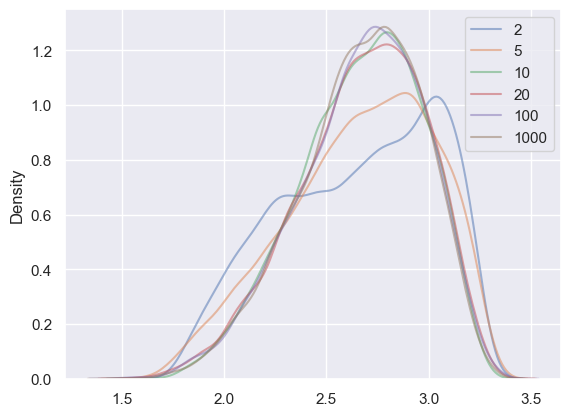

In [181]:
from scipy import stats

# N = 10000
# alpha = np.random.randn()
# beta = np.random.randn(1000)
# for p in [2,5,10,20,100,1000]:
#     X = np.random.rand(N*p).reshape((N,p))
#     eta = 2*(X-0.5).dot(beta[:p])/np.sqrt(p) + alpha
#     z = eta
#     sns.kdeplot(z, alpha=0.5, label=p)
# plt.legend()
# # plt.xlim(0,1)


N = 10000
alpha = np.random.randn()
beta = np.random.randn(1000)
for p in [2,5,10,20,100,1000]:
    X = np.random.rand(N*p).reshape((N,p))
    eta = 2*(X-0.5).dot(beta[:p])/np.sqrt(p) + alpha
    z = 1 + 5*gam*stats.logistic.cdf(eta)
    sns.kdeplot(z, alpha=0.5, label=p)
plt.legend()
# plt.xlim(0,1)

In [213]:
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
from pyfrechet.metric_spaces import *
import pyfrechet.metric_spaces.wasserstein_1d as W1d
import numpy as np
from scipy import stats


sns.set_theme()
sns.set_style("white")
sns.set_context("paper")

p = 10


def gen_data(N, p, alpha, beta, sig0=1, gam=2.5):
    M = W1d.Wasserstein1D()
    STD_NORMAL_Q = stats.norm.ppf(W1d.Wasserstein1D.GRID)
    STD_NORMAL_Q[0] = 2*STD_NORMAL_Q[1] - STD_NORMAL_Q[2] # lexp to avoid infs
    STD_NORMAL_Q[-1] = 2*STD_NORMAL_Q[-2] - STD_NORMAL_Q[-3] # lexp to avoid infs
    
    def m(x):
        eta = 10*(x-0.5).dot(beta)/np.sqrt(p) + alpha
        mu = eta
        sig = sig0 + gam*stats.logistic.cdf(eta)
        return mu + sig * STD_NORMAL_Q

    x = np.random.rand(N*p).reshape((N,p))
    mx = np.array([ m(x[i,:]) for i in range(N)])
    y = np.array([ W1d.noise_2(mx[i,:], l=2) for i in range(N)])

    return x, MetricData(M, y), MetricData(M, mx)


alpha=np.random.randn()
beta=np.random.randn(p)
for i in range(10):    
    x = np.random.randn(p)
    sig0=1
    gam=2.5
    x, y, mx = gen_data(1, p, alpha, beta)

    STD_NORMAL_Q = stats.norm.ppf(W1d.Wasserstein1D.GRID)
    STD_NORMAL_Q[0] = 2*STD_NORMAL_Q[1] - STD_NORMAL_Q[2] # lexp to avoid infs
    STD_NORMAL_Q[-1] = 2*STD_NORMAL_Q[-2] - STD_NORMAL_Q[-3] # lexp to avoid infs
    
    eta = 10*(x-0.5).dot(beta)/np.sqrt(p) + alpha
    mu = 10*np.cos(eta*np.pi)
    sig = sig0 + gam*stats.logistic.cdf(eta)
    # Q0 = mu + sig * STD_NORMAL_Q
    # Q1 = W1d.noise_2(Q0, l=2)
    # compose = lambda f, g: np.interp(g, W1d.Wasserstein1D.GRID, f)
    # plt.plot(W1d.Wasserstein1D.GRID, Q0, color='black', alpha=0.1)
    # sort_index = np.argsort(Q1)
    # Q = Q1[sort_index]
    # P = W1d.Wasserstein1D.GRID[sort_index]
    # spline = UnivariateSpline(Q, P, k=5, s=10)
    # pdf = spline.derivative()
    # plt.plot(Q1[1:-1], pdf(Q1[1:-1]))
    # xs = np.linspace(-20,20,300)
    # plt.plot(xs, stats.norm.pdf(xs, loc=mu, scale=sig), color='black', alpha=0.5)
    
    # plt.plot(W1d.Wasserstein1D.GRID, Q0, color='black', alpha=0.1)
    # plt.plot(W1d.Wasserstein1D.GRID, y[0], color='black', alpha=0.1)
    # plt.plot(W1d.Wasserstein1D.GRID, mx[0], color='black', alpha=0.1)
    # plt.scatter([mu], [sig])

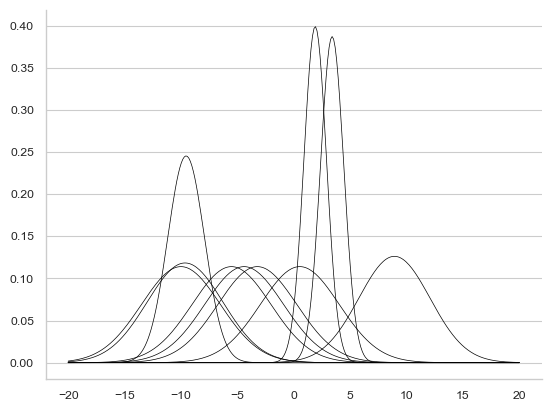

In [226]:
from pyfrechet.metric_spaces import *
import numpy as np
from scipy import stats

np.random.seed(22)
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper")
p = 10
alpha=np.random.randn()
beta=np.random.randn(p)
sig0=1
gam=2.5
for i in range(10):    
    x = np.random.randn(p)
    eta = 10*(x-0.5).dot(beta)/np.sqrt(p) + alpha
    mu = 10*np.cos(eta*np.pi)
    sig = sig0 + gam*stats.logistic.cdf(eta)
    xs = np.linspace(-20,20,300)
    plt.plot(xs, stats.norm.pdf(xs, loc=mu, scale=sig), color='black', alpha=1, linewidth=0.5)
plt.gca().spines[['right', 'top']].set_visible(False)
plt.grid(axis='x')
plt.savefig("./plots/sample_wasserstein.pdf")

In [141]:
import sys, os; sys.path.append(os.path.dirname(os.getcwd())) 
from benchmark import bench

import numpy as np
from scipy import stats

from pyfrechet.metric_spaces import *
import pyfrechet.metric_spaces.wasserstein_1d as W1d

OUT_FILE = 'results/result_wasserstein_cross_est_new_dgp.json'

def gen_data(N, p, alpha, beta, sig0=1, gam=2.5):
    M = W1d.Wasserstein1D()
    
    STD_NORMAL_Q = stats.norm.ppf(W1d.Wasserstein1D.GRID)
    STD_NORMAL_Q[0] = 2*STD_NORMAL_Q[1] - STD_NORMAL_Q[2] # lexp to avoid infs
    STD_NORMAL_Q[-1] = 2*STD_NORMAL_Q[-2] - STD_NORMAL_Q[-3] # lexp to avoid infs

    def m(x):
        eta = 10*(x-0.5).dot(beta)/np.sqrt(p) + alpha
        mu = eta
        sig = sig0 + gam*stats.logistic.cdf(eta)
        return mu + sig * STD_NORMAL_Q

    x = np.random.rand(N*p).reshape((N,p))
    mx = np.array([ m(x[i,:]) for i in range(N)])
    y = np.array([ W1d.noise_2(mx[i,:], l=2) for i in range(N)])

    return x, MetricData(M, y), MetricData(M, mx)

bench(
    gen_data,
    OUT_FILE,
    ps=[2, 5, 10, 20],
    Ns=[50,100,200,400],
    replicas=25
)

[2023-06-08 17:29:21.276032] Progress: N=50	p=2	i=0
[2023-06-08 17:29:21.284944] Distances for cart_2means
[2023-06-08 17:29:21.284962] dt = 0
[2023-06-08 17:29:21.284966] Fitting for cart_2means
[2023-06-08 17:29:21.308988] dt = 0.02404308319091797
[2023-06-08 17:29:21.309006] MSE for cart_2means
[2023-06-08 17:29:21.311416] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    2.4s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-08 17:29:23.682996] dt = 2.3715691566467285
[2023-06-08 17:29:23.683184] Fitting for medoid_2means
[2023-06-08 17:29:23.775106] dt = 0.09211874008178711
[2023-06-08 17:29:23.775147] MSE for medoid_2means
[2023-06-08 17:29:23.779098] Distances for medoid_greedy
[2023-06-08 17:29:23.779110] dt = 0.0
[2023-06-08 17:29:23.779114] Fitting for medoid_greedy
[2023-06-08 17:29:23.785480] dt = 0.006382942199707031
[2023-06-08 17:29:23.785488] MSE for medoid_greedy
[2023-06-08 17:29:23.792606] Progress: N=50	p=2	i=1
[2023-06-08 17:29:23.797695] Distances for cart_2means
[2023-06-08 17:29:23.797701] dt = 0
[2023-06-08 17:29:23.797704] Fitting for cart_2means
[2023-06-08 17:29:23.864034] dt = 0.06633806228637695
[2023-06-08 17:29:23.864062] MSE for cart_2means
[2023-06-08 17:29:23.867912] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Done  37 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:23.940380] dt = 0.07245898246765137
[2023-06-08 17:29:23.940564] Fitting for medoid_2means
[2023-06-08 17:29:23.967784] dt = 0.027411937713623047
[2023-06-08 17:29:23.967801] MSE for medoid_2means
[2023-06-08 17:29:23.970177] Distances for medoid_greedy
[2023-06-08 17:29:23.970183] dt = 9.5367431640625e-07
[2023-06-08 17:29:23.970188] Fitting for medoid_greedy
[2023-06-08 17:29:23.976151] dt = 0.005973100662231445
[2023-06-08 17:29:23.976161] MSE for medoid_greedy
[2023-06-08 17:29:23.978738] Progress: N=50	p=2	i=2
[2023-06-08 17:29:23.983495] Distances for cart_2means
[2023-06-08 17:29:23.983500] dt = 0
[2023-06-08 17:29:23.983503] Fitting for cart_2means
[2023-06-08 17:29:23.996650] dt = 0.013154029846191406
[2023-06-08 17:29:23.996665] MSE for cart_2means
[2023-06-08 17:29:23.999025] Distances for medoid_2means
[2023-06-08 17:29:24.021527] dt = 0.02249598503112793
[2023-06-08 17:29:24.021539] Fitting for medoid_2means
[2023-06-08 17:29:24.034008] dt = 0.01248598098

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:24.161585] dt = 0.022983074188232422
[2023-06-08 17:29:24.161648] Fitting for medoid_2means
[2023-06-08 17:29:24.173898] dt = 0.012318849563598633
[2023-06-08 17:29:24.173909] MSE for medoid_2means
[2023-06-08 17:29:24.176274] Distances for medoid_greedy
[2023-06-08 17:29:24.176280] dt = 0.0
[2023-06-08 17:29:24.176284] Fitting for medoid_greedy
[2023-06-08 17:29:24.182323] dt = 0.0060482025146484375
[2023-06-08 17:29:24.182331] MSE for medoid_greedy
[2023-06-08 17:29:24.185631] Progress: N=50	p=2	i=5
[2023-06-08 17:29:24.190286] Distances for cart_2means
[2023-06-08 17:29:24.190292] dt = 0
[2023-06-08 17:29:24.190295] Fitting for cart_2means
[2023-06-08 17:29:24.207343] dt = 0.017055988311767578
[2023-06-08 17:29:24.207356] MSE for cart_2means
[2023-06-08 17:29:24.209717] Distances for medoid_2means
[2023-06-08 17:29:24.231773] dt = 0.022049903869628906
[2023-06-08 17:29:24.231786] Fitting for medoid_2means
[2023-06-08 17:29:24.246264] dt = 0.014496088027954102
[2023

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:24.569469] Distances for cart_2means
[2023-06-08 17:29:24.569625] dt = 0
[2023-06-08 17:29:24.569632] Fitting for cart_2means
[2023-06-08 17:29:24.585273] dt = 0.015804052352905273
[2023-06-08 17:29:24.585292] MSE for cart_2means
[2023-06-08 17:29:24.587740] Distances for medoid_2means
[2023-06-08 17:29:24.609847] dt = 0.022101163864135742
[2023-06-08 17:29:24.609860] Fitting for medoid_2means
[2023-06-08 17:29:24.620928] dt = 0.011085748672485352
[2023-06-08 17:29:24.620938] MSE for medoid_2means
[2023-06-08 17:29:24.623347] Distances for medoid_greedy
[2023-06-08 17:29:24.623355] dt = 7.152557373046875e-07
[2023-06-08 17:29:24.623361] Fitting for medoid_greedy
[2023-06-08 17:29:24.629192] dt = 0.005843162536621094
[2023-06-08 17:29:24.629199] MSE for medoid_greedy
[2023-06-08 17:29:24.632858] Progress: N=50	p=2	i=11
[2023-06-08 17:29:24.637682] Distances for cart_2means
[2023-06-08 17:29:24.637687] dt = 0
[2023-06-08 17:29:24.637690] Fitting for cart_2means
[2023-06

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:24.776658] dt = 0.0067059993743896484
[2023-06-08 17:29:24.776720] MSE for medoid_greedy
[2023-06-08 17:29:24.779735] Progress: N=50	p=2	i=13
[2023-06-08 17:29:24.784498] Distances for cart_2means
[2023-06-08 17:29:24.784505] dt = 0
[2023-06-08 17:29:24.784508] Fitting for cart_2means
[2023-06-08 17:29:24.802458] dt = 0.017959117889404297
[2023-06-08 17:29:24.802475] MSE for cart_2means
[2023-06-08 17:29:24.804968] Distances for medoid_2means
[2023-06-08 17:29:24.827662] dt = 0.022684812545776367
[2023-06-08 17:29:24.827675] Fitting for medoid_2means
[2023-06-08 17:29:24.843904] dt = 0.0162503719329834
[2023-06-08 17:29:24.843921] MSE for medoid_2means
[2023-06-08 17:29:24.846305] Distances for medoid_greedy
[2023-06-08 17:29:24.846311] dt = 9.5367431640625e-07
[2023-06-08 17:29:24.846316] Fitting for medoid_greedy
[2023-06-08 17:29:24.853220] dt = 0.0069119930267333984
[2023-06-08 17:29:24.853240] MSE for medoid_greedy
[2023-06-08 17:29:24.856897] Progress: N=50	p=2	

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:24.989963] dt = 0.01528310775756836
[2023-06-08 17:29:24.990038] MSE for medoid_2means
[2023-06-08 17:29:24.992772] Distances for medoid_greedy
[2023-06-08 17:29:24.992783] dt = 0.0
[2023-06-08 17:29:24.992787] Fitting for medoid_greedy
[2023-06-08 17:29:24.999051] dt = 0.0062787532806396484
[2023-06-08 17:29:24.999066] MSE for medoid_greedy
[2023-06-08 17:29:25.001923] Progress: N=50	p=2	i=16
[2023-06-08 17:29:25.006810] Distances for cart_2means
[2023-06-08 17:29:25.006816] dt = 0
[2023-06-08 17:29:25.006820] Fitting for cart_2means
[2023-06-08 17:29:25.023152] dt = 0.0163421630859375
[2023-06-08 17:29:25.023171] MSE for cart_2means
[2023-06-08 17:29:25.025731] Distances for medoid_2means
[2023-06-08 17:29:25.048883] dt = 0.023140907287597656
[2023-06-08 17:29:25.048897] Fitting for medoid_2means
[2023-06-08 17:29:25.061614] dt = 0.012742996215820312
[2023-06-08 17:29:25.061628] MSE for medoid_2means
[2023-06-08 17:29:25.064009] Distances for medoid_greedy
[2023-06-

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:25.203633] dt = 0.012613773345947266
[2023-06-08 17:29:25.203702] MSE for medoid_2means
[2023-06-08 17:29:25.206966] Distances for medoid_greedy
[2023-06-08 17:29:25.206981] dt = 0.0
[2023-06-08 17:29:25.206985] Fitting for medoid_greedy
[2023-06-08 17:29:25.212614] dt = 0.00564885139465332
[2023-06-08 17:29:25.212622] MSE for medoid_greedy
[2023-06-08 17:29:25.216099] Progress: N=50	p=2	i=19
[2023-06-08 17:29:25.220813] Distances for cart_2means
[2023-06-08 17:29:25.220818] dt = 0
[2023-06-08 17:29:25.220820] Fitting for cart_2means
[2023-06-08 17:29:25.237365] dt = 0.016551971435546875
[2023-06-08 17:29:25.237382] MSE for cart_2means
[2023-06-08 17:29:25.239904] Distances for medoid_2means
[2023-06-08 17:29:25.280695] dt = 0.040780067443847656
[2023-06-08 17:29:25.280710] Fitting for medoid_2means
[2023-06-08 17:29:25.327103] dt = 0.0464169979095459
[2023-06-08 17:29:25.327128] MSE for medoid_2means
[2023-06-08 17:29:25.329697] Distances for medoid_greedy
[2023-06-0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-08 17:29:25.411970] dt = 0.0067288875579833984
[2023-06-08 17:29:25.412028] MSE for medoid_greedy
[2023-06-08 17:29:25.415199] Progress: N=50	p=2	i=21
[2023-06-08 17:29:25.419969] Distances for cart_2means
[2023-06-08 17:29:25.419977] dt = 0
[2023-06-08 17:29:25.419980] Fitting for cart_2means
[2023-06-08 17:29:25.434009] dt = 0.014037847518920898
[2023-06-08 17:29:25.434028] MSE for cart_2means
[2023-06-08 17:29:25.436440] Distances for medoid_2means
[2023-06-08 17:29:25.459751] dt = 0.02330493927001953
[2023-06-08 17:29:25.459765] Fitting for medoid_2means
[2023-06-08 17:29:25.474553] dt = 0.014808177947998047
[2023-06-08 17:29:25.474574] MSE for medoid_2means
[2023-06-08 17:29:25.477073] Distances for medoid_greedy
[2023-06-08 17:29:25.477082] dt = 0.0
[2023-06-08 17:29:25.477085] Fitting for medoid_greedy
[2023-06-08 17:29:25.483126] dt = 0.00605320930480957
[2023-06-08 17:29:25.483146] MSE for medoid_greedy
[2023-06-08 17:29:25.486035] Progress: N=50	p=2	i=22
[2023-06-08 

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-08 17:29:25.615971] dt = 0.015012979507446289
[2023-06-08 17:29:25.616038] MSE for medoid_2means
[2023-06-08 17:29:25.618768] Distances for medoid_greedy
[2023-06-08 17:29:25.618775] dt = 1.1920928955078125e-06
[2023-06-08 17:29:25.618780] Fitting for medoid_greedy
[2023-06-08 17:29:25.624628] dt = 0.005858898162841797
[2023-06-08 17:29:25.624636] MSE for medoid_greedy
[2023-06-08 17:29:25.627654] Progress: N=50	p=2	i=24
[2023-06-08 17:29:25.632685] Distances for cart_2means
[2023-06-08 17:29:25.632699] dt = 0
[2023-06-08 17:29:25.632702] Fitting for cart_2means
[2023-06-08 17:29:25.646654] dt = 0.013968944549560547
[2023-06-08 17:29:25.646673] MSE for cart_2means
[2023-06-08 17:29:25.649097] Distances for medoid_2means
[2023-06-08 17:29:25.672637] dt = 0.02353382110595703
[2023-06-08 17:29:25.672651] Fitting for medoid_2means
[2023-06-08 17:29:25.684714] dt = 0.012083053588867188
[2023-06-08 17:29:25.684729] MSE for medoid_2means
[2023-06-08 17:29:25.687112] Distances for med

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:25.829419] dt = 0.01485586166381836
[2023-06-08 17:29:25.829500] MSE for medoid_greedy
[2023-06-08 17:29:25.832863] Progress: N=50	p=5	i=1
[2023-06-08 17:29:25.837630] Distances for cart_2means
[2023-06-08 17:29:25.837636] dt = 0
[2023-06-08 17:29:25.837639] Fitting for cart_2means
[2023-06-08 17:29:25.883690] dt = 0.04605889320373535
[2023-06-08 17:29:25.883708] MSE for cart_2means
[2023-06-08 17:29:25.886159] Distances for medoid_2means
[2023-06-08 17:29:25.908966] dt = 0.02280116081237793
[2023-06-08 17:29:25.908979] Fitting for medoid_2means
[2023-06-08 17:29:25.956777] dt = 0.04781460762023926
[2023-06-08 17:29:25.956816] MSE for medoid_2means
[2023-06-08 17:29:25.959681] Distances for medoid_greedy
[2023-06-08 17:29:25.959697] dt = 1.1920928955078125e-06
[2023-06-08 17:29:25.959704] Fitting for medoid_greedy
[2023-06-08 17:29:25.973332] dt = 0.013650655746459961
[2023-06-08 17:29:25.973346] MSE for medoid_greedy
[2023-06-08 17:29:25.976361] Progress: N=50	p=5	i=

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:26.051326] dt = 0.02316594123840332
[2023-06-08 17:29:26.051389] Fitting for medoid_2means
[2023-06-08 17:29:26.090930] dt = 0.039608001708984375
[2023-06-08 17:29:26.090951] MSE for medoid_2means
[2023-06-08 17:29:26.093395] Distances for medoid_greedy
[2023-06-08 17:29:26.093401] dt = 1.1920928955078125e-06
[2023-06-08 17:29:26.093406] Fitting for medoid_greedy
[2023-06-08 17:29:26.107687] dt = 0.014288902282714844
[2023-06-08 17:29:26.107711] MSE for medoid_greedy
[2023-06-08 17:29:26.110773] Progress: N=50	p=5	i=3
[2023-06-08 17:29:26.115745] Distances for cart_2means
[2023-06-08 17:29:26.115760] dt = 0
[2023-06-08 17:29:26.115764] Fitting for cart_2means
[2023-06-08 17:29:26.155462] dt = 0.03971600532531738
[2023-06-08 17:29:26.155481] MSE for cart_2means
[2023-06-08 17:29:26.157888] Distances for medoid_2means
[2023-06-08 17:29:26.180420] dt = 0.02252507209777832
[2023-06-08 17:29:26.180432] Fitting for medoid_2means
[2023-06-08 17:29:26.213880] dt = 0.033466100

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:26.280807] dt = 0.04303789138793945
[2023-06-08 17:29:26.280886] MSE for cart_2means
[2023-06-08 17:29:26.283534] Distances for medoid_2means
[2023-06-08 17:29:26.306043] dt = 0.022501230239868164
[2023-06-08 17:29:26.306056] Fitting for medoid_2means
[2023-06-08 17:29:26.344580] dt = 0.038543701171875
[2023-06-08 17:29:26.344599] MSE for medoid_2means
[2023-06-08 17:29:26.347062] Distances for medoid_greedy
[2023-06-08 17:29:26.347069] dt = 1.1920928955078125e-06
[2023-06-08 17:29:26.347074] Fitting for medoid_greedy
[2023-06-08 17:29:26.364767] dt = 0.017702579498291016
[2023-06-08 17:29:26.364783] MSE for medoid_greedy
[2023-06-08 17:29:26.367754] Progress: N=50	p=5	i=5
[2023-06-08 17:29:26.372532] Distances for cart_2means
[2023-06-08 17:29:26.372538] dt = 0
[2023-06-08 17:29:26.372541] Fitting for cart_2means
[2023-06-08 17:29:26.412870] dt = 0.040337324142456055
[2023-06-08 17:29:26.412889] MSE for cart_2means
[2023-06-08 17:29:26.415308] Distances for medoid_2m

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:26.489341] dt = 0.015281915664672852
[2023-06-08 17:29:26.489404] MSE for medoid_greedy
[2023-06-08 17:29:26.492810] Progress: N=50	p=5	i=6
[2023-06-08 17:29:26.497674] Distances for cart_2means
[2023-06-08 17:29:26.497682] dt = 0
[2023-06-08 17:29:26.497685] Fitting for cart_2means
[2023-06-08 17:29:26.537240] dt = 0.039565086364746094
[2023-06-08 17:29:26.537259] MSE for cart_2means
[2023-06-08 17:29:26.539623] Distances for medoid_2means
[2023-06-08 17:29:26.561561] dt = 0.021931171417236328
[2023-06-08 17:29:26.561574] Fitting for medoid_2means
[2023-06-08 17:29:26.602027] dt = 0.04047083854675293
[2023-06-08 17:29:26.602043] MSE for medoid_2means
[2023-06-08 17:29:26.604457] Distances for medoid_greedy
[2023-06-08 17:29:26.604463] dt = 0.0
[2023-06-08 17:29:26.604466] Fitting for medoid_greedy
[2023-06-08 17:29:26.621769] dt = 0.01731109619140625
[2023-06-08 17:29:26.621785] MSE for medoid_greedy
[2023-06-08 17:29:26.624833] Progress: N=50	p=5	i=7
[2023-06-08 17:

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:26.699966] dt = 0.02317023277282715
[2023-06-08 17:29:26.700028] Fitting for medoid_2means
[2023-06-08 17:29:26.746802] dt = 0.046840667724609375
[2023-06-08 17:29:26.746821] MSE for medoid_2means
[2023-06-08 17:29:26.749278] Distances for medoid_greedy
[2023-06-08 17:29:26.749285] dt = 1.1920928955078125e-06
[2023-06-08 17:29:26.749290] Fitting for medoid_greedy
[2023-06-08 17:29:26.763527] dt = 0.014246702194213867
[2023-06-08 17:29:26.763537] MSE for medoid_greedy
[2023-06-08 17:29:26.766535] Progress: N=50	p=5	i=8
[2023-06-08 17:29:26.771496] Distances for cart_2means
[2023-06-08 17:29:26.771514] dt = 0
[2023-06-08 17:29:26.771518] Fitting for cart_2means
[2023-06-08 17:29:26.809836] dt = 0.03833913803100586
[2023-06-08 17:29:26.809852] MSE for cart_2means
[2023-06-08 17:29:26.812228] Distances for medoid_2means
[2023-06-08 17:29:26.834499] dt = 0.022265195846557617
[2023-06-08 17:29:26.834512] Fitting for medoid_2means
[2023-06-08 17:29:26.876397] dt = 0.04190373

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:27.169884] dt = 0.06430602073669434
[2023-06-08 17:29:27.169967] MSE for medoid_2means
[2023-06-08 17:29:27.172856] Distances for medoid_greedy
[2023-06-08 17:29:27.172870] dt = 1.1920928955078125e-06
[2023-06-08 17:29:27.172876] Fitting for medoid_greedy
[2023-06-08 17:29:27.186846] dt = 0.013985633850097656
[2023-06-08 17:29:27.186876] MSE for medoid_greedy
[2023-06-08 17:29:27.190770] Progress: N=50	p=5	i=11
[2023-06-08 17:29:27.195774] Distances for cart_2means
[2023-06-08 17:29:27.195795] dt = 0
[2023-06-08 17:29:27.195799] Fitting for cart_2means
[2023-06-08 17:29:27.252328] dt = 0.056552886962890625
[2023-06-08 17:29:27.252347] MSE for cart_2means
[2023-06-08 17:29:27.254700] Distances for medoid_2means
[2023-06-08 17:29:27.277351] dt = 0.022644996643066406
[2023-06-08 17:29:27.277364] Fitting for medoid_2means
[2023-06-08 17:29:27.311376] dt = 0.03403115272521973
[2023-06-08 17:29:27.311393] MSE for medoid_2means
[2023-06-08 17:29:27.313761] Distances for medo

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:27.378696] dt = 0.04152989387512207
[2023-06-08 17:29:27.378763] MSE for cart_2means
[2023-06-08 17:29:27.381561] Distances for medoid_2means
[2023-06-08 17:29:27.403700] dt = 0.022130966186523438
[2023-06-08 17:29:27.403713] Fitting for medoid_2means
[2023-06-08 17:29:27.436843] dt = 0.03315091133117676
[2023-06-08 17:29:27.436859] MSE for medoid_2means
[2023-06-08 17:29:27.439301] Distances for medoid_greedy
[2023-06-08 17:29:27.439307] dt = 9.5367431640625e-07
[2023-06-08 17:29:27.439312] Fitting for medoid_greedy
[2023-06-08 17:29:27.452812] dt = 0.013509988784790039
[2023-06-08 17:29:27.452821] MSE for medoid_greedy
[2023-06-08 17:29:27.456459] Progress: N=50	p=5	i=13
[2023-06-08 17:29:27.461380] Distances for cart_2means
[2023-06-08 17:29:27.461395] dt = 0
[2023-06-08 17:29:27.461398] Fitting for cart_2means
[2023-06-08 17:29:27.507882] dt = 0.046501874923706055
[2023-06-08 17:29:27.507902] MSE for cart_2means
[2023-06-08 17:29:27.510322] Distances for medoid_2m

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:27.590523] dt = 0.01429605484008789
[2023-06-08 17:29:27.590587] MSE for medoid_greedy
[2023-06-08 17:29:27.594032] Progress: N=50	p=5	i=14
[2023-06-08 17:29:27.598897] Distances for cart_2means
[2023-06-08 17:29:27.598903] dt = 0
[2023-06-08 17:29:27.598906] Fitting for cart_2means
[2023-06-08 17:29:27.646790] dt = 0.047892093658447266
[2023-06-08 17:29:27.646808] MSE for cart_2means
[2023-06-08 17:29:27.649205] Distances for medoid_2means
[2023-06-08 17:29:27.671661] dt = 0.022449731826782227
[2023-06-08 17:29:27.671674] Fitting for medoid_2means
[2023-06-08 17:29:27.715621] dt = 0.04396533966064453
[2023-06-08 17:29:27.715638] MSE for medoid_2means
[2023-06-08 17:29:27.718077] Distances for medoid_greedy
[2023-06-08 17:29:27.718084] dt = 0.0
[2023-06-08 17:29:27.718087] Fitting for medoid_greedy
[2023-06-08 17:29:27.733476] dt = 0.015397071838378906
[2023-06-08 17:29:27.733493] MSE for medoid_greedy
[2023-06-08 17:29:27.736686] Progress: N=50	p=5	i=15
[2023-06-08 1

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:27.809152] dt = 0.023323774337768555
[2023-06-08 17:29:27.809217] Fitting for medoid_2means
[2023-06-08 17:29:27.852320] dt = 0.04317426681518555
[2023-06-08 17:29:27.852339] MSE for medoid_2means
[2023-06-08 17:29:27.854778] Distances for medoid_greedy
[2023-06-08 17:29:27.854784] dt = 0.0
[2023-06-08 17:29:27.854788] Fitting for medoid_greedy
[2023-06-08 17:29:27.869396] dt = 0.014615774154663086
[2023-06-08 17:29:27.869417] MSE for medoid_greedy
[2023-06-08 17:29:27.872531] Progress: N=50	p=5	i=16
[2023-06-08 17:29:27.877322] Distances for cart_2means
[2023-06-08 17:29:27.877328] dt = 0
[2023-06-08 17:29:27.877331] Fitting for cart_2means
[2023-06-08 17:29:27.922065] dt = 0.04474282264709473
[2023-06-08 17:29:27.922083] MSE for cart_2means
[2023-06-08 17:29:27.924565] Distances for medoid_2means
[2023-06-08 17:29:27.946958] dt = 0.022384166717529297
[2023-06-08 17:29:27.946970] Fitting for medoid_2means
[2023-06-08 17:29:27.988349] dt = 0.04139971733093262
[2023-06

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:28.244217] dt = 0.03544473648071289
[2023-06-08 17:29:28.244292] MSE for medoid_2means
[2023-06-08 17:29:28.246944] Distances for medoid_greedy
[2023-06-08 17:29:28.246952] dt = 9.5367431640625e-07
[2023-06-08 17:29:28.246958] Fitting for medoid_greedy
[2023-06-08 17:29:28.261458] dt = 0.014510869979858398
[2023-06-08 17:29:28.261481] MSE for medoid_greedy
[2023-06-08 17:29:28.265336] Progress: N=50	p=5	i=19
[2023-06-08 17:29:28.271208] Distances for cart_2means
[2023-06-08 17:29:28.271214] dt = 0
[2023-06-08 17:29:28.271217] Fitting for cart_2means
[2023-06-08 17:29:28.311289] dt = 0.04008007049560547
[2023-06-08 17:29:28.311308] MSE for cart_2means
[2023-06-08 17:29:28.313654] Distances for medoid_2means
[2023-06-08 17:29:28.336118] dt = 0.02245807647705078
[2023-06-08 17:29:28.336132] Fitting for medoid_2means
[2023-06-08 17:29:28.378099] dt = 0.041986942291259766
[2023-06-08 17:29:28.378119] MSE for medoid_2means
[2023-06-08 17:29:28.380604] Distances for medoid_g

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:28.447936] Distances for medoid_2means
[2023-06-08 17:29:28.470869] dt = 0.0228729248046875
[2023-06-08 17:29:28.470881] Fitting for medoid_2means
[2023-06-08 17:29:28.504270] dt = 0.033460140228271484
[2023-06-08 17:29:28.504287] MSE for medoid_2means
[2023-06-08 17:29:28.506706] Distances for medoid_greedy
[2023-06-08 17:29:28.506712] dt = 0.0
[2023-06-08 17:29:28.506716] Fitting for medoid_greedy
[2023-06-08 17:29:28.521869] dt = 0.015161991119384766
[2023-06-08 17:29:28.521886] MSE for medoid_greedy
[2023-06-08 17:29:28.525060] Progress: N=50	p=5	i=21
[2023-06-08 17:29:28.529837] Distances for cart_2means
[2023-06-08 17:29:28.529844] dt = 0
[2023-06-08 17:29:28.529847] Fitting for cart_2means
[2023-06-08 17:29:28.570436] dt = 0.04059910774230957
[2023-06-08 17:29:28.570455] MSE for cart_2means
[2023-06-08 17:29:28.572846] Distances for medoid_2means
[2023-06-08 17:29:28.595419] dt = 0.022567272186279297
[2023-06-08 17:29:28.595431] Fitting for medoid_2means
[2023-

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:28.651434] Progress: N=50	p=5	i=22
[2023-06-08 17:29:28.657434] Distances for cart_2means
[2023-06-08 17:29:28.657451] dt = 0
[2023-06-08 17:29:28.657455] Fitting for cart_2means
[2023-06-08 17:29:28.700187] dt = 0.042752981185913086
[2023-06-08 17:29:28.700206] MSE for cart_2means
[2023-06-08 17:29:28.702636] Distances for medoid_2means
[2023-06-08 17:29:28.724613] dt = 0.02197098731994629
[2023-06-08 17:29:28.724625] Fitting for medoid_2means
[2023-06-08 17:29:28.759598] dt = 0.0349888801574707
[2023-06-08 17:29:28.759640] MSE for medoid_2means
[2023-06-08 17:29:28.763050] Distances for medoid_greedy
[2023-06-08 17:29:28.763062] dt = 9.5367431640625e-07
[2023-06-08 17:29:28.763069] Fitting for medoid_greedy
[2023-06-08 17:29:28.779919] dt = 0.01686835289001465
[2023-06-08 17:29:28.779936] MSE for medoid_greedy
[2023-06-08 17:29:28.783155] Progress: N=50	p=5	i=23
[2023-06-08 17:29:28.788011] Distances for cart_2means
[2023-06-08 17:29:28.788018] dt = 0
[2023-06-08 17

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:28.860333] dt = 0.02289104461669922
[2023-06-08 17:29:28.860385] Fitting for medoid_2means
[2023-06-08 17:29:28.903118] dt = 0.04278993606567383
[2023-06-08 17:29:28.903136] MSE for medoid_2means
[2023-06-08 17:29:28.905535] Distances for medoid_greedy
[2023-06-08 17:29:28.905540] dt = 0.0
[2023-06-08 17:29:28.905544] Fitting for medoid_greedy
[2023-06-08 17:29:28.919955] dt = 0.014418840408325195
[2023-06-08 17:29:28.919967] MSE for medoid_greedy
[2023-06-08 17:29:28.923090] Progress: N=50	p=5	i=24
[2023-06-08 17:29:28.927806] Distances for cart_2means
[2023-06-08 17:29:28.927812] dt = 0
[2023-06-08 17:29:28.927815] Fitting for cart_2means
[2023-06-08 17:29:28.974028] dt = 0.046221017837524414
[2023-06-08 17:29:28.974048] MSE for cart_2means
[2023-06-08 17:29:28.976532] Distances for medoid_2means
[2023-06-08 17:29:28.998831] dt = 0.02229022979736328
[2023-06-08 17:29:28.998843] Fitting for medoid_2means
[2023-06-08 17:29:29.038800] dt = 0.03997683525085449
[2023-06-

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:29.445913] dt = 0.10613298416137695
[2023-06-08 17:29:29.445988] MSE for cart_2means
[2023-06-08 17:29:29.448791] Distances for medoid_2means
[2023-06-08 17:29:29.471006] dt = 0.022207975387573242
[2023-06-08 17:29:29.471019] Fitting for medoid_2means
[2023-06-08 17:29:29.567637] dt = 0.09663701057434082
[2023-06-08 17:29:29.567656] MSE for medoid_2means
[2023-06-08 17:29:29.570019] Distances for medoid_greedy
[2023-06-08 17:29:29.570025] dt = 0.0
[2023-06-08 17:29:29.570028] Fitting for medoid_greedy
[2023-06-08 17:29:29.600386] dt = 0.030366897583007812
[2023-06-08 17:29:29.600407] MSE for medoid_greedy
[2023-06-08 17:29:29.603646] Progress: N=50	p=10	i=2
[2023-06-08 17:29:29.608575] Distances for cart_2means
[2023-06-08 17:29:29.608583] dt = 0
[2023-06-08 17:29:29.608587] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:29.700855] dt = 0.09227919578552246
[2023-06-08 17:29:29.700923] MSE for cart_2means
[2023-06-08 17:29:29.703645] Distances for medoid_2means
[2023-06-08 17:29:29.726064] dt = 0.022410869598388672
[2023-06-08 17:29:29.726077] Fitting for medoid_2means
[2023-06-08 17:29:29.811815] dt = 0.08575797080993652
[2023-06-08 17:29:29.811834] MSE for medoid_2means
[2023-06-08 17:29:29.814314] Distances for medoid_greedy
[2023-06-08 17:29:29.814321] dt = 9.5367431640625e-07
[2023-06-08 17:29:29.814325] Fitting for medoid_greedy
[2023-06-08 17:29:29.842065] dt = 0.027750015258789062
[2023-06-08 17:29:29.842076] MSE for medoid_greedy
[2023-06-08 17:29:29.846317] Progress: N=50	p=10	i=3
[2023-06-08 17:29:29.851050] Distances for cart_2means
[2023-06-08 17:29:29.851056] dt = 0
[2023-06-08 17:29:29.851059] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:29.929892] dt = 0.0788412094116211
[2023-06-08 17:29:29.929968] MSE for cart_2means
[2023-06-08 17:29:29.932583] Distances for medoid_2means
[2023-06-08 17:29:29.955336] dt = 0.022745847702026367
[2023-06-08 17:29:29.955347] Fitting for medoid_2means
[2023-06-08 17:29:30.020851] dt = 0.065521240234375
[2023-06-08 17:29:30.020870] MSE for medoid_2means
[2023-06-08 17:29:30.023363] Distances for medoid_greedy
[2023-06-08 17:29:30.023371] dt = 9.5367431640625e-07
[2023-06-08 17:29:30.023377] Fitting for medoid_greedy
[2023-06-08 17:29:30.053581] dt = 0.030215978622436523
[2023-06-08 17:29:30.053591] MSE for medoid_greedy
[2023-06-08 17:29:30.057831] Progress: N=50	p=10	i=4
[2023-06-08 17:29:30.062507] Distances for cart_2means
[2023-06-08 17:29:30.062513] dt = 0
[2023-06-08 17:29:30.062516] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:30.160526] dt = 0.09801816940307617
[2023-06-08 17:29:30.160597] MSE for cart_2means
[2023-06-08 17:29:30.163262] Distances for medoid_2means
[2023-06-08 17:29:30.185505] dt = 0.022235870361328125
[2023-06-08 17:29:30.185519] Fitting for medoid_2means
[2023-06-08 17:29:30.269283] dt = 0.08378410339355469
[2023-06-08 17:29:30.269337] MSE for medoid_2means
[2023-06-08 17:29:30.271777] Distances for medoid_greedy
[2023-06-08 17:29:30.271783] dt = 9.5367431640625e-07
[2023-06-08 17:29:30.271789] Fitting for medoid_greedy
[2023-06-08 17:29:30.298960] dt = 0.027181148529052734
[2023-06-08 17:29:30.298982] MSE for medoid_greedy
[2023-06-08 17:29:30.302285] Progress: N=50	p=10	i=5
[2023-06-08 17:29:30.307237] Distances for cart_2means
[2023-06-08 17:29:30.307245] dt = 0
[2023-06-08 17:29:30.307248] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:30.389743] dt = 0.0825047492980957
[2023-06-08 17:29:30.389820] MSE for cart_2means
[2023-06-08 17:29:30.392524] Distances for medoid_2means
[2023-06-08 17:29:30.414615] dt = 0.02207779884338379
[2023-06-08 17:29:30.414629] Fitting for medoid_2means
[2023-06-08 17:29:30.481259] dt = 0.06665706634521484
[2023-06-08 17:29:30.481278] MSE for medoid_2means
[2023-06-08 17:29:30.483711] Distances for medoid_greedy
[2023-06-08 17:29:30.483717] dt = 0.0
[2023-06-08 17:29:30.483721] Fitting for medoid_greedy
[2023-06-08 17:29:30.512746] dt = 0.02903294563293457
[2023-06-08 17:29:30.512769] MSE for medoid_greedy
[2023-06-08 17:29:30.516101] Progress: N=50	p=10	i=6
[2023-06-08 17:29:30.520945] Distances for cart_2means
[2023-06-08 17:29:30.520950] dt = 0
[2023-06-08 17:29:30.520953] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:30.614927] dt = 0.09398198127746582
[2023-06-08 17:29:30.614997] MSE for cart_2means
[2023-06-08 17:29:30.617812] Distances for medoid_2means
[2023-06-08 17:29:30.639965] dt = 0.02214503288269043
[2023-06-08 17:29:30.639978] Fitting for medoid_2means
[2023-06-08 17:29:30.723533] dt = 0.08357501029968262
[2023-06-08 17:29:30.723552] MSE for medoid_2means
[2023-06-08 17:29:30.726018] Distances for medoid_greedy
[2023-06-08 17:29:30.726024] dt = 9.5367431640625e-07
[2023-06-08 17:29:30.726029] Fitting for medoid_greedy
[2023-06-08 17:29:30.753549] dt = 0.027529239654541016
[2023-06-08 17:29:30.753557] MSE for medoid_greedy
[2023-06-08 17:29:30.757427] Progress: N=50	p=10	i=7
[2023-06-08 17:29:30.762174] Distances for cart_2means
[2023-06-08 17:29:30.762180] dt = 0
[2023-06-08 17:29:30.762183] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:30.846517] dt = 0.08434200286865234
[2023-06-08 17:29:30.846598] MSE for cart_2means
[2023-06-08 17:29:30.849263] Distances for medoid_2means
[2023-06-08 17:29:30.871904] dt = 0.022632837295532227
[2023-06-08 17:29:30.871918] Fitting for medoid_2means
[2023-06-08 17:29:30.944723] dt = 0.07282590866088867
[2023-06-08 17:29:30.944742] MSE for medoid_2means
[2023-06-08 17:29:30.947185] Distances for medoid_greedy
[2023-06-08 17:29:30.947191] dt = 9.5367431640625e-07
[2023-06-08 17:29:30.947196] Fitting for medoid_greedy
[2023-06-08 17:29:30.975606] dt = 0.02841925621032715
[2023-06-08 17:29:30.975619] MSE for medoid_greedy
[2023-06-08 17:29:30.978804] Progress: N=50	p=10	i=8
[2023-06-08 17:29:30.983524] Distances for cart_2means
[2023-06-08 17:29:30.983530] dt = 0
[2023-06-08 17:29:30.983533] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:31.067386] dt = 0.08385992050170898
[2023-06-08 17:29:31.067460] MSE for cart_2means
[2023-06-08 17:29:31.070315] Distances for medoid_2means
[2023-06-08 17:29:31.093189] dt = 0.022867202758789062
[2023-06-08 17:29:31.093203] Fitting for medoid_2means
[2023-06-08 17:29:31.161412] dt = 0.06822991371154785
[2023-06-08 17:29:31.161431] MSE for medoid_2means
[2023-06-08 17:29:31.163797] Distances for medoid_greedy
[2023-06-08 17:29:31.163803] dt = 7.152557373046875e-07
[2023-06-08 17:29:31.163808] Fitting for medoid_greedy
[2023-06-08 17:29:31.191403] dt = 0.0276033878326416
[2023-06-08 17:29:31.191427] MSE for medoid_greedy
[2023-06-08 17:29:31.194811] Progress: N=50	p=10	i=9
[2023-06-08 17:29:31.199680] Distances for cart_2means
[2023-06-08 17:29:31.199686] dt = 0
[2023-06-08 17:29:31.199689] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:31.300748] dt = 0.10106492042541504
[2023-06-08 17:29:31.300892] MSE for cart_2means
[2023-06-08 17:29:31.304814] Distances for medoid_2means
[2023-06-08 17:29:31.339904] dt = 0.03506779670715332
[2023-06-08 17:29:31.339921] Fitting for medoid_2means
[2023-06-08 17:29:31.418750] dt = 0.07886695861816406
[2023-06-08 17:29:31.418769] MSE for medoid_2means
[2023-06-08 17:29:31.421217] Distances for medoid_greedy
[2023-06-08 17:29:31.421223] dt = 9.5367431640625e-07
[2023-06-08 17:29:31.421228] Fitting for medoid_greedy
[2023-06-08 17:29:31.452220] dt = 0.031000852584838867
[2023-06-08 17:29:31.452232] MSE for medoid_greedy
[2023-06-08 17:29:31.455557] Progress: N=50	p=10	i=10
[2023-06-08 17:29:31.460419] Distances for cart_2means
[2023-06-08 17:29:31.460426] dt = 0
[2023-06-08 17:29:31.460429] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:31.554640] dt = 0.09421777725219727
[2023-06-08 17:29:31.554770] MSE for cart_2means
[2023-06-08 17:29:31.557482] Distances for medoid_2means
[2023-06-08 17:29:31.579794] dt = 0.022303104400634766
[2023-06-08 17:29:31.579807] Fitting for medoid_2means
[2023-06-08 17:29:31.655232] dt = 0.07544684410095215
[2023-06-08 17:29:31.655251] MSE for medoid_2means
[2023-06-08 17:29:31.657749] Distances for medoid_greedy
[2023-06-08 17:29:31.657758] dt = 0.0
[2023-06-08 17:29:31.657761] Fitting for medoid_greedy
[2023-06-08 17:29:31.687262] dt = 0.029512882232666016
[2023-06-08 17:29:31.687273] MSE for medoid_greedy
[2023-06-08 17:29:31.691599] Progress: N=50	p=10	i=11
[2023-06-08 17:29:31.696403] Distances for cart_2means
[2023-06-08 17:29:31.696412] dt = 0
[2023-06-08 17:29:31.696415] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:31.776795] dt = 0.08039116859436035
[2023-06-08 17:29:31.776872] MSE for cart_2means
[2023-06-08 17:29:31.780052] Distances for medoid_2means
[2023-06-08 17:29:31.802705] dt = 0.022644996643066406
[2023-06-08 17:29:31.802721] Fitting for medoid_2means
[2023-06-08 17:29:31.867492] dt = 0.06479310989379883
[2023-06-08 17:29:31.867512] MSE for medoid_2means
[2023-06-08 17:29:31.869888] Distances for medoid_greedy
[2023-06-08 17:29:31.869894] dt = 0.0
[2023-06-08 17:29:31.869897] Fitting for medoid_greedy
[2023-06-08 17:29:31.897166] dt = 0.027277231216430664
[2023-06-08 17:29:31.897185] MSE for medoid_greedy
[2023-06-08 17:29:31.900466] Progress: N=50	p=10	i=12
[2023-06-08 17:29:31.905183] Distances for cart_2means
[2023-06-08 17:29:31.905189] dt = 0
[2023-06-08 17:29:31.905192] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:31.982913] dt = 0.0777277946472168
[2023-06-08 17:29:31.982996] MSE for cart_2means
[2023-06-08 17:29:31.985892] Distances for medoid_2means
[2023-06-08 17:29:32.008964] dt = 0.023063182830810547
[2023-06-08 17:29:32.008978] Fitting for medoid_2means
[2023-06-08 17:29:32.079138] dt = 0.07018280029296875
[2023-06-08 17:29:32.079158] MSE for medoid_2means
[2023-06-08 17:29:32.081610] Distances for medoid_greedy
[2023-06-08 17:29:32.081616] dt = 7.152557373046875e-07
[2023-06-08 17:29:32.081621] Fitting for medoid_greedy
[2023-06-08 17:29:32.112900] dt = 0.031287431716918945
[2023-06-08 17:29:32.112922] MSE for medoid_greedy
[2023-06-08 17:29:32.116283] Progress: N=50	p=10	i=13
[2023-06-08 17:29:32.121083] Distances for cart_2means
[2023-06-08 17:29:32.121088] dt = 0
[2023-06-08 17:29:32.121091] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:32.202273] dt = 0.08118915557861328
[2023-06-08 17:29:32.202343] MSE for cart_2means
[2023-06-08 17:29:32.205092] Distances for medoid_2means
[2023-06-08 17:29:32.227506] dt = 0.02240586280822754
[2023-06-08 17:29:32.227520] Fitting for medoid_2means
[2023-06-08 17:29:32.296477] dt = 0.06897783279418945
[2023-06-08 17:29:32.296495] MSE for medoid_2means
[2023-06-08 17:29:32.298902] Distances for medoid_greedy
[2023-06-08 17:29:32.298908] dt = 1.1920928955078125e-06
[2023-06-08 17:29:32.298913] Fitting for medoid_greedy
[2023-06-08 17:29:32.327344] dt = 0.028439760208129883
[2023-06-08 17:29:32.327365] MSE for medoid_greedy
[2023-06-08 17:29:32.330697] Progress: N=50	p=10	i=14
[2023-06-08 17:29:32.335565] Distances for cart_2means
[2023-06-08 17:29:32.335570] dt = 0
[2023-06-08 17:29:32.335573] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:32.424827] dt = 0.08926200866699219
[2023-06-08 17:29:32.424903] MSE for cart_2means
[2023-06-08 17:29:32.427538] Distances for medoid_2means
[2023-06-08 17:29:32.449608] dt = 0.02206277847290039
[2023-06-08 17:29:32.449620] Fitting for medoid_2means
[2023-06-08 17:29:32.526829] dt = 0.07722735404968262
[2023-06-08 17:29:32.526848] MSE for medoid_2means
[2023-06-08 17:29:32.529228] Distances for medoid_greedy
[2023-06-08 17:29:32.529234] dt = 9.5367431640625e-07
[2023-06-08 17:29:32.529239] Fitting for medoid_greedy
[2023-06-08 17:29:32.555988] dt = 0.02675795555114746
[2023-06-08 17:29:32.556016] MSE for medoid_greedy
[2023-06-08 17:29:32.559414] Progress: N=50	p=10	i=15
[2023-06-08 17:29:32.564237] Distances for cart_2means
[2023-06-08 17:29:32.564242] dt = 0
[2023-06-08 17:29:32.564245] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:32.661744] dt = 0.09750604629516602
[2023-06-08 17:29:32.661820] MSE for cart_2means
[2023-06-08 17:29:32.664467] Distances for medoid_2means
[2023-06-08 17:29:32.687132] dt = 0.022656917572021484
[2023-06-08 17:29:32.687146] Fitting for medoid_2means
[2023-06-08 17:29:32.771306] dt = 0.0841820240020752
[2023-06-08 17:29:32.771325] MSE for medoid_2means
[2023-06-08 17:29:32.773792] Distances for medoid_greedy
[2023-06-08 17:29:32.773800] dt = 9.5367431640625e-07
[2023-06-08 17:29:32.773805] Fitting for medoid_greedy
[2023-06-08 17:29:32.802834] dt = 0.029040813446044922
[2023-06-08 17:29:32.802845] MSE for medoid_greedy
[2023-06-08 17:29:32.806207] Progress: N=50	p=10	i=16
[2023-06-08 17:29:32.811092] Distances for cart_2means
[2023-06-08 17:29:32.811106] dt = 0
[2023-06-08 17:29:32.811109] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:32.888554] dt = 0.07746195793151855
[2023-06-08 17:29:32.888636] MSE for cart_2means
[2023-06-08 17:29:32.891417] Distances for medoid_2means
[2023-06-08 17:29:32.914383] dt = 0.02295207977294922
[2023-06-08 17:29:32.914397] Fitting for medoid_2means
[2023-06-08 17:29:32.983004] dt = 0.0686337947845459
[2023-06-08 17:29:32.983024] MSE for medoid_2means
[2023-06-08 17:29:32.985458] Distances for medoid_greedy
[2023-06-08 17:29:32.985464] dt = 9.5367431640625e-07
[2023-06-08 17:29:32.985469] Fitting for medoid_greedy
[2023-06-08 17:29:33.013309] dt = 0.027848005294799805
[2023-06-08 17:29:33.013333] MSE for medoid_greedy
[2023-06-08 17:29:33.017375] Progress: N=50	p=10	i=17
[2023-06-08 17:29:33.022205] Distances for cart_2means
[2023-06-08 17:29:33.022210] dt = 0
[2023-06-08 17:29:33.022213] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:33.117140] dt = 0.09493494033813477
[2023-06-08 17:29:33.117208] MSE for cart_2means
[2023-06-08 17:29:33.119902] Distances for medoid_2means
[2023-06-08 17:29:33.142222] dt = 0.022311925888061523
[2023-06-08 17:29:33.142235] Fitting for medoid_2means
[2023-06-08 17:29:33.225406] dt = 0.0831899642944336
[2023-06-08 17:29:33.225431] MSE for medoid_2means
[2023-06-08 17:29:33.227868] Distances for medoid_greedy
[2023-06-08 17:29:33.227874] dt = 9.5367431640625e-07
[2023-06-08 17:29:33.227879] Fitting for medoid_greedy
[2023-06-08 17:29:33.257914] dt = 0.0300443172454834
[2023-06-08 17:29:33.257926] MSE for medoid_greedy
[2023-06-08 17:29:33.261225] Progress: N=50	p=10	i=18
[2023-06-08 17:29:33.265954] Distances for cart_2means
[2023-06-08 17:29:33.265959] dt = 0
[2023-06-08 17:29:33.265962] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:33.385517] dt = 0.11956286430358887
[2023-06-08 17:29:33.385631] MSE for cart_2means
[2023-06-08 17:29:33.388579] Distances for medoid_2means
[2023-06-08 17:29:33.429739] dt = 0.04114580154418945
[2023-06-08 17:29:33.429753] Fitting for medoid_2means
[2023-06-08 17:29:33.498136] dt = 0.06841135025024414
[2023-06-08 17:29:33.498154] MSE for medoid_2means
[2023-06-08 17:29:33.500593] Distances for medoid_greedy
[2023-06-08 17:29:33.500599] dt = 1.1920928955078125e-06
[2023-06-08 17:29:33.500604] Fitting for medoid_greedy
[2023-06-08 17:29:33.534397] dt = 0.03380084037780762
[2023-06-08 17:29:33.534420] MSE for medoid_greedy
[2023-06-08 17:29:33.537844] Progress: N=50	p=10	i=19
[2023-06-08 17:29:33.542717] Distances for cart_2means
[2023-06-08 17:29:33.542725] dt = 0
[2023-06-08 17:29:33.542728] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:33.636629] dt = 0.09391093254089355
[2023-06-08 17:29:33.636708] MSE for cart_2means
[2023-06-08 17:29:33.639271] Distances for medoid_2means
[2023-06-08 17:29:33.662207] dt = 0.022928953170776367
[2023-06-08 17:29:33.662221] Fitting for medoid_2means
[2023-06-08 17:29:33.747207] dt = 0.0850071907043457
[2023-06-08 17:29:33.747226] MSE for medoid_2means
[2023-06-08 17:29:33.749598] Distances for medoid_greedy
[2023-06-08 17:29:33.749604] dt = 9.5367431640625e-07
[2023-06-08 17:29:33.749609] Fitting for medoid_greedy
[2023-06-08 17:29:33.778504] dt = 0.02890491485595703
[2023-06-08 17:29:33.778516] MSE for medoid_greedy
[2023-06-08 17:29:33.781831] Progress: N=50	p=10	i=20
[2023-06-08 17:29:33.786532] Distances for cart_2means
[2023-06-08 17:29:33.786537] dt = 0
[2023-06-08 17:29:33.786540] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:33.871501] dt = 0.08496785163879395
[2023-06-08 17:29:33.871575] MSE for cart_2means
[2023-06-08 17:29:33.874300] Distances for medoid_2means
[2023-06-08 17:29:33.896478] dt = 0.022168636322021484
[2023-06-08 17:29:33.896491] Fitting for medoid_2means
[2023-06-08 17:29:33.964145] dt = 0.06767559051513672
[2023-06-08 17:29:33.964164] MSE for medoid_2means
[2023-06-08 17:29:33.966618] Distances for medoid_greedy
[2023-06-08 17:29:33.966624] dt = 9.5367431640625e-07
[2023-06-08 17:29:33.966630] Fitting for medoid_greedy
[2023-06-08 17:29:33.994273] dt = 0.027652978897094727
[2023-06-08 17:29:33.994286] MSE for medoid_greedy
[2023-06-08 17:29:33.997675] Progress: N=50	p=10	i=21
[2023-06-08 17:29:34.002500] Distances for cart_2means
[2023-06-08 17:29:34.002506] dt = 0
[2023-06-08 17:29:34.002509] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:34.080677] dt = 0.07817602157592773
[2023-06-08 17:29:34.080746] MSE for cart_2means
[2023-06-08 17:29:34.083436] Distances for medoid_2means
[2023-06-08 17:29:34.106662] dt = 0.023218154907226562
[2023-06-08 17:29:34.106676] Fitting for medoid_2means
[2023-06-08 17:29:34.179486] dt = 0.0728306770324707
[2023-06-08 17:29:34.179504] MSE for medoid_2means
[2023-06-08 17:29:34.181956] Distances for medoid_greedy
[2023-06-08 17:29:34.181961] dt = 0.0
[2023-06-08 17:29:34.181965] Fitting for medoid_greedy
[2023-06-08 17:29:34.208655] dt = 0.026699066162109375
[2023-06-08 17:29:34.208669] MSE for medoid_greedy
[2023-06-08 17:29:34.212078] Progress: N=50	p=10	i=22
[2023-06-08 17:29:34.216867] Distances for cart_2means
[2023-06-08 17:29:34.216872] dt = 0
[2023-06-08 17:29:34.216875] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:34.307232] dt = 0.09036397933959961
[2023-06-08 17:29:34.307318] MSE for cart_2means
[2023-06-08 17:29:34.309954] Distances for medoid_2means
[2023-06-08 17:29:34.332269] dt = 0.022305965423583984
[2023-06-08 17:29:34.332282] Fitting for medoid_2means
[2023-06-08 17:29:34.409002] dt = 0.07674193382263184
[2023-06-08 17:29:34.409020] MSE for medoid_2means
[2023-06-08 17:29:34.411374] Distances for medoid_greedy
[2023-06-08 17:29:34.411380] dt = 0.0
[2023-06-08 17:29:34.411383] Fitting for medoid_greedy
[2023-06-08 17:29:34.439592] dt = 0.028216838836669922
[2023-06-08 17:29:34.439614] MSE for medoid_greedy
[2023-06-08 17:29:34.443133] Progress: N=50	p=10	i=23
[2023-06-08 17:29:34.447979] Distances for cart_2means
[2023-06-08 17:29:34.447984] dt = 0
[2023-06-08 17:29:34.447987] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:34.524427] dt = 0.0764470100402832
[2023-06-08 17:29:34.524513] MSE for cart_2means
[2023-06-08 17:29:34.527262] Distances for medoid_2means
[2023-06-08 17:29:34.549877] dt = 0.022595882415771484
[2023-06-08 17:29:34.549890] Fitting for medoid_2means
[2023-06-08 17:29:34.618176] dt = 0.06831693649291992
[2023-06-08 17:29:34.618197] MSE for medoid_2means
[2023-06-08 17:29:34.620654] Distances for medoid_greedy
[2023-06-08 17:29:34.620660] dt = 1.1920928955078125e-06
[2023-06-08 17:29:34.620665] Fitting for medoid_greedy
[2023-06-08 17:29:34.648123] dt = 0.027466773986816406
[2023-06-08 17:29:34.648146] MSE for medoid_greedy
[2023-06-08 17:29:34.651678] Progress: N=50	p=10	i=24
[2023-06-08 17:29:34.656544] Distances for cart_2means
[2023-06-08 17:29:34.656550] dt = 0
[2023-06-08 17:29:34.656553] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:34.733982] dt = 0.07743692398071289
[2023-06-08 17:29:34.734045] MSE for cart_2means
[2023-06-08 17:29:34.736967] Distances for medoid_2means
[2023-06-08 17:29:34.759270] dt = 0.022295236587524414
[2023-06-08 17:29:34.759284] Fitting for medoid_2means
[2023-06-08 17:29:34.841223] dt = 0.08196067810058594
[2023-06-08 17:29:34.841242] MSE for medoid_2means
[2023-06-08 17:29:34.843620] Distances for medoid_greedy
[2023-06-08 17:29:34.843626] dt = 9.5367431640625e-07
[2023-06-08 17:29:34.843631] Fitting for medoid_greedy
[2023-06-08 17:29:34.870336] dt = 0.026713848114013672
[2023-06-08 17:29:34.870344] MSE for medoid_greedy
[2023-06-08 17:29:34.873714] Progress: N=50	p=20	i=0
[2023-06-08 17:29:34.878418] Distances for cart_2means
[2023-06-08 17:29:34.878424] dt = 0
[2023-06-08 17:29:34.878427] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:35.059772] dt = 0.18135285377502441
[2023-06-08 17:29:35.059846] MSE for cart_2means
[2023-06-08 17:29:35.062711] Distances for medoid_2means
[2023-06-08 17:29:35.084979] dt = 0.022258996963500977
[2023-06-08 17:29:35.084991] Fitting for medoid_2means
[2023-06-08 17:29:35.249197] dt = 0.16422510147094727
[2023-06-08 17:29:35.249216] MSE for medoid_2means
[2023-06-08 17:29:35.251675] Distances for medoid_greedy
[2023-06-08 17:29:35.251681] dt = 1.1920928955078125e-06
[2023-06-08 17:29:35.251686] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:35.308372] dt = 0.05669379234313965
[2023-06-08 17:29:35.308448] MSE for medoid_greedy
[2023-06-08 17:29:35.312071] Progress: N=50	p=20	i=1
[2023-06-08 17:29:35.316863] Distances for cart_2means
[2023-06-08 17:29:35.316869] dt = 0
[2023-06-08 17:29:35.316872] Fitting for cart_2means
[2023-06-08 17:29:35.554836] dt = 0.23797178268432617
[2023-06-08 17:29:35.554911] MSE for cart_2means
[2023-06-08 17:29:35.557543] Distances for medoid_2means
[2023-06-08 17:29:35.579549] dt = 0.021998882293701172
[2023-06-08 17:29:35.579561] Fitting for medoid_2means
[2023-06-08 17:29:35.741281] dt = 0.16173815727233887
[2023-06-08 17:29:35.741301] MSE for medoid_2means
[2023-06-08 17:29:35.743789] Distances for medoid_greedy
[2023-06-08 17:29:35.743796] dt = 9.5367431640625e-07
[2023-06-08 17:29:35.743802] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:35.799915] dt = 0.05612301826477051
[2023-06-08 17:29:35.799990] MSE for medoid_greedy
[2023-06-08 17:29:35.803831] Progress: N=50	p=20	i=2
[2023-06-08 17:29:35.808681] Distances for cart_2means
[2023-06-08 17:29:35.808689] dt = 0
[2023-06-08 17:29:35.808692] Fitting for cart_2means
[2023-06-08 17:29:35.993267] dt = 0.1845848560333252
[2023-06-08 17:29:35.993288] MSE for cart_2means
[2023-06-08 17:29:35.995692] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:36.019065] dt = 0.02336716651916504
[2023-06-08 17:29:36.019127] Fitting for medoid_2means
[2023-06-08 17:29:36.199836] dt = 0.18077659606933594
[2023-06-08 17:29:36.199857] MSE for medoid_2means
[2023-06-08 17:29:36.202359] Distances for medoid_greedy
[2023-06-08 17:29:36.202366] dt = 9.5367431640625e-07
[2023-06-08 17:29:36.202371] Fitting for medoid_greedy
[2023-06-08 17:29:36.264746] dt = 0.06238412857055664
[2023-06-08 17:29:36.264822] MSE for medoid_greedy
[2023-06-08 17:29:36.268494] Progress: N=50	p=20	i=3
[2023-06-08 17:29:36.273233] Distances for cart_2means
[2023-06-08 17:29:36.273239] dt = 0
[2023-06-08 17:29:36.273242] Fitting for cart_2means
[2023-06-08 17:29:36.456868] dt = 0.18363404273986816
[2023-06-08 17:29:36.456888] MSE for cart_2means
[2023-06-08 17:29:36.459421] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:36.482495] dt = 0.023064851760864258
[2023-06-08 17:29:36.482558] Fitting for medoid_2means
[2023-06-08 17:29:36.649355] dt = 0.1668691635131836
[2023-06-08 17:29:36.649374] MSE for medoid_2means
[2023-06-08 17:29:36.651790] Distances for medoid_greedy
[2023-06-08 17:29:36.651796] dt = 9.5367431640625e-07
[2023-06-08 17:29:36.651801] Fitting for medoid_greedy
[2023-06-08 17:29:36.714809] dt = 0.06301593780517578
[2023-06-08 17:29:36.714887] MSE for medoid_greedy
[2023-06-08 17:29:36.719499] Progress: N=50	p=20	i=4
[2023-06-08 17:29:36.724289] Distances for cart_2means
[2023-06-08 17:29:36.724296] dt = 0
[2023-06-08 17:29:36.724299] Fitting for cart_2means
[2023-06-08 17:29:36.910876] dt = 0.1865859031677246
[2023-06-08 17:29:36.910894] MSE for cart_2means
[2023-06-08 17:29:36.913281] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:36.936553] dt = 0.023266077041625977
[2023-06-08 17:29:36.936615] Fitting for medoid_2means
[2023-06-08 17:29:37.105539] dt = 0.1689910888671875
[2023-06-08 17:29:37.105558] MSE for medoid_2means
[2023-06-08 17:29:37.108080] Distances for medoid_greedy
[2023-06-08 17:29:37.108088] dt = 9.5367431640625e-07
[2023-06-08 17:29:37.108094] Fitting for medoid_greedy
[2023-06-08 17:29:37.168950] dt = 0.0608668327331543
[2023-06-08 17:29:37.169028] MSE for medoid_greedy
[2023-06-08 17:29:37.172751] Progress: N=50	p=20	i=5
[2023-06-08 17:29:37.177577] Distances for cart_2means
[2023-06-08 17:29:37.177583] dt = 0
[2023-06-08 17:29:37.177586] Fitting for cart_2means
[2023-06-08 17:29:37.335365] dt = 0.15778708457946777
[2023-06-08 17:29:37.335384] MSE for cart_2means
[2023-06-08 17:29:37.337758] Distances for medoid_2means
[2023-06-08 17:29:37.359999] dt = 0.022233009338378906
[2023-06-08 17:29:37.360014] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:37.501774] dt = 0.14178204536437988
[2023-06-08 17:29:37.501847] MSE for medoid_2means
[2023-06-08 17:29:37.504914] Distances for medoid_greedy
[2023-06-08 17:29:37.504921] dt = 1.1920928955078125e-06
[2023-06-08 17:29:37.504926] Fitting for medoid_greedy
[2023-06-08 17:29:37.560599] dt = 0.05568099021911621
[2023-06-08 17:29:37.560624] MSE for medoid_greedy
[2023-06-08 17:29:37.564138] Progress: N=50	p=20	i=6
[2023-06-08 17:29:37.568861] Distances for cart_2means
[2023-06-08 17:29:37.568867] dt = 0
[2023-06-08 17:29:37.568870] Fitting for cart_2means
[2023-06-08 17:29:37.727322] dt = 0.15846014022827148
[2023-06-08 17:29:37.727400] MSE for cart_2means
[2023-06-08 17:29:37.730164] Distances for medoid_2means
[2023-06-08 17:29:37.752184] dt = 0.02201390266418457
[2023-06-08 17:29:37.752197] Fitting for medoid_2means
[2023-06-08 17:29:37.903210] dt = 0.1510322093963623
[2023-06-08 17:29:37.903229] MSE for medoid_2means
[2023-06-08 17:29:37.905775] Distances for medoid_g

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:37.970838] dt = 0.06506180763244629
[2023-06-08 17:29:37.970979] MSE for medoid_greedy
[2023-06-08 17:29:37.978990] Progress: N=50	p=20	i=7
[2023-06-08 17:29:37.984025] Distances for cart_2means
[2023-06-08 17:29:37.984043] dt = 0
[2023-06-08 17:29:37.984047] Fitting for cart_2means
[2023-06-08 17:29:38.159078] dt = 0.17505311965942383
[2023-06-08 17:29:38.159101] MSE for cart_2means
[2023-06-08 17:29:38.161693] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:38.184649] dt = 0.022942066192626953
[2023-06-08 17:29:38.184717] Fitting for medoid_2means
[2023-06-08 17:29:38.318647] dt = 0.13401103019714355
[2023-06-08 17:29:38.318666] MSE for medoid_2means
[2023-06-08 17:29:38.321080] Distances for medoid_greedy
[2023-06-08 17:29:38.321086] dt = 9.5367431640625e-07
[2023-06-08 17:29:38.321091] Fitting for medoid_greedy
[2023-06-08 17:29:38.381270] dt = 0.06018710136413574
[2023-06-08 17:29:38.381294] MSE for medoid_greedy
[2023-06-08 17:29:38.384807] Progress: N=50	p=20	i=8
[2023-06-08 17:29:38.390631] Distances for cart_2means
[2023-06-08 17:29:38.390748] dt = 0
[2023-06-08 17:29:38.390753] Fitting for cart_2means
[2023-06-08 17:29:38.551446] dt = 0.1608140468597412
[2023-06-08 17:29:38.551465] MSE for cart_2means
[2023-06-08 17:29:38.553886] Distances for medoid_2means
[2023-06-08 17:29:38.576022] dt = 0.022128820419311523
[2023-06-08 17:29:38.576036] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:38.712737] dt = 0.1367201805114746
[2023-06-08 17:29:38.712810] MSE for medoid_2means
[2023-06-08 17:29:38.715367] Distances for medoid_greedy
[2023-06-08 17:29:38.715375] dt = 1.1920928955078125e-06
[2023-06-08 17:29:38.715380] Fitting for medoid_greedy
[2023-06-08 17:29:38.776119] dt = 0.060749053955078125
[2023-06-08 17:29:38.776145] MSE for medoid_greedy
[2023-06-08 17:29:38.779784] Progress: N=50	p=20	i=9
[2023-06-08 17:29:38.784594] Distances for cart_2means
[2023-06-08 17:29:38.784600] dt = 0
[2023-06-08 17:29:38.784603] Fitting for cart_2means
[2023-06-08 17:29:38.946354] dt = 0.1617593765258789
[2023-06-08 17:29:38.946436] MSE for cart_2means
[2023-06-08 17:29:38.949099] Distances for medoid_2means
[2023-06-08 17:29:38.971103] dt = 0.021996021270751953
[2023-06-08 17:29:38.971115] Fitting for medoid_2means
[2023-06-08 17:29:39.121267] dt = 0.15017080307006836
[2023-06-08 17:29:39.121287] MSE for medoid_2means
[2023-06-08 17:29:39.123724] Distances for medoid_

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:39.178728] dt = 0.055001020431518555
[2023-06-08 17:29:39.178815] MSE for medoid_greedy
[2023-06-08 17:29:39.182636] Progress: N=50	p=20	i=10
[2023-06-08 17:29:39.187495] Distances for cart_2means
[2023-06-08 17:29:39.187501] dt = 0
[2023-06-08 17:29:39.187504] Fitting for cart_2means
[2023-06-08 17:29:39.369784] dt = 0.18228697776794434
[2023-06-08 17:29:39.369822] MSE for cart_2means
[2023-06-08 17:29:39.373149] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:39.396998] dt = 0.023832082748413086
[2023-06-08 17:29:39.397065] Fitting for medoid_2means
[2023-06-08 17:29:39.559473] dt = 0.162492036819458
[2023-06-08 17:29:39.559494] MSE for medoid_2means
[2023-06-08 17:29:39.561895] Distances for medoid_greedy
[2023-06-08 17:29:39.561902] dt = 0.0
[2023-06-08 17:29:39.561905] Fitting for medoid_greedy
[2023-06-08 17:29:39.621491] dt = 0.059593915939331055
[2023-06-08 17:29:39.621567] MSE for medoid_greedy
[2023-06-08 17:29:39.625408] Progress: N=50	p=20	i=11
[2023-06-08 17:29:39.630155] Distances for cart_2means
[2023-06-08 17:29:39.630161] dt = 0
[2023-06-08 17:29:39.630164] Fitting for cart_2means
[2023-06-08 17:29:39.794579] dt = 0.16442275047302246
[2023-06-08 17:29:39.794597] MSE for cart_2means
[2023-06-08 17:29:39.796919] Distances for medoid_2means
[2023-06-08 17:29:39.819392] dt = 0.022466182708740234
[2023-06-08 17:29:39.819405] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:39.959080] dt = 0.1396925449371338
[2023-06-08 17:29:39.959160] MSE for medoid_2means
[2023-06-08 17:29:39.961784] Distances for medoid_greedy
[2023-06-08 17:29:39.961791] dt = 0.0
[2023-06-08 17:29:39.961794] Fitting for medoid_greedy
[2023-06-08 17:29:40.020931] dt = 0.05914616584777832
[2023-06-08 17:29:40.020955] MSE for medoid_greedy
[2023-06-08 17:29:40.024583] Progress: N=50	p=20	i=12
[2023-06-08 17:29:40.029461] Distances for cart_2means
[2023-06-08 17:29:40.029470] dt = 0
[2023-06-08 17:29:40.029473] Fitting for cart_2means
[2023-06-08 17:29:40.237002] dt = 0.20754003524780273
[2023-06-08 17:29:40.237116] MSE for cart_2means
[2023-06-08 17:29:40.239839] Distances for medoid_2means
[2023-06-08 17:29:40.262255] dt = 0.022408008575439453
[2023-06-08 17:29:40.262268] Fitting for medoid_2means
[2023-06-08 17:29:40.396357] dt = 0.1341090202331543
[2023-06-08 17:29:40.396375] MSE for medoid_2means
[2023-06-08 17:29:40.398793] Distances for medoid_greedy
[2023-06-08 

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:40.460139] dt = 0.06134390830993652
[2023-06-08 17:29:40.460317] MSE for medoid_greedy
[2023-06-08 17:29:40.467300] Progress: N=50	p=20	i=13
[2023-06-08 17:29:40.472333] Distances for cart_2means
[2023-06-08 17:29:40.472352] dt = 0
[2023-06-08 17:29:40.472356] Fitting for cart_2means
[2023-06-08 17:29:40.640140] dt = 0.16780710220336914
[2023-06-08 17:29:40.640159] MSE for cart_2means
[2023-06-08 17:29:40.642645] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:40.665470] dt = 0.022816896438598633
[2023-06-08 17:29:40.665504] Fitting for medoid_2means
[2023-06-08 17:29:40.779233] dt = 0.1137702465057373
[2023-06-08 17:29:40.779252] MSE for medoid_2means
[2023-06-08 17:29:40.781638] Distances for medoid_greedy
[2023-06-08 17:29:40.781645] dt = 9.5367431640625e-07
[2023-06-08 17:29:40.781650] Fitting for medoid_greedy
[2023-06-08 17:29:40.838605] dt = 0.05696511268615723
[2023-06-08 17:29:40.838624] MSE for medoid_greedy
[2023-06-08 17:29:40.842247] Progress: N=50	p=20	i=14
[2023-06-08 17:29:40.848247] Distances for cart_2means
[2023-06-08 17:29:40.848254] dt = 0
[2023-06-08 17:29:40.848257] Fitting for cart_2means
[2023-06-08 17:29:41.028933] dt = 0.18068408966064453
[2023-06-08 17:29:41.029009] MSE for cart_2means
[2023-06-08 17:29:41.031711] Distances for medoid_2means
[2023-06-08 17:29:41.054099] dt = 0.022380828857421875
[2023-06-08 17:29:41.054112] Fitting for medoid_2means
[2023-06-08 17:29:41.200295] dt = 0.14620304107

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:41.258392] dt = 0.055619001388549805
[2023-06-08 17:29:41.258480] MSE for medoid_greedy
[2023-06-08 17:29:41.262423] Progress: N=50	p=20	i=15
[2023-06-08 17:29:41.267275] Distances for cart_2means
[2023-06-08 17:29:41.267281] dt = 0
[2023-06-08 17:29:41.267284] Fitting for cart_2means
[2023-06-08 17:29:41.431485] dt = 0.16420888900756836
[2023-06-08 17:29:41.431503] MSE for cart_2means
[2023-06-08 17:29:41.433950] Distances for medoid_2means
[2023-06-08 17:29:41.456338] dt = 0.022382020950317383
[2023-06-08 17:29:41.456351] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:41.601836] dt = 0.14550304412841797
[2023-06-08 17:29:41.601912] MSE for medoid_2means
[2023-06-08 17:29:41.604549] Distances for medoid_greedy
[2023-06-08 17:29:41.604555] dt = 0.0
[2023-06-08 17:29:41.604559] Fitting for medoid_greedy
[2023-06-08 17:29:41.660131] dt = 0.055581092834472656
[2023-06-08 17:29:41.660155] MSE for medoid_greedy
[2023-06-08 17:29:41.663849] Progress: N=50	p=20	i=16
[2023-06-08 17:29:41.668685] Distances for cart_2means
[2023-06-08 17:29:41.668691] dt = 0
[2023-06-08 17:29:41.668694] Fitting for cart_2means
[2023-06-08 17:29:41.867313] dt = 0.19862723350524902
[2023-06-08 17:29:41.867388] MSE for cart_2means
[2023-06-08 17:29:41.869971] Distances for medoid_2means
[2023-06-08 17:29:41.892322] dt = 0.022342920303344727
[2023-06-08 17:29:41.892335] Fitting for medoid_2means
[2023-06-08 17:29:42.054627] dt = 0.16231203079223633
[2023-06-08 17:29:42.054648] MSE for medoid_2means
[2023-06-08 17:29:42.057094] Distances for medoid_greedy
[2023-06-

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:42.119867] dt = 0.06277036666870117
[2023-06-08 17:29:42.119946] MSE for medoid_greedy
[2023-06-08 17:29:42.123898] Progress: N=50	p=20	i=17
[2023-06-08 17:29:42.128698] Distances for cart_2means
[2023-06-08 17:29:42.128705] dt = 0
[2023-06-08 17:29:42.128708] Fitting for cart_2means
[2023-06-08 17:29:42.341559] dt = 0.2128598690032959
[2023-06-08 17:29:42.341649] MSE for cart_2means
[2023-06-08 17:29:42.344464] Distances for medoid_2means
[2023-06-08 17:29:42.366575] dt = 0.022097110748291016
[2023-06-08 17:29:42.366588] Fitting for medoid_2means
[2023-06-08 17:29:42.523659] dt = 0.15709662437438965
[2023-06-08 17:29:42.523678] MSE for medoid_2means
[2023-06-08 17:29:42.526208] Distances for medoid_greedy
[2023-06-08 17:29:42.526217] dt = 9.5367431640625e-07
[2023-06-08 17:29:42.526223] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:42.583185] dt = 0.056974172592163086
[2023-06-08 17:29:42.583268] MSE for medoid_greedy
[2023-06-08 17:29:42.587510] Progress: N=50	p=20	i=18
[2023-06-08 17:29:42.592329] Distances for cart_2means
[2023-06-08 17:29:42.592336] dt = 0
[2023-06-08 17:29:42.592339] Fitting for cart_2means
[2023-06-08 17:29:42.765986] dt = 0.17365717887878418
[2023-06-08 17:29:42.766005] MSE for cart_2means
[2023-06-08 17:29:42.768460] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:42.791527] dt = 0.023059844970703125
[2023-06-08 17:29:42.791589] Fitting for medoid_2means
[2023-06-08 17:29:42.951639] dt = 0.16011810302734375
[2023-06-08 17:29:42.951660] MSE for medoid_2means
[2023-06-08 17:29:42.954119] Distances for medoid_greedy
[2023-06-08 17:29:42.954125] dt = 1.1920928955078125e-06
[2023-06-08 17:29:42.954130] Fitting for medoid_greedy
[2023-06-08 17:29:43.018665] dt = 0.0645439624786377
[2023-06-08 17:29:43.018806] MSE for medoid_greedy
[2023-06-08 17:29:43.025793] Progress: N=50	p=20	i=19
[2023-06-08 17:29:43.030861] Distances for cart_2means
[2023-06-08 17:29:43.030881] dt = 0
[2023-06-08 17:29:43.030884] Fitting for cart_2means
[2023-06-08 17:29:43.212028] dt = 0.1811668872833252
[2023-06-08 17:29:43.212048] MSE for cart_2means
[2023-06-08 17:29:43.214439] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:43.237615] dt = 0.02317023277282715
[2023-06-08 17:29:43.237686] Fitting for medoid_2means
[2023-06-08 17:29:43.381530] dt = 0.1439208984375
[2023-06-08 17:29:43.381548] MSE for medoid_2means
[2023-06-08 17:29:43.384052] Distances for medoid_greedy
[2023-06-08 17:29:43.384060] dt = 9.5367431640625e-07
[2023-06-08 17:29:43.384065] Fitting for medoid_greedy
[2023-06-08 17:29:43.462611] dt = 0.07855582237243652
[2023-06-08 17:29:43.462693] MSE for medoid_greedy
[2023-06-08 17:29:43.466730] Progress: N=50	p=20	i=20
[2023-06-08 17:29:43.471583] Distances for cart_2means
[2023-06-08 17:29:43.471589] dt = 0
[2023-06-08 17:29:43.471592] Fitting for cart_2means
[2023-06-08 17:29:43.630356] dt = 0.15877199172973633
[2023-06-08 17:29:43.630374] MSE for cart_2means
[2023-06-08 17:29:43.632764] Distances for medoid_2means
[2023-06-08 17:29:43.654958] dt = 0.022186994552612305
[2023-06-08 17:29:43.654971] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:43.793721] dt = 0.13877010345458984
[2023-06-08 17:29:43.793797] MSE for medoid_2means
[2023-06-08 17:29:43.796608] Distances for medoid_greedy
[2023-06-08 17:29:43.796616] dt = 9.5367431640625e-07
[2023-06-08 17:29:43.796621] Fitting for medoid_greedy
[2023-06-08 17:29:43.857663] dt = 0.06105399131774902
[2023-06-08 17:29:43.857687] MSE for medoid_greedy
[2023-06-08 17:29:43.861444] Progress: N=50	p=20	i=21
[2023-06-08 17:29:43.866178] Distances for cart_2means
[2023-06-08 17:29:43.866184] dt = 0
[2023-06-08 17:29:43.866187] Fitting for cart_2means
[2023-06-08 17:29:44.048237] dt = 0.18205904960632324
[2023-06-08 17:29:44.048350] MSE for cart_2means
[2023-06-08 17:29:44.050901] Distances for medoid_2means
[2023-06-08 17:29:44.073329] dt = 0.022420167922973633
[2023-06-08 17:29:44.073343] Fitting for medoid_2means
[2023-06-08 17:29:44.234278] dt = 0.16095495223999023
[2023-06-08 17:29:44.234297] MSE for medoid_2means
[2023-06-08 17:29:44.236705] Distances for medoid_g

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:44.296542] dt = 0.05983471870422363
[2023-06-08 17:29:44.296621] MSE for medoid_greedy
[2023-06-08 17:29:44.300614] Progress: N=50	p=20	i=22
[2023-06-08 17:29:44.305428] Distances for cart_2means
[2023-06-08 17:29:44.305434] dt = 0
[2023-06-08 17:29:44.305437] Fitting for cart_2means
[2023-06-08 17:29:44.467210] dt = 0.16178083419799805
[2023-06-08 17:29:44.467229] MSE for cart_2means
[2023-06-08 17:29:44.469653] Distances for medoid_2means
[2023-06-08 17:29:44.491869] dt = 0.022209882736206055
[2023-06-08 17:29:44.491882] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:44.631153] dt = 0.13929033279418945
[2023-06-08 17:29:44.631228] MSE for medoid_2means
[2023-06-08 17:29:44.633889] Distances for medoid_greedy
[2023-06-08 17:29:44.633895] dt = 0.0
[2023-06-08 17:29:44.633899] Fitting for medoid_greedy
[2023-06-08 17:29:44.695842] dt = 0.06195211410522461
[2023-06-08 17:29:44.695867] MSE for medoid_greedy
[2023-06-08 17:29:44.699537] Progress: N=50	p=20	i=23
[2023-06-08 17:29:44.704519] Distances for cart_2means
[2023-06-08 17:29:44.704527] dt = 0
[2023-06-08 17:29:44.704530] Fitting for cart_2means
[2023-06-08 17:29:44.893357] dt = 0.18883728981018066
[2023-06-08 17:29:44.893436] MSE for cart_2means
[2023-06-08 17:29:44.896256] Distances for medoid_2means
[2023-06-08 17:29:44.918377] dt = 0.02211308479309082
[2023-06-08 17:29:44.918390] Fitting for medoid_2means
[2023-06-08 17:29:45.061329] dt = 0.1429598331451416
[2023-06-08 17:29:45.061347] MSE for medoid_2means
[2023-06-08 17:29:45.063814] Distances for medoid_greedy
[2023-06-08 

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:45.124346] dt = 0.06053018569946289
[2023-06-08 17:29:45.124422] MSE for medoid_greedy
[2023-06-08 17:29:45.128710] Progress: N=50	p=20	i=24
[2023-06-08 17:29:45.133558] Distances for cart_2means
[2023-06-08 17:29:45.133564] dt = 0
[2023-06-08 17:29:45.133567] Fitting for cart_2means
[2023-06-08 17:29:45.285420] dt = 0.15186190605163574
[2023-06-08 17:29:45.285440] MSE for cart_2means
[2023-06-08 17:29:45.287845] Distances for medoid_2means
[2023-06-08 17:29:45.309829] dt = 0.021976947784423828
[2023-06-08 17:29:45.309842] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 17:29:45.448825] dt = 0.13900208473205566
[2023-06-08 17:29:45.448906] MSE for medoid_2means
[2023-06-08 17:29:45.451658] Distances for medoid_greedy
[2023-06-08 17:29:45.451666] dt = 9.5367431640625e-07
[2023-06-08 17:29:45.451671] Fitting for medoid_greedy
[2023-06-08 17:29:45.510455] dt = 0.058793067932128906
[2023-06-08 17:29:45.510479] MSE for medoid_greedy
[2023-06-08 17:29:45.514197] Progress: N=100	p=2	i=0
[2023-06-08 17:29:45.521096] Distances for cart_2means
[2023-06-08 17:29:45.521102] dt = 0
[2023-06-08 17:29:45.521105] Fitting for cart_2means
[2023-06-08 17:29:45.557250] dt = 0.03615093231201172
[2023-06-08 17:29:45.557291] MSE for cart_2means
[2023-06-08 17:29:45.562344] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 17:29:45.732799] dt = 0.17043685913085938
[2023-06-08 17:29:45.732901] Fitting for medoid_2means
[2023-06-08 17:29:45.859249] dt = 0.12646842002868652
[2023-06-08 17:29:45.859269] MSE for medoid_2means
[2023-06-08 17:29:45.862482] Distances for medoid_greedy
[2023-06-08 17:29:45.862488] dt = 0.0
[2023-06-08 17:29:45.862491] Fitting for medoid_greedy
[2023-06-08 17:29:45.890839] dt = 0.02835702896118164
[2023-06-08 17:29:45.890846] MSE for medoid_greedy
[2023-06-08 17:29:45.896176] Progress: N=100	p=2	i=1
[2023-06-08 17:29:45.903175] Distances for cart_2means
[2023-06-08 17:29:45.903181] dt = 0
[2023-06-08 17:29:45.903183] Fitting for cart_2means
[2023-06-08 17:29:46.084065] dt = 0.18088817596435547
[2023-06-08 17:29:46.084181] MSE for cart_2means
[2023-06-08 17:29:46.096178] Distances for medoid_2means
[2023-06-08 17:29:46.208785] dt = 0.11253237724304199
[2023-06-08 17:29:46.208820] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:46.339897] dt = 0.1311817169189453
[2023-06-08 17:29:46.340019] MSE for medoid_2means
[2023-06-08 17:29:46.354296] Distances for medoid_greedy
[2023-06-08 17:29:46.354310] dt = 0.0
[2023-06-08 17:29:46.354315] Fitting for medoid_greedy
[2023-06-08 17:29:46.382144] dt = 0.0278470516204834
[2023-06-08 17:29:46.382177] MSE for medoid_greedy
[2023-06-08 17:29:46.389335] Progress: N=100	p=2	i=2
[2023-06-08 17:29:46.396376] Distances for cart_2means
[2023-06-08 17:29:46.396382] dt = 0
[2023-06-08 17:29:46.396385] Fitting for cart_2means
[2023-06-08 17:29:46.588081] dt = 0.19170308113098145
[2023-06-08 17:29:46.588208] MSE for cart_2means
[2023-06-08 17:29:46.600462] Distances for medoid_2means
[2023-06-08 17:29:46.703329] dt = 0.10284900665283203
[2023-06-08 17:29:46.703355] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:46.846424] dt = 0.1431119441986084
[2023-06-08 17:29:46.846608] MSE for medoid_2means
[2023-06-08 17:29:46.867989] Distances for medoid_greedy
[2023-06-08 17:29:46.868021] dt = 2.1457672119140625e-06
[2023-06-08 17:29:46.868037] Fitting for medoid_greedy
[2023-06-08 17:29:46.904703] dt = 0.0367128849029541
[2023-06-08 17:29:46.904714] MSE for medoid_greedy
[2023-06-08 17:29:46.916295] Progress: N=100	p=2	i=3
[2023-06-08 17:29:46.926548] Distances for cart_2means
[2023-06-08 17:29:46.926556] dt = 0
[2023-06-08 17:29:46.926559] Fitting for cart_2means
[2023-06-08 17:29:47.199423] dt = 0.2728738784790039
[2023-06-08 17:29:47.199500] MSE for cart_2means
[2023-06-08 17:29:47.279122] Distances for medoid_2means
[2023-06-08 17:29:47.384612] dt = 0.10547304153442383
[2023-06-08 17:29:47.384642] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:47.526713] dt = 0.14211702346801758
[2023-06-08 17:29:47.526828] MSE for medoid_2means
[2023-06-08 17:29:47.536293] Distances for medoid_greedy
[2023-06-08 17:29:47.536313] dt = 1.9073486328125e-06
[2023-06-08 17:29:47.536327] Fitting for medoid_greedy
[2023-06-08 17:29:47.565212] dt = 0.02891683578491211
[2023-06-08 17:29:47.565228] MSE for medoid_greedy
[2023-06-08 17:29:47.570076] Progress: N=100	p=2	i=4
[2023-06-08 17:29:47.577175] Distances for cart_2means
[2023-06-08 17:29:47.577183] dt = 0
[2023-06-08 17:29:47.577188] Fitting for cart_2means
[2023-06-08 17:29:47.721900] dt = 0.14472508430480957
[2023-06-08 17:29:47.721935] MSE for cart_2means
[2023-06-08 17:29:47.738156] Distances for medoid_2means
[2023-06-08 17:29:47.844850] dt = 0.10220718383789062
[2023-06-08 17:29:47.844875] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:47.973135] dt = 0.13277077674865723
[2023-06-08 17:29:47.973240] MSE for medoid_2means
[2023-06-08 17:29:47.986586] Distances for medoid_greedy
[2023-06-08 17:29:47.986596] dt = 0.0
[2023-06-08 17:29:47.986600] Fitting for medoid_greedy
[2023-06-08 17:29:48.013278] dt = 0.026689767837524414
[2023-06-08 17:29:48.013312] MSE for medoid_greedy
[2023-06-08 17:29:48.021438] Progress: N=100	p=2	i=5
[2023-06-08 17:29:48.028462] Distances for cart_2means
[2023-06-08 17:29:48.028468] dt = 0
[2023-06-08 17:29:48.028471] Fitting for cart_2means
[2023-06-08 17:29:48.202777] dt = 0.17431282997131348
[2023-06-08 17:29:48.202886] MSE for cart_2means
[2023-06-08 17:29:48.215862] Distances for medoid_2means
[2023-06-08 17:29:48.311625] dt = 0.09575080871582031
[2023-06-08 17:29:48.311651] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:48.446909] dt = 0.13529491424560547
[2023-06-08 17:29:48.447026] MSE for medoid_2means
[2023-06-08 17:29:48.457876] Distances for medoid_greedy
[2023-06-08 17:29:48.457899] dt = 2.1457672119140625e-06
[2023-06-08 17:29:48.457913] Fitting for medoid_greedy
[2023-06-08 17:29:48.486397] dt = 0.0285186767578125
[2023-06-08 17:29:48.486413] MSE for medoid_greedy
[2023-06-08 17:29:48.637088] Progress: N=100	p=2	i=6
[2023-06-08 17:29:48.644548] Distances for cart_2means
[2023-06-08 17:29:48.644574] dt = 0
[2023-06-08 17:29:48.644583] Fitting for cart_2means
[2023-06-08 17:29:48.821515] dt = 0.17696380615234375
[2023-06-08 17:29:48.821642] MSE for cart_2means
[2023-06-08 17:29:48.835134] Distances for medoid_2means
[2023-06-08 17:29:48.934884] dt = 0.09973406791687012
[2023-06-08 17:29:48.934909] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:49.089486] dt = 0.1546170711517334
[2023-06-08 17:29:49.089589] MSE for medoid_2means
[2023-06-08 17:29:49.109805] Distances for medoid_greedy
[2023-06-08 17:29:49.109815] dt = 0.0
[2023-06-08 17:29:49.109819] Fitting for medoid_greedy
[2023-06-08 17:29:49.142628] dt = 0.032820940017700195
[2023-06-08 17:29:49.142664] MSE for medoid_greedy
[2023-06-08 17:29:49.152950] Progress: N=100	p=2	i=7
[2023-06-08 17:29:49.160030] Distances for cart_2means
[2023-06-08 17:29:49.160036] dt = 0
[2023-06-08 17:29:49.160039] Fitting for cart_2means
[2023-06-08 17:29:49.302342] dt = 0.14231014251708984
[2023-06-08 17:29:49.302461] MSE for cart_2means
[2023-06-08 17:29:49.315980] Distances for medoid_2means
[2023-06-08 17:29:49.410797] dt = 0.09479784965515137
[2023-06-08 17:29:49.410830] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:49.548249] dt = 0.13747024536132812
[2023-06-08 17:29:49.548372] MSE for medoid_2means
[2023-06-08 17:29:49.559998] Distances for medoid_greedy
[2023-06-08 17:29:49.560013] dt = 0.0
[2023-06-08 17:29:49.560017] Fitting for medoid_greedy
[2023-06-08 17:29:49.587527] dt = 0.027529001235961914
[2023-06-08 17:29:49.587538] MSE for medoid_greedy
[2023-06-08 17:29:49.602911] Progress: N=100	p=2	i=8
[2023-06-08 17:29:49.609973] Distances for cart_2means
[2023-06-08 17:29:49.609978] dt = 0
[2023-06-08 17:29:49.609981] Fitting for cart_2means
[2023-06-08 17:29:49.770995] dt = 0.16102099418640137
[2023-06-08 17:29:49.771111] MSE for cart_2means
[2023-06-08 17:29:49.783682] Distances for medoid_2means
[2023-06-08 17:29:49.878342] dt = 0.09464502334594727
[2023-06-08 17:29:49.878370] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:50.014375] dt = 0.1360461711883545
[2023-06-08 17:29:50.014491] MSE for medoid_2means
[2023-06-08 17:29:50.027024] Distances for medoid_greedy
[2023-06-08 17:29:50.027036] dt = 9.5367431640625e-07
[2023-06-08 17:29:50.027042] Fitting for medoid_greedy
[2023-06-08 17:29:50.053823] dt = 0.026796817779541016
[2023-06-08 17:29:50.053854] MSE for medoid_greedy
[2023-06-08 17:29:50.061319] Progress: N=100	p=2	i=9
[2023-06-08 17:29:50.075986] Distances for cart_2means
[2023-06-08 17:29:50.075993] dt = 0
[2023-06-08 17:29:50.075997] Fitting for cart_2means
[2023-06-08 17:29:50.172837] dt = 0.09684610366821289
[2023-06-08 17:29:50.172869] MSE for cart_2means
[2023-06-08 17:29:50.177380] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:50.276687] dt = 0.09929394721984863
[2023-06-08 17:29:50.277291] Fitting for medoid_2means
[2023-06-08 17:29:50.447794] dt = 0.17111897468566895
[2023-06-08 17:29:50.447812] MSE for medoid_2means
[2023-06-08 17:29:50.521032] Distances for medoid_greedy
[2023-06-08 17:29:50.521145] dt = 1.9073486328125e-06
[2023-06-08 17:29:50.521172] Fitting for medoid_greedy
[2023-06-08 17:29:50.544516] dt = 0.023482322692871094
[2023-06-08 17:29:50.544531] MSE for medoid_greedy
[2023-06-08 17:29:50.549362] Progress: N=100	p=2	i=10
[2023-06-08 17:29:50.556416] Distances for cart_2means
[2023-06-08 17:29:50.556422] dt = 0
[2023-06-08 17:29:50.556425] Fitting for cart_2means
[2023-06-08 17:29:50.836838] dt = 0.28042006492614746
[2023-06-08 17:29:50.836909] MSE for cart_2means
[2023-06-08 17:29:50.840494] Distances for medoid_2means
[2023-06-08 17:29:50.951209] dt = 0.11070704460144043
[2023-06-08 17:29:50.951236] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:51.131450] dt = 0.18024778366088867
[2023-06-08 17:29:51.131524] MSE for medoid_2means
[2023-06-08 17:29:51.141908] Distances for medoid_greedy
[2023-06-08 17:29:51.141935] dt = 2.1457672119140625e-06
[2023-06-08 17:29:51.141950] Fitting for medoid_greedy
[2023-06-08 17:29:51.171750] dt = 0.029837846755981445
[2023-06-08 17:29:51.171763] MSE for medoid_greedy
[2023-06-08 17:29:51.183061] Progress: N=100	p=2	i=11
[2023-06-08 17:29:51.192773] Distances for cart_2means
[2023-06-08 17:29:51.192782] dt = 0
[2023-06-08 17:29:51.192785] Fitting for cart_2means
[2023-06-08 17:29:51.481289] dt = 0.2885138988494873
[2023-06-08 17:29:51.481358] MSE for cart_2means
[2023-06-08 17:29:51.495871] Distances for medoid_2means
[2023-06-08 17:29:51.586082] dt = 0.09020209312438965
[2023-06-08 17:29:51.586109] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:51.734687] dt = 0.14861178398132324
[2023-06-08 17:29:51.734783] MSE for medoid_2means
[2023-06-08 17:29:51.748750] Distances for medoid_greedy
[2023-06-08 17:29:51.748762] dt = 0.0
[2023-06-08 17:29:51.748765] Fitting for medoid_greedy
[2023-06-08 17:29:51.778446] dt = 0.029697179794311523
[2023-06-08 17:29:51.778455] MSE for medoid_greedy
[2023-06-08 17:29:51.789799] Progress: N=100	p=2	i=12
[2023-06-08 17:29:51.797475] Distances for cart_2means
[2023-06-08 17:29:51.797482] dt = 0
[2023-06-08 17:29:51.797485] Fitting for cart_2means
[2023-06-08 17:29:52.064373] dt = 0.26690006256103516
[2023-06-08 17:29:52.064440] MSE for cart_2means
[2023-06-08 17:29:52.067197] Distances for medoid_2means
[2023-06-08 17:29:52.193821] dt = 0.1266157627105713
[2023-06-08 17:29:52.193847] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:52.339756] dt = 0.14594244956970215
[2023-06-08 17:29:52.339803] MSE for medoid_2means
[2023-06-08 17:29:52.344566] Distances for medoid_greedy
[2023-06-08 17:29:52.344571] dt = 0.0
[2023-06-08 17:29:52.344575] Fitting for medoid_greedy
[2023-06-08 17:29:52.374007] dt = 0.02944016456604004
[2023-06-08 17:29:52.374041] MSE for medoid_greedy
[2023-06-08 17:29:52.386667] Progress: N=100	p=2	i=13
[2023-06-08 17:29:52.393742] Distances for cart_2means
[2023-06-08 17:29:52.393748] dt = 0
[2023-06-08 17:29:52.393751] Fitting for cart_2means
[2023-06-08 17:29:52.614305] dt = 0.22055983543395996
[2023-06-08 17:29:52.614410] MSE for cart_2means
[2023-06-08 17:29:52.624691] Distances for medoid_2means
[2023-06-08 17:29:52.718475] dt = 0.09375691413879395
[2023-06-08 17:29:52.718505] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:52.853067] dt = 0.13461923599243164
[2023-06-08 17:29:52.853179] MSE for medoid_2means
[2023-06-08 17:29:52.866319] Distances for medoid_greedy
[2023-06-08 17:29:52.866334] dt = 9.5367431640625e-07
[2023-06-08 17:29:52.866340] Fitting for medoid_greedy
[2023-06-08 17:29:52.893461] dt = 0.027142047882080078
[2023-06-08 17:29:52.893469] MSE for medoid_greedy
[2023-06-08 17:29:52.905958] Progress: N=100	p=2	i=14
[2023-06-08 17:29:52.913008] Distances for cart_2means
[2023-06-08 17:29:52.913013] dt = 0
[2023-06-08 17:29:52.913016] Fitting for cart_2means
[2023-06-08 17:29:53.106496] dt = 0.19348692893981934
[2023-06-08 17:29:53.106606] MSE for cart_2means
[2023-06-08 17:29:53.121935] Distances for medoid_2means
[2023-06-08 17:29:53.218519] dt = 0.0965719223022461
[2023-06-08 17:29:53.218544] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:53.356571] dt = 0.1380610466003418
[2023-06-08 17:29:53.356687] MSE for medoid_2means
[2023-06-08 17:29:53.368721] Distances for medoid_greedy
[2023-06-08 17:29:53.368731] dt = 0.0
[2023-06-08 17:29:53.368735] Fitting for medoid_greedy
[2023-06-08 17:29:53.393731] dt = 0.0250091552734375
[2023-06-08 17:29:53.393764] MSE for medoid_greedy
[2023-06-08 17:29:53.400609] Progress: N=100	p=2	i=15
[2023-06-08 17:29:53.408279] Distances for cart_2means
[2023-06-08 17:29:53.408320] dt = 0
[2023-06-08 17:29:53.408333] Fitting for cart_2means
[2023-06-08 17:29:53.599972] dt = 0.19169211387634277
[2023-06-08 17:29:53.600093] MSE for cart_2means
[2023-06-08 17:29:53.613032] Distances for medoid_2means
[2023-06-08 17:29:53.702899] dt = 0.08985090255737305
[2023-06-08 17:29:53.702930] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:53.856507] dt = 0.15362334251403809
[2023-06-08 17:29:53.856613] MSE for medoid_2means
[2023-06-08 17:29:53.869151] Distances for medoid_greedy
[2023-06-08 17:29:53.869163] dt = 0.0
[2023-06-08 17:29:53.869167] Fitting for medoid_greedy
[2023-06-08 17:29:53.897251] dt = 0.028100013732910156
[2023-06-08 17:29:53.897260] MSE for medoid_greedy
[2023-06-08 17:29:53.901903] Progress: N=100	p=2	i=16
[2023-06-08 17:29:53.921402] Distances for cart_2means
[2023-06-08 17:29:53.921409] dt = 0
[2023-06-08 17:29:53.921413] Fitting for cart_2means
[2023-06-08 17:29:54.194605] dt = 0.27319979667663574
[2023-06-08 17:29:54.194753] MSE for cart_2means
[2023-06-08 17:29:54.235489] Distances for medoid_2means
[2023-06-08 17:29:54.332244] dt = 0.09673714637756348
[2023-06-08 17:29:54.332269] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:54.510460] dt = 0.17823481559753418
[2023-06-08 17:29:54.510513] MSE for medoid_2means
[2023-06-08 17:29:54.520410] Distances for medoid_greedy
[2023-06-08 17:29:54.520437] dt = 1.1920928955078125e-06
[2023-06-08 17:29:54.520451] Fitting for medoid_greedy
[2023-06-08 17:29:54.558875] dt = 0.03846383094787598
[2023-06-08 17:29:54.558884] MSE for medoid_greedy
[2023-06-08 17:29:54.565993] Progress: N=100	p=2	i=17
[2023-06-08 17:29:54.581151] Distances for cart_2means
[2023-06-08 17:29:54.581160] dt = 0
[2023-06-08 17:29:54.581164] Fitting for cart_2means
[2023-06-08 17:29:54.804727] dt = 0.22357392311096191
[2023-06-08 17:29:54.804842] MSE for cart_2means
[2023-06-08 17:29:54.815994] Distances for medoid_2means
[2023-06-08 17:29:54.907006] dt = 0.09099602699279785
[2023-06-08 17:29:54.907033] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:55.047457] dt = 0.14046692848205566
[2023-06-08 17:29:55.047572] MSE for medoid_2means
[2023-06-08 17:29:55.058154] Distances for medoid_greedy
[2023-06-08 17:29:55.058166] dt = 1.1920928955078125e-06
[2023-06-08 17:29:55.058172] Fitting for medoid_greedy
[2023-06-08 17:29:55.078890] dt = 0.020735979080200195
[2023-06-08 17:29:55.078899] MSE for medoid_greedy
[2023-06-08 17:29:55.086707] Progress: N=100	p=2	i=18
[2023-06-08 17:29:55.101501] Distances for cart_2means
[2023-06-08 17:29:55.101508] dt = 0
[2023-06-08 17:29:55.101511] Fitting for cart_2means
[2023-06-08 17:29:55.235100] dt = 0.13359713554382324
[2023-06-08 17:29:55.235136] MSE for cart_2means
[2023-06-08 17:29:55.245301] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:55.349664] dt = 0.10434579849243164
[2023-06-08 17:29:55.349753] Fitting for medoid_2means
[2023-06-08 17:29:55.504739] dt = 0.1550912857055664
[2023-06-08 17:29:55.504769] MSE for medoid_2means
[2023-06-08 17:29:55.510886] Distances for medoid_greedy
[2023-06-08 17:29:55.510894] dt = 0.0
[2023-06-08 17:29:55.510898] Fitting for medoid_greedy
[2023-06-08 17:29:55.540473] dt = 0.029585838317871094
[2023-06-08 17:29:55.540508] MSE for medoid_greedy
[2023-06-08 17:29:55.552031] Progress: N=100	p=2	i=19
[2023-06-08 17:29:55.559064] Distances for cart_2means
[2023-06-08 17:29:55.559069] dt = 0
[2023-06-08 17:29:55.559072] Fitting for cart_2means
[2023-06-08 17:29:55.818677] dt = 0.2596118450164795
[2023-06-08 17:29:55.818745] MSE for cart_2means
[2023-06-08 17:29:55.831629] Distances for medoid_2means
[2023-06-08 17:29:55.946662] dt = 0.11502408981323242
[2023-06-08 17:29:55.946687] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:56.085266] dt = 0.13861083984375
[2023-06-08 17:29:56.085364] MSE for medoid_2means
[2023-06-08 17:29:56.098560] Distances for medoid_greedy
[2023-06-08 17:29:56.098569] dt = 9.5367431640625e-07
[2023-06-08 17:29:56.098574] Fitting for medoid_greedy
[2023-06-08 17:29:56.118412] dt = 0.019852161407470703
[2023-06-08 17:29:56.118420] MSE for medoid_greedy
[2023-06-08 17:29:56.138125] Progress: N=100	p=2	i=20
[2023-06-08 17:29:56.145158] Distances for cart_2means
[2023-06-08 17:29:56.145164] dt = 0
[2023-06-08 17:29:56.145167] Fitting for cart_2means
[2023-06-08 17:29:56.316350] dt = 0.1711890697479248
[2023-06-08 17:29:56.316474] MSE for cart_2means
[2023-06-08 17:29:56.328622] Distances for medoid_2means
[2023-06-08 17:29:56.446282] dt = 0.11762809753417969
[2023-06-08 17:29:56.446313] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:56.597634] dt = 0.1513826847076416
[2023-06-08 17:29:56.597713] MSE for medoid_2means
[2023-06-08 17:29:56.608807] Distances for medoid_greedy
[2023-06-08 17:29:56.608844] dt = 9.5367431640625e-07
[2023-06-08 17:29:56.608852] Fitting for medoid_greedy
[2023-06-08 17:29:56.637499] dt = 0.028692007064819336
[2023-06-08 17:29:56.637508] MSE for medoid_greedy
[2023-06-08 17:29:56.651384] Progress: N=100	p=2	i=21
[2023-06-08 17:29:56.658437] Distances for cart_2means
[2023-06-08 17:29:56.658443] dt = 0
[2023-06-08 17:29:56.658446] Fitting for cart_2means
[2023-06-08 17:29:56.925852] dt = 0.267413854598999
[2023-06-08 17:29:56.926140] MSE for cart_2means
[2023-06-08 17:29:56.969620] Distances for medoid_2means
[2023-06-08 17:29:57.066430] dt = 0.09679102897644043
[2023-06-08 17:29:57.066458] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:57.223339] dt = 0.15692687034606934
[2023-06-08 17:29:57.223438] MSE for medoid_2means
[2023-06-08 17:29:57.236560] Distances for medoid_greedy
[2023-06-08 17:29:57.236588] dt = 1.9073486328125e-06
[2023-06-08 17:29:57.236605] Fitting for medoid_greedy
[2023-06-08 17:29:57.262990] dt = 0.0264279842376709
[2023-06-08 17:29:57.263002] MSE for medoid_greedy
[2023-06-08 17:29:57.267141] Progress: N=100	p=2	i=22
[2023-06-08 17:29:57.274246] Distances for cart_2means
[2023-06-08 17:29:57.274252] dt = 0
[2023-06-08 17:29:57.274255] Fitting for cart_2means
[2023-06-08 17:29:57.439226] dt = 0.16497802734375
[2023-06-08 17:29:57.439589] MSE for cart_2means
[2023-06-08 17:29:57.464642] Distances for medoid_2means
[2023-06-08 17:29:57.566265] dt = 0.10160398483276367
[2023-06-08 17:29:57.566295] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:57.755102] dt = 0.18885588645935059
[2023-06-08 17:29:57.755175] MSE for medoid_2means
[2023-06-08 17:29:57.767336] Distances for medoid_greedy
[2023-06-08 17:29:57.767344] dt = 1.1920928955078125e-06
[2023-06-08 17:29:57.767349] Fitting for medoid_greedy
[2023-06-08 17:29:57.794948] dt = 0.02761101722717285
[2023-06-08 17:29:57.794956] MSE for medoid_greedy
[2023-06-08 17:29:57.800917] Progress: N=100	p=2	i=23
[2023-06-08 17:29:57.815579] Distances for cart_2means
[2023-06-08 17:29:57.815588] dt = 0
[2023-06-08 17:29:57.815591] Fitting for cart_2means
[2023-06-08 17:29:58.079910] dt = 0.2643301486968994
[2023-06-08 17:29:58.079981] MSE for cart_2means
[2023-06-08 17:29:58.103458] Distances for medoid_2means
[2023-06-08 17:29:58.206178] dt = 0.1026921272277832
[2023-06-08 17:29:58.206190] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:58.396071] dt = 0.18991684913635254
[2023-06-08 17:29:58.396205] MSE for medoid_2means
[2023-06-08 17:29:58.408624] Distances for medoid_greedy
[2023-06-08 17:29:58.408633] dt = 0.0
[2023-06-08 17:29:58.408636] Fitting for medoid_greedy
[2023-06-08 17:29:58.443381] dt = 0.034755706787109375
[2023-06-08 17:29:58.443390] MSE for medoid_greedy
[2023-06-08 17:29:58.448135] Progress: N=100	p=2	i=24
[2023-06-08 17:29:58.455178] Distances for cart_2means
[2023-06-08 17:29:58.455184] dt = 0
[2023-06-08 17:29:58.455187] Fitting for cart_2means
[2023-06-08 17:29:58.733392] dt = 0.2782130241394043
[2023-06-08 17:29:58.733468] MSE for cart_2means
[2023-06-08 17:29:58.746669] Distances for medoid_2means
[2023-06-08 17:29:58.915835] dt = 0.1691591739654541
[2023-06-08 17:29:58.915853] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 17:29:59.041461] dt = 0.12563180923461914
[2023-06-08 17:29:59.041529] MSE for medoid_2means
[2023-06-08 17:29:59.055273] Distances for medoid_greedy
[2023-06-08 17:29:59.055282] dt = 9.5367431640625e-07
[2023-06-08 17:29:59.055287] Fitting for medoid_greedy
[2023-06-08 17:29:59.083365] dt = 0.02809000015258789
[2023-06-08 17:29:59.083372] MSE for medoid_greedy
[2023-06-08 17:29:59.090579] Progress: N=100	p=5	i=0
[2023-06-08 17:29:59.102830] Distances for cart_2means
[2023-06-08 17:29:59.102838] dt = 0
[2023-06-08 17:29:59.102843] Fitting for cart_2means
[2023-06-08 17:29:59.385879] dt = 0.2830491065979004
[2023-06-08 17:29:59.385962] MSE for cart_2means
[2023-06-08 17:29:59.421871] Distances for medoid_2means
[2023-06-08 17:29:59.563128] dt = 0.14122986793518066
[2023-06-08 17:29:59.563157] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:29:59.747952] dt = 0.18485116958618164
[2023-06-08 17:29:59.748021] MSE for medoid_2means
[2023-06-08 17:29:59.762363] Distances for medoid_greedy
[2023-06-08 17:29:59.762369] dt = 0.0
[2023-06-08 17:29:59.762373] Fitting for medoid_greedy
[2023-06-08 17:29:59.836299] dt = 0.07393503189086914
[2023-06-08 17:29:59.836308] MSE for medoid_greedy
[2023-06-08 17:29:59.844935] Progress: N=100	p=5	i=1
[2023-06-08 17:29:59.855878] Distances for cart_2means
[2023-06-08 17:29:59.855904] dt = 0
[2023-06-08 17:29:59.855913] Fitting for cart_2means
[2023-06-08 17:30:00.746906] dt = 0.8910279273986816
[2023-06-08 17:30:00.746987] MSE for cart_2means
[2023-06-08 17:30:00.762481] Distances for medoid_2means
[2023-06-08 17:30:00.940058] dt = 0.17756915092468262
[2023-06-08 17:30:00.940084] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 17:30:01.313715] dt = 0.37366271018981934
[2023-06-08 17:30:01.313791] MSE for medoid_2means
[2023-06-08 17:30:01.388515] Distances for medoid_greedy
[2023-06-08 17:30:01.388524] dt = 0.0
[2023-06-08 17:30:01.388527] Fitting for medoid_greedy
[2023-06-08 17:30:01.453135] dt = 0.0646200180053711
[2023-06-08 17:30:01.453152] MSE for medoid_greedy
[2023-06-08 17:30:01.469449] Progress: N=100	p=5	i=2
[2023-06-08 17:30:01.476877] Distances for cart_2means
[2023-06-08 17:30:01.476906] dt = 0
[2023-06-08 17:30:01.476915] Fitting for cart_2means
[2023-06-08 17:30:02.062538] dt = 0.5856618881225586
[2023-06-08 17:30:02.062616] MSE for cart_2means
[2023-06-08 17:30:02.078274] Distances for medoid_2means
[2023-06-08 17:30:02.212621] dt = 0.13433504104614258
[2023-06-08 17:30:02.212648] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:02.427222] dt = 0.2146129608154297
[2023-06-08 17:30:02.427299] MSE for medoid_2means
[2023-06-08 17:30:02.430007] Distances for medoid_greedy
[2023-06-08 17:30:02.430014] dt = 0.0
[2023-06-08 17:30:02.430017] Fitting for medoid_greedy
[2023-06-08 17:30:02.505599] dt = 0.0755910873413086
[2023-06-08 17:30:02.505610] MSE for medoid_greedy
[2023-06-08 17:30:02.523059] Progress: N=100	p=5	i=3
[2023-06-08 17:30:02.530090] Distances for cart_2means
[2023-06-08 17:30:02.530096] dt = 0
[2023-06-08 17:30:02.530099] Fitting for cart_2means
[2023-06-08 17:30:02.828774] dt = 0.29868292808532715
[2023-06-08 17:30:02.828848] MSE for cart_2means
[2023-06-08 17:30:02.840636] Distances for medoid_2means
[2023-06-08 17:30:02.955244] dt = 0.11459898948669434
[2023-06-08 17:30:02.955272] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:03.152054] dt = 0.19681906700134277
[2023-06-08 17:30:03.152125] MSE for medoid_2means
[2023-06-08 17:30:03.165400] Distances for medoid_greedy
[2023-06-08 17:30:03.165407] dt = 0.0
[2023-06-08 17:30:03.165410] Fitting for medoid_greedy
[2023-06-08 17:30:03.248728] dt = 0.0833280086517334
[2023-06-08 17:30:03.248739] MSE for medoid_greedy
[2023-06-08 17:30:03.252998] Progress: N=100	p=5	i=4
[2023-06-08 17:30:03.268604] Distances for cart_2means
[2023-06-08 17:30:03.268610] dt = 0
[2023-06-08 17:30:03.268613] Fitting for cart_2means
[2023-06-08 17:30:03.559424] dt = 0.2908191680908203
[2023-06-08 17:30:03.559496] MSE for cart_2means
[2023-06-08 17:30:03.570603] Distances for medoid_2means
[2023-06-08 17:30:03.700591] dt = 0.12998032569885254
[2023-06-08 17:30:03.700603] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:03.888845] dt = 0.18825984001159668
[2023-06-08 17:30:03.888921] MSE for medoid_2means
[2023-06-08 17:30:03.901937] Distances for medoid_greedy
[2023-06-08 17:30:03.901944] dt = 1.1920928955078125e-06
[2023-06-08 17:30:03.901949] Fitting for medoid_greedy
[2023-06-08 17:30:03.984333] dt = 0.08239173889160156
[2023-06-08 17:30:03.984377] MSE for medoid_greedy
[2023-06-08 17:30:03.997898] Progress: N=100	p=5	i=5
[2023-06-08 17:30:04.014733] Distances for cart_2means
[2023-06-08 17:30:04.014739] dt = 0
[2023-06-08 17:30:04.014742] Fitting for cart_2means
[2023-06-08 17:30:04.315640] dt = 0.3009059429168701
[2023-06-08 17:30:04.315723] MSE for cart_2means
[2023-06-08 17:30:04.329328] Distances for medoid_2means
[2023-06-08 17:30:04.451618] dt = 0.12227892875671387
[2023-06-08 17:30:04.451643] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:04.661392] dt = 0.20978212356567383
[2023-06-08 17:30:04.661509] MSE for medoid_2means
[2023-06-08 17:30:04.674703] Distances for medoid_greedy
[2023-06-08 17:30:04.674710] dt = 9.5367431640625e-07
[2023-06-08 17:30:04.674716] Fitting for medoid_greedy
[2023-06-08 17:30:04.751151] dt = 0.0764470100402832
[2023-06-08 17:30:04.751162] MSE for medoid_greedy
[2023-06-08 17:30:04.755693] Progress: N=100	p=5	i=6
[2023-06-08 17:30:04.763304] Distances for cart_2means
[2023-06-08 17:30:04.763310] dt = 0
[2023-06-08 17:30:04.763313] Fitting for cart_2means
[2023-06-08 17:30:05.077591] dt = 0.3142859935760498
[2023-06-08 17:30:05.077667] MSE for cart_2means
[2023-06-08 17:30:05.091119] Distances for medoid_2means
[2023-06-08 17:30:05.197455] dt = 0.10632801055908203
[2023-06-08 17:30:05.197480] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:05.400745] dt = 0.20329689979553223
[2023-06-08 17:30:05.400813] MSE for medoid_2means
[2023-06-08 17:30:05.403641] Distances for medoid_greedy
[2023-06-08 17:30:05.403647] dt = 0.0
[2023-06-08 17:30:05.403650] Fitting for medoid_greedy
[2023-06-08 17:30:05.488890] dt = 0.08524799346923828
[2023-06-08 17:30:05.488908] MSE for medoid_greedy
[2023-06-08 17:30:05.498260] Progress: N=100	p=5	i=7
[2023-06-08 17:30:05.509621] Distances for cart_2means
[2023-06-08 17:30:05.509630] dt = 0
[2023-06-08 17:30:05.509634] Fitting for cart_2means
[2023-06-08 17:30:05.797306] dt = 0.28768420219421387
[2023-06-08 17:30:05.797387] MSE for cart_2means
[2023-06-08 17:30:05.840218] Distances for medoid_2means
[2023-06-08 17:30:05.935120] dt = 0.09489011764526367
[2023-06-08 17:30:05.935146] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:06.195427] dt = 0.2603178024291992
[2023-06-08 17:30:06.195505] MSE for medoid_2means
[2023-06-08 17:30:06.198272] Distances for medoid_greedy
[2023-06-08 17:30:06.198278] dt = 0.0
[2023-06-08 17:30:06.198282] Fitting for medoid_greedy
[2023-06-08 17:30:06.285936] dt = 0.08766317367553711
[2023-06-08 17:30:06.285945] MSE for medoid_greedy
[2023-06-08 17:30:06.293201] Progress: N=100	p=5	i=8
[2023-06-08 17:30:06.300269] Distances for cart_2means
[2023-06-08 17:30:06.300275] dt = 0
[2023-06-08 17:30:06.300277] Fitting for cart_2means
[2023-06-08 17:30:06.597445] dt = 0.29717493057250977
[2023-06-08 17:30:06.597519] MSE for cart_2means
[2023-06-08 17:30:06.612014] Distances for medoid_2means
[2023-06-08 17:30:06.714576] dt = 0.1025550365447998
[2023-06-08 17:30:06.714602] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:06.940719] dt = 0.22614789009094238
[2023-06-08 17:30:06.940836] MSE for medoid_2means
[2023-06-08 17:30:06.951386] Distances for medoid_greedy
[2023-06-08 17:30:06.951392] dt = 0.0
[2023-06-08 17:30:06.951397] Fitting for medoid_greedy
[2023-06-08 17:30:07.037894] dt = 0.08650803565979004
[2023-06-08 17:30:07.037905] MSE for medoid_greedy
[2023-06-08 17:30:07.042945] Progress: N=100	p=5	i=9
[2023-06-08 17:30:07.056485] Distances for cart_2means
[2023-06-08 17:30:07.056511] dt = 0
[2023-06-08 17:30:07.056520] Fitting for cart_2means
[2023-06-08 17:30:07.349632] dt = 0.29314589500427246
[2023-06-08 17:30:07.349711] MSE for cart_2means
[2023-06-08 17:30:07.366977] Distances for medoid_2means
[2023-06-08 17:30:07.471730] dt = 0.10472583770751953
[2023-06-08 17:30:07.471740] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:07.680846] dt = 0.20914220809936523
[2023-06-08 17:30:07.680915] MSE for medoid_2means
[2023-06-08 17:30:07.691279] Distances for medoid_greedy
[2023-06-08 17:30:07.691290] dt = 1.1920928955078125e-06
[2023-06-08 17:30:07.691296] Fitting for medoid_greedy
[2023-06-08 17:30:07.782176] dt = 0.0908956527709961
[2023-06-08 17:30:07.782185] MSE for medoid_greedy
[2023-06-08 17:30:07.797805] Progress: N=100	p=5	i=10
[2023-06-08 17:30:07.804883] Distances for cart_2means
[2023-06-08 17:30:07.804889] dt = 0
[2023-06-08 17:30:07.804892] Fitting for cart_2means
[2023-06-08 17:30:08.098167] dt = 0.29328203201293945
[2023-06-08 17:30:08.098243] MSE for cart_2means
[2023-06-08 17:30:08.140698] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 17:30:08.309798] dt = 0.16909193992614746
[2023-06-08 17:30:08.310252] Fitting for medoid_2means
[2023-06-08 17:30:08.500754] dt = 0.1909639835357666
[2023-06-08 17:30:08.500773] MSE for medoid_2means
[2023-06-08 17:30:08.503409] Distances for medoid_greedy
[2023-06-08 17:30:08.503415] dt = 1.1920928955078125e-06
[2023-06-08 17:30:08.503420] Fitting for medoid_greedy
[2023-06-08 17:30:08.599580] dt = 0.09617042541503906
[2023-06-08 17:30:08.599684] MSE for medoid_greedy
[2023-06-08 17:30:08.615046] Progress: N=100	p=5	i=11
[2023-06-08 17:30:08.622324] Distances for cart_2means
[2023-06-08 17:30:08.622332] dt = 0
[2023-06-08 17:30:08.622336] Fitting for cart_2means
[2023-06-08 17:30:08.918376] dt = 0.2960519790649414
[2023-06-08 17:30:08.918456] MSE for cart_2means
[2023-06-08 17:30:08.948015] Distances for medoid_2means
[2023-06-08 17:30:09.077106] dt = 0.12906408309936523
[2023-06-08 17:30:09.077134] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:09.262384] dt = 0.18530511856079102
[2023-06-08 17:30:09.262453] MSE for medoid_2means
[2023-06-08 17:30:09.272435] Distances for medoid_greedy
[2023-06-08 17:30:09.272463] dt = 2.1457672119140625e-06
[2023-06-08 17:30:09.272477] Fitting for medoid_greedy
[2023-06-08 17:30:09.354755] dt = 0.08231782913208008
[2023-06-08 17:30:09.354766] MSE for medoid_greedy
[2023-06-08 17:30:09.368287] Progress: N=100	p=5	i=12
[2023-06-08 17:30:09.375774] Distances for cart_2means
[2023-06-08 17:30:09.375780] dt = 0
[2023-06-08 17:30:09.375783] Fitting for cart_2means
[2023-06-08 17:30:09.667089] dt = 0.29131388664245605
[2023-06-08 17:30:09.667164] MSE for cart_2means
[2023-06-08 17:30:09.680163] Distances for medoid_2means
[2023-06-08 17:30:09.820791] dt = 0.14061808586120605
[2023-06-08 17:30:09.820818] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:09.997812] dt = 0.17702865600585938
[2023-06-08 17:30:09.997878] MSE for medoid_2means
[2023-06-08 17:30:10.007671] Distances for medoid_greedy
[2023-06-08 17:30:10.007697] dt = 1.6689300537109375e-06
[2023-06-08 17:30:10.007712] Fitting for medoid_greedy
[2023-06-08 17:30:10.079734] dt = 0.07206130027770996
[2023-06-08 17:30:10.079745] MSE for medoid_greedy
[2023-06-08 17:30:10.110332] Progress: N=100	p=5	i=13
[2023-06-08 17:30:10.117871] Distances for cart_2means
[2023-06-08 17:30:10.117877] dt = 0
[2023-06-08 17:30:10.117880] Fitting for cart_2means
[2023-06-08 17:30:10.444136] dt = 0.3262648582458496
[2023-06-08 17:30:10.444206] MSE for cart_2means
[2023-06-08 17:30:10.456360] Distances for medoid_2means
[2023-06-08 17:30:10.581599] dt = 0.1252298355102539
[2023-06-08 17:30:10.581624] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:10.782506] dt = 0.20091533660888672
[2023-06-08 17:30:10.782582] MSE for medoid_2means
[2023-06-08 17:30:10.802621] Distances for medoid_greedy
[2023-06-08 17:30:10.802649] dt = 2.1457672119140625e-06
[2023-06-08 17:30:10.802662] Fitting for medoid_greedy
[2023-06-08 17:30:10.892658] dt = 0.09003472328186035
[2023-06-08 17:30:10.892669] MSE for medoid_greedy
[2023-06-08 17:30:10.898224] Progress: N=100	p=5	i=14
[2023-06-08 17:30:10.905815] Distances for cart_2means
[2023-06-08 17:30:10.905821] dt = 0
[2023-06-08 17:30:10.905824] Fitting for cart_2means
[2023-06-08 17:30:11.210326] dt = 0.30450987815856934
[2023-06-08 17:30:11.210397] MSE for cart_2means
[2023-06-08 17:30:11.223923] Distances for medoid_2means
[2023-06-08 17:30:11.340074] dt = 0.11614489555358887
[2023-06-08 17:30:11.340085] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:11.537884] dt = 0.1978151798248291
[2023-06-08 17:30:11.537955] MSE for medoid_2means
[2023-06-08 17:30:11.549485] Distances for medoid_greedy
[2023-06-08 17:30:11.549493] dt = 1.1920928955078125e-06
[2023-06-08 17:30:11.549498] Fitting for medoid_greedy
[2023-06-08 17:30:11.632538] dt = 0.08305096626281738
[2023-06-08 17:30:11.632570] MSE for medoid_greedy
[2023-06-08 17:30:11.657839] Progress: N=100	p=5	i=15
[2023-06-08 17:30:11.665138] Distances for cart_2means
[2023-06-08 17:30:11.665145] dt = 0
[2023-06-08 17:30:11.665149] Fitting for cart_2means
[2023-06-08 17:30:11.985075] dt = 0.31993770599365234
[2023-06-08 17:30:11.985157] MSE for cart_2means
[2023-06-08 17:30:11.987979] Distances for medoid_2means
[2023-06-08 17:30:12.092892] dt = 0.10490226745605469
[2023-06-08 17:30:12.092929] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:12.306414] dt = 0.2135319709777832
[2023-06-08 17:30:12.306494] MSE for medoid_2means
[2023-06-08 17:30:12.319050] Distances for medoid_greedy
[2023-06-08 17:30:12.319057] dt = 1.1920928955078125e-06
[2023-06-08 17:30:12.319062] Fitting for medoid_greedy
[2023-06-08 17:30:12.402302] dt = 0.08324956893920898
[2023-06-08 17:30:12.402317] MSE for medoid_greedy
[2023-06-08 17:30:12.409880] Progress: N=100	p=5	i=16
[2023-06-08 17:30:12.417516] Distances for cart_2means
[2023-06-08 17:30:12.417522] dt = 0
[2023-06-08 17:30:12.417526] Fitting for cart_2means
[2023-06-08 17:30:12.715601] dt = 0.2980830669403076
[2023-06-08 17:30:12.715707] MSE for cart_2means
[2023-06-08 17:30:12.725621] Distances for medoid_2means
[2023-06-08 17:30:12.819230] dt = 0.09358000755310059
[2023-06-08 17:30:12.819258] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:13.043491] dt = 0.2242898941040039
[2023-06-08 17:30:13.043575] MSE for medoid_2means
[2023-06-08 17:30:13.055219] Distances for medoid_greedy
[2023-06-08 17:30:13.055250] dt = 1.9073486328125e-06
[2023-06-08 17:30:13.055266] Fitting for medoid_greedy
[2023-06-08 17:30:13.129732] dt = 0.07451248168945312
[2023-06-08 17:30:13.129749] MSE for medoid_greedy
[2023-06-08 17:30:13.151628] Progress: N=100	p=5	i=17
[2023-06-08 17:30:13.159268] Distances for cart_2means
[2023-06-08 17:30:13.159275] dt = 0
[2023-06-08 17:30:13.159278] Fitting for cart_2means
[2023-06-08 17:30:13.461988] dt = 0.302717924118042
[2023-06-08 17:30:13.462064] MSE for cart_2means
[2023-06-08 17:30:13.474122] Distances for medoid_2means
[2023-06-08 17:30:13.601526] dt = 0.12739205360412598
[2023-06-08 17:30:13.601550] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  87 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:13.799251] dt = 0.19773483276367188
[2023-06-08 17:30:13.799328] MSE for medoid_2means
[2023-06-08 17:30:13.802110] Distances for medoid_greedy
[2023-06-08 17:30:13.802117] dt = 9.5367431640625e-07
[2023-06-08 17:30:13.802122] Fitting for medoid_greedy
[2023-06-08 17:30:13.887854] dt = 0.0857400894165039
[2023-06-08 17:30:13.887896] MSE for medoid_greedy
[2023-06-08 17:30:13.899857] Progress: N=100	p=5	i=18
[2023-06-08 17:30:13.911370] Distances for cart_2means
[2023-06-08 17:30:13.911385] dt = 0
[2023-06-08 17:30:13.911388] Fitting for cart_2means
[2023-06-08 17:30:14.202980] dt = 0.2916102409362793
[2023-06-08 17:30:14.203058] MSE for cart_2means
[2023-06-08 17:30:14.207118] Distances for medoid_2means
[2023-06-08 17:30:14.337210] dt = 0.13008403778076172
[2023-06-08 17:30:14.337237] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:14.534382] dt = 0.19717907905578613
[2023-06-08 17:30:14.534455] MSE for medoid_2means
[2023-06-08 17:30:14.537398] Distances for medoid_greedy
[2023-06-08 17:30:14.537405] dt = 1.1920928955078125e-06
[2023-06-08 17:30:14.537410] Fitting for medoid_greedy
[2023-06-08 17:30:14.624684] dt = 0.08728361129760742
[2023-06-08 17:30:14.624694] MSE for medoid_greedy
[2023-06-08 17:30:14.631335] Progress: N=100	p=5	i=19
[2023-06-08 17:30:14.647213] Distances for cart_2means
[2023-06-08 17:30:14.647221] dt = 0
[2023-06-08 17:30:14.647224] Fitting for cart_2means
[2023-06-08 17:30:14.939122] dt = 0.29190802574157715
[2023-06-08 17:30:14.939195] MSE for cart_2means
[2023-06-08 17:30:14.952123] Distances for medoid_2means
[2023-06-08 17:30:15.078132] dt = 0.12599992752075195
[2023-06-08 17:30:15.078165] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:15.293763] dt = 0.2156381607055664
[2023-06-08 17:30:15.293850] MSE for medoid_2means
[2023-06-08 17:30:15.308415] Distances for medoid_greedy
[2023-06-08 17:30:15.308428] dt = 9.5367431640625e-07
[2023-06-08 17:30:15.308435] Fitting for medoid_greedy
[2023-06-08 17:30:15.396480] dt = 0.08806395530700684
[2023-06-08 17:30:15.396490] MSE for medoid_greedy
[2023-06-08 17:30:15.401240] Progress: N=100	p=5	i=20
[2023-06-08 17:30:15.409157] Distances for cart_2means
[2023-06-08 17:30:15.409163] dt = 0
[2023-06-08 17:30:15.409167] Fitting for cart_2means
[2023-06-08 17:30:15.708404] dt = 0.29924678802490234
[2023-06-08 17:30:15.708476] MSE for cart_2means
[2023-06-08 17:30:15.721743] Distances for medoid_2means
[2023-06-08 17:30:15.843379] dt = 0.12162184715270996
[2023-06-08 17:30:15.843388] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:16.045748] dt = 0.20238089561462402
[2023-06-08 17:30:16.045819] MSE for medoid_2means
[2023-06-08 17:30:16.055410] Distances for medoid_greedy
[2023-06-08 17:30:16.055435] dt = 1.9073486328125e-06
[2023-06-08 17:30:16.055450] Fitting for medoid_greedy
[2023-06-08 17:30:16.143513] dt = 0.08810305595397949
[2023-06-08 17:30:16.143524] MSE for medoid_greedy
[2023-06-08 17:30:16.148980] Progress: N=100	p=5	i=21
[2023-06-08 17:30:16.164905] Distances for cart_2means
[2023-06-08 17:30:16.164913] dt = 0
[2023-06-08 17:30:16.164916] Fitting for cart_2means
[2023-06-08 17:30:16.446470] dt = 0.28156399726867676
[2023-06-08 17:30:16.446549] MSE for cart_2means
[2023-06-08 17:30:16.463490] Distances for medoid_2means
[2023-06-08 17:30:16.559694] dt = 0.09619402885437012
[2023-06-08 17:30:16.559722] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:16.773487] dt = 0.21380090713500977
[2023-06-08 17:30:16.773600] MSE for medoid_2means
[2023-06-08 17:30:16.778339] Distances for medoid_greedy
[2023-06-08 17:30:16.778346] dt = 1.1920928955078125e-06
[2023-06-08 17:30:16.778352] Fitting for medoid_greedy
[2023-06-08 17:30:16.863588] dt = 0.08524799346923828
[2023-06-08 17:30:16.863599] MSE for medoid_greedy
[2023-06-08 17:30:16.868854] Progress: N=100	p=5	i=22
[2023-06-08 17:30:16.884659] Distances for cart_2means
[2023-06-08 17:30:16.884669] dt = 0
[2023-06-08 17:30:16.884676] Fitting for cart_2means
[2023-06-08 17:30:17.192298] dt = 0.30763697624206543
[2023-06-08 17:30:17.192371] MSE for cart_2means
[2023-06-08 17:30:17.206616] Distances for medoid_2means
[2023-06-08 17:30:17.337176] dt = 0.13055086135864258
[2023-06-08 17:30:17.337200] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:17.528731] dt = 0.19156312942504883
[2023-06-08 17:30:17.528809] MSE for medoid_2means
[2023-06-08 17:30:17.531838] Distances for medoid_greedy
[2023-06-08 17:30:17.531844] dt = 0.0
[2023-06-08 17:30:17.531848] Fitting for medoid_greedy
[2023-06-08 17:30:17.620201] dt = 0.08836197853088379
[2023-06-08 17:30:17.620211] MSE for medoid_greedy
[2023-06-08 17:30:17.625696] Progress: N=100	p=5	i=23
[2023-06-08 17:30:17.640725] Distances for cart_2means
[2023-06-08 17:30:17.640733] dt = 0
[2023-06-08 17:30:17.640737] Fitting for cart_2means
[2023-06-08 17:30:17.927615] dt = 0.28688907623291016
[2023-06-08 17:30:17.927694] MSE for cart_2means
[2023-06-08 17:30:17.930795] Distances for medoid_2means
[2023-06-08 17:30:18.075607] dt = 0.1448047161102295
[2023-06-08 17:30:18.075636] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:18.252812] dt = 0.17721223831176758
[2023-06-08 17:30:18.252885] MSE for medoid_2means
[2023-06-08 17:30:18.295323] Distances for medoid_greedy
[2023-06-08 17:30:18.295332] dt = 1.1920928955078125e-06
[2023-06-08 17:30:18.295337] Fitting for medoid_greedy
[2023-06-08 17:30:18.390487] dt = 0.09516191482543945
[2023-06-08 17:30:18.390497] MSE for medoid_greedy
[2023-06-08 17:30:18.402582] Progress: N=100	p=5	i=24
[2023-06-08 17:30:18.409949] Distances for cart_2means
[2023-06-08 17:30:18.409956] dt = 0
[2023-06-08 17:30:18.409959] Fitting for cart_2means
[2023-06-08 17:30:18.753293] dt = 0.34334588050842285
[2023-06-08 17:30:18.753368] MSE for cart_2means
[2023-06-08 17:30:18.768416] Distances for medoid_2means
[2023-06-08 17:30:18.933758] dt = 0.16533303260803223
[2023-06-08 17:30:18.933785] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 17:30:19.090849] dt = 0.15709900856018066
[2023-06-08 17:30:19.090925] MSE for medoid_2means
[2023-06-08 17:30:19.101630] Distances for medoid_greedy
[2023-06-08 17:30:19.101638] dt = 9.5367431640625e-07
[2023-06-08 17:30:19.101643] Fitting for medoid_greedy
[2023-06-08 17:30:19.176576] dt = 0.07494497299194336
[2023-06-08 17:30:19.176587] MSE for medoid_greedy
[2023-06-08 17:30:19.193175] Progress: N=100	p=10	i=0
[2023-06-08 17:30:19.201900] Distances for cart_2means
[2023-06-08 17:30:19.201909] dt = 0
[2023-06-08 17:30:19.201913] Fitting for cart_2means
[2023-06-08 17:30:19.609467] dt = 0.4075660705566406
[2023-06-08 17:30:19.609544] MSE for cart_2means
[2023-06-08 17:30:19.620021] Distances for medoid_2means
[2023-06-08 17:30:19.722923] dt = 0.10289311408996582
[2023-06-08 17:30:19.722951] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:20.028473] dt = 0.3055577278137207
[2023-06-08 17:30:20.028550] MSE for medoid_2means
[2023-06-08 17:30:20.037902] Distances for medoid_greedy
[2023-06-08 17:30:20.038645] dt = 0.0
[2023-06-08 17:30:20.038649] Fitting for medoid_greedy
[2023-06-08 17:30:20.244488] dt = 0.20658564567565918
[2023-06-08 17:30:20.244581] MSE for medoid_greedy
[2023-06-08 17:30:20.258587] Progress: N=100	p=10	i=1
[2023-06-08 17:30:20.266261] Distances for cart_2means
[2023-06-08 17:30:20.266268] dt = 0
[2023-06-08 17:30:20.266271] Fitting for cart_2means
[2023-06-08 17:30:20.652284] dt = 0.38602185249328613
[2023-06-08 17:30:20.652356] MSE for cart_2means
[2023-06-08 17:30:20.663314] Distances for medoid_2means
[2023-06-08 17:30:20.820064] dt = 0.1567397117614746
[2023-06-08 17:30:20.820092] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 17:30:21.056331] dt = 0.23627638816833496
[2023-06-08 17:30:21.056411] MSE for medoid_2means
[2023-06-08 17:30:21.086284] Distances for medoid_greedy
[2023-06-08 17:30:21.086311] dt = 1.6689300537109375e-06
[2023-06-08 17:30:21.086326] Fitting for medoid_greedy
[2023-06-08 17:30:21.238894] dt = 0.15260744094848633
[2023-06-08 17:30:21.238907] MSE for medoid_greedy
[2023-06-08 17:30:21.243798] Progress: N=100	p=10	i=2
[2023-06-08 17:30:21.257360] Distances for cart_2means
[2023-06-08 17:30:21.257367] dt = 0
[2023-06-08 17:30:21.257373] Fitting for cart_2means
[2023-06-08 17:30:21.666315] dt = 0.4089539051055908
[2023-06-08 17:30:21.666425] MSE for cart_2means
[2023-06-08 17:30:21.669234] Distances for medoid_2means
[2023-06-08 17:30:21.820483] dt = 0.15123796463012695
[2023-06-08 17:30:21.820510] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 17:30:22.074277] dt = 0.25380420684814453
[2023-06-08 17:30:22.074361] MSE for medoid_2means
[2023-06-08 17:30:22.115214] Distances for medoid_greedy
[2023-06-08 17:30:22.115241] dt = 2.1457672119140625e-06
[2023-06-08 17:30:22.115255] Fitting for medoid_greedy
[2023-06-08 17:30:22.322371] dt = 0.2071526050567627
[2023-06-08 17:30:22.322798] MSE for medoid_greedy
[2023-06-08 17:30:22.344982] Progress: N=100	p=10	i=3
[2023-06-08 17:30:22.352426] Distances for cart_2means
[2023-06-08 17:30:22.352433] dt = 0
[2023-06-08 17:30:22.352436] Fitting for cart_2means
[2023-06-08 17:30:22.791442] dt = 0.43901491165161133
[2023-06-08 17:30:22.791523] MSE for cart_2means
[2023-06-08 17:30:22.802263] Distances for medoid_2means
[2023-06-08 17:30:22.950779] dt = 0.14850616455078125
[2023-06-08 17:30:22.950807] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:23.205165] dt = 0.2543957233428955
[2023-06-08 17:30:23.205244] MSE for medoid_2means
[2023-06-08 17:30:23.216597] Distances for medoid_greedy
[2023-06-08 17:30:23.216606] dt = 9.5367431640625e-07
[2023-06-08 17:30:23.216611] Fitting for medoid_greedy
[2023-06-08 17:30:23.393104] dt = 0.17650628089904785
[2023-06-08 17:30:23.393116] MSE for medoid_greedy
[2023-06-08 17:30:23.426563] Progress: N=100	p=10	i=4
[2023-06-08 17:30:23.444423] Distances for cart_2means
[2023-06-08 17:30:23.444430] dt = 0
[2023-06-08 17:30:23.444433] Fitting for cart_2means
[2023-06-08 17:30:23.842641] dt = 0.39821696281433105
[2023-06-08 17:30:23.842714] MSE for cart_2means
[2023-06-08 17:30:23.853207] Distances for medoid_2means
[2023-06-08 17:30:23.967860] dt = 0.11462569236755371
[2023-06-08 17:30:23.967885] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:24.258920] dt = 0.29108738899230957
[2023-06-08 17:30:24.258992] MSE for medoid_2means
[2023-06-08 17:30:24.275962] Distances for medoid_greedy
[2023-06-08 17:30:24.275970] dt = 9.5367431640625e-07
[2023-06-08 17:30:24.275976] Fitting for medoid_greedy
[2023-06-08 17:30:24.451664] dt = 0.17569684982299805
[2023-06-08 17:30:24.451701] MSE for medoid_greedy
[2023-06-08 17:30:24.480798] Progress: N=100	p=10	i=5
[2023-06-08 17:30:24.499948] Distances for cart_2means
[2023-06-08 17:30:24.499975] dt = 0
[2023-06-08 17:30:24.499985] Fitting for cart_2means
[2023-06-08 17:30:24.871545] dt = 0.3715982437133789
[2023-06-08 17:30:24.871614] MSE for cart_2means
[2023-06-08 17:30:24.883113] Distances for medoid_2means
[2023-06-08 17:30:24.976131] dt = 0.09301090240478516
[2023-06-08 17:30:24.976156] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:25.282405] dt = 0.30628013610839844
[2023-06-08 17:30:25.282513] MSE for medoid_2means
[2023-06-08 17:30:25.302455] Distances for medoid_greedy
[2023-06-08 17:30:25.302463] dt = 1.1920928955078125e-06
[2023-06-08 17:30:25.302468] Fitting for medoid_greedy
[2023-06-08 17:30:25.464844] dt = 0.1623859405517578
[2023-06-08 17:30:25.464866] MSE for medoid_greedy
[2023-06-08 17:30:25.470787] Progress: N=100	p=10	i=6
[2023-06-08 17:30:25.478820] Distances for cart_2means
[2023-06-08 17:30:25.478827] dt = 0
[2023-06-08 17:30:25.478830] Fitting for cart_2means
[2023-06-08 17:30:25.884924] dt = 0.40610384941101074
[2023-06-08 17:30:25.884995] MSE for cart_2means
[2023-06-08 17:30:25.897332] Distances for medoid_2means
[2023-06-08 17:30:25.989273] dt = 0.09192919731140137
[2023-06-08 17:30:25.989300] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:26.301032] dt = 0.3117697238922119
[2023-06-08 17:30:26.301112] MSE for medoid_2means
[2023-06-08 17:30:26.324002] Distances for medoid_greedy
[2023-06-08 17:30:26.324010] dt = 9.5367431640625e-07
[2023-06-08 17:30:26.324015] Fitting for medoid_greedy
[2023-06-08 17:30:26.513718] dt = 0.1897139549255371
[2023-06-08 17:30:26.513743] MSE for medoid_greedy
[2023-06-08 17:30:26.521335] Progress: N=100	p=10	i=7
[2023-06-08 17:30:26.541801] Distances for cart_2means
[2023-06-08 17:30:26.541919] dt = 0
[2023-06-08 17:30:26.541932] Fitting for cart_2means
[2023-06-08 17:30:26.929343] dt = 0.3875420093536377
[2023-06-08 17:30:26.929426] MSE for cart_2means
[2023-06-08 17:30:26.941820] Distances for medoid_2means
[2023-06-08 17:30:27.081880] dt = 0.14004993438720703
[2023-06-08 17:30:27.081903] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:27.347927] dt = 0.2660560607910156
[2023-06-08 17:30:27.348002] MSE for medoid_2means
[2023-06-08 17:30:27.351210] Distances for medoid_greedy
[2023-06-08 17:30:27.351217] dt = 7.152557373046875e-07
[2023-06-08 17:30:27.351222] Fitting for medoid_greedy
[2023-06-08 17:30:27.542214] dt = 0.19100332260131836
[2023-06-08 17:30:27.542225] MSE for medoid_greedy
[2023-06-08 17:30:27.553085] Progress: N=100	p=10	i=8
[2023-06-08 17:30:27.568940] Distances for cart_2means
[2023-06-08 17:30:27.568948] dt = 0
[2023-06-08 17:30:27.568951] Fitting for cart_2means
[2023-06-08 17:30:27.940086] dt = 0.37114500999450684
[2023-06-08 17:30:27.940160] MSE for cart_2means
[2023-06-08 17:30:27.944987] Distances for medoid_2means
[2023-06-08 17:30:28.083312] dt = 0.13831806182861328
[2023-06-08 17:30:28.083338] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:28.353119] dt = 0.26981306076049805
[2023-06-08 17:30:28.353195] MSE for medoid_2means
[2023-06-08 17:30:28.376054] Distances for medoid_greedy
[2023-06-08 17:30:28.376062] dt = 9.5367431640625e-07
[2023-06-08 17:30:28.376068] Fitting for medoid_greedy
[2023-06-08 17:30:28.553321] dt = 0.1772620677947998
[2023-06-08 17:30:28.553347] MSE for medoid_greedy
[2023-06-08 17:30:28.577116] Progress: N=100	p=10	i=9
[2023-06-08 17:30:28.594157] Distances for cart_2means
[2023-06-08 17:30:28.594170] dt = 0
[2023-06-08 17:30:28.594173] Fitting for cart_2means
[2023-06-08 17:30:29.006440] dt = 0.41228294372558594
[2023-06-08 17:30:29.006520] MSE for cart_2means
[2023-06-08 17:30:29.011016] Distances for medoid_2means
[2023-06-08 17:30:29.098787] dt = 0.08774495124816895
[2023-06-08 17:30:29.098815] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:29.421971] dt = 0.3232100009918213
[2023-06-08 17:30:29.422044] MSE for medoid_2means
[2023-06-08 17:30:29.451500] Distances for medoid_greedy
[2023-06-08 17:30:29.451530] dt = 2.1457672119140625e-06
[2023-06-08 17:30:29.451545] Fitting for medoid_greedy
[2023-06-08 17:30:29.658616] dt = 0.20711398124694824
[2023-06-08 17:30:29.658721] MSE for medoid_greedy
[2023-06-08 17:30:29.697984] Progress: N=100	p=10	i=10
[2023-06-08 17:30:29.706215] Distances for cart_2means
[2023-06-08 17:30:29.706225] dt = 0
[2023-06-08 17:30:29.706228] Fitting for cart_2means
[2023-06-08 17:30:30.099780] dt = 0.39356517791748047
[2023-06-08 17:30:30.099859] MSE for cart_2means
[2023-06-08 17:30:30.111793] Distances for medoid_2means
[2023-06-08 17:30:30.226083] dt = 0.11427783966064453
[2023-06-08 17:30:30.226109] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:30.500342] dt = 0.27427029609680176
[2023-06-08 17:30:30.500421] MSE for medoid_2means
[2023-06-08 17:30:30.503384] Distances for medoid_greedy
[2023-06-08 17:30:30.503391] dt = 1.1920928955078125e-06
[2023-06-08 17:30:30.503396] Fitting for medoid_greedy
[2023-06-08 17:30:30.686639] dt = 0.18325281143188477
[2023-06-08 17:30:30.686660] MSE for medoid_greedy
[2023-06-08 17:30:30.708054] Progress: N=100	p=10	i=11
[2023-06-08 17:30:30.726446] Distances for cart_2means
[2023-06-08 17:30:30.726457] dt = 0
[2023-06-08 17:30:30.726461] Fitting for cart_2means
[2023-06-08 17:30:31.107396] dt = 0.3809502124786377
[2023-06-08 17:30:31.107469] MSE for cart_2means
[2023-06-08 17:30:31.121128] Distances for medoid_2means
[2023-06-08 17:30:31.228943] dt = 0.10780692100524902
[2023-06-08 17:30:31.228969] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:31.507906] dt = 0.27897024154663086
[2023-06-08 17:30:31.507992] MSE for medoid_2means
[2023-06-08 17:30:31.512637] Distances for medoid_greedy
[2023-06-08 17:30:31.512644] dt = 0.0
[2023-06-08 17:30:31.512647] Fitting for medoid_greedy
[2023-06-08 17:30:31.661779] dt = 0.14914202690124512
[2023-06-08 17:30:31.661791] MSE for medoid_greedy
[2023-06-08 17:30:31.667603] Progress: N=100	p=10	i=12
[2023-06-08 17:30:31.675768] Distances for cart_2means
[2023-06-08 17:30:31.675775] dt = 0
[2023-06-08 17:30:31.675778] Fitting for cart_2means
[2023-06-08 17:30:32.088818] dt = 0.41304802894592285
[2023-06-08 17:30:32.088904] MSE for cart_2means
[2023-06-08 17:30:32.091952] Distances for medoid_2means
[2023-06-08 17:30:32.221721] dt = 0.1297600269317627
[2023-06-08 17:30:32.221749] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:32.510278] dt = 0.28856587409973145
[2023-06-08 17:30:32.510359] MSE for medoid_2means
[2023-06-08 17:30:32.532818] Distances for medoid_greedy
[2023-06-08 17:30:32.532846] dt = 1.9073486328125e-06
[2023-06-08 17:30:32.532861] Fitting for medoid_greedy
[2023-06-08 17:30:32.737650] dt = 0.20482730865478516
[2023-06-08 17:30:32.738526] MSE for medoid_greedy
[2023-06-08 17:30:32.754088] Progress: N=100	p=10	i=13
[2023-06-08 17:30:32.761917] Distances for cart_2means
[2023-06-08 17:30:32.761924] dt = 0
[2023-06-08 17:30:32.761927] Fitting for cart_2means
[2023-06-08 17:30:33.185078] dt = 0.42316102981567383
[2023-06-08 17:30:33.185156] MSE for cart_2means
[2023-06-08 17:30:33.198158] Distances for medoid_2means
[2023-06-08 17:30:33.339192] dt = 0.14102602005004883
[2023-06-08 17:30:33.339220] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:33.668927] dt = 0.3297419548034668
[2023-06-08 17:30:33.669006] MSE for medoid_2means
[2023-06-08 17:30:33.680378] Distances for medoid_greedy
[2023-06-08 17:30:33.680386] dt = 0.0
[2023-06-08 17:30:33.680389] Fitting for medoid_greedy
[2023-06-08 17:30:33.869371] dt = 0.18899083137512207
[2023-06-08 17:30:33.869384] MSE for medoid_greedy
[2023-06-08 17:30:33.882565] Progress: N=100	p=10	i=14
[2023-06-08 17:30:33.901604] Distances for cart_2means
[2023-06-08 17:30:33.901615] dt = 0
[2023-06-08 17:30:33.901621] Fitting for cart_2means
[2023-06-08 17:30:34.281220] dt = 0.37961483001708984
[2023-06-08 17:30:34.281288] MSE for cart_2means
[2023-06-08 17:30:34.296419] Distances for medoid_2means
[2023-06-08 17:30:34.451041] dt = 0.15461182594299316
[2023-06-08 17:30:34.451065] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 17:30:34.722289] dt = 0.2712562084197998
[2023-06-08 17:30:34.722365] MSE for medoid_2means
[2023-06-08 17:30:34.752028] Distances for medoid_greedy
[2023-06-08 17:30:34.752037] dt = 9.5367431640625e-07
[2023-06-08 17:30:34.752043] Fitting for medoid_greedy
[2023-06-08 17:30:34.922955] dt = 0.17092633247375488
[2023-06-08 17:30:34.922966] MSE for medoid_greedy
[2023-06-08 17:30:34.938795] Progress: N=100	p=10	i=15
[2023-06-08 17:30:34.956253] Distances for cart_2means
[2023-06-08 17:30:34.956261] dt = 0
[2023-06-08 17:30:34.956264] Fitting for cart_2means
[2023-06-08 17:30:35.345815] dt = 0.38956117630004883
[2023-06-08 17:30:35.345895] MSE for cart_2means
[2023-06-08 17:30:35.348874] Distances for medoid_2means
[2023-06-08 17:30:35.473285] dt = 0.12440323829650879
[2023-06-08 17:30:35.473325] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:35.782733] dt = 0.30945467948913574
[2023-06-08 17:30:35.782808] MSE for medoid_2means
[2023-06-08 17:30:35.825231] Distances for medoid_greedy
[2023-06-08 17:30:35.825240] dt = 0.0
[2023-06-08 17:30:35.825244] Fitting for medoid_greedy
[2023-06-08 17:30:36.002835] dt = 0.17760372161865234
[2023-06-08 17:30:36.005399] MSE for medoid_greedy
[2023-06-08 17:30:36.021396] Progress: N=100	p=10	i=16
[2023-06-08 17:30:36.038141] Distances for cart_2means
[2023-06-08 17:30:36.038147] dt = 0
[2023-06-08 17:30:36.038151] Fitting for cart_2means
[2023-06-08 17:30:36.489813] dt = 0.45166993141174316
[2023-06-08 17:30:36.489895] MSE for cart_2means
[2023-06-08 17:30:36.514369] Distances for medoid_2means
[2023-06-08 17:30:36.613361] dt = 0.09897923469543457
[2023-06-08 17:30:36.613387] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:36.922473] dt = 0.30912256240844727
[2023-06-08 17:30:36.922545] MSE for medoid_2means
[2023-06-08 17:30:36.946520] Distances for medoid_greedy
[2023-06-08 17:30:36.946528] dt = 9.5367431640625e-07
[2023-06-08 17:30:36.946534] Fitting for medoid_greedy
[2023-06-08 17:30:37.221932] dt = 0.2754080295562744
[2023-06-08 17:30:37.222036] MSE for medoid_greedy
[2023-06-08 17:30:37.283322] Progress: N=100	p=10	i=17
[2023-06-08 17:30:37.291527] Distances for cart_2means
[2023-06-08 17:30:37.291534] dt = 0
[2023-06-08 17:30:37.291538] Fitting for cart_2means
[2023-06-08 17:30:37.704076] dt = 0.4125521183013916
[2023-06-08 17:30:37.704156] MSE for cart_2means
[2023-06-08 17:30:37.715035] Distances for medoid_2means
[2023-06-08 17:30:37.836931] dt = 0.12188506126403809
[2023-06-08 17:30:37.836961] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:38.132168] dt = 0.29524683952331543
[2023-06-08 17:30:38.132250] MSE for medoid_2means
[2023-06-08 17:30:38.135303] Distances for medoid_greedy
[2023-06-08 17:30:38.135311] dt = 9.5367431640625e-07
[2023-06-08 17:30:38.135317] Fitting for medoid_greedy
[2023-06-08 17:30:38.299419] dt = 0.16411209106445312
[2023-06-08 17:30:38.299436] MSE for medoid_greedy
[2023-06-08 17:30:38.304825] Progress: N=100	p=10	i=18
[2023-06-08 17:30:38.317481] Distances for cart_2means
[2023-06-08 17:30:38.317490] dt = 0
[2023-06-08 17:30:38.317493] Fitting for cart_2means
[2023-06-08 17:30:38.719071] dt = 0.40158891677856445
[2023-06-08 17:30:38.719149] MSE for cart_2means
[2023-06-08 17:30:38.722758] Distances for medoid_2means
[2023-06-08 17:30:38.851145] dt = 0.12838077545166016
[2023-06-08 17:30:38.851174] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:39.127292] dt = 0.2761521339416504
[2023-06-08 17:30:39.127419] MSE for medoid_2means
[2023-06-08 17:30:39.138698] Distances for medoid_greedy
[2023-06-08 17:30:39.138707] dt = 9.5367431640625e-07
[2023-06-08 17:30:39.138713] Fitting for medoid_greedy
[2023-06-08 17:30:39.286784] dt = 0.14808177947998047
[2023-06-08 17:30:39.286818] MSE for medoid_greedy
[2023-06-08 17:30:39.298135] Progress: N=100	p=10	i=19
[2023-06-08 17:30:39.318529] Distances for cart_2means
[2023-06-08 17:30:39.318537] dt = 0
[2023-06-08 17:30:39.318543] Fitting for cart_2means
[2023-06-08 17:30:39.710672] dt = 0.39214515686035156
[2023-06-08 17:30:39.710748] MSE for cart_2means
[2023-06-08 17:30:39.722387] Distances for medoid_2means
[2023-06-08 17:30:39.850122] dt = 0.12772560119628906
[2023-06-08 17:30:39.850152] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:40.130097] dt = 0.2799837589263916
[2023-06-08 17:30:40.130176] MSE for medoid_2means
[2023-06-08 17:30:40.145013] Distances for medoid_greedy
[2023-06-08 17:30:40.145020] dt = 1.1920928955078125e-06
[2023-06-08 17:30:40.145026] Fitting for medoid_greedy
[2023-06-08 17:30:40.301370] dt = 0.1563549041748047
[2023-06-08 17:30:40.301382] MSE for medoid_greedy
[2023-06-08 17:30:40.306666] Progress: N=100	p=10	i=20
[2023-06-08 17:30:40.323726] Distances for cart_2means
[2023-06-08 17:30:40.323733] dt = 0
[2023-06-08 17:30:40.323739] Fitting for cart_2means
[2023-06-08 17:30:40.731327] dt = 0.40760302543640137
[2023-06-08 17:30:40.731405] MSE for cart_2means
[2023-06-08 17:30:40.744519] Distances for medoid_2means
[2023-06-08 17:30:40.863073] dt = 0.11852502822875977
[2023-06-08 17:30:40.863101] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:41.212546] dt = 0.3495028018951416
[2023-06-08 17:30:41.212620] MSE for medoid_2means
[2023-06-08 17:30:41.255881] Distances for medoid_greedy
[2023-06-08 17:30:41.255891] dt = 9.5367431640625e-07
[2023-06-08 17:30:41.255897] Fitting for medoid_greedy
[2023-06-08 17:30:41.515921] dt = 0.26003503799438477
[2023-06-08 17:30:41.516735] MSE for medoid_greedy
[2023-06-08 17:30:41.529403] Progress: N=100	p=10	i=21
[2023-06-08 17:30:41.545543] Distances for cart_2means
[2023-06-08 17:30:41.545551] dt = 0
[2023-06-08 17:30:41.545554] Fitting for cart_2means
[2023-06-08 17:30:41.950551] dt = 0.40500688552856445
[2023-06-08 17:30:41.950624] MSE for cart_2means
[2023-06-08 17:30:41.953595] Distances for medoid_2means
[2023-06-08 17:30:42.101971] dt = 0.1483631134033203
[2023-06-08 17:30:42.102000] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:42.374856] dt = 0.27289581298828125
[2023-06-08 17:30:42.374937] MSE for medoid_2means
[2023-06-08 17:30:42.385953] Distances for medoid_greedy
[2023-06-08 17:30:42.385962] dt = 1.1920928955078125e-06
[2023-06-08 17:30:42.385967] Fitting for medoid_greedy
[2023-06-08 17:30:42.561103] dt = 0.17514991760253906
[2023-06-08 17:30:42.561113] MSE for medoid_greedy
[2023-06-08 17:30:42.594636] Progress: N=100	p=10	i=22
[2023-06-08 17:30:42.610666] Distances for cart_2means
[2023-06-08 17:30:42.610676] dt = 0
[2023-06-08 17:30:42.610679] Fitting for cart_2means
[2023-06-08 17:30:42.996936] dt = 0.38626790046691895
[2023-06-08 17:30:42.997025] MSE for cart_2means
[2023-06-08 17:30:43.000172] Distances for medoid_2means
[2023-06-08 17:30:43.107613] dt = 0.10743284225463867
[2023-06-08 17:30:43.107638] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:43.399683] dt = 0.29207706451416016
[2023-06-08 17:30:43.399763] MSE for medoid_2means
[2023-06-08 17:30:43.410126] Distances for medoid_greedy
[2023-06-08 17:30:43.410135] dt = 9.5367431640625e-07
[2023-06-08 17:30:43.410141] Fitting for medoid_greedy
[2023-06-08 17:30:43.581603] dt = 0.17147517204284668
[2023-06-08 17:30:43.581612] MSE for medoid_greedy
[2023-06-08 17:30:43.590728] Progress: N=100	p=10	i=23
[2023-06-08 17:30:43.605777] Distances for cart_2means
[2023-06-08 17:30:43.605789] dt = 0
[2023-06-08 17:30:43.605793] Fitting for cart_2means
[2023-06-08 17:30:44.031968] dt = 0.4261910915374756
[2023-06-08 17:30:44.032042] MSE for cart_2means
[2023-06-08 17:30:44.053345] Distances for medoid_2means
[2023-06-08 17:30:44.215345] dt = 0.1619729995727539
[2023-06-08 17:30:44.215375] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 17:30:44.475450] dt = 0.2601330280303955
[2023-06-08 17:30:44.475529] MSE for medoid_2means
[2023-06-08 17:30:44.485006] Distances for medoid_greedy
[2023-06-08 17:30:44.485032] dt = 1.9073486328125e-06
[2023-06-08 17:30:44.485047] Fitting for medoid_greedy
[2023-06-08 17:30:44.676916] dt = 0.19190692901611328
[2023-06-08 17:30:44.676958] MSE for medoid_greedy
[2023-06-08 17:30:44.686555] Progress: N=100	p=10	i=24
[2023-06-08 17:30:44.702344] Distances for cart_2means
[2023-06-08 17:30:44.702354] dt = 0
[2023-06-08 17:30:44.702357] Fitting for cart_2means
[2023-06-08 17:30:45.103667] dt = 0.4013218879699707
[2023-06-08 17:30:45.103751] MSE for cart_2means
[2023-06-08 17:30:45.107403] Distances for medoid_2means
[2023-06-08 17:30:45.238886] dt = 0.13147425651550293
[2023-06-08 17:30:45.238911] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:45.496513] dt = 0.25763463973999023
[2023-06-08 17:30:45.496589] MSE for medoid_2means
[2023-06-08 17:30:45.511522] Distances for medoid_greedy
[2023-06-08 17:30:45.511531] dt = 1.1920928955078125e-06
[2023-06-08 17:30:45.511536] Fitting for medoid_greedy
[2023-06-08 17:30:45.693933] dt = 0.18240880966186523
[2023-06-08 17:30:45.693954] MSE for medoid_greedy
[2023-06-08 17:30:45.700477] Progress: N=100	p=20	i=0
[2023-06-08 17:30:45.716605] Distances for cart_2means
[2023-06-08 17:30:45.716613] dt = 0
[2023-06-08 17:30:45.716616] Fitting for cart_2means
[2023-06-08 17:30:46.316359] dt = 0.5997521877288818
[2023-06-08 17:30:46.316442] MSE for cart_2means
[2023-06-08 17:30:46.351972] Distances for medoid_2means
[2023-06-08 17:30:46.489196] dt = 0.13721084594726562
[2023-06-08 17:30:46.489222] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:46.902146] dt = 0.4129610061645508
[2023-06-08 17:30:46.902224] MSE for medoid_2means
[2023-06-08 17:30:46.914514] Distances for medoid_greedy
[2023-06-08 17:30:46.914522] dt = 0.0
[2023-06-08 17:30:46.914526] Fitting for medoid_greedy
[2023-06-08 17:30:47.296790] dt = 0.3822751045227051
[2023-06-08 17:30:47.296868] MSE for medoid_greedy
[2023-06-08 17:30:47.350123] Progress: N=100	p=20	i=1
[2023-06-08 17:30:47.361391] Distances for cart_2means
[2023-06-08 17:30:47.361418] dt = 0
[2023-06-08 17:30:47.361426] Fitting for cart_2means
[2023-06-08 17:30:47.950524] dt = 0.5891327857971191
[2023-06-08 17:30:47.950602] MSE for cart_2means
[2023-06-08 17:30:47.969418] Distances for medoid_2means
[2023-06-08 17:30:48.106037] dt = 0.13660788536071777
[2023-06-08 17:30:48.106064] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:48.517040] dt = 0.411013126373291
[2023-06-08 17:30:48.517125] MSE for medoid_2means
[2023-06-08 17:30:48.562570] Distances for medoid_greedy
[2023-06-08 17:30:48.562580] dt = 0.0
[2023-06-08 17:30:48.562584] Fitting for medoid_greedy
[2023-06-08 17:30:48.891465] dt = 0.32889270782470703
[2023-06-08 17:30:48.891545] MSE for medoid_greedy
[2023-06-08 17:30:48.913274] Progress: N=100	p=20	i=2
[2023-06-08 17:30:48.933238] Distances for cart_2means
[2023-06-08 17:30:48.933246] dt = 0
[2023-06-08 17:30:48.933250] Fitting for cart_2means
[2023-06-08 17:30:49.530553] dt = 0.5973138809204102
[2023-06-08 17:30:49.530635] MSE for cart_2means
[2023-06-08 17:30:49.533774] Distances for medoid_2means
[2023-06-08 17:30:49.628776] dt = 0.09499502182006836
[2023-06-08 17:30:49.628801] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:50.142811] dt = 0.5140421390533447
[2023-06-08 17:30:50.142894] MSE for medoid_2means
[2023-06-08 17:30:50.154281] Distances for medoid_greedy
[2023-06-08 17:30:50.154313] dt = 1.9073486328125e-06
[2023-06-08 17:30:50.154329] Fitting for medoid_greedy
[2023-06-08 17:30:50.519347] dt = 0.365062952041626
[2023-06-08 17:30:50.519424] MSE for medoid_greedy
[2023-06-08 17:30:50.533402] Progress: N=100	p=20	i=3
[2023-06-08 17:30:50.545297] Distances for cart_2means
[2023-06-08 17:30:50.545323] dt = 0
[2023-06-08 17:30:50.545331] Fitting for cart_2means
[2023-06-08 17:30:51.147996] dt = 0.6026990413665771
[2023-06-08 17:30:51.148075] MSE for cart_2means
[2023-06-08 17:30:51.162941] Distances for medoid_2means
[2023-06-08 17:30:51.262187] dt = 0.09923577308654785
[2023-06-08 17:30:51.262213] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:51.712955] dt = 0.4507784843444824
[2023-06-08 17:30:51.713032] MSE for medoid_2means
[2023-06-08 17:30:51.716125] Distances for medoid_greedy
[2023-06-08 17:30:51.716132] dt = 0.0
[2023-06-08 17:30:51.716136] Fitting for medoid_greedy
[2023-06-08 17:30:52.023649] dt = 0.3075242042541504
[2023-06-08 17:30:52.023730] MSE for medoid_greedy
[2023-06-08 17:30:52.039301] Progress: N=100	p=20	i=4
[2023-06-08 17:30:52.047443] Distances for cart_2means
[2023-06-08 17:30:52.047450] dt = 0
[2023-06-08 17:30:52.047453] Fitting for cart_2means
[2023-06-08 17:30:52.689842] dt = 0.6423981189727783
[2023-06-08 17:30:52.689915] MSE for cart_2means
[2023-06-08 17:30:52.701105] Distances for medoid_2means
[2023-06-08 17:30:52.863238] dt = 0.1621229648590088
[2023-06-08 17:30:52.863265] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 17:30:53.295376] dt = 0.4321472644805908
[2023-06-08 17:30:53.295453] MSE for medoid_2means
[2023-06-08 17:30:53.310299] Distances for medoid_greedy
[2023-06-08 17:30:53.310327] dt = 2.1457672119140625e-06
[2023-06-08 17:30:53.310366] Fitting for medoid_greedy
[2023-06-08 17:30:53.650511] dt = 0.340207576751709
[2023-06-08 17:30:53.650593] MSE for medoid_greedy
[2023-06-08 17:30:53.670679] Progress: N=100	p=20	i=5
[2023-06-08 17:30:53.701747] Distances for cart_2means
[2023-06-08 17:30:53.701774] dt = 0
[2023-06-08 17:30:53.701783] Fitting for cart_2means
[2023-06-08 17:30:54.297785] dt = 0.5960390567779541
[2023-06-08 17:30:54.297869] MSE for cart_2means
[2023-06-08 17:30:54.312835] Distances for medoid_2means
[2023-06-08 17:30:54.404920] dt = 0.09207820892333984
[2023-06-08 17:30:54.404948] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:54.987426] dt = 0.5825116634368896
[2023-06-08 17:30:54.987509] MSE for medoid_2means
[2023-06-08 17:30:55.001076] Distances for medoid_greedy
[2023-06-08 17:30:55.001086] dt = 0.0
[2023-06-08 17:30:55.001090] Fitting for medoid_greedy
[2023-06-08 17:30:55.366568] dt = 0.3654899597167969
[2023-06-08 17:30:55.366649] MSE for medoid_greedy
[2023-06-08 17:30:55.380070] Progress: N=100	p=20	i=6
[2023-06-08 17:30:55.387736] Distances for cart_2means
[2023-06-08 17:30:55.387742] dt = 0
[2023-06-08 17:30:55.387745] Fitting for cart_2means
[2023-06-08 17:30:56.032430] dt = 0.6446938514709473
[2023-06-08 17:30:56.032512] MSE for cart_2means
[2023-06-08 17:30:56.047481] Distances for medoid_2means
[2023-06-08 17:30:56.226121] dt = 0.17863082885742188
[2023-06-08 17:30:56.226147] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 17:30:56.632807] dt = 0.4066932201385498
[2023-06-08 17:30:56.632886] MSE for medoid_2means
[2023-06-08 17:30:56.653545] Distances for medoid_greedy
[2023-06-08 17:30:56.653554] dt = 9.5367431640625e-07
[2023-06-08 17:30:56.653560] Fitting for medoid_greedy
[2023-06-08 17:30:57.004744] dt = 0.3511979579925537
[2023-06-08 17:30:57.004828] MSE for medoid_greedy
[2023-06-08 17:30:57.018304] Progress: N=100	p=20	i=7
[2023-06-08 17:30:57.027746] Distances for cart_2means
[2023-06-08 17:30:57.027774] dt = 0
[2023-06-08 17:30:57.027784] Fitting for cart_2means
[2023-06-08 17:30:57.622448] dt = 0.5947020053863525
[2023-06-08 17:30:57.622529] MSE for cart_2means
[2023-06-08 17:30:57.625496] Distances for medoid_2means
[2023-06-08 17:30:57.744659] dt = 0.11915111541748047
[2023-06-08 17:30:57.744693] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:58.218716] dt = 0.47406768798828125
[2023-06-08 17:30:58.218801] MSE for medoid_2means
[2023-06-08 17:30:58.267545] Distances for medoid_greedy
[2023-06-08 17:30:58.267573] dt = 1.9073486328125e-06
[2023-06-08 17:30:58.267588] Fitting for medoid_greedy
[2023-06-08 17:30:58.648129] dt = 0.3805811405181885
[2023-06-08 17:30:58.648206] MSE for medoid_greedy
[2023-06-08 17:30:58.662143] Progress: N=100	p=20	i=8
[2023-06-08 17:30:58.669829] Distances for cart_2means
[2023-06-08 17:30:58.669836] dt = 0
[2023-06-08 17:30:58.669839] Fitting for cart_2means
[2023-06-08 17:30:59.278122] dt = 0.6082918643951416
[2023-06-08 17:30:59.278199] MSE for cart_2means
[2023-06-08 17:30:59.287458] Distances for medoid_2means
[2023-06-08 17:30:59.390868] dt = 0.10338377952575684
[2023-06-08 17:30:59.390893] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:30:59.914509] dt = 0.5236682891845703
[2023-06-08 17:30:59.914584] MSE for medoid_2means
[2023-06-08 17:30:59.917766] Distances for medoid_greedy
[2023-06-08 17:30:59.917774] dt = 9.5367431640625e-07
[2023-06-08 17:30:59.917780] Fitting for medoid_greedy
[2023-06-08 17:31:00.275452] dt = 0.3576834201812744
[2023-06-08 17:31:00.275530] MSE for medoid_greedy
[2023-06-08 17:31:00.283923] Progress: N=100	p=20	i=9
[2023-06-08 17:31:00.313254] Distances for cart_2means
[2023-06-08 17:31:00.313616] dt = 0
[2023-06-08 17:31:00.313627] Fitting for cart_2means
[2023-06-08 17:31:00.916011] dt = 0.602759838104248
[2023-06-08 17:31:00.916092] MSE for cart_2means
[2023-06-08 17:31:00.919220] Distances for medoid_2means
[2023-06-08 17:31:01.018764] dt = 0.09953570365905762
[2023-06-08 17:31:01.018790] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:31:01.497988] dt = 0.4792313575744629
[2023-06-08 17:31:01.498067] MSE for medoid_2means
[2023-06-08 17:31:01.508673] Distances for medoid_greedy
[2023-06-08 17:31:01.508700] dt = 1.6689300537109375e-06
[2023-06-08 17:31:01.508714] Fitting for medoid_greedy
[2023-06-08 17:31:01.825922] dt = 0.3172473907470703
[2023-06-08 17:31:01.825999] MSE for medoid_greedy
[2023-06-08 17:31:01.846903] Progress: N=100	p=20	i=10
[2023-06-08 17:31:01.854866] Distances for cart_2means
[2023-06-08 17:31:01.854872] dt = 0
[2023-06-08 17:31:01.854876] Fitting for cart_2means
[2023-06-08 17:31:02.475504] dt = 0.620638370513916
[2023-06-08 17:31:02.475585] MSE for cart_2means
[2023-06-08 17:31:02.485262] Distances for medoid_2means
[2023-06-08 17:31:02.628863] dt = 0.14357495307922363
[2023-06-08 17:31:02.628896] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:31:03.084045] dt = 0.45520806312561035
[2023-06-08 17:31:03.084123] MSE for medoid_2means
[2023-06-08 17:31:03.087834] Distances for medoid_greedy
[2023-06-08 17:31:03.087842] dt = 9.5367431640625e-07
[2023-06-08 17:31:03.087848] Fitting for medoid_greedy
[2023-06-08 17:31:03.444260] dt = 0.35642290115356445
[2023-06-08 17:31:03.444342] MSE for medoid_greedy
[2023-06-08 17:31:03.457491] Progress: N=100	p=20	i=11
[2023-06-08 17:31:03.465712] Distances for cart_2means
[2023-06-08 17:31:03.465720] dt = 0
[2023-06-08 17:31:03.465727] Fitting for cart_2means
[2023-06-08 17:31:04.122496] dt = 0.656782865524292
[2023-06-08 17:31:04.122579] MSE for cart_2means
[2023-06-08 17:31:04.143063] Distances for medoid_2means
[2023-06-08 17:31:04.255437] dt = 0.11236095428466797
[2023-06-08 17:31:04.255462] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:31:04.860649] dt = 0.6052238941192627
[2023-06-08 17:31:04.860728] MSE for medoid_2means
[2023-06-08 17:31:04.870397] Distances for medoid_greedy
[2023-06-08 17:31:04.870425] dt = 1.9073486328125e-06
[2023-06-08 17:31:04.870439] Fitting for medoid_greedy
[2023-06-08 17:31:05.219768] dt = 0.3493680953979492
[2023-06-08 17:31:05.219847] MSE for medoid_greedy
[2023-06-08 17:31:05.234172] Progress: N=100	p=20	i=12
[2023-06-08 17:31:05.242403] Distances for cart_2means
[2023-06-08 17:31:05.242411] dt = 0
[2023-06-08 17:31:05.242414] Fitting for cart_2means
[2023-06-08 17:31:05.843005] dt = 0.6005990505218506
[2023-06-08 17:31:05.843131] MSE for cart_2means
[2023-06-08 17:31:05.855402] Distances for medoid_2means
[2023-06-08 17:31:05.996543] dt = 0.1411278247833252
[2023-06-08 17:31:05.996570] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:31:06.465001] dt = 0.46847009658813477
[2023-06-08 17:31:06.465089] MSE for medoid_2means
[2023-06-08 17:31:06.468322] Distances for medoid_greedy
[2023-06-08 17:31:06.468330] dt = 9.5367431640625e-07
[2023-06-08 17:31:06.468336] Fitting for medoid_greedy
[2023-06-08 17:31:06.809499] dt = 0.3411741256713867
[2023-06-08 17:31:06.809577] MSE for medoid_greedy
[2023-06-08 17:31:06.817715] Progress: N=100	p=20	i=13
[2023-06-08 17:31:06.842392] Distances for cart_2means
[2023-06-08 17:31:06.842512] dt = 0
[2023-06-08 17:31:06.842524] Fitting for cart_2means
[2023-06-08 17:31:07.450807] dt = 0.6084170341491699
[2023-06-08 17:31:07.450881] MSE for cart_2means
[2023-06-08 17:31:07.464836] Distances for medoid_2means
[2023-06-08 17:31:07.615076] dt = 0.15022706985473633
[2023-06-08 17:31:07.615104] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:31:08.053663] dt = 0.4385998249053955
[2023-06-08 17:31:08.053739] MSE for medoid_2means
[2023-06-08 17:31:08.077067] Distances for medoid_greedy
[2023-06-08 17:31:08.077076] dt = 9.5367431640625e-07
[2023-06-08 17:31:08.077082] Fitting for medoid_greedy
[2023-06-08 17:31:08.419458] dt = 0.3423881530761719
[2023-06-08 17:31:08.419531] MSE for medoid_greedy
[2023-06-08 17:31:08.433667] Progress: N=100	p=20	i=14
[2023-06-08 17:31:08.445042] Distances for cart_2means
[2023-06-08 17:31:08.445069] dt = 0
[2023-06-08 17:31:08.445079] Fitting for cart_2means
[2023-06-08 17:31:09.085484] dt = 0.6404421329498291
[2023-06-08 17:31:09.085564] MSE for cart_2means
[2023-06-08 17:31:09.089501] Distances for medoid_2means
[2023-06-08 17:31:09.235431] dt = 0.14591693878173828
[2023-06-08 17:31:09.235461] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:31:09.679231] dt = 0.44381117820739746
[2023-06-08 17:31:09.679307] MSE for medoid_2means
[2023-06-08 17:31:09.696807] Distances for medoid_greedy
[2023-06-08 17:31:09.696815] dt = 9.5367431640625e-07
[2023-06-08 17:31:09.696821] Fitting for medoid_greedy
[2023-06-08 17:31:10.036194] dt = 0.3393852710723877
[2023-06-08 17:31:10.036268] MSE for medoid_greedy
[2023-06-08 17:31:10.051845] Progress: N=100	p=20	i=15
[2023-06-08 17:31:10.059465] Distances for cart_2means
[2023-06-08 17:31:10.059472] dt = 0
[2023-06-08 17:31:10.059475] Fitting for cart_2means
[2023-06-08 17:31:10.646843] dt = 0.5873770713806152
[2023-06-08 17:31:10.646929] MSE for cart_2means
[2023-06-08 17:31:10.650387] Distances for medoid_2means
[2023-06-08 17:31:10.757955] dt = 0.10755681991577148
[2023-06-08 17:31:10.757988] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:31:11.213114] dt = 0.4551694393157959
[2023-06-08 17:31:11.213193] MSE for medoid_2means
[2023-06-08 17:31:11.223775] Distances for medoid_greedy
[2023-06-08 17:31:11.223803] dt = 1.6689300537109375e-06
[2023-06-08 17:31:11.223818] Fitting for medoid_greedy
[2023-06-08 17:31:11.580021] dt = 0.356243371963501
[2023-06-08 17:31:11.580091] MSE for medoid_greedy
[2023-06-08 17:31:11.593171] Progress: N=100	p=20	i=16
[2023-06-08 17:31:11.601244] Distances for cart_2means
[2023-06-08 17:31:11.601251] dt = 0
[2023-06-08 17:31:11.601255] Fitting for cart_2means
[2023-06-08 17:31:12.172045] dt = 0.5708000659942627
[2023-06-08 17:31:12.172135] MSE for cart_2means
[2023-06-08 17:31:12.197047] Distances for medoid_2means
[2023-06-08 17:31:12.368640] dt = 0.1715841293334961
[2023-06-08 17:31:12.368667] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 17:31:12.755336] dt = 0.3867037296295166
[2023-06-08 17:31:12.755419] MSE for medoid_2means
[2023-06-08 17:31:12.772062] Distances for medoid_greedy
[2023-06-08 17:31:12.772071] dt = 9.5367431640625e-07
[2023-06-08 17:31:12.772077] Fitting for medoid_greedy
[2023-06-08 17:31:13.128635] dt = 0.3565690517425537
[2023-06-08 17:31:13.128715] MSE for medoid_greedy
[2023-06-08 17:31:13.228288] Progress: N=100	p=20	i=17
[2023-06-08 17:31:13.236456] Distances for cart_2means
[2023-06-08 17:31:13.236463] dt = 0
[2023-06-08 17:31:13.236466] Fitting for cart_2means
[2023-06-08 17:31:13.872317] dt = 0.6358609199523926
[2023-06-08 17:31:13.872396] MSE for cart_2means
[2023-06-08 17:31:13.885032] Distances for medoid_2means
[2023-06-08 17:31:14.008558] dt = 0.12351512908935547
[2023-06-08 17:31:14.008582] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:31:14.466162] dt = 0.4576148986816406
[2023-06-08 17:31:14.466247] MSE for medoid_2means
[2023-06-08 17:31:14.469607] Distances for medoid_greedy
[2023-06-08 17:31:14.469615] dt = 1.1920928955078125e-06
[2023-06-08 17:31:14.469621] Fitting for medoid_greedy
[2023-06-08 17:31:14.810012] dt = 0.34040212631225586
[2023-06-08 17:31:14.810085] MSE for medoid_greedy
[2023-06-08 17:31:14.824616] Progress: N=100	p=20	i=18
[2023-06-08 17:31:14.832838] Distances for cart_2means
[2023-06-08 17:31:14.832845] dt = 0
[2023-06-08 17:31:14.832848] Fitting for cart_2means
[2023-06-08 17:31:15.416348] dt = 0.5835096836090088
[2023-06-08 17:31:15.416429] MSE for cart_2means
[2023-06-08 17:31:15.426826] Distances for medoid_2means
[2023-06-08 17:31:15.525733] dt = 0.09889817237854004
[2023-06-08 17:31:15.525757] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:31:16.046452] dt = 0.5207276344299316
[2023-06-08 17:31:16.046531] MSE for medoid_2means
[2023-06-08 17:31:16.084075] Distances for medoid_greedy
[2023-06-08 17:31:16.084103] dt = 7.152557373046875e-07
[2023-06-08 17:31:16.084117] Fitting for medoid_greedy
[2023-06-08 17:31:16.430433] dt = 0.3463571071624756
[2023-06-08 17:31:16.430509] MSE for medoid_greedy
[2023-06-08 17:31:16.436231] Progress: N=100	p=20	i=19
[2023-06-08 17:31:16.454617] Distances for cart_2means
[2023-06-08 17:31:16.454643] dt = 0
[2023-06-08 17:31:16.454652] Fitting for cart_2means
[2023-06-08 17:31:17.050051] dt = 0.5954349040985107
[2023-06-08 17:31:17.050128] MSE for cart_2means
[2023-06-08 17:31:17.054241] Distances for medoid_2means
[2023-06-08 17:31:17.153261] dt = 0.09900999069213867
[2023-06-08 17:31:17.153286] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:31:17.665358] dt = 0.5121049880981445
[2023-06-08 17:31:17.665433] MSE for medoid_2means
[2023-06-08 17:31:17.668616] Distances for medoid_greedy
[2023-06-08 17:31:17.668625] dt = 0.0
[2023-06-08 17:31:17.668629] Fitting for medoid_greedy
[2023-06-08 17:31:18.001073] dt = 0.3324563503265381
[2023-06-08 17:31:18.001151] MSE for medoid_greedy
[2023-06-08 17:31:18.014135] Progress: N=100	p=20	i=20
[2023-06-08 17:31:18.023188] Distances for cart_2means
[2023-06-08 17:31:18.023200] dt = 0
[2023-06-08 17:31:18.023204] Fitting for cart_2means
[2023-06-08 17:31:19.168501] dt = 1.1453120708465576
[2023-06-08 17:31:19.168585] MSE for cart_2means
[2023-06-08 17:31:19.185451] Distances for medoid_2means
[2023-06-08 17:31:19.312520] dt = 0.12704896926879883
[2023-06-08 17:31:19.312537] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:31:20.386567] dt = 1.074066162109375
[2023-06-08 17:31:20.386708] MSE for medoid_2means
[2023-06-08 17:31:20.452982] Distances for medoid_greedy
[2023-06-08 17:31:20.453006] dt = 9.5367431640625e-07
[2023-06-08 17:31:20.453014] Fitting for medoid_greedy
[2023-06-08 17:31:21.043716] dt = 0.5907299518585205
[2023-06-08 17:31:21.043832] MSE for medoid_greedy
[2023-06-08 17:31:21.067498] Progress: N=100	p=20	i=21
[2023-06-08 17:31:21.129095] Distances for cart_2means
[2023-06-08 17:31:21.129118] dt = 0
[2023-06-08 17:31:21.129123] Fitting for cart_2means
[2023-06-08 17:31:23.204852] dt = 2.075756788253784
[2023-06-08 17:31:23.204998] MSE for cart_2means
[2023-06-08 17:31:23.284265] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 17:31:23.450233] dt = 0.16594505310058594
[2023-06-08 17:31:23.450384] Fitting for medoid_2means
[2023-06-08 17:31:24.767321] dt = 1.3171112537384033
[2023-06-08 17:31:24.767397] MSE for medoid_2means
[2023-06-08 17:31:24.801568] Distances for medoid_greedy
[2023-06-08 17:31:24.801588] dt = 9.5367431640625e-07
[2023-06-08 17:31:24.801597] Fitting for medoid_greedy
[2023-06-08 17:31:25.428433] dt = 0.6268620491027832
[2023-06-08 17:31:25.428541] MSE for medoid_greedy
[2023-06-08 17:31:25.478887] Progress: N=100	p=20	i=22
[2023-06-08 17:31:25.488373] Distances for cart_2means
[2023-06-08 17:31:25.488394] dt = 0
[2023-06-08 17:31:25.488398] Fitting for cart_2means
[2023-06-08 17:31:26.155993] dt = 0.6676201820373535
[2023-06-08 17:31:26.156081] MSE for cart_2means
[2023-06-08 17:31:26.177865] Distances for medoid_2means
[2023-06-08 17:31:26.291562] dt = 0.11366891860961914
[2023-06-08 17:31:26.291574] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:31:26.775148] dt = 0.4836142063140869
[2023-06-08 17:31:26.775229] MSE for medoid_2means
[2023-06-08 17:31:26.796262] Distances for medoid_greedy
[2023-06-08 17:31:26.796272] dt = 9.5367431640625e-07
[2023-06-08 17:31:26.796279] Fitting for medoid_greedy
[2023-06-08 17:31:27.152014] dt = 0.35575103759765625
[2023-06-08 17:31:27.152078] MSE for medoid_greedy
[2023-06-08 17:31:27.185188] Progress: N=100	p=20	i=23
[2023-06-08 17:31:27.193441] Distances for cart_2means
[2023-06-08 17:31:27.193448] dt = 0
[2023-06-08 17:31:27.193451] Fitting for cart_2means
[2023-06-08 17:31:27.826457] dt = 0.6330151557922363
[2023-06-08 17:31:27.826537] MSE for cart_2means
[2023-06-08 17:31:27.837101] Distances for medoid_2means
[2023-06-08 17:31:28.003657] dt = 0.16652297973632812
[2023-06-08 17:31:28.003683] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 17:31:28.433854] dt = 0.43022990226745605
[2023-06-08 17:31:28.433931] MSE for medoid_2means
[2023-06-08 17:31:28.445073] Distances for medoid_greedy
[2023-06-08 17:31:28.445082] dt = 1.1920928955078125e-06
[2023-06-08 17:31:28.445088] Fitting for medoid_greedy
[2023-06-08 17:31:28.812640] dt = 0.36756277084350586
[2023-06-08 17:31:28.819713] MSE for medoid_greedy
[2023-06-08 17:31:28.914177] Progress: N=100	p=20	i=24
[2023-06-08 17:31:28.936809] Distances for cart_2means
[2023-06-08 17:31:28.936835] dt = 0
[2023-06-08 17:31:28.936844] Fitting for cart_2means
[2023-06-08 17:31:29.531450] dt = 0.5946412086486816
[2023-06-08 17:31:29.531527] MSE for cart_2means
[2023-06-08 17:31:29.534663] Distances for medoid_2means
[2023-06-08 17:31:29.657728] dt = 0.12305688858032227
[2023-06-08 17:31:29.657754] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 17:31:30.105555] dt = 0.44783520698547363
[2023-06-08 17:31:30.105643] MSE for medoid_2means
[2023-06-08 17:31:30.118976] Distances for medoid_greedy
[2023-06-08 17:31:30.119003] dt = 9.5367431640625e-07
[2023-06-08 17:31:30.119017] Fitting for medoid_greedy
[2023-06-08 17:31:30.510955] dt = 0.39197611808776855
[2023-06-08 17:31:30.511032] MSE for medoid_greedy
[2023-06-08 17:31:30.527333] Progress: N=200	p=2	i=0
[2023-06-08 17:31:30.548183] Distances for cart_2means
[2023-06-08 17:31:30.548190] dt = 0
[2023-06-08 17:31:30.548194] Fitting for cart_2means
[2023-06-08 17:31:30.854424] dt = 0.3062400817871094
[2023-06-08 17:31:30.854494] MSE for cart_2means
[2023-06-08 17:31:30.868409] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:31:31.146833] dt = 0.2784140110015869
[2023-06-08 17:31:31.146863] Fitting for medoid_2means
[2023-06-08 17:31:31.403420] dt = 0.25659608840942383
[2023-06-08 17:31:31.403522] MSE for medoid_2means
[2023-06-08 17:31:31.415492] Distances for medoid_greedy
[2023-06-08 17:31:31.415521] dt = 9.5367431640625e-07
[2023-06-08 17:31:31.415537] Fitting for medoid_greedy
[2023-06-08 17:31:31.552836] dt = 0.13734197616577148
[2023-06-08 17:31:31.552858] MSE for medoid_greedy
[2023-06-08 17:31:31.573601] Progress: N=200	p=2	i=1
[2023-06-08 17:31:31.595442] Distances for cart_2means
[2023-06-08 17:31:31.595450] dt = 0
[2023-06-08 17:31:31.595454] Fitting for cart_2means
[2023-06-08 17:31:31.941357] dt = 0.3459131717681885
[2023-06-08 17:31:31.941434] MSE for cart_2means
[2023-06-08 17:31:31.991937] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:31:32.270290] dt = 0.27834415435791016
[2023-06-08 17:31:32.270315] Fitting for medoid_2means
[2023-06-08 17:31:32.652852] dt = 0.3825697898864746
[2023-06-08 17:31:32.652933] MSE for medoid_2means
[2023-06-08 17:31:32.668350] Distances for medoid_greedy
[2023-06-08 17:31:32.668377] dt = 9.5367431640625e-07
[2023-06-08 17:31:32.668392] Fitting for medoid_greedy
[2023-06-08 17:31:32.837235] dt = 0.1688840389251709
[2023-06-08 17:31:32.837255] MSE for medoid_greedy
[2023-06-08 17:31:32.843701] Progress: N=200	p=2	i=2
[2023-06-08 17:31:32.858864] Distances for cart_2means
[2023-06-08 17:31:32.858873] dt = 0
[2023-06-08 17:31:32.858877] Fitting for cart_2means
[2023-06-08 17:31:33.191825] dt = 0.3329598903656006
[2023-06-08 17:31:33.191896] MSE for cart_2means
[2023-06-08 17:31:33.202621] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:31:33.459278] dt = 0.2566490173339844
[2023-06-08 17:31:33.459317] Fitting for medoid_2means
[2023-06-08 17:31:33.772693] dt = 0.31342196464538574
[2023-06-08 17:31:33.772765] MSE for medoid_2means
[2023-06-08 17:31:33.775966] Distances for medoid_greedy
[2023-06-08 17:31:33.775973] dt = 9.5367431640625e-07
[2023-06-08 17:31:33.775979] Fitting for medoid_greedy
[2023-06-08 17:31:33.942090] dt = 0.1661210060119629
[2023-06-08 17:31:33.942115] MSE for medoid_greedy
[2023-06-08 17:31:33.960639] Progress: N=200	p=2	i=3
[2023-06-08 17:31:33.976434] Distances for cart_2means
[2023-06-08 17:31:33.976674] dt = 0
[2023-06-08 17:31:33.976685] Fitting for cart_2means
[2023-06-08 17:31:34.306346] dt = 0.329913854598999
[2023-06-08 17:31:34.306428] MSE for cart_2means
[2023-06-08 17:31:34.321912] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:31:34.598194] dt = 0.2762722969055176
[2023-06-08 17:31:34.598233] Fitting for medoid_2means
[2023-06-08 17:31:34.926412] dt = 0.32822561264038086
[2023-06-08 17:31:34.926493] MSE for medoid_2means
[2023-06-08 17:31:34.932238] Distances for medoid_greedy
[2023-06-08 17:31:34.932245] dt = 9.5367431640625e-07
[2023-06-08 17:31:34.932251] Fitting for medoid_greedy
[2023-06-08 17:31:35.193433] dt = 0.26119303703308105
[2023-06-08 17:31:35.195251] MSE for medoid_greedy
[2023-06-08 17:31:35.212820] Progress: N=200	p=2	i=4
[2023-06-08 17:31:35.226949] Distances for cart_2means
[2023-06-08 17:31:35.226957] dt = 0
[2023-06-08 17:31:35.226961] Fitting for cart_2means
[2023-06-08 17:31:35.522566] dt = 0.29561591148376465
[2023-06-08 17:31:35.522639] MSE for cart_2means
[2023-06-08 17:31:35.553009] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:31:35.814030] dt = 0.26101183891296387
[2023-06-08 17:31:35.814068] Fitting for medoid_2means
[2023-06-08 17:31:36.164789] dt = 0.3507680892944336
[2023-06-08 17:31:36.164870] MSE for medoid_2means
[2023-06-08 17:31:36.168250] Distances for medoid_greedy
[2023-06-08 17:31:36.168257] dt = 0.0
[2023-06-08 17:31:36.168261] Fitting for medoid_greedy
[2023-06-08 17:31:36.346025] dt = 0.17777490615844727
[2023-06-08 17:31:36.346044] MSE for medoid_greedy
[2023-06-08 17:31:36.375528] Progress: N=200	p=2	i=5
[2023-06-08 17:31:36.397689] Distances for cart_2means
[2023-06-08 17:31:36.397698] dt = 0
[2023-06-08 17:31:36.397702] Fitting for cart_2means
[2023-06-08 17:31:36.731375] dt = 0.33368492126464844
[2023-06-08 17:31:36.731445] MSE for cart_2means
[2023-06-08 17:31:36.734916] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:31:37.019311] dt = 0.28438711166381836
[2023-06-08 17:31:37.019341] Fitting for medoid_2means
[2023-06-08 17:31:37.349150] dt = 0.329845666885376
[2023-06-08 17:31:37.350023] MSE for medoid_2means
[2023-06-08 17:31:37.382987] Distances for medoid_greedy
[2023-06-08 17:31:37.383008] dt = 9.5367431640625e-07
[2023-06-08 17:31:37.383017] Fitting for medoid_greedy
[2023-06-08 17:31:37.579881] dt = 0.19689178466796875
[2023-06-08 17:31:37.580212] MSE for medoid_greedy
[2023-06-08 17:31:37.597978] Progress: N=200	p=2	i=6
[2023-06-08 17:31:37.612388] Distances for cart_2means
[2023-06-08 17:31:37.612395] dt = 0
[2023-06-08 17:31:37.612399] Fitting for cart_2means
[2023-06-08 17:31:37.920860] dt = 0.3084716796875
[2023-06-08 17:31:37.920934] MSE for cart_2means
[2023-06-08 17:31:37.958223] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:31:38.245005] dt = 0.2867550849914551
[2023-06-08 17:31:38.245078] Fitting for medoid_2means
[2023-06-08 17:31:38.516546] dt = 0.27156805992126465
[2023-06-08 17:31:38.516652] MSE for medoid_2means
[2023-06-08 17:31:38.536345] Distances for medoid_greedy
[2023-06-08 17:31:38.536359] dt = 0.0
[2023-06-08 17:31:38.536364] Fitting for medoid_greedy
[2023-06-08 17:31:38.692483] dt = 0.15613603591918945
[2023-06-08 17:31:38.692530] MSE for medoid_greedy
[2023-06-08 17:31:38.705085] Progress: N=200	p=2	i=7
[2023-06-08 17:31:38.719618] Distances for cart_2means
[2023-06-08 17:31:38.719628] dt = 0
[2023-06-08 17:31:38.719635] Fitting for cart_2means
[2023-06-08 17:31:39.058958] dt = 0.3393399715423584
[2023-06-08 17:31:39.059031] MSE for cart_2means
[2023-06-08 17:31:39.070919] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:31:39.317578] dt = 0.24664783477783203
[2023-06-08 17:31:39.317635] Fitting for medoid_2means
[2023-06-08 17:31:39.676473] dt = 0.3589053153991699
[2023-06-08 17:31:39.676551] MSE for medoid_2means
[2023-06-08 17:31:39.689902] Distances for medoid_greedy
[2023-06-08 17:31:39.689911] dt = 9.5367431640625e-07
[2023-06-08 17:31:39.689916] Fitting for medoid_greedy
[2023-06-08 17:31:39.926185] dt = 0.2362809181213379
[2023-06-08 17:31:39.927778] MSE for medoid_greedy
[2023-06-08 17:31:39.946314] Progress: N=200	p=2	i=8
[2023-06-08 17:31:39.977711] Distances for cart_2means
[2023-06-08 17:31:39.977943] dt = 0
[2023-06-08 17:31:39.977954] Fitting for cart_2means
[2023-06-08 17:31:40.352199] dt = 0.37448787689208984
[2023-06-08 17:31:40.352276] MSE for cart_2means
[2023-06-08 17:31:40.365093] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:31:40.646772] dt = 0.28165197372436523
[2023-06-08 17:31:40.646797] Fitting for medoid_2means
[2023-06-08 17:31:41.024644] dt = 0.3778989315032959
[2023-06-08 17:31:41.024721] MSE for medoid_2means
[2023-06-08 17:31:41.036417] Distances for medoid_greedy
[2023-06-08 17:31:41.036427] dt = 9.5367431640625e-07
[2023-06-08 17:31:41.036433] Fitting for medoid_greedy
[2023-06-08 17:31:41.433243] dt = 0.3968231678009033
[2023-06-08 17:31:41.433566] MSE for medoid_greedy
[2023-06-08 17:31:41.450050] Progress: N=200	p=2	i=9
[2023-06-08 17:31:41.464459] Distances for cart_2means
[2023-06-08 17:31:41.464467] dt = 0
[2023-06-08 17:31:41.464471] Fitting for cart_2means
[2023-06-08 17:31:41.814490] dt = 0.35003018379211426
[2023-06-08 17:31:41.814575] MSE for cart_2means
[2023-06-08 17:31:41.902983] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:31:42.136854] dt = 0.23385310173034668
[2023-06-08 17:31:42.136911] Fitting for medoid_2means
[2023-06-08 17:31:43.029345] dt = 0.8925089836120605
[2023-06-08 17:31:43.029422] MSE for medoid_2means
[2023-06-08 17:31:43.040097] Distances for medoid_greedy
[2023-06-08 17:31:43.040106] dt = 1.1920928955078125e-06
[2023-06-08 17:31:43.040112] Fitting for medoid_greedy
[2023-06-08 17:31:43.379319] dt = 0.3392188549041748
[2023-06-08 17:31:43.379464] MSE for medoid_greedy
[2023-06-08 17:31:43.402366] Progress: N=200	p=2	i=10
[2023-06-08 17:31:43.424372] Distances for cart_2means
[2023-06-08 17:31:43.424381] dt = 0
[2023-06-08 17:31:43.424385] Fitting for cart_2means
[2023-06-08 17:31:44.188399] dt = 0.7640249729156494
[2023-06-08 17:31:44.188522] MSE for cart_2means
[2023-06-08 17:31:44.205698] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:31:44.466989] dt = 0.2612781524658203
[2023-06-08 17:31:44.467046] Fitting for medoid_2means
[2023-06-08 17:31:44.873757] dt = 0.40677881240844727
[2023-06-08 17:31:44.873842] MSE for medoid_2means
[2023-06-08 17:31:44.885349] Distances for medoid_greedy
[2023-06-08 17:31:44.885357] dt = 1.1920928955078125e-06
[2023-06-08 17:31:44.885363] Fitting for medoid_greedy
[2023-06-08 17:31:45.089555] dt = 0.20420360565185547
[2023-06-08 17:31:45.089931] MSE for medoid_greedy
[2023-06-08 17:31:45.106825] Progress: N=200	p=2	i=11
[2023-06-08 17:31:45.128920] Distances for cart_2means
[2023-06-08 17:31:45.128947] dt = 0
[2023-06-08 17:31:45.128956] Fitting for cart_2means
[2023-06-08 17:31:45.437199] dt = 0.30827903747558594
[2023-06-08 17:31:45.437280] MSE for cart_2means
[2023-06-08 17:31:45.440666] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:31:45.688650] dt = 0.247971773147583
[2023-06-08 17:31:45.688702] Fitting for medoid_2means
[2023-06-08 17:31:45.983687] dt = 0.2950470447540283
[2023-06-08 17:31:45.983764] MSE for medoid_2means
[2023-06-08 17:31:45.987690] Distances for medoid_greedy
[2023-06-08 17:31:45.987697] dt = 0.0
[2023-06-08 17:31:45.987700] Fitting for medoid_greedy
[2023-06-08 17:31:46.153747] dt = 0.16605591773986816
[2023-06-08 17:31:46.153771] MSE for medoid_greedy
[2023-06-08 17:31:46.189808] Progress: N=200	p=2	i=12
[2023-06-08 17:31:46.212276] Distances for cart_2means
[2023-06-08 17:31:46.212287] dt = 0
[2023-06-08 17:31:46.212291] Fitting for cart_2means
[2023-06-08 17:31:46.520967] dt = 0.30869007110595703
[2023-06-08 17:31:46.521064] MSE for cart_2means
[2023-06-08 17:31:46.532130] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:31:46.759203] dt = 0.22706198692321777
[2023-06-08 17:31:46.759344] Fitting for medoid_2means
[2023-06-08 17:31:47.031147] dt = 0.27195191383361816
[2023-06-08 17:31:47.031260] MSE for medoid_2means
[2023-06-08 17:31:47.054113] Distances for medoid_greedy
[2023-06-08 17:31:47.054130] dt = 9.5367431640625e-07
[2023-06-08 17:31:47.054139] Fitting for medoid_greedy
[2023-06-08 17:31:47.417108] dt = 0.3629920482635498
[2023-06-08 17:31:47.417340] MSE for medoid_greedy
[2023-06-08 17:31:47.434022] Progress: N=200	p=2	i=13
[2023-06-08 17:31:47.456317] Distances for cart_2means
[2023-06-08 17:31:47.456330] dt = 0
[2023-06-08 17:31:47.456334] Fitting for cart_2means
[2023-06-08 17:31:47.774178] dt = 0.31786298751831055
[2023-06-08 17:31:47.774254] MSE for cart_2means
[2023-06-08 17:31:47.785156] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:31:48.063978] dt = 0.2788119316101074
[2023-06-08 17:31:48.064008] Fitting for medoid_2means
[2023-06-08 17:31:48.353657] dt = 0.2896881103515625
[2023-06-08 17:31:48.353730] MSE for medoid_2means
[2023-06-08 17:31:48.370913] Distances for medoid_greedy
[2023-06-08 17:31:48.370921] dt = 0.0
[2023-06-08 17:31:48.370925] Fitting for medoid_greedy
[2023-06-08 17:31:48.563258] dt = 0.19234299659729004
[2023-06-08 17:31:48.563581] MSE for medoid_greedy
[2023-06-08 17:31:48.584982] Progress: N=200	p=2	i=14
[2023-06-08 17:31:48.599469] Distances for cart_2means
[2023-06-08 17:31:48.599477] dt = 0
[2023-06-08 17:31:48.599480] Fitting for cart_2means
[2023-06-08 17:31:48.930604] dt = 0.3311340808868408
[2023-06-08 17:31:48.930678] MSE for cart_2means
[2023-06-08 17:31:48.945807] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:31:49.213783] dt = 0.26796793937683105
[2023-06-08 17:31:49.213823] Fitting for medoid_2means
[2023-06-08 17:31:49.511168] dt = 0.2973930835723877
[2023-06-08 17:31:49.511240] MSE for medoid_2means
[2023-06-08 17:31:49.515726] Distances for medoid_greedy
[2023-06-08 17:31:49.515733] dt = 9.5367431640625e-07
[2023-06-08 17:31:49.515738] Fitting for medoid_greedy
[2023-06-08 17:31:49.732711] dt = 0.21698284149169922
[2023-06-08 17:31:49.782399] MSE for medoid_greedy
[2023-06-08 17:31:49.887481] Progress: N=200	p=2	i=15
[2023-06-08 17:31:49.915216] Distances for cart_2means
[2023-06-08 17:31:49.915233] dt = 0
[2023-06-08 17:31:49.915237] Fitting for cart_2means
[2023-06-08 17:31:50.207090] dt = 0.2918739318847656
[2023-06-08 17:31:50.207173] MSE for cart_2means
[2023-06-08 17:31:50.239789] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:31:50.522420] dt = 0.2826220989227295
[2023-06-08 17:31:50.522446] Fitting for medoid_2means
[2023-06-08 17:31:50.822571] dt = 0.3001589775085449
[2023-06-08 17:31:50.822652] MSE for medoid_2means
[2023-06-08 17:31:50.852545] Distances for medoid_greedy
[2023-06-08 17:31:50.852574] dt = 9.5367431640625e-07
[2023-06-08 17:31:50.852589] Fitting for medoid_greedy
[2023-06-08 17:31:51.046574] dt = 0.19402694702148438
[2023-06-08 17:31:51.046691] MSE for medoid_greedy
[2023-06-08 17:31:51.065556] Progress: N=200	p=2	i=16
[2023-06-08 17:31:51.089802] Distances for cart_2means
[2023-06-08 17:31:51.089811] dt = 0
[2023-06-08 17:31:51.089815] Fitting for cart_2means
[2023-06-08 17:31:51.402634] dt = 0.31283092498779297
[2023-06-08 17:31:51.402713] MSE for cart_2means
[2023-06-08 17:31:51.413431] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:31:51.681951] dt = 0.2685108184814453
[2023-06-08 17:31:51.681983] Fitting for medoid_2means
[2023-06-08 17:31:51.962626] dt = 0.280684232711792
[2023-06-08 17:31:51.962686] MSE for medoid_2means
[2023-06-08 17:31:51.976111] Distances for medoid_greedy
[2023-06-08 17:31:51.976118] dt = 1.1920928955078125e-06
[2023-06-08 17:31:51.976123] Fitting for medoid_greedy
[2023-06-08 17:31:52.198517] dt = 0.22240471839904785
[2023-06-08 17:31:52.199132] MSE for medoid_greedy
[2023-06-08 17:31:52.222375] Progress: N=200	p=2	i=17
[2023-06-08 17:31:52.236366] Distances for cart_2means
[2023-06-08 17:31:52.236374] dt = 0
[2023-06-08 17:31:52.236377] Fitting for cart_2means
[2023-06-08 17:31:52.642000] dt = 0.40563201904296875
[2023-06-08 17:31:52.642122] MSE for cart_2means
[2023-06-08 17:31:52.667263] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:31:52.893046] dt = 0.2257537841796875
[2023-06-08 17:31:52.893108] Fitting for medoid_2means
[2023-06-08 17:31:53.170378] dt = 0.2773585319519043
[2023-06-08 17:31:53.170498] MSE for medoid_2means
[2023-06-08 17:31:53.182211] Distances for medoid_greedy
[2023-06-08 17:31:53.182227] dt = 9.5367431640625e-07
[2023-06-08 17:31:53.182234] Fitting for medoid_greedy
[2023-06-08 17:31:53.429596] dt = 0.24738311767578125
[2023-06-08 17:31:53.429741] MSE for medoid_greedy
[2023-06-08 17:31:53.447353] Progress: N=200	p=2	i=18
[2023-06-08 17:31:53.469700] Distances for cart_2means
[2023-06-08 17:31:53.469708] dt = 0
[2023-06-08 17:31:53.469712] Fitting for cart_2means
[2023-06-08 17:31:53.769367] dt = 0.2996659278869629
[2023-06-08 17:31:53.769444] MSE for cart_2means
[2023-06-08 17:31:53.772716] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:31:54.058646] dt = 0.2859230041503906
[2023-06-08 17:31:54.058671] Fitting for medoid_2means
[2023-06-08 17:31:54.335609] dt = 0.27696990966796875
[2023-06-08 17:31:54.335676] MSE for medoid_2means
[2023-06-08 17:31:54.348224] Distances for medoid_greedy
[2023-06-08 17:31:54.348231] dt = 0.0
[2023-06-08 17:31:54.348235] Fitting for medoid_greedy
[2023-06-08 17:31:54.571839] dt = 0.22361302375793457
[2023-06-08 17:31:54.572277] MSE for medoid_greedy
[2023-06-08 17:31:54.583615] Progress: N=200	p=2	i=19
[2023-06-08 17:31:54.614743] Distances for cart_2means
[2023-06-08 17:31:54.614770] dt = 0
[2023-06-08 17:31:54.614779] Fitting for cart_2means
[2023-06-08 17:31:54.910302] dt = 0.2955598831176758
[2023-06-08 17:31:54.910373] MSE for cart_2means
[2023-06-08 17:31:54.915141] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:31:55.162639] dt = 0.24748897552490234
[2023-06-08 17:31:55.162719] Fitting for medoid_2means
[2023-06-08 17:31:55.438898] dt = 0.27626705169677734
[2023-06-08 17:31:55.439011] MSE for medoid_2means
[2023-06-08 17:31:55.453506] Distances for medoid_greedy
[2023-06-08 17:31:55.453523] dt = 9.5367431640625e-07
[2023-06-08 17:31:55.453531] Fitting for medoid_greedy
[2023-06-08 17:31:55.646841] dt = 0.19333100318908691
[2023-06-08 17:31:55.647260] MSE for medoid_greedy
[2023-06-08 17:31:55.662409] Progress: N=200	p=2	i=20
[2023-06-08 17:31:55.676800] Distances for cart_2means
[2023-06-08 17:31:55.676807] dt = 0
[2023-06-08 17:31:55.676811] Fitting for cart_2means
[2023-06-08 17:31:56.007231] dt = 0.3304297924041748
[2023-06-08 17:31:56.007321] MSE for cart_2means
[2023-06-08 17:31:56.018882] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:31:56.302999] dt = 0.284106969833374
[2023-06-08 17:31:56.303024] Fitting for medoid_2means
[2023-06-08 17:31:56.583260] dt = 0.2802708148956299
[2023-06-08 17:31:56.583336] MSE for medoid_2means
[2023-06-08 17:31:56.607081] Distances for medoid_greedy
[2023-06-08 17:31:56.607091] dt = 9.5367431640625e-07
[2023-06-08 17:31:56.607098] Fitting for medoid_greedy
[2023-06-08 17:31:56.781257] dt = 0.17417192459106445
[2023-06-08 17:31:56.781301] MSE for medoid_greedy
[2023-06-08 17:31:56.802938] Progress: N=200	p=2	i=21
[2023-06-08 17:31:56.826011] Distances for cart_2means
[2023-06-08 17:31:56.826022] dt = 0
[2023-06-08 17:31:56.826025] Fitting for cart_2means
[2023-06-08 17:31:57.148757] dt = 0.32274508476257324
[2023-06-08 17:31:57.148839] MSE for cart_2means
[2023-06-08 17:31:57.207743] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:31:57.469462] dt = 0.26170802116394043
[2023-06-08 17:31:57.469523] Fitting for medoid_2means
[2023-06-08 17:31:57.767186] dt = 0.29773402214050293
[2023-06-08 17:31:57.767265] MSE for medoid_2means
[2023-06-08 17:31:57.778366] Distances for medoid_greedy
[2023-06-08 17:31:57.778393] dt = 1.9073486328125e-06
[2023-06-08 17:31:57.778408] Fitting for medoid_greedy
[2023-06-08 17:31:57.948805] dt = 0.17043733596801758
[2023-06-08 17:31:57.948829] MSE for medoid_greedy
[2023-06-08 17:31:57.962714] Progress: N=200	p=2	i=22
[2023-06-08 17:31:57.979732] Distances for cart_2means
[2023-06-08 17:31:57.979938] dt = 0
[2023-06-08 17:31:57.979952] Fitting for cart_2means
[2023-06-08 17:31:58.294161] dt = 0.31442904472351074
[2023-06-08 17:31:58.294237] MSE for cart_2means
[2023-06-08 17:31:58.309748] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:31:58.558592] dt = 0.24883294105529785
[2023-06-08 17:31:58.558643] Fitting for medoid_2means
[2023-06-08 17:31:58.847967] dt = 0.2893860340118408
[2023-06-08 17:31:58.848088] MSE for medoid_2means
[2023-06-08 17:31:58.858380] Distances for medoid_greedy
[2023-06-08 17:31:58.858407] dt = 1.9073486328125e-06
[2023-06-08 17:31:58.858422] Fitting for medoid_greedy
[2023-06-08 17:31:59.011811] dt = 0.1534280776977539
[2023-06-08 17:31:59.011832] MSE for medoid_greedy
[2023-06-08 17:31:59.025667] Progress: N=200	p=2	i=23
[2023-06-08 17:31:59.041215] Distances for cart_2means
[2023-06-08 17:31:59.041223] dt = 0
[2023-06-08 17:31:59.041227] Fitting for cart_2means
[2023-06-08 17:31:59.370862] dt = 0.3296470642089844
[2023-06-08 17:31:59.370933] MSE for cart_2means
[2023-06-08 17:31:59.404826] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 108 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:31:59.613693] dt = 0.20883989334106445
[2023-06-08 17:31:59.613941] Fitting for medoid_2means
[2023-06-08 17:31:59.998955] dt = 0.38528919219970703
[2023-06-08 17:31:59.999051] MSE for medoid_2means
[2023-06-08 17:32:00.033830] Distances for medoid_greedy
[2023-06-08 17:32:00.033850] dt = 1.1920928955078125e-06
[2023-06-08 17:32:00.033859] Fitting for medoid_greedy
[2023-06-08 17:32:00.247661] dt = 0.21383070945739746
[2023-06-08 17:32:00.247791] MSE for medoid_greedy
[2023-06-08 17:32:00.262034] Progress: N=200	p=2	i=24
[2023-06-08 17:32:00.276308] Distances for cart_2means
[2023-06-08 17:32:00.276316] dt = 0
[2023-06-08 17:32:00.276320] Fitting for cart_2means
[2023-06-08 17:32:00.570018] dt = 0.29370903968811035
[2023-06-08 17:32:00.570100] MSE for cart_2means
[2023-06-08 17:32:00.589036] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:00.851125] dt = 0.26207494735717773
[2023-06-08 17:32:00.851166] Fitting for medoid_2means
[2023-06-08 17:32:01.146703] dt = 0.2955901622772217
[2023-06-08 17:32:01.146778] MSE for medoid_2means
[2023-06-08 17:32:01.156322] Distances for medoid_greedy
[2023-06-08 17:32:01.156330] dt = 9.5367431640625e-07
[2023-06-08 17:32:01.156335] Fitting for medoid_greedy
[2023-06-08 17:32:01.394086] dt = 0.2377612590789795
[2023-06-08 17:32:01.398359] MSE for medoid_greedy
[2023-06-08 17:32:01.417081] Progress: N=200	p=5	i=0
[2023-06-08 17:32:01.431542] Distances for cart_2means
[2023-06-08 17:32:01.431550] dt = 0
[2023-06-08 17:32:01.431554] Fitting for cart_2means
[2023-06-08 17:32:01.876979] dt = 0.4454350471496582
[2023-06-08 17:32:01.877062] MSE for cart_2means
[2023-06-08 17:32:01.891110] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:02.174026] dt = 0.28290677070617676
[2023-06-08 17:32:02.174052] Fitting for medoid_2means
[2023-06-08 17:32:02.658283] dt = 0.48425936698913574
[2023-06-08 17:32:02.658370] MSE for medoid_2means
[2023-06-08 17:32:02.669240] Distances for medoid_greedy
[2023-06-08 17:32:02.669247] dt = 9.5367431640625e-07
[2023-06-08 17:32:02.669253] Fitting for medoid_greedy
[2023-06-08 17:32:03.408474] dt = 0.7392311096191406
[2023-06-08 17:32:03.408608] MSE for medoid_greedy
[2023-06-08 17:32:03.426009] Progress: N=200	p=5	i=1
[2023-06-08 17:32:03.441114] Distances for cart_2means
[2023-06-08 17:32:03.441126] dt = 0
[2023-06-08 17:32:03.441131] Fitting for cart_2means
[2023-06-08 17:32:03.904707] dt = 0.4635930061340332
[2023-06-08 17:32:03.904797] MSE for cart_2means
[2023-06-08 17:32:03.930106] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:04.203200] dt = 0.2730848789215088
[2023-06-08 17:32:04.203226] Fitting for medoid_2means
[2023-06-08 17:32:04.657754] dt = 0.4545609951019287
[2023-06-08 17:32:04.657856] MSE for medoid_2means
[2023-06-08 17:32:04.670491] Distances for medoid_greedy
[2023-06-08 17:32:04.670501] dt = 1.1920928955078125e-06
[2023-06-08 17:32:04.670507] Fitting for medoid_greedy
[2023-06-08 17:32:05.405485] dt = 0.7349898815155029
[2023-06-08 17:32:05.407883] MSE for medoid_greedy
[2023-06-08 17:32:05.424571] Progress: N=200	p=5	i=2
[2023-06-08 17:32:05.447067] Distances for cart_2means
[2023-06-08 17:32:05.447077] dt = 0
[2023-06-08 17:32:05.447081] Fitting for cart_2means
[2023-06-08 17:32:07.131914] dt = 1.6848421096801758
[2023-06-08 17:32:07.132017] MSE for cart_2means
[2023-06-08 17:32:07.147279] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:07.442006] dt = 0.29471588134765625
[2023-06-08 17:32:07.442066] Fitting for medoid_2means
[2023-06-08 17:32:08.105946] dt = 0.6639502048492432
[2023-06-08 17:32:08.106022] MSE for medoid_2means
[2023-06-08 17:32:08.117381] Distances for medoid_greedy
[2023-06-08 17:32:08.117388] dt = 9.5367431640625e-07
[2023-06-08 17:32:08.117394] Fitting for medoid_greedy
[2023-06-08 17:32:08.616362] dt = 0.498978853225708
[2023-06-08 17:32:08.616485] MSE for medoid_greedy
[2023-06-08 17:32:08.630404] Progress: N=200	p=5	i=3
[2023-06-08 17:32:08.649377] Distances for cart_2means
[2023-06-08 17:32:08.649387] dt = 0
[2023-06-08 17:32:08.649391] Fitting for cart_2means
[2023-06-08 17:32:09.111492] dt = 0.4621140956878662
[2023-06-08 17:32:09.111570] MSE for cart_2means
[2023-06-08 17:32:09.138414] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:09.424637] dt = 0.2862129211425781
[2023-06-08 17:32:09.424663] Fitting for medoid_2means
[2023-06-08 17:32:09.810286] dt = 0.38565802574157715
[2023-06-08 17:32:09.810368] MSE for medoid_2means
[2023-06-08 17:32:09.829570] Distances for medoid_greedy
[2023-06-08 17:32:09.829580] dt = 9.5367431640625e-07
[2023-06-08 17:32:09.829586] Fitting for medoid_greedy
[2023-06-08 17:32:10.286193] dt = 0.4566190242767334
[2023-06-08 17:32:10.286322] MSE for medoid_greedy
[2023-06-08 17:32:10.300896] Progress: N=200	p=5	i=4
[2023-06-08 17:32:10.315369] Distances for cart_2means
[2023-06-08 17:32:10.315376] dt = 0
[2023-06-08 17:32:10.315380] Fitting for cart_2means
[2023-06-08 17:32:10.812494] dt = 0.49712300300598145
[2023-06-08 17:32:10.812617] MSE for cart_2means
[2023-06-08 17:32:10.816233] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:11.101117] dt = 0.28487515449523926
[2023-06-08 17:32:11.101146] Fitting for medoid_2means
[2023-06-08 17:32:11.552068] dt = 0.4509589672088623
[2023-06-08 17:32:11.552147] MSE for medoid_2means
[2023-06-08 17:32:11.597348] Distances for medoid_greedy
[2023-06-08 17:32:11.597358] dt = 9.5367431640625e-07
[2023-06-08 17:32:11.597365] Fitting for medoid_greedy
[2023-06-08 17:32:12.038158] dt = 0.44080686569213867
[2023-06-08 17:32:12.038282] MSE for medoid_greedy
[2023-06-08 17:32:12.053690] Progress: N=200	p=5	i=5
[2023-06-08 17:32:12.069061] Distances for cart_2means
[2023-06-08 17:32:12.069069] dt = 0
[2023-06-08 17:32:12.069073] Fitting for cart_2means
[2023-06-08 17:32:12.519940] dt = 0.4508790969848633
[2023-06-08 17:32:12.520020] MSE for cart_2means
[2023-06-08 17:32:12.535821] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:12.814685] dt = 0.2788529396057129
[2023-06-08 17:32:12.814713] Fitting for medoid_2means
[2023-06-08 17:32:13.248589] dt = 0.4339120388031006
[2023-06-08 17:32:13.248714] MSE for medoid_2means
[2023-06-08 17:32:13.263975] Distances for medoid_greedy
[2023-06-08 17:32:13.263985] dt = 0.0
[2023-06-08 17:32:13.263990] Fitting for medoid_greedy
[2023-06-08 17:32:13.754259] dt = 0.4902820587158203
[2023-06-08 17:32:13.754389] MSE for medoid_greedy
[2023-06-08 17:32:13.769669] Progress: N=200	p=5	i=6
[2023-06-08 17:32:13.791132] Distances for cart_2means
[2023-06-08 17:32:13.791143] dt = 0
[2023-06-08 17:32:13.791150] Fitting for cart_2means
[2023-06-08 17:32:14.284807] dt = 0.49367380142211914
[2023-06-08 17:32:14.284912] MSE for cart_2means
[2023-06-08 17:32:14.288425] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:14.572808] dt = 0.2843747138977051
[2023-06-08 17:32:14.572834] Fitting for medoid_2means
[2023-06-08 17:32:14.973771] dt = 0.4009702205657959
[2023-06-08 17:32:14.973852] MSE for medoid_2means
[2023-06-08 17:32:15.007162] Distances for medoid_greedy
[2023-06-08 17:32:15.007171] dt = 1.1920928955078125e-06
[2023-06-08 17:32:15.007177] Fitting for medoid_greedy
[2023-06-08 17:32:15.446291] dt = 0.43912553787231445
[2023-06-08 17:32:15.446767] MSE for medoid_greedy
[2023-06-08 17:32:15.460714] Progress: N=200	p=5	i=7
[2023-06-08 17:32:15.485251] Distances for cart_2means
[2023-06-08 17:32:15.485259] dt = 0
[2023-06-08 17:32:15.485263] Fitting for cart_2means
[2023-06-08 17:32:15.959549] dt = 0.47429680824279785
[2023-06-08 17:32:15.959630] MSE for cart_2means
[2023-06-08 17:32:15.976905] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:32:16.224651] dt = 0.24773502349853516
[2023-06-08 17:32:16.224708] Fitting for medoid_2means
[2023-06-08 17:32:16.663170] dt = 0.43852996826171875
[2023-06-08 17:32:16.663247] MSE for medoid_2means
[2023-06-08 17:32:16.673854] Distances for medoid_greedy
[2023-06-08 17:32:16.673880] dt = 2.1457672119140625e-06
[2023-06-08 17:32:16.673895] Fitting for medoid_greedy
[2023-06-08 17:32:17.122559] dt = 0.4486997127532959
[2023-06-08 17:32:17.122630] MSE for medoid_greedy
[2023-06-08 17:32:17.138722] Progress: N=200	p=5	i=8
[2023-06-08 17:32:17.169758] Distances for cart_2means
[2023-06-08 17:32:17.169765] dt = 0
[2023-06-08 17:32:17.169768] Fitting for cart_2means
[2023-06-08 17:32:17.661623] dt = 0.4918642044067383
[2023-06-08 17:32:17.661731] MSE for cart_2means
[2023-06-08 17:32:17.675589] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:17.957215] dt = 0.2816147804260254
[2023-06-08 17:32:17.957241] Fitting for medoid_2means
[2023-06-08 17:32:18.378570] dt = 0.42136406898498535
[2023-06-08 17:32:18.378662] MSE for medoid_2means
[2023-06-08 17:32:18.403071] Distances for medoid_greedy
[2023-06-08 17:32:18.403080] dt = 1.1920928955078125e-06
[2023-06-08 17:32:18.403086] Fitting for medoid_greedy
[2023-06-08 17:32:18.884053] dt = 0.48097968101501465
[2023-06-08 17:32:18.884473] MSE for medoid_greedy
[2023-06-08 17:32:18.899544] Progress: N=200	p=5	i=9
[2023-06-08 17:32:18.921460] Distances for cart_2means
[2023-06-08 17:32:18.921468] dt = 0
[2023-06-08 17:32:18.921471] Fitting for cart_2means
[2023-06-08 17:32:19.384369] dt = 0.4629082679748535
[2023-06-08 17:32:19.384448] MSE for cart_2means
[2023-06-08 17:32:19.398023] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:32:19.626182] dt = 0.22814607620239258
[2023-06-08 17:32:19.626244] Fitting for medoid_2means
[2023-06-08 17:32:20.042149] dt = 0.41597914695739746
[2023-06-08 17:32:20.042230] MSE for medoid_2means
[2023-06-08 17:32:20.055485] Distances for medoid_greedy
[2023-06-08 17:32:20.055495] dt = 1.1920928955078125e-06
[2023-06-08 17:32:20.055501] Fitting for medoid_greedy
[2023-06-08 17:32:20.527063] dt = 0.4715747833251953
[2023-06-08 17:32:20.528623] MSE for medoid_greedy
[2023-06-08 17:32:20.547919] Progress: N=200	p=5	i=10
[2023-06-08 17:32:20.568978] Distances for cart_2means
[2023-06-08 17:32:20.568987] dt = 0
[2023-06-08 17:32:20.568991] Fitting for cart_2means
[2023-06-08 17:32:21.059411] dt = 0.4904320240020752
[2023-06-08 17:32:21.059486] MSE for cart_2means
[2023-06-08 17:32:21.080295] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:21.348158] dt = 0.267852783203125
[2023-06-08 17:32:21.348184] Fitting for medoid_2means
[2023-06-08 17:32:21.773360] dt = 0.42521142959594727
[2023-06-08 17:32:21.773440] MSE for medoid_2means
[2023-06-08 17:32:21.798263] Distances for medoid_greedy
[2023-06-08 17:32:21.798291] dt = 2.1457672119140625e-06
[2023-06-08 17:32:21.798305] Fitting for medoid_greedy
[2023-06-08 17:32:22.286942] dt = 0.488675594329834
[2023-06-08 17:32:22.287053] MSE for medoid_greedy
[2023-06-08 17:32:22.302516] Progress: N=200	p=5	i=11
[2023-06-08 17:32:22.317720] Distances for cart_2means
[2023-06-08 17:32:22.317728] dt = 0
[2023-06-08 17:32:22.317732] Fitting for cart_2means
[2023-06-08 17:32:22.788294] dt = 0.47057294845581055
[2023-06-08 17:32:22.788374] MSE for cart_2means
[2023-06-08 17:32:22.792048] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:23.080422] dt = 0.28836607933044434
[2023-06-08 17:32:23.080450] Fitting for medoid_2means
[2023-06-08 17:32:23.493926] dt = 0.413510799407959
[2023-06-08 17:32:23.494004] MSE for medoid_2means
[2023-06-08 17:32:23.513897] Distances for medoid_greedy
[2023-06-08 17:32:23.513907] dt = 9.5367431640625e-07
[2023-06-08 17:32:23.513913] Fitting for medoid_greedy
[2023-06-08 17:32:24.024963] dt = 0.5110621452331543
[2023-06-08 17:32:24.025081] MSE for medoid_greedy
[2023-06-08 17:32:24.051048] Progress: N=200	p=5	i=12
[2023-06-08 17:32:24.075126] Distances for cart_2means
[2023-06-08 17:32:24.075153] dt = 0
[2023-06-08 17:32:24.075163] Fitting for cart_2means
[2023-06-08 17:32:24.561632] dt = 0.4865081310272217
[2023-06-08 17:32:24.561715] MSE for cart_2means
[2023-06-08 17:32:24.572213] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:24.850265] dt = 0.2780420780181885
[2023-06-08 17:32:24.850291] Fitting for medoid_2means
[2023-06-08 17:32:25.266203] dt = 0.41594815254211426
[2023-06-08 17:32:25.266283] MSE for medoid_2means
[2023-06-08 17:32:25.276618] Distances for medoid_greedy
[2023-06-08 17:32:25.276646] dt = 1.1920928955078125e-06
[2023-06-08 17:32:25.276660] Fitting for medoid_greedy
[2023-06-08 17:32:25.783232] dt = 0.5066096782684326
[2023-06-08 17:32:25.783359] MSE for medoid_greedy
[2023-06-08 17:32:25.797783] Progress: N=200	p=5	i=13
[2023-06-08 17:32:25.813160] Distances for cart_2means
[2023-06-08 17:32:25.813168] dt = 0
[2023-06-08 17:32:25.813171] Fitting for cart_2means
[2023-06-08 17:32:26.287851] dt = 0.4746890068054199
[2023-06-08 17:32:26.287982] MSE for cart_2means
[2023-06-08 17:32:26.298730] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:26.583275] dt = 0.28453493118286133
[2023-06-08 17:32:26.583303] Fitting for medoid_2means
[2023-06-08 17:32:27.007600] dt = 0.4243342876434326
[2023-06-08 17:32:27.007679] MSE for medoid_2means
[2023-06-08 17:32:27.013248] Distances for medoid_greedy
[2023-06-08 17:32:27.013257] dt = 9.5367431640625e-07
[2023-06-08 17:32:27.013263] Fitting for medoid_greedy
[2023-06-08 17:32:27.478556] dt = 0.4653050899505615
[2023-06-08 17:32:27.478770] MSE for medoid_greedy
[2023-06-08 17:32:27.499269] Progress: N=200	p=5	i=14
[2023-06-08 17:32:27.523983] Distances for cart_2means
[2023-06-08 17:32:27.524009] dt = 0
[2023-06-08 17:32:27.524018] Fitting for cart_2means
[2023-06-08 17:32:28.019513] dt = 0.4955298900604248
[2023-06-08 17:32:28.019630] MSE for cart_2means
[2023-06-08 17:32:28.031837] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:32:28.269696] dt = 0.23784875869750977
[2023-06-08 17:32:28.269752] Fitting for medoid_2means
[2023-06-08 17:32:28.663999] dt = 0.39431333541870117
[2023-06-08 17:32:28.664091] MSE for medoid_2means
[2023-06-08 17:32:28.674391] Distances for medoid_greedy
[2023-06-08 17:32:28.674399] dt = 9.5367431640625e-07
[2023-06-08 17:32:28.674405] Fitting for medoid_greedy
[2023-06-08 17:32:29.132248] dt = 0.4578540325164795
[2023-06-08 17:32:29.132411] MSE for medoid_greedy
[2023-06-08 17:32:29.148097] Progress: N=200	p=5	i=15
[2023-06-08 17:32:29.190952] Distances for cart_2means
[2023-06-08 17:32:29.190979] dt = 0
[2023-06-08 17:32:29.190988] Fitting for cart_2means
[2023-06-08 17:32:29.646122] dt = 0.4551727771759033
[2023-06-08 17:32:29.646209] MSE for cart_2means
[2023-06-08 17:32:29.668139] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:29.950438] dt = 0.2822890281677246
[2023-06-08 17:32:29.950464] Fitting for medoid_2means
[2023-06-08 17:32:30.348222] dt = 0.3977928161621094
[2023-06-08 17:32:30.348297] MSE for medoid_2means
[2023-06-08 17:32:30.370823] Distances for medoid_greedy
[2023-06-08 17:32:30.370833] dt = 0.0
[2023-06-08 17:32:30.370837] Fitting for medoid_greedy
[2023-06-08 17:32:30.938130] dt = 0.5673048496246338
[2023-06-08 17:32:30.938263] MSE for medoid_greedy
[2023-06-08 17:32:30.954426] Progress: N=200	p=5	i=16
[2023-06-08 17:32:30.978585] Distances for cart_2means
[2023-06-08 17:32:30.978594] dt = 0
[2023-06-08 17:32:30.978598] Fitting for cart_2means
[2023-06-08 17:32:31.502308] dt = 0.5237209796905518
[2023-06-08 17:32:31.502386] MSE for cart_2means
[2023-06-08 17:32:31.513676] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:31.776256] dt = 0.26256895065307617
[2023-06-08 17:32:31.776324] Fitting for medoid_2means
[2023-06-08 17:32:32.226121] dt = 0.4498748779296875
[2023-06-08 17:32:32.226198] MSE for medoid_2means
[2023-06-08 17:32:32.237725] Distances for medoid_greedy
[2023-06-08 17:32:32.237735] dt = 0.0
[2023-06-08 17:32:32.237739] Fitting for medoid_greedy
[2023-06-08 17:32:32.721202] dt = 0.4834764003753662
[2023-06-08 17:32:32.722597] MSE for medoid_greedy
[2023-06-08 17:32:32.739500] Progress: N=200	p=5	i=17
[2023-06-08 17:32:32.763091] Distances for cart_2means
[2023-06-08 17:32:32.763100] dt = 0
[2023-06-08 17:32:32.763104] Fitting for cart_2means
[2023-06-08 17:32:33.237372] dt = 0.47428011894226074
[2023-06-08 17:32:33.237461] MSE for cart_2means
[2023-06-08 17:32:33.252139] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:33.520758] dt = 0.26860904693603516
[2023-06-08 17:32:33.520785] Fitting for medoid_2means
[2023-06-08 17:32:33.951407] dt = 0.43065786361694336
[2023-06-08 17:32:33.951488] MSE for medoid_2means
[2023-06-08 17:32:33.964389] Distances for medoid_greedy
[2023-06-08 17:32:33.964400] dt = 0.0
[2023-06-08 17:32:33.964404] Fitting for medoid_greedy
[2023-06-08 17:32:34.473272] dt = 0.5088808536529541
[2023-06-08 17:32:34.473617] MSE for medoid_greedy
[2023-06-08 17:32:34.508075] Progress: N=200	p=5	i=18
[2023-06-08 17:32:34.529495] Distances for cart_2means
[2023-06-08 17:32:34.529503] dt = 0
[2023-06-08 17:32:34.529507] Fitting for cart_2means
[2023-06-08 17:32:35.237040] dt = 0.7075440883636475
[2023-06-08 17:32:35.237124] MSE for cart_2means
[2023-06-08 17:32:35.266599] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:32:35.512359] dt = 0.2457280158996582
[2023-06-08 17:32:35.512447] Fitting for medoid_2means
[2023-06-08 17:32:35.919516] dt = 0.40718817710876465
[2023-06-08 17:32:35.919646] MSE for medoid_2means
[2023-06-08 17:32:35.930927] Distances for medoid_greedy
[2023-06-08 17:32:35.930936] dt = 0.0
[2023-06-08 17:32:35.930940] Fitting for medoid_greedy
[2023-06-08 17:32:36.467429] dt = 0.5365009307861328
[2023-06-08 17:32:36.467774] MSE for medoid_greedy
[2023-06-08 17:32:36.491921] Progress: N=200	p=5	i=19
[2023-06-08 17:32:36.514478] Distances for cart_2means
[2023-06-08 17:32:36.514487] dt = 0
[2023-06-08 17:32:36.514491] Fitting for cart_2means
[2023-06-08 17:32:36.969678] dt = 0.4551990032196045
[2023-06-08 17:32:36.969756] MSE for cart_2means
[2023-06-08 17:32:36.973302] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:37.246957] dt = 0.2736470699310303
[2023-06-08 17:32:37.246983] Fitting for medoid_2means
[2023-06-08 17:32:37.632174] dt = 0.3852238655090332
[2023-06-08 17:32:37.632254] MSE for medoid_2means
[2023-06-08 17:32:37.635831] Distances for medoid_greedy
[2023-06-08 17:32:37.635839] dt = 1.1920928955078125e-06
[2023-06-08 17:32:37.635845] Fitting for medoid_greedy
[2023-06-08 17:32:38.101723] dt = 0.46588897705078125
[2023-06-08 17:32:38.103068] MSE for medoid_greedy
[2023-06-08 17:32:38.123702] Progress: N=200	p=5	i=20
[2023-06-08 17:32:38.146717] Distances for cart_2means
[2023-06-08 17:32:38.146727] dt = 0
[2023-06-08 17:32:38.146731] Fitting for cart_2means
[2023-06-08 17:32:38.649577] dt = 0.5028581619262695
[2023-06-08 17:32:38.649668] MSE for cart_2means
[2023-06-08 17:32:38.688515] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:38.971881] dt = 0.2833390235900879
[2023-06-08 17:32:38.971908] Fitting for medoid_2means
[2023-06-08 17:32:39.372364] dt = 0.4005100727081299
[2023-06-08 17:32:39.372443] MSE for medoid_2means
[2023-06-08 17:32:39.376134] Distances for medoid_greedy
[2023-06-08 17:32:39.376142] dt = 9.5367431640625e-07
[2023-06-08 17:32:39.376148] Fitting for medoid_greedy
[2023-06-08 17:32:39.879472] dt = 0.5033359527587891
[2023-06-08 17:32:39.879602] MSE for medoid_greedy
[2023-06-08 17:32:39.898126] Progress: N=200	p=5	i=21
[2023-06-08 17:32:39.916716] Distances for cart_2means
[2023-06-08 17:32:39.916742] dt = 0
[2023-06-08 17:32:39.916751] Fitting for cart_2means
[2023-06-08 17:32:40.389945] dt = 0.47322916984558105
[2023-06-08 17:32:40.390034] MSE for cart_2means
[2023-06-08 17:32:40.401392] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:40.662258] dt = 0.26085400581359863
[2023-06-08 17:32:40.662343] Fitting for medoid_2means
[2023-06-08 17:32:41.080566] dt = 0.4183177947998047
[2023-06-08 17:32:41.080657] MSE for medoid_2means
[2023-06-08 17:32:41.091556] Distances for medoid_greedy
[2023-06-08 17:32:41.091566] dt = 9.5367431640625e-07
[2023-06-08 17:32:41.091573] Fitting for medoid_greedy
[2023-06-08 17:32:41.539147] dt = 0.4475889205932617
[2023-06-08 17:32:41.539302] MSE for medoid_greedy
[2023-06-08 17:32:41.556693] Progress: N=200	p=5	i=22
[2023-06-08 17:32:41.581127] Distances for cart_2means
[2023-06-08 17:32:41.581136] dt = 0
[2023-06-08 17:32:41.581140] Fitting for cart_2means
[2023-06-08 17:32:42.064802] dt = 0.483673095703125
[2023-06-08 17:32:42.064878] MSE for cart_2means
[2023-06-08 17:32:42.107953] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:42.382327] dt = 0.27436327934265137
[2023-06-08 17:32:42.382357] Fitting for medoid_2means
[2023-06-08 17:32:42.800785] dt = 0.41846704483032227
[2023-06-08 17:32:42.800869] MSE for medoid_2means
[2023-06-08 17:32:42.804476] Distances for medoid_greedy
[2023-06-08 17:32:42.804485] dt = 9.5367431640625e-07
[2023-06-08 17:32:42.804490] Fitting for medoid_greedy
[2023-06-08 17:32:43.330940] dt = 0.526461124420166
[2023-06-08 17:32:43.331527] MSE for medoid_greedy
[2023-06-08 17:32:43.353285] Progress: N=200	p=5	i=23
[2023-06-08 17:32:43.374880] Distances for cart_2means
[2023-06-08 17:32:43.374888] dt = 0
[2023-06-08 17:32:43.374892] Fitting for cart_2means
[2023-06-08 17:32:43.862026] dt = 0.48714494705200195
[2023-06-08 17:32:43.862108] MSE for cart_2means
[2023-06-08 17:32:43.891502] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:32:44.138950] dt = 0.2474370002746582
[2023-06-08 17:32:44.138999] Fitting for medoid_2means
[2023-06-08 17:32:44.558378] dt = 0.41943788528442383
[2023-06-08 17:32:44.558468] MSE for medoid_2means
[2023-06-08 17:32:44.572529] Distances for medoid_greedy
[2023-06-08 17:32:44.572537] dt = 1.1920928955078125e-06
[2023-06-08 17:32:44.572543] Fitting for medoid_greedy
[2023-06-08 17:32:45.031526] dt = 0.45899486541748047
[2023-06-08 17:32:45.031657] MSE for medoid_greedy
[2023-06-08 17:32:45.051859] Progress: N=200	p=5	i=24
[2023-06-08 17:32:45.079509] Distances for cart_2means
[2023-06-08 17:32:45.079536] dt = 0
[2023-06-08 17:32:45.079546] Fitting for cart_2means
[2023-06-08 17:32:45.572088] dt = 0.49257898330688477
[2023-06-08 17:32:45.572169] MSE for cart_2means
[2023-06-08 17:32:45.602149] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:45.881417] dt = 0.27925777435302734
[2023-06-08 17:32:45.881446] Fitting for medoid_2means
[2023-06-08 17:32:46.306028] dt = 0.424619197845459
[2023-06-08 17:32:46.306121] MSE for medoid_2means
[2023-06-08 17:32:46.317611] Distances for medoid_greedy
[2023-06-08 17:32:46.317620] dt = 1.1920928955078125e-06
[2023-06-08 17:32:46.317626] Fitting for medoid_greedy
[2023-06-08 17:32:46.825995] dt = 0.508380651473999
[2023-06-08 17:32:46.826658] MSE for medoid_greedy
[2023-06-08 17:32:46.843569] Progress: N=200	p=10	i=0
[2023-06-08 17:32:46.865871] Distances for cart_2means
[2023-06-08 17:32:46.865880] dt = 0
[2023-06-08 17:32:46.865884] Fitting for cart_2means
[2023-06-08 17:32:47.615164] dt = 0.7492928504943848
[2023-06-08 17:32:47.615244] MSE for cart_2means
[2023-06-08 17:32:47.625506] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:47.894507] dt = 0.26899003982543945
[2023-06-08 17:32:47.894538] Fitting for medoid_2means
[2023-06-08 17:32:48.510266] dt = 0.6157679557800293
[2023-06-08 17:32:48.510352] MSE for medoid_2means
[2023-06-08 17:32:48.532096] Distances for medoid_greedy
[2023-06-08 17:32:48.532107] dt = 1.1920928955078125e-06
[2023-06-08 17:32:48.532114] Fitting for medoid_greedy
[2023-06-08 17:32:49.440031] dt = 0.9079318046569824
[2023-06-08 17:32:49.440158] MSE for medoid_greedy
[2023-06-08 17:32:49.460025] Progress: N=200	p=10	i=1
[2023-06-08 17:32:49.477149] Distances for cart_2means
[2023-06-08 17:32:49.477175] dt = 0
[2023-06-08 17:32:49.477183] Fitting for cart_2means
[2023-06-08 17:32:50.360009] dt = 0.8828606605529785
[2023-06-08 17:32:50.360110] MSE for cart_2means
[2023-06-08 17:32:50.372164] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:50.648111] dt = 0.2759401798248291
[2023-06-08 17:32:50.648136] Fitting for medoid_2means
[2023-06-08 17:32:51.293573] dt = 0.6454677581787109
[2023-06-08 17:32:51.293659] MSE for medoid_2means
[2023-06-08 17:32:51.310331] Distances for medoid_greedy
[2023-06-08 17:32:51.310359] dt = 1.9073486328125e-06
[2023-06-08 17:32:51.310374] Fitting for medoid_greedy
[2023-06-08 17:32:52.307576] dt = 0.9972419738769531
[2023-06-08 17:32:52.307656] MSE for medoid_greedy
[2023-06-08 17:32:52.326230] Progress: N=200	p=10	i=2
[2023-06-08 17:32:52.349683] Distances for cart_2means
[2023-06-08 17:32:52.349691] dt = 0
[2023-06-08 17:32:52.349694] Fitting for cart_2means
[2023-06-08 17:32:53.111207] dt = 0.7615232467651367
[2023-06-08 17:32:53.111297] MSE for cart_2means
[2023-06-08 17:32:53.123630] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:53.431192] dt = 0.30755186080932617
[2023-06-08 17:32:53.431231] Fitting for medoid_2means
[2023-06-08 17:32:54.157613] dt = 0.726431131362915
[2023-06-08 17:32:54.157700] MSE for medoid_2means
[2023-06-08 17:32:54.181350] Distances for medoid_greedy
[2023-06-08 17:32:54.181360] dt = 0.0
[2023-06-08 17:32:54.181364] Fitting for medoid_greedy
[2023-06-08 17:32:55.138281] dt = 0.9569289684295654
[2023-06-08 17:32:55.138365] MSE for medoid_greedy
[2023-06-08 17:32:55.153282] Progress: N=200	p=10	i=3
[2023-06-08 17:32:55.174886] Distances for cart_2means
[2023-06-08 17:32:55.174893] dt = 0
[2023-06-08 17:32:55.174897] Fitting for cart_2means
[2023-06-08 17:32:55.928337] dt = 0.7534489631652832
[2023-06-08 17:32:55.928469] MSE for cart_2means
[2023-06-08 17:32:55.968533] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:32:56.251094] dt = 0.2825338840484619
[2023-06-08 17:32:56.251122] Fitting for medoid_2means
[2023-06-08 17:32:56.912749] dt = 0.66168212890625
[2023-06-08 17:32:56.912839] MSE for medoid_2means
[2023-06-08 17:32:56.917304] Distances for medoid_greedy
[2023-06-08 17:32:56.917313] dt = 1.1920928955078125e-06
[2023-06-08 17:32:56.917320] Fitting for medoid_greedy
[2023-06-08 17:32:57.856816] dt = 0.9395089149475098
[2023-06-08 17:32:57.856900] MSE for medoid_greedy
[2023-06-08 17:32:57.885701] Progress: N=200	p=10	i=4
[2023-06-08 17:32:57.900121] Distances for cart_2means
[2023-06-08 17:32:57.900128] dt = 0
[2023-06-08 17:32:57.900132] Fitting for cart_2means
[2023-06-08 17:32:58.664882] dt = 0.7647609710693359
[2023-06-08 17:32:58.664966] MSE for cart_2means
[2023-06-08 17:32:58.686704] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:32:58.909538] dt = 0.22281885147094727
[2023-06-08 17:32:58.909620] Fitting for medoid_2means
[2023-06-08 17:32:59.542509] dt = 0.632983922958374
[2023-06-08 17:32:59.542636] MSE for medoid_2means
[2023-06-08 17:32:59.555067] Distances for medoid_greedy
[2023-06-08 17:32:59.555077] dt = 9.5367431640625e-07
[2023-06-08 17:32:59.555085] Fitting for medoid_greedy
[2023-06-08 17:33:00.607332] dt = 1.052262306213379
[2023-06-08 17:33:00.607417] MSE for medoid_greedy
[2023-06-08 17:33:00.618816] Progress: N=200	p=10	i=5
[2023-06-08 17:33:00.650128] Distances for cart_2means
[2023-06-08 17:33:00.650136] dt = 0
[2023-06-08 17:33:00.650140] Fitting for cart_2means
[2023-06-08 17:33:01.453423] dt = 0.8032939434051514
[2023-06-08 17:33:01.453512] MSE for cart_2means
[2023-06-08 17:33:01.464304] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:33:01.760407] dt = 0.2960948944091797
[2023-06-08 17:33:01.760467] Fitting for medoid_2means
[2023-06-08 17:33:02.431360] dt = 0.6709587574005127
[2023-06-08 17:33:02.431447] MSE for medoid_2means
[2023-06-08 17:33:02.446307] Distances for medoid_greedy
[2023-06-08 17:33:02.446317] dt = 0.0
[2023-06-08 17:33:02.446321] Fitting for medoid_greedy
[2023-06-08 17:33:03.354988] dt = 0.908679723739624
[2023-06-08 17:33:03.355074] MSE for medoid_greedy
[2023-06-08 17:33:03.370383] Progress: N=200	p=10	i=6
[2023-06-08 17:33:03.391618] Distances for cart_2means
[2023-06-08 17:33:03.391625] dt = 0
[2023-06-08 17:33:03.391628] Fitting for cart_2means
[2023-06-08 17:33:04.100133] dt = 0.7085139751434326
[2023-06-08 17:33:04.100211] MSE for cart_2means
[2023-06-08 17:33:04.110716] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:33:04.392558] dt = 0.28181028366088867
[2023-06-08 17:33:04.392586] Fitting for medoid_2means
[2023-06-08 17:33:05.105396] dt = 0.7128703594207764
[2023-06-08 17:33:05.105477] MSE for medoid_2means
[2023-06-08 17:33:05.117631] Distances for medoid_greedy
[2023-06-08 17:33:05.117658] dt = 2.1457672119140625e-06
[2023-06-08 17:33:05.117673] Fitting for medoid_greedy
[2023-06-08 17:33:06.161586] dt = 1.0439519882202148
[2023-06-08 17:33:06.161671] MSE for medoid_greedy
[2023-06-08 17:33:06.170005] Progress: N=200	p=10	i=7
[2023-06-08 17:33:06.186687] Distances for cart_2means
[2023-06-08 17:33:06.186712] dt = 0
[2023-06-08 17:33:06.186720] Fitting for cart_2means
[2023-06-08 17:33:06.916004] dt = 0.729315996170044
[2023-06-08 17:33:06.916085] MSE for cart_2means
[2023-06-08 17:33:06.919869] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:33:07.191793] dt = 0.2719149589538574
[2023-06-08 17:33:07.191818] Fitting for medoid_2means
[2023-06-08 17:33:07.824190] dt = 0.6324050426483154
[2023-06-08 17:33:07.824281] MSE for medoid_2means
[2023-06-08 17:33:07.830402] Distances for medoid_greedy
[2023-06-08 17:33:07.830411] dt = 9.5367431640625e-07
[2023-06-08 17:33:07.830417] Fitting for medoid_greedy
[2023-06-08 17:33:08.817850] dt = 0.9874439239501953
[2023-06-08 17:33:08.817939] MSE for medoid_greedy
[2023-06-08 17:33:08.835531] Progress: N=200	p=10	i=8
[2023-06-08 17:33:08.855312] Distances for cart_2means
[2023-06-08 17:33:08.855339] dt = 0
[2023-06-08 17:33:08.855348] Fitting for cart_2means
[2023-06-08 17:33:09.696316] dt = 0.8410029411315918
[2023-06-08 17:33:09.696402] MSE for cart_2means
[2023-06-08 17:33:09.700269] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:33:09.949745] dt = 0.249467134475708
[2023-06-08 17:33:09.949797] Fitting for medoid_2means
[2023-06-08 17:33:10.569208] dt = 0.6194698810577393
[2023-06-08 17:33:10.569294] MSE for medoid_2means
[2023-06-08 17:33:10.572951] Distances for medoid_greedy
[2023-06-08 17:33:10.572960] dt = 9.5367431640625e-07
[2023-06-08 17:33:10.572966] Fitting for medoid_greedy
[2023-06-08 17:33:11.539674] dt = 0.9667210578918457
[2023-06-08 17:33:11.539929] MSE for medoid_greedy
[2023-06-08 17:33:11.559665] Progress: N=200	p=10	i=9
[2023-06-08 17:33:11.582730] Distances for cart_2means
[2023-06-08 17:33:11.582740] dt = 0
[2023-06-08 17:33:11.582745] Fitting for cart_2means
[2023-06-08 17:33:12.337128] dt = 0.7543957233428955
[2023-06-08 17:33:12.337222] MSE for cart_2means
[2023-06-08 17:33:12.349180] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:33:12.639345] dt = 0.2901570796966553
[2023-06-08 17:33:12.639411] Fitting for medoid_2means
[2023-06-08 17:33:13.272750] dt = 0.6334121227264404
[2023-06-08 17:33:13.272833] MSE for medoid_2means
[2023-06-08 17:33:13.277765] Distances for medoid_greedy
[2023-06-08 17:33:13.277773] dt = 1.1920928955078125e-06
[2023-06-08 17:33:13.277780] Fitting for medoid_greedy
[2023-06-08 17:33:14.197099] dt = 0.9193296432495117
[2023-06-08 17:33:14.197199] MSE for medoid_greedy
[2023-06-08 17:33:14.212461] Progress: N=200	p=10	i=10
[2023-06-08 17:33:14.228287] Distances for cart_2means
[2023-06-08 17:33:14.228296] dt = 0
[2023-06-08 17:33:14.228300] Fitting for cart_2means
[2023-06-08 17:33:14.961012] dt = 0.7327229976654053
[2023-06-08 17:33:14.961091] MSE for cart_2means
[2023-06-08 17:33:14.965065] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:33:15.213634] dt = 0.24856019020080566
[2023-06-08 17:33:15.213715] Fitting for medoid_2means
[2023-06-08 17:33:15.860463] dt = 0.6468369960784912
[2023-06-08 17:33:15.860550] MSE for medoid_2means
[2023-06-08 17:33:15.872866] Distances for medoid_greedy
[2023-06-08 17:33:15.872877] dt = 1.1920928955078125e-06
[2023-06-08 17:33:15.872884] Fitting for medoid_greedy
[2023-06-08 17:33:16.742916] dt = 0.870048999786377
[2023-06-08 17:33:16.743827] MSE for medoid_greedy
[2023-06-08 17:33:16.760688] Progress: N=200	p=10	i=11
[2023-06-08 17:33:16.776117] Distances for cart_2means
[2023-06-08 17:33:16.776125] dt = 0
[2023-06-08 17:33:16.776129] Fitting for cart_2means
[2023-06-08 17:33:17.488583] dt = 0.7124652862548828
[2023-06-08 17:33:17.488716] MSE for cart_2means
[2023-06-08 17:33:17.513861] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:33:17.841855] dt = 0.32798290252685547
[2023-06-08 17:33:17.841894] Fitting for medoid_2means
[2023-06-08 17:33:18.499600] dt = 0.6577539443969727
[2023-06-08 17:33:18.499681] MSE for medoid_2means
[2023-06-08 17:33:18.509578] Distances for medoid_greedy
[2023-06-08 17:33:18.509605] dt = 9.5367431640625e-07
[2023-06-08 17:33:18.509646] Fitting for medoid_greedy
[2023-06-08 17:33:19.311931] dt = 0.8023509979248047
[2023-06-08 17:33:19.312007] MSE for medoid_greedy
[2023-06-08 17:33:19.325824] Progress: N=200	p=10	i=12
[2023-06-08 17:33:19.346694] Distances for cart_2means
[2023-06-08 17:33:19.346701] dt = 0
[2023-06-08 17:33:19.346704] Fitting for cart_2means
[2023-06-08 17:33:20.042661] dt = 0.6959660053253174
[2023-06-08 17:33:20.042739] MSE for cart_2means
[2023-06-08 17:33:20.056113] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:33:20.328764] dt = 0.2726407051086426
[2023-06-08 17:33:20.328791] Fitting for medoid_2means
[2023-06-08 17:33:20.942162] dt = 0.613408088684082
[2023-06-08 17:33:20.942247] MSE for medoid_2means
[2023-06-08 17:33:20.955632] Distances for medoid_greedy
[2023-06-08 17:33:20.955642] dt = 1.1920928955078125e-06
[2023-06-08 17:33:20.955649] Fitting for medoid_greedy
[2023-06-08 17:33:21.910026] dt = 0.9543905258178711
[2023-06-08 17:33:21.910100] MSE for medoid_greedy
[2023-06-08 17:33:21.918858] Progress: N=200	p=10	i=13
[2023-06-08 17:33:21.933289] Distances for cart_2means
[2023-06-08 17:33:21.933296] dt = 0
[2023-06-08 17:33:21.933299] Fitting for cart_2means
[2023-06-08 17:33:22.717333] dt = 0.7840440273284912
[2023-06-08 17:33:22.717411] MSE for cart_2means
[2023-06-08 17:33:22.721133] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:33:22.969309] dt = 0.2481670379638672
[2023-06-08 17:33:22.969373] Fitting for medoid_2means
[2023-06-08 17:33:23.587101] dt = 0.6177997589111328
[2023-06-08 17:33:23.587185] MSE for medoid_2means
[2023-06-08 17:33:23.624915] Distances for medoid_greedy
[2023-06-08 17:33:23.624943] dt = 9.5367431640625e-07
[2023-06-08 17:33:23.624957] Fitting for medoid_greedy
[2023-06-08 17:33:24.628373] dt = 1.0034570693969727
[2023-06-08 17:33:24.628449] MSE for medoid_greedy
[2023-06-08 17:33:24.643547] Progress: N=200	p=10	i=14
[2023-06-08 17:33:24.658761] Distances for cart_2means
[2023-06-08 17:33:24.658768] dt = 0
[2023-06-08 17:33:24.658772] Fitting for cart_2means
[2023-06-08 17:33:25.407620] dt = 0.7488582134246826
[2023-06-08 17:33:25.407703] MSE for cart_2means
[2023-06-08 17:33:25.447333] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:33:25.692864] dt = 0.24550390243530273
[2023-06-08 17:33:25.692901] Fitting for medoid_2means
[2023-06-08 17:33:26.362821] dt = 0.66998291015625
[2023-06-08 17:33:26.362908] MSE for medoid_2means
[2023-06-08 17:33:26.372687] Distances for medoid_greedy
[2023-06-08 17:33:26.372713] dt = 9.5367431640625e-07
[2023-06-08 17:33:26.372728] Fitting for medoid_greedy
[2023-06-08 17:33:27.328307] dt = 0.9556169509887695
[2023-06-08 17:33:27.328413] MSE for medoid_greedy
[2023-06-08 17:33:27.338787] Progress: N=200	p=10	i=15
[2023-06-08 17:33:27.360435] Distances for cart_2means
[2023-06-08 17:33:27.360443] dt = 0
[2023-06-08 17:33:27.360447] Fitting for cart_2means
[2023-06-08 17:33:28.143934] dt = 0.7834980487823486
[2023-06-08 17:33:28.144015] MSE for cart_2means
[2023-06-08 17:33:28.158455] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:33:28.444200] dt = 0.2857358455657959
[2023-06-08 17:33:28.444231] Fitting for medoid_2means
[2023-06-08 17:33:29.129877] dt = 0.6856851577758789
[2023-06-08 17:33:29.129964] MSE for medoid_2means
[2023-06-08 17:33:29.144952] Distances for medoid_greedy
[2023-06-08 17:33:29.144962] dt = 0.0
[2023-06-08 17:33:29.144966] Fitting for medoid_greedy
[2023-06-08 17:33:30.080317] dt = 0.93536376953125
[2023-06-08 17:33:30.080531] MSE for medoid_greedy
[2023-06-08 17:33:30.094353] Progress: N=200	p=10	i=16
[2023-06-08 17:33:30.119816] Distances for cart_2means
[2023-06-08 17:33:30.119842] dt = 0
[2023-06-08 17:33:30.119850] Fitting for cart_2means
[2023-06-08 17:33:30.830047] dt = 0.7102301120758057
[2023-06-08 17:33:30.830138] MSE for cart_2means
[2023-06-08 17:33:30.853527] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:33:31.114513] dt = 0.2609751224517822
[2023-06-08 17:33:31.114565] Fitting for medoid_2means
[2023-06-08 17:33:31.692133] dt = 0.577629804611206
[2023-06-08 17:33:31.692264] MSE for medoid_2means
[2023-06-08 17:33:31.716846] Distances for medoid_greedy
[2023-06-08 17:33:31.716855] dt = 9.5367431640625e-07
[2023-06-08 17:33:31.716864] Fitting for medoid_greedy
[2023-06-08 17:33:32.787897] dt = 1.0710492134094238
[2023-06-08 17:33:32.787979] MSE for medoid_greedy
[2023-06-08 17:33:32.802894] Progress: N=200	p=10	i=17
[2023-06-08 17:33:32.832209] Distances for cart_2means
[2023-06-08 17:33:32.832220] dt = 0
[2023-06-08 17:33:32.832224] Fitting for cart_2means
[2023-06-08 17:33:33.622491] dt = 0.7902820110321045
[2023-06-08 17:33:33.622614] MSE for cart_2means
[2023-06-08 17:33:33.626991] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:33:33.912452] dt = 0.28545188903808594
[2023-06-08 17:33:33.912480] Fitting for medoid_2means
[2023-06-08 17:33:34.561903] dt = 0.6494581699371338
[2023-06-08 17:33:34.561980] MSE for medoid_2means
[2023-06-08 17:33:34.565665] Distances for medoid_greedy
[2023-06-08 17:33:34.565673] dt = 0.0
[2023-06-08 17:33:34.565677] Fitting for medoid_greedy
[2023-06-08 17:33:35.494070] dt = 0.9284038543701172
[2023-06-08 17:33:35.494163] MSE for medoid_greedy
[2023-06-08 17:33:35.509270] Progress: N=200	p=10	i=18
[2023-06-08 17:33:35.531519] Distances for cart_2means
[2023-06-08 17:33:35.531529] dt = 0
[2023-06-08 17:33:35.531534] Fitting for cart_2means
[2023-06-08 17:33:36.299906] dt = 0.7683861255645752
[2023-06-08 17:33:36.299983] MSE for cart_2means
[2023-06-08 17:33:36.313687] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:33:36.585398] dt = 0.2717001438140869
[2023-06-08 17:33:36.585426] Fitting for medoid_2means
[2023-06-08 17:33:37.265108] dt = 0.6797196865081787
[2023-06-08 17:33:37.265194] MSE for medoid_2means
[2023-06-08 17:33:37.277654] Distances for medoid_greedy
[2023-06-08 17:33:37.277664] dt = 9.5367431640625e-07
[2023-06-08 17:33:37.277671] Fitting for medoid_greedy
[2023-06-08 17:33:38.231230] dt = 0.9535739421844482
[2023-06-08 17:33:38.231498] MSE for medoid_greedy
[2023-06-08 17:33:38.246809] Progress: N=200	p=10	i=19
[2023-06-08 17:33:38.262616] Distances for cart_2means
[2023-06-08 17:33:38.262624] dt = 0
[2023-06-08 17:33:38.262628] Fitting for cart_2means
[2023-06-08 17:33:38.961767] dt = 0.6991498470306396
[2023-06-08 17:33:38.961850] MSE for cart_2means
[2023-06-08 17:33:38.982417] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:33:39.229263] dt = 0.24683618545532227
[2023-06-08 17:33:39.229303] Fitting for medoid_2means
[2023-06-08 17:33:39.822031] dt = 0.5927770137786865
[2023-06-08 17:33:39.822109] MSE for medoid_2means
[2023-06-08 17:33:39.833581] Distances for medoid_greedy
[2023-06-08 17:33:39.833591] dt = 9.5367431640625e-07
[2023-06-08 17:33:39.833598] Fitting for medoid_greedy
[2023-06-08 17:33:40.790620] dt = 0.9570362567901611
[2023-06-08 17:33:40.790705] MSE for medoid_greedy
[2023-06-08 17:33:40.806893] Progress: N=200	p=10	i=20
[2023-06-08 17:33:40.828493] Distances for cart_2means
[2023-06-08 17:33:40.828500] dt = 0
[2023-06-08 17:33:40.828504] Fitting for cart_2means
[2023-06-08 17:33:41.519613] dt = 0.691119909286499
[2023-06-08 17:33:41.519701] MSE for cart_2means
[2023-06-08 17:33:41.533411] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:33:41.858472] dt = 0.32505202293395996
[2023-06-08 17:33:41.858504] Fitting for medoid_2means
[2023-06-08 17:33:42.474745] dt = 0.6162819862365723
[2023-06-08 17:33:42.474826] MSE for medoid_2means
[2023-06-08 17:33:42.496679] Distances for medoid_greedy
[2023-06-08 17:33:42.496689] dt = 9.5367431640625e-07
[2023-06-08 17:33:42.496695] Fitting for medoid_greedy
[2023-06-08 17:33:43.501282] dt = 1.0046002864837646
[2023-06-08 17:33:43.501361] MSE for medoid_greedy
[2023-06-08 17:33:43.531814] Progress: N=200	p=10	i=21
[2023-06-08 17:33:43.555217] Distances for cart_2means
[2023-06-08 17:33:43.555225] dt = 0
[2023-06-08 17:33:43.555228] Fitting for cart_2means
[2023-06-08 17:33:44.384697] dt = 0.8294782638549805
[2023-06-08 17:33:44.384780] MSE for cart_2means
[2023-06-08 17:33:44.397030] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:33:44.683514] dt = 0.28647613525390625
[2023-06-08 17:33:44.683542] Fitting for medoid_2means
[2023-06-08 17:33:45.327333] dt = 0.6438267230987549
[2023-06-08 17:33:45.327427] MSE for medoid_2means
[2023-06-08 17:33:45.358218] Distances for medoid_greedy
[2023-06-08 17:33:45.358230] dt = 0.0
[2023-06-08 17:33:45.358235] Fitting for medoid_greedy
[2023-06-08 17:33:46.244071] dt = 0.8858511447906494
[2023-06-08 17:33:46.244156] MSE for medoid_greedy
[2023-06-08 17:33:46.265862] Progress: N=200	p=10	i=22
[2023-06-08 17:33:46.284096] Distances for cart_2means
[2023-06-08 17:33:46.284125] dt = 0
[2023-06-08 17:33:46.284134] Fitting for cart_2means
[2023-06-08 17:33:47.084586] dt = 0.8004899024963379
[2023-06-08 17:33:47.084673] MSE for cart_2means
[2023-06-08 17:33:47.097015] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:33:47.367084] dt = 0.27005815505981445
[2023-06-08 17:33:47.367110] Fitting for medoid_2means
[2023-06-08 17:33:48.008642] dt = 0.6415679454803467
[2023-06-08 17:33:48.008730] MSE for medoid_2means
[2023-06-08 17:33:48.022379] Distances for medoid_greedy
[2023-06-08 17:33:48.022407] dt = 7.152557373046875e-07
[2023-06-08 17:33:48.022421] Fitting for medoid_greedy
[2023-06-08 17:33:48.876356] dt = 0.8539752960205078
[2023-06-08 17:33:48.876434] MSE for medoid_greedy
[2023-06-08 17:33:48.885918] Progress: N=200	p=10	i=23
[2023-06-08 17:33:48.907878] Distances for cart_2means
[2023-06-08 17:33:48.907885] dt = 0
[2023-06-08 17:33:48.907889] Fitting for cart_2means
[2023-06-08 17:33:49.682681] dt = 0.7748022079467773
[2023-06-08 17:33:49.682767] MSE for cart_2means
[2023-06-08 17:33:49.694139] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:33:49.971716] dt = 0.27756690979003906
[2023-06-08 17:33:49.971743] Fitting for medoid_2means
[2023-06-08 17:33:50.546457] dt = 0.5747511386871338
[2023-06-08 17:33:50.546539] MSE for medoid_2means
[2023-06-08 17:33:50.587118] Distances for medoid_greedy
[2023-06-08 17:33:50.587127] dt = 9.5367431640625e-07
[2023-06-08 17:33:50.587134] Fitting for medoid_greedy
[2023-06-08 17:33:51.520963] dt = 0.9338409900665283
[2023-06-08 17:33:51.521121] MSE for medoid_greedy
[2023-06-08 17:33:51.543937] Progress: N=200	p=10	i=24
[2023-06-08 17:33:51.567998] Distances for cart_2means
[2023-06-08 17:33:51.568009] dt = 0
[2023-06-08 17:33:51.568013] Fitting for cart_2means
[2023-06-08 17:33:52.328023] dt = 0.7600240707397461
[2023-06-08 17:33:52.328138] MSE for cart_2means
[2023-06-08 17:33:52.352404] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:33:52.659134] dt = 0.306718111038208
[2023-06-08 17:33:52.659170] Fitting for medoid_2means
[2023-06-08 17:33:53.335775] dt = 0.6766519546508789
[2023-06-08 17:33:53.335863] MSE for medoid_2means
[2023-06-08 17:33:53.339447] Distances for medoid_greedy
[2023-06-08 17:33:53.339456] dt = 0.0
[2023-06-08 17:33:53.339460] Fitting for medoid_greedy
[2023-06-08 17:33:54.240290] dt = 0.9008419513702393
[2023-06-08 17:33:54.240387] MSE for medoid_greedy
[2023-06-08 17:33:54.274799] Progress: N=200	p=20	i=0
[2023-06-08 17:33:54.316983] Distances for cart_2means
[2023-06-08 17:33:54.317008] dt = 0
[2023-06-08 17:33:54.317017] Fitting for cart_2means
[2023-06-08 17:33:55.627506] dt = 1.3105237483978271
[2023-06-08 17:33:55.627593] MSE for cart_2means
[2023-06-08 17:33:55.638481] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:33:55.882815] dt = 0.2443218231201172
[2023-06-08 17:33:55.882870] Fitting for medoid_2means
[2023-06-08 17:33:56.969424] dt = 1.0866203308105469
[2023-06-08 17:33:56.969505] MSE for medoid_2means
[2023-06-08 17:33:56.973138] Distances for medoid_greedy
[2023-06-08 17:33:56.973146] dt = 1.1920928955078125e-06
[2023-06-08 17:33:56.973152] Fitting for medoid_greedy
[2023-06-08 17:33:58.953486] dt = 1.9803450107574463
[2023-06-08 17:33:58.953567] MSE for medoid_greedy
[2023-06-08 17:33:58.970320] Progress: N=200	p=20	i=1
[2023-06-08 17:33:58.991559] Distances for cart_2means
[2023-06-08 17:33:58.991568] dt = 0
[2023-06-08 17:33:58.991572] Fitting for cart_2means
[2023-06-08 17:34:00.295001] dt = 1.3034400939941406
[2023-06-08 17:34:00.295081] MSE for cart_2means
[2023-06-08 17:34:00.312721] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:34:00.596479] dt = 0.28374719619750977
[2023-06-08 17:34:00.596508] Fitting for medoid_2means
[2023-06-08 17:34:01.619029] dt = 1.0225586891174316
[2023-06-08 17:34:01.619119] MSE for medoid_2means
[2023-06-08 17:34:01.630810] Distances for medoid_greedy
[2023-06-08 17:34:01.630820] dt = 9.5367431640625e-07
[2023-06-08 17:34:01.630827] Fitting for medoid_greedy
[2023-06-08 17:34:03.710909] dt = 2.0800960063934326
[2023-06-08 17:34:03.710999] MSE for medoid_greedy
[2023-06-08 17:34:03.751931] Progress: N=200	p=20	i=2
[2023-06-08 17:34:03.773856] Distances for cart_2means
[2023-06-08 17:34:03.773886] dt = 0
[2023-06-08 17:34:03.773895] Fitting for cart_2means
[2023-06-08 17:34:05.107656] dt = 1.333798885345459
[2023-06-08 17:34:05.107740] MSE for cart_2means
[2023-06-08 17:34:05.120384] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:34:05.386262] dt = 0.26586389541625977
[2023-06-08 17:34:05.386314] Fitting for medoid_2means
[2023-06-08 17:34:06.565626] dt = 1.1793773174285889
[2023-06-08 17:34:06.565704] MSE for medoid_2means
[2023-06-08 17:34:06.581284] Distances for medoid_greedy
[2023-06-08 17:34:06.581294] dt = 9.5367431640625e-07
[2023-06-08 17:34:06.581301] Fitting for medoid_greedy
[2023-06-08 17:34:08.477173] dt = 1.8958868980407715
[2023-06-08 17:34:08.477255] MSE for medoid_greedy
[2023-06-08 17:34:08.493738] Progress: N=200	p=20	i=3
[2023-06-08 17:34:08.526151] Distances for cart_2means
[2023-06-08 17:34:08.526179] dt = 0
[2023-06-08 17:34:08.526188] Fitting for cart_2means
[2023-06-08 17:34:09.934782] dt = 1.4086289405822754
[2023-06-08 17:34:09.934900] MSE for cart_2means
[2023-06-08 17:34:09.947717] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:34:10.236543] dt = 0.288815975189209
[2023-06-08 17:34:10.236576] Fitting for medoid_2means
[2023-06-08 17:34:11.245203] dt = 1.0086686611175537
[2023-06-08 17:34:11.245287] MSE for medoid_2means
[2023-06-08 17:34:11.263171] Distances for medoid_greedy
[2023-06-08 17:34:11.263181] dt = 9.5367431640625e-07
[2023-06-08 17:34:11.263188] Fitting for medoid_greedy
[2023-06-08 17:34:13.209459] dt = 1.9462859630584717
[2023-06-08 17:34:13.209538] MSE for medoid_greedy
[2023-06-08 17:34:13.225580] Progress: N=200	p=20	i=4
[2023-06-08 17:34:13.249966] Distances for cart_2means
[2023-06-08 17:34:13.249974] dt = 0
[2023-06-08 17:34:13.249980] Fitting for cart_2means
[2023-06-08 17:34:14.646125] dt = 1.3961591720581055
[2023-06-08 17:34:14.646206] MSE for cart_2means
[2023-06-08 17:34:14.666977] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:34:14.921141] dt = 0.2541518211364746
[2023-06-08 17:34:14.921194] Fitting for medoid_2means
[2023-06-08 17:34:15.942675] dt = 1.0215442180633545
[2023-06-08 17:34:15.942785] MSE for medoid_2means
[2023-06-08 17:34:15.952651] Distances for medoid_greedy
[2023-06-08 17:34:15.952660] dt = 1.1920928955078125e-06
[2023-06-08 17:34:15.952667] Fitting for medoid_greedy
[2023-06-08 17:34:17.693388] dt = 1.7407348155975342
[2023-06-08 17:34:17.693467] MSE for medoid_greedy
[2023-06-08 17:34:17.704671] Progress: N=200	p=20	i=5
[2023-06-08 17:34:17.723819] Distances for cart_2means
[2023-06-08 17:34:17.723845] dt = 0
[2023-06-08 17:34:17.723854] Fitting for cart_2means
[2023-06-08 17:34:19.171504] dt = 1.4476840496063232
[2023-06-08 17:34:19.171611] MSE for cart_2means
[2023-06-08 17:34:19.177586] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:34:19.476114] dt = 0.29851865768432617
[2023-06-08 17:34:19.476177] Fitting for medoid_2means
[2023-06-08 17:34:20.565944] dt = 1.0898385047912598
[2023-06-08 17:34:20.566075] MSE for medoid_2means
[2023-06-08 17:34:20.571134] Distances for medoid_greedy
[2023-06-08 17:34:20.571159] dt = 2.1457672119140625e-06
[2023-06-08 17:34:20.571174] Fitting for medoid_greedy
[2023-06-08 17:34:22.659864] dt = 2.0887279510498047
[2023-06-08 17:34:22.659949] MSE for medoid_greedy
[2023-06-08 17:34:22.683586] Progress: N=200	p=20	i=6
[2023-06-08 17:34:22.708758] Distances for cart_2means
[2023-06-08 17:34:22.708768] dt = 0
[2023-06-08 17:34:22.708772] Fitting for cart_2means
[2023-06-08 17:34:24.052748] dt = 1.3439900875091553
[2023-06-08 17:34:24.052840] MSE for cart_2means
[2023-06-08 17:34:24.065380] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:34:24.366581] dt = 0.3011910915374756
[2023-06-08 17:34:24.366647] Fitting for medoid_2means
[2023-06-08 17:34:25.394533] dt = 1.0279607772827148
[2023-06-08 17:34:25.394623] MSE for medoid_2means
[2023-06-08 17:34:25.406929] Distances for medoid_greedy
[2023-06-08 17:34:25.406939] dt = 7.152557373046875e-07
[2023-06-08 17:34:25.406945] Fitting for medoid_greedy
[2023-06-08 17:34:27.571184] dt = 2.164252519607544
[2023-06-08 17:34:27.571275] MSE for medoid_greedy
[2023-06-08 17:34:27.601404] Progress: N=200	p=20	i=7
[2023-06-08 17:34:27.655958] Distances for cart_2means
[2023-06-08 17:34:27.656038] dt = 0
[2023-06-08 17:34:27.656048] Fitting for cart_2means
[2023-06-08 17:34:28.980687] dt = 1.3247289657592773
[2023-06-08 17:34:28.980778] MSE for cart_2means
[2023-06-08 17:34:28.994754] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:34:29.272525] dt = 0.27776217460632324
[2023-06-08 17:34:29.272554] Fitting for medoid_2means
[2023-06-08 17:34:30.288252] dt = 1.0157356262207031
[2023-06-08 17:34:30.288341] MSE for medoid_2means
[2023-06-08 17:34:30.294418] Distances for medoid_greedy
[2023-06-08 17:34:30.294427] dt = 1.1920928955078125e-06
[2023-06-08 17:34:30.294437] Fitting for medoid_greedy
[2023-06-08 17:34:32.081581] dt = 1.7871599197387695
[2023-06-08 17:34:32.081675] MSE for medoid_greedy
[2023-06-08 17:34:32.095979] Progress: N=200	p=20	i=8
[2023-06-08 17:34:32.116877] Distances for cart_2means
[2023-06-08 17:34:32.116884] dt = 0
[2023-06-08 17:34:32.116888] Fitting for cart_2means
[2023-06-08 17:34:33.364959] dt = 1.248079776763916
[2023-06-08 17:34:33.365044] MSE for cart_2means
[2023-06-08 17:34:33.377736] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:34:33.662713] dt = 0.28496718406677246
[2023-06-08 17:34:33.662744] Fitting for medoid_2means
[2023-06-08 17:34:34.646069] dt = 0.9833657741546631
[2023-06-08 17:34:34.646154] MSE for medoid_2means
[2023-06-08 17:34:34.663950] Distances for medoid_greedy
[2023-06-08 17:34:34.663960] dt = 9.5367431640625e-07
[2023-06-08 17:34:34.663967] Fitting for medoid_greedy
[2023-06-08 17:34:36.407644] dt = 1.74369215965271
[2023-06-08 17:34:36.407742] MSE for medoid_greedy
[2023-06-08 17:34:36.423527] Progress: N=200	p=20	i=9
[2023-06-08 17:34:36.446103] Distances for cart_2means
[2023-06-08 17:34:36.446112] dt = 0
[2023-06-08 17:34:36.446116] Fitting for cart_2means
[2023-06-08 17:34:37.799708] dt = 1.3536031246185303
[2023-06-08 17:34:37.799797] MSE for cart_2means
[2023-06-08 17:34:37.811809] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:34:38.076964] dt = 0.26514410972595215
[2023-06-08 17:34:38.077038] Fitting for medoid_2means
[2023-06-08 17:34:39.115130] dt = 1.0381748676300049
[2023-06-08 17:34:39.115210] MSE for medoid_2means
[2023-06-08 17:34:39.129889] Distances for medoid_greedy
[2023-06-08 17:34:39.129897] dt = 9.5367431640625e-07
[2023-06-08 17:34:39.129903] Fitting for medoid_greedy
[2023-06-08 17:34:41.532970] dt = 2.403078079223633
[2023-06-08 17:34:41.533058] MSE for medoid_greedy
[2023-06-08 17:34:41.547559] Progress: N=200	p=20	i=10
[2023-06-08 17:34:41.568422] Distances for cart_2means
[2023-06-08 17:34:41.568430] dt = 0
[2023-06-08 17:34:41.568434] Fitting for cart_2means
[2023-06-08 17:34:42.843741] dt = 1.275317668914795
[2023-06-08 17:34:42.843830] MSE for cart_2means
[2023-06-08 17:34:42.853796] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:34:43.148728] dt = 0.2949059009552002
[2023-06-08 17:34:43.148797] Fitting for medoid_2means
[2023-06-08 17:34:44.222685] dt = 1.0739829540252686
[2023-06-08 17:34:44.222766] MSE for medoid_2means
[2023-06-08 17:34:44.234973] Distances for medoid_greedy
[2023-06-08 17:34:44.235000] dt = 9.5367431640625e-07
[2023-06-08 17:34:44.235014] Fitting for medoid_greedy
[2023-06-08 17:34:45.982055] dt = 1.7470812797546387
[2023-06-08 17:34:45.982144] MSE for medoid_greedy
[2023-06-08 17:34:45.997980] Progress: N=200	p=20	i=11
[2023-06-08 17:34:46.019552] Distances for cart_2means
[2023-06-08 17:34:46.019561] dt = 0
[2023-06-08 17:34:46.019567] Fitting for cart_2means
[2023-06-08 17:34:47.339966] dt = 1.3204128742218018
[2023-06-08 17:34:47.340053] MSE for cart_2means
[2023-06-08 17:34:47.349762] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:34:47.647077] dt = 0.2972900867462158
[2023-06-08 17:34:47.647144] Fitting for medoid_2means
[2023-06-08 17:34:48.714827] dt = 1.0677738189697266
[2023-06-08 17:34:48.714920] MSE for medoid_2means
[2023-06-08 17:34:48.729691] Distances for medoid_greedy
[2023-06-08 17:34:48.729699] dt = 0.0
[2023-06-08 17:34:48.729704] Fitting for medoid_greedy
[2023-06-08 17:34:50.742492] dt = 2.012799024581909
[2023-06-08 17:34:50.742578] MSE for medoid_greedy
[2023-06-08 17:34:50.757685] Progress: N=200	p=20	i=12
[2023-06-08 17:34:50.772570] Distances for cart_2means
[2023-06-08 17:34:50.772578] dt = 0
[2023-06-08 17:34:50.772582] Fitting for cart_2means
[2023-06-08 17:34:52.188948] dt = 1.4163768291473389
[2023-06-08 17:34:52.189036] MSE for cart_2means
[2023-06-08 17:34:52.229184] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:34:52.518575] dt = 0.2893638610839844
[2023-06-08 17:34:52.518639] Fitting for medoid_2means
[2023-06-08 17:34:53.608586] dt = 1.0900380611419678
[2023-06-08 17:34:53.608668] MSE for medoid_2means
[2023-06-08 17:34:53.625801] Distances for medoid_greedy
[2023-06-08 17:34:53.625811] dt = 9.5367431640625e-07
[2023-06-08 17:34:53.625818] Fitting for medoid_greedy
[2023-06-08 17:34:55.323757] dt = 1.6979541778564453
[2023-06-08 17:34:55.323843] MSE for medoid_greedy
[2023-06-08 17:34:55.339172] Progress: N=200	p=20	i=13
[2023-06-08 17:34:55.377219] Distances for cart_2means
[2023-06-08 17:34:55.377248] dt = 0
[2023-06-08 17:34:55.377261] Fitting for cart_2means
[2023-06-08 17:34:56.809732] dt = 1.432513952255249
[2023-06-08 17:34:56.809818] MSE for cart_2means
[2023-06-08 17:34:56.853448] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:34:57.154431] dt = 0.30097413063049316
[2023-06-08 17:34:57.154500] Fitting for medoid_2means
[2023-06-08 17:34:58.224675] dt = 1.0702509880065918
[2023-06-08 17:34:58.224757] MSE for medoid_2means
[2023-06-08 17:34:58.237095] Distances for medoid_greedy
[2023-06-08 17:34:58.237124] dt = 9.5367431640625e-07
[2023-06-08 17:34:58.237139] Fitting for medoid_greedy
[2023-06-08 17:35:00.480130] dt = 2.2430331707000732
[2023-06-08 17:35:00.480231] MSE for medoid_greedy
[2023-06-08 17:35:00.494058] Progress: N=200	p=20	i=14
[2023-06-08 17:35:00.514245] Distances for cart_2means
[2023-06-08 17:35:00.514252] dt = 0
[2023-06-08 17:35:00.514255] Fitting for cart_2means
[2023-06-08 17:35:01.976741] dt = 1.462494134902954
[2023-06-08 17:35:01.976822] MSE for cart_2means
[2023-06-08 17:35:01.987104] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:35:02.227109] dt = 0.2399759292602539
[2023-06-08 17:35:02.227172] Fitting for medoid_2means
[2023-06-08 17:35:03.237429] dt = 1.010349988937378
[2023-06-08 17:35:03.237513] MSE for medoid_2means
[2023-06-08 17:35:03.249967] Distances for medoid_greedy
[2023-06-08 17:35:03.249979] dt = 0.0
[2023-06-08 17:35:03.249984] Fitting for medoid_greedy
[2023-06-08 17:35:05.654535] dt = 2.4045660495758057
[2023-06-08 17:35:05.654620] MSE for medoid_greedy
[2023-06-08 17:35:05.670526] Progress: N=200	p=20	i=15
[2023-06-08 17:35:05.690523] Distances for cart_2means
[2023-06-08 17:35:05.690529] dt = 0
[2023-06-08 17:35:05.690533] Fitting for cart_2means
[2023-06-08 17:35:07.130421] dt = 1.4398961067199707
[2023-06-08 17:35:07.130501] MSE for cart_2means
[2023-06-08 17:35:07.140082] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:35:07.445699] dt = 0.30559206008911133
[2023-06-08 17:35:07.445729] Fitting for medoid_2means
[2023-06-08 17:35:08.534320] dt = 1.0886456966400146
[2023-06-08 17:35:08.534411] MSE for medoid_2means
[2023-06-08 17:35:08.550122] Distances for medoid_greedy
[2023-06-08 17:35:08.550132] dt = 1.1920928955078125e-06
[2023-06-08 17:35:08.550139] Fitting for medoid_greedy
[2023-06-08 17:35:10.680229] dt = 2.1301047801971436
[2023-06-08 17:35:10.680304] MSE for medoid_greedy
[2023-06-08 17:35:10.700820] Progress: N=200	p=20	i=16
[2023-06-08 17:35:10.717907] Distances for cart_2means
[2023-06-08 17:35:10.717932] dt = 0
[2023-06-08 17:35:10.717941] Fitting for cart_2means
[2023-06-08 17:35:12.203128] dt = 1.4852211475372314
[2023-06-08 17:35:12.203212] MSE for cart_2means
[2023-06-08 17:35:12.214556] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:35:12.491226] dt = 0.2766590118408203
[2023-06-08 17:35:12.491254] Fitting for medoid_2means
[2023-06-08 17:35:13.680539] dt = 1.1893219947814941
[2023-06-08 17:35:13.680624] MSE for medoid_2means
[2023-06-08 17:35:13.691887] Distances for medoid_greedy
[2023-06-08 17:35:13.691898] dt = 0.0
[2023-06-08 17:35:13.691902] Fitting for medoid_greedy
[2023-06-08 17:35:16.253681] dt = 2.5617928504943848
[2023-06-08 17:35:16.253757] MSE for medoid_greedy
[2023-06-08 17:35:16.419216] Progress: N=200	p=20	i=17
[2023-06-08 17:35:16.446462] Distances for cart_2means
[2023-06-08 17:35:16.446478] dt = 0
[2023-06-08 17:35:16.446482] Fitting for cart_2means
[2023-06-08 17:35:17.954622] dt = 1.5081589221954346
[2023-06-08 17:35:17.954705] MSE for cart_2means
[2023-06-08 17:35:17.980314] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:35:18.244488] dt = 0.2641611099243164
[2023-06-08 17:35:18.244551] Fitting for medoid_2means
[2023-06-08 17:35:19.554771] dt = 1.3102936744689941
[2023-06-08 17:35:19.554853] MSE for medoid_2means
[2023-06-08 17:35:19.560602] Distances for medoid_greedy
[2023-06-08 17:35:19.560611] dt = 0.0
[2023-06-08 17:35:19.560615] Fitting for medoid_greedy
[2023-06-08 17:35:21.764872] dt = 2.2042689323425293
[2023-06-08 17:35:21.764953] MSE for medoid_greedy
[2023-06-08 17:35:21.807126] Progress: N=200	p=20	i=18
[2023-06-08 17:35:21.845053] Distances for cart_2means
[2023-06-08 17:35:21.845064] dt = 0
[2023-06-08 17:35:21.845068] Fitting for cart_2means
[2023-06-08 17:35:23.985821] dt = 2.140767812728882
[2023-06-08 17:35:23.985894] MSE for cart_2means
[2023-06-08 17:35:23.998499] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:35:24.267322] dt = 0.2688140869140625
[2023-06-08 17:35:24.267350] Fitting for medoid_2means
[2023-06-08 17:35:27.114622] dt = 2.847306728363037
[2023-06-08 17:35:27.114717] MSE for medoid_2means
[2023-06-08 17:35:27.127544] Distances for medoid_greedy
[2023-06-08 17:35:27.127556] dt = 9.5367431640625e-07
[2023-06-08 17:35:27.127565] Fitting for medoid_greedy
[2023-06-08 17:35:29.655782] dt = 2.528236150741577
[2023-06-08 17:35:29.655857] MSE for medoid_greedy
[2023-06-08 17:35:29.671078] Progress: N=200	p=20	i=19
[2023-06-08 17:35:29.691360] Distances for cart_2means
[2023-06-08 17:35:29.691369] dt = 0
[2023-06-08 17:35:29.691372] Fitting for cart_2means
[2023-06-08 17:35:31.170020] dt = 1.4786570072174072
[2023-06-08 17:35:31.170155] MSE for cart_2means
[2023-06-08 17:35:31.181506] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:35:31.471310] dt = 0.2897908687591553
[2023-06-08 17:35:31.471340] Fitting for medoid_2means
[2023-06-08 17:35:32.600581] dt = 1.129281997680664
[2023-06-08 17:35:32.600704] MSE for medoid_2means
[2023-06-08 17:35:32.620978] Distances for medoid_greedy
[2023-06-08 17:35:32.621006] dt = 9.5367431640625e-07
[2023-06-08 17:35:32.621021] Fitting for medoid_greedy
[2023-06-08 17:35:34.647041] dt = 2.0260610580444336
[2023-06-08 17:35:34.647116] MSE for medoid_greedy
[2023-06-08 17:35:34.677761] Progress: N=200	p=20	i=20
[2023-06-08 17:35:34.734077] Distances for cart_2means
[2023-06-08 17:35:34.734104] dt = 0
[2023-06-08 17:35:34.734113] Fitting for cart_2means
[2023-06-08 17:35:36.338065] dt = 1.603989839553833
[2023-06-08 17:35:36.338151] MSE for cart_2means
[2023-06-08 17:35:36.342140] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:35:36.618420] dt = 0.27627086639404297
[2023-06-08 17:35:36.618449] Fitting for medoid_2means
[2023-06-08 17:35:37.768626] dt = 1.1502139568328857
[2023-06-08 17:35:37.768713] MSE for medoid_2means
[2023-06-08 17:35:37.793599] Distances for medoid_greedy
[2023-06-08 17:35:37.793609] dt = 9.5367431640625e-07
[2023-06-08 17:35:37.793616] Fitting for medoid_greedy
[2023-06-08 17:35:40.042915] dt = 2.2493131160736084
[2023-06-08 17:35:40.042994] MSE for medoid_greedy
[2023-06-08 17:35:40.057781] Progress: N=200	p=20	i=21
[2023-06-08 17:35:40.080627] Distances for cart_2means
[2023-06-08 17:35:40.080634] dt = 0
[2023-06-08 17:35:40.080638] Fitting for cart_2means
[2023-06-08 17:35:41.788897] dt = 1.7082700729370117
[2023-06-08 17:35:41.788979] MSE for cart_2means
[2023-06-08 17:35:41.800057] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:35:42.098726] dt = 0.2986578941345215
[2023-06-08 17:35:42.098792] Fitting for medoid_2means
[2023-06-08 17:35:43.282787] dt = 1.1840722560882568
[2023-06-08 17:35:43.282880] MSE for medoid_2means
[2023-06-08 17:35:43.296716] Distances for medoid_greedy
[2023-06-08 17:35:43.296727] dt = 9.5367431640625e-07
[2023-06-08 17:35:43.296734] Fitting for medoid_greedy
[2023-06-08 17:35:45.567082] dt = 2.2703640460968018
[2023-06-08 17:35:45.567157] MSE for medoid_greedy
[2023-06-08 17:35:45.585573] Progress: N=200	p=20	i=22
[2023-06-08 17:35:45.605870] Distances for cart_2means
[2023-06-08 17:35:45.605877] dt = 0
[2023-06-08 17:35:45.605881] Fitting for cart_2means
[2023-06-08 17:35:47.033393] dt = 1.4275221824645996
[2023-06-08 17:35:47.033475] MSE for cart_2means
[2023-06-08 17:35:47.066283] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 187 out of 200 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 17:35:47.256298] dt = 0.1900029182434082
[2023-06-08 17:35:47.256402] Fitting for medoid_2means
[2023-06-08 17:35:48.599266] dt = 1.342980146408081
[2023-06-08 17:35:48.599347] MSE for medoid_2means
[2023-06-08 17:35:48.613830] Distances for medoid_greedy
[2023-06-08 17:35:48.613839] dt = 1.1920928955078125e-06
[2023-06-08 17:35:48.613845] Fitting for medoid_greedy
[2023-06-08 17:35:50.778377] dt = 2.164543867111206
[2023-06-08 17:35:50.778454] MSE for medoid_greedy
[2023-06-08 17:35:50.792838] Progress: N=200	p=20	i=23
[2023-06-08 17:35:50.813931] Distances for cart_2means
[2023-06-08 17:35:50.813941] dt = 0
[2023-06-08 17:35:50.813946] Fitting for cart_2means
[2023-06-08 17:35:52.359395] dt = 1.545464277267456
[2023-06-08 17:35:52.359521] MSE for cart_2means
[2023-06-08 17:35:52.370126] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:35:52.647880] dt = 0.277728796005249
[2023-06-08 17:35:52.647913] Fitting for medoid_2means
[2023-06-08 17:35:54.134399] dt = 1.4865431785583496
[2023-06-08 17:35:54.134485] MSE for medoid_2means
[2023-06-08 17:35:54.156345] Distances for medoid_greedy
[2023-06-08 17:35:54.156372] dt = 9.5367431640625e-07
[2023-06-08 17:35:54.156386] Fitting for medoid_greedy
[2023-06-08 17:35:56.846646] dt = 2.6902987957000732
[2023-06-08 17:35:56.846725] MSE for medoid_greedy
[2023-06-08 17:35:56.869042] Progress: N=200	p=20	i=24
[2023-06-08 17:35:56.889785] Distances for cart_2means
[2023-06-08 17:35:56.889811] dt = 0
[2023-06-08 17:35:56.889820] Fitting for cart_2means
[2023-06-08 17:35:58.273043] dt = 1.3832578659057617
[2023-06-08 17:35:58.273134] MSE for cart_2means
[2023-06-08 17:35:58.286117] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 17:35:58.564925] dt = 0.27879786491394043
[2023-06-08 17:35:58.564960] Fitting for medoid_2means
[2023-06-08 17:35:59.988797] dt = 1.423879861831665
[2023-06-08 17:35:59.988877] MSE for medoid_2means
[2023-06-08 17:36:00.000208] Distances for medoid_greedy
[2023-06-08 17:36:00.000219] dt = 7.152557373046875e-07
[2023-06-08 17:36:00.000226] Fitting for medoid_greedy
[2023-06-08 17:36:02.588784] dt = 2.588574171066284
[2023-06-08 17:36:02.588867] MSE for medoid_greedy
[2023-06-08 17:36:02.607193] Progress: N=400	p=2	i=0
[2023-06-08 17:36:02.638973] Distances for cart_2means
[2023-06-08 17:36:02.638981] dt = 0
[2023-06-08 17:36:02.638985] Fitting for cart_2means
[2023-06-08 17:36:03.087975] dt = 0.44900012016296387
[2023-06-08 17:36:03.088059] MSE for cart_2means
[2023-06-08 17:36:03.100832] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:36:03.558034] dt = 0.45718979835510254
[2023-06-08 17:36:03.558109] Fitting for medoid_2means
[2023-06-08 17:36:03.996443] dt = 0.4384193420410156
[2023-06-08 17:36:03.996552] MSE for medoid_2means
[2023-06-08 17:36:04.011452] Distances for medoid_greedy
[2023-06-08 17:36:04.011467] dt = 9.5367431640625e-07
[2023-06-08 17:36:04.011477] Fitting for medoid_greedy
[2023-06-08 17:36:05.403711] dt = 1.3922572135925293
[2023-06-08 17:36:05.404026] MSE for medoid_greedy
[2023-06-08 17:36:05.423386] Progress: N=400	p=2	i=1
[2023-06-08 17:36:05.502816] Distances for cart_2means
[2023-06-08 17:36:05.502844] dt = 0
[2023-06-08 17:36:05.502853] Fitting for cart_2means
[2023-06-08 17:36:06.005931] dt = 0.5031149387359619
[2023-06-08 17:36:06.006021] MSE for cart_2means
[2023-06-08 17:36:06.030947] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 17:36:06.456578] dt = 0.42561793327331543
[2023-06-08 17:36:06.456617] Fitting for medoid_2means
[2023-06-08 17:36:06.878674] dt = 0.4221079349517822
[2023-06-08 17:36:06.878764] MSE for medoid_2means
[2023-06-08 17:36:06.899016] Distances for medoid_greedy
[2023-06-08 17:36:06.899026] dt = 2.1457672119140625e-06
[2023-06-08 17:36:06.899035] Fitting for medoid_greedy
[2023-06-08 17:36:08.182261] dt = 1.283240795135498
[2023-06-08 17:36:08.192592] MSE for medoid_greedy
[2023-06-08 17:36:08.383660] Progress: N=400	p=2	i=2
[2023-06-08 17:36:08.441195] Distances for cart_2means
[2023-06-08 17:36:08.442830] dt = 0
[2023-06-08 17:36:08.443002] Fitting for cart_2means
[2023-06-08 17:36:09.024313] dt = 0.5831170082092285
[2023-06-08 17:36:09.024412] MSE for cart_2means
[2023-06-08 17:36:09.036024] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 17:36:09.473253] dt = 0.43721795082092285
[2023-06-08 17:36:09.473290] Fitting for medoid_2means
[2023-06-08 17:36:09.898890] dt = 0.4256458282470703
[2023-06-08 17:36:09.898979] MSE for medoid_2means
[2023-06-08 17:36:09.923349] Distances for medoid_greedy
[2023-06-08 17:36:09.923360] dt = 9.5367431640625e-07
[2023-06-08 17:36:09.923366] Fitting for medoid_greedy
[2023-06-08 17:36:11.139585] dt = 1.2162330150604248
[2023-06-08 17:36:11.140208] MSE for medoid_greedy
[2023-06-08 17:36:11.177526] Progress: N=400	p=2	i=3
[2023-06-08 17:36:11.228228] Distances for cart_2means
[2023-06-08 17:36:11.228248] dt = 0
[2023-06-08 17:36:11.228255] Fitting for cart_2means
[2023-06-08 17:36:11.701363] dt = 0.47313475608825684
[2023-06-08 17:36:11.701461] MSE for cart_2means
[2023-06-08 17:36:11.714348] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 17:36:12.116270] dt = 0.40190792083740234
[2023-06-08 17:36:12.116309] Fitting for medoid_2means
[2023-06-08 17:36:12.605203] dt = 0.48894596099853516
[2023-06-08 17:36:12.605306] MSE for medoid_2means
[2023-06-08 17:36:12.643527] Distances for medoid_greedy
[2023-06-08 17:36:12.643555] dt = 2.1457672119140625e-06
[2023-06-08 17:36:12.643570] Fitting for medoid_greedy
[2023-06-08 17:36:13.952150] dt = 1.3086190223693848
[2023-06-08 17:36:13.952318] MSE for medoid_greedy
[2023-06-08 17:36:13.974332] Progress: N=400	p=2	i=4
[2023-06-08 17:36:14.026989] Distances for cart_2means
[2023-06-08 17:36:14.027004] dt = 0
[2023-06-08 17:36:14.027010] Fitting for cart_2means
[2023-06-08 17:36:14.522659] dt = 0.495668888092041
[2023-06-08 17:36:14.522758] MSE for cart_2means
[2023-06-08 17:36:14.535603] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 17:36:14.971608] dt = 0.435992956161499
[2023-06-08 17:36:14.971646] Fitting for medoid_2means
[2023-06-08 17:36:15.405096] dt = 0.4335000514984131
[2023-06-08 17:36:15.405183] MSE for medoid_2means
[2023-06-08 17:36:15.412264] Distances for medoid_greedy
[2023-06-08 17:36:15.412273] dt = 7.152557373046875e-07
[2023-06-08 17:36:15.412280] Fitting for medoid_greedy
[2023-06-08 17:36:16.679136] dt = 1.2668702602386475
[2023-06-08 17:36:16.679278] MSE for medoid_greedy
[2023-06-08 17:36:16.697330] Progress: N=400	p=2	i=5
[2023-06-08 17:36:16.758258] Distances for cart_2means
[2023-06-08 17:36:16.758269] dt = 0
[2023-06-08 17:36:16.758274] Fitting for cart_2means
[2023-06-08 17:36:17.399770] dt = 0.641510009765625
[2023-06-08 17:36:17.399905] MSE for cart_2means
[2023-06-08 17:36:17.420647] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 17:36:17.854769] dt = 0.43410801887512207
[2023-06-08 17:36:17.854806] Fitting for medoid_2means
[2023-06-08 17:36:18.300943] dt = 0.44618701934814453
[2023-06-08 17:36:18.301055] MSE for medoid_2means
[2023-06-08 17:36:18.314495] Distances for medoid_greedy
[2023-06-08 17:36:18.314509] dt = 1.1920928955078125e-06
[2023-06-08 17:36:18.314519] Fitting for medoid_greedy
[2023-06-08 17:36:20.053942] dt = 1.7394437789916992
[2023-06-08 17:36:20.056089] MSE for medoid_greedy
[2023-06-08 17:36:20.081615] Progress: N=400	p=2	i=6
[2023-06-08 17:36:20.133505] Distances for cart_2means
[2023-06-08 17:36:20.133537] dt = 0
[2023-06-08 17:36:20.133547] Fitting for cart_2means
[2023-06-08 17:36:20.838967] dt = 0.7054672241210938
[2023-06-08 17:36:20.839055] MSE for cart_2means
[2023-06-08 17:36:20.851534] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 17:36:21.264905] dt = 0.4133589267730713
[2023-06-08 17:36:21.264946] Fitting for medoid_2means
[2023-06-08 17:36:21.678271] dt = 0.4133768081665039
[2023-06-08 17:36:21.678408] MSE for medoid_2means
[2023-06-08 17:36:21.690945] Distances for medoid_greedy
[2023-06-08 17:36:21.690957] dt = 9.5367431640625e-07
[2023-06-08 17:36:21.690967] Fitting for medoid_greedy
[2023-06-08 17:36:23.135040] dt = 1.444092035293579
[2023-06-08 17:36:23.147587] MSE for medoid_greedy
[2023-06-08 17:36:23.241575] Progress: N=400	p=2	i=7
[2023-06-08 17:36:23.295597] Distances for cart_2means
[2023-06-08 17:36:23.295612] dt = 0
[2023-06-08 17:36:23.295619] Fitting for cart_2means
[2023-06-08 17:36:23.849084] dt = 0.5534868240356445
[2023-06-08 17:36:23.849186] MSE for cart_2means
[2023-06-08 17:36:23.855645] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:36:24.330972] dt = 0.4753150939941406
[2023-06-08 17:36:24.331049] Fitting for medoid_2means
[2023-06-08 17:36:24.973996] dt = 0.6430330276489258
[2023-06-08 17:36:24.974135] MSE for medoid_2means
[2023-06-08 17:36:24.988120] Distances for medoid_greedy
[2023-06-08 17:36:24.988135] dt = 9.5367431640625e-07
[2023-06-08 17:36:24.988147] Fitting for medoid_greedy
[2023-06-08 17:36:26.437709] dt = 1.4495859146118164
[2023-06-08 17:36:26.440642] MSE for medoid_greedy
[2023-06-08 17:36:26.465829] Progress: N=400	p=2	i=8
[2023-06-08 17:36:26.517357] Distances for cart_2means
[2023-06-08 17:36:26.517371] dt = 0
[2023-06-08 17:36:26.517377] Fitting for cart_2means
[2023-06-08 17:36:27.036935] dt = 0.5195772647857666
[2023-06-08 17:36:27.037039] MSE for cart_2means
[2023-06-08 17:36:27.046131] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:36:27.505896] dt = 0.45975399017333984
[2023-06-08 17:36:27.505934] Fitting for medoid_2means
[2023-06-08 17:36:27.956509] dt = 0.4506230354309082
[2023-06-08 17:36:27.956610] MSE for medoid_2means
[2023-06-08 17:36:27.968965] Distances for medoid_greedy
[2023-06-08 17:36:27.968980] dt = 9.5367431640625e-07
[2023-06-08 17:36:27.968988] Fitting for medoid_greedy
[2023-06-08 17:36:29.545316] dt = 1.5763471126556396
[2023-06-08 17:36:29.545477] MSE for medoid_greedy
[2023-06-08 17:36:29.564546] Progress: N=400	p=2	i=9
[2023-06-08 17:36:29.631145] Distances for cart_2means
[2023-06-08 17:36:29.631162] dt = 0
[2023-06-08 17:36:29.631169] Fitting for cart_2means
[2023-06-08 17:36:30.088996] dt = 0.45784902572631836
[2023-06-08 17:36:30.089136] MSE for cart_2means
[2023-06-08 17:36:30.105179] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 17:36:30.521464] dt = 0.4162733554840088
[2023-06-08 17:36:30.521508] Fitting for medoid_2means
[2023-06-08 17:36:30.959927] dt = 0.4384727478027344
[2023-06-08 17:36:30.960028] MSE for medoid_2means
[2023-06-08 17:36:30.972355] Distances for medoid_greedy
[2023-06-08 17:36:30.972369] dt = 7.152557373046875e-07
[2023-06-08 17:36:30.972378] Fitting for medoid_greedy
[2023-06-08 17:36:32.317182] dt = 1.3448240756988525
[2023-06-08 17:36:32.317482] MSE for medoid_greedy
[2023-06-08 17:36:32.348139] Progress: N=400	p=2	i=10
[2023-06-08 17:36:32.400705] Distances for cart_2means
[2023-06-08 17:36:32.400720] dt = 0
[2023-06-08 17:36:32.400726] Fitting for cart_2means
[2023-06-08 17:36:32.885238] dt = 0.48453211784362793
[2023-06-08 17:36:32.885339] MSE for cart_2means
[2023-06-08 17:36:32.897210] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:36:33.358344] dt = 0.4611208438873291
[2023-06-08 17:36:33.358387] Fitting for medoid_2means
[2023-06-08 17:36:33.751913] dt = 0.39358091354370117
[2023-06-08 17:36:33.752016] MSE for medoid_2means
[2023-06-08 17:36:33.757738] Distances for medoid_greedy
[2023-06-08 17:36:33.757750] dt = 1.1920928955078125e-06
[2023-06-08 17:36:33.757758] Fitting for medoid_greedy
[2023-06-08 17:36:35.378878] dt = 1.6211357116699219
[2023-06-08 17:36:35.379026] MSE for medoid_greedy
[2023-06-08 17:36:35.399861] Progress: N=400	p=2	i=11
[2023-06-08 17:36:35.450498] Distances for cart_2means
[2023-06-08 17:36:35.450511] dt = 0
[2023-06-08 17:36:35.450517] Fitting for cart_2means
[2023-06-08 17:36:35.968542] dt = 0.5180439949035645
[2023-06-08 17:36:35.968634] MSE for cart_2means
[2023-06-08 17:36:35.974058] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 17:36:36.420202] dt = 0.446134090423584
[2023-06-08 17:36:36.420241] Fitting for medoid_2means
[2023-06-08 17:36:36.873702] dt = 0.4535081386566162
[2023-06-08 17:36:36.873849] MSE for medoid_2means
[2023-06-08 17:36:36.887859] Distances for medoid_greedy
[2023-06-08 17:36:36.887875] dt = 1.1920928955078125e-06
[2023-06-08 17:36:36.887887] Fitting for medoid_greedy
[2023-06-08 17:36:38.337251] dt = 1.4493868350982666
[2023-06-08 17:36:38.337390] MSE for medoid_greedy
[2023-06-08 17:36:38.357569] Progress: N=400	p=2	i=12
[2023-06-08 17:36:38.415277] Distances for cart_2means
[2023-06-08 17:36:38.415305] dt = 0
[2023-06-08 17:36:38.415315] Fitting for cart_2means
[2023-06-08 17:36:38.903617] dt = 0.4883408546447754
[2023-06-08 17:36:38.903710] MSE for cart_2means
[2023-06-08 17:36:38.928703] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 17:36:39.373831] dt = 0.4451162815093994
[2023-06-08 17:36:39.373868] Fitting for medoid_2means
[2023-06-08 17:36:39.881218] dt = 0.5073966979980469
[2023-06-08 17:36:39.881321] MSE for medoid_2means
[2023-06-08 17:36:39.896017] Distances for medoid_greedy
[2023-06-08 17:36:39.896030] dt = 0.0
[2023-06-08 17:36:39.896037] Fitting for medoid_greedy
[2023-06-08 17:36:41.380674] dt = 1.4846560955047607
[2023-06-08 17:36:41.380906] MSE for medoid_greedy
[2023-06-08 17:36:41.403255] Progress: N=400	p=2	i=13
[2023-06-08 17:36:41.480266] Distances for cart_2means
[2023-06-08 17:36:41.480295] dt = 0
[2023-06-08 17:36:41.480304] Fitting for cart_2means
[2023-06-08 17:36:42.014533] dt = 0.5342662334442139
[2023-06-08 17:36:42.014624] MSE for cart_2means
[2023-06-08 17:36:42.030299] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:36:42.503775] dt = 0.4734609127044678
[2023-06-08 17:36:42.503852] Fitting for medoid_2means
[2023-06-08 17:36:42.930641] dt = 0.4268791675567627
[2023-06-08 17:36:42.930728] MSE for medoid_2means
[2023-06-08 17:36:42.955801] Distances for medoid_greedy
[2023-06-08 17:36:42.955815] dt = 7.152557373046875e-07
[2023-06-08 17:36:42.955824] Fitting for medoid_greedy
[2023-06-08 17:36:44.349792] dt = 1.3939871788024902
[2023-06-08 17:36:44.352932] MSE for medoid_greedy
[2023-06-08 17:36:44.388718] Progress: N=400	p=2	i=14
[2023-06-08 17:36:44.453278] Distances for cart_2means
[2023-06-08 17:36:44.453302] dt = 0
[2023-06-08 17:36:44.453309] Fitting for cart_2means
[2023-06-08 17:36:44.939780] dt = 0.48650121688842773
[2023-06-08 17:36:44.939881] MSE for cart_2means
[2023-06-08 17:36:44.952010] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:36:45.416999] dt = 0.4649772644042969
[2023-06-08 17:36:45.417041] Fitting for medoid_2means
[2023-06-08 17:36:45.932504] dt = 0.5155148506164551
[2023-06-08 17:36:45.932603] MSE for medoid_2means
[2023-06-08 17:36:45.940098] Distances for medoid_greedy
[2023-06-08 17:36:45.940110] dt = 9.5367431640625e-07
[2023-06-08 17:36:45.940120] Fitting for medoid_greedy
[2023-06-08 17:36:47.325619] dt = 1.3855178356170654
[2023-06-08 17:36:47.327341] MSE for medoid_greedy
[2023-06-08 17:36:47.345525] Progress: N=400	p=2	i=15
[2023-06-08 17:36:47.404355] Distances for cart_2means
[2023-06-08 17:36:47.404386] dt = 0
[2023-06-08 17:36:47.404397] Fitting for cart_2means
[2023-06-08 17:36:47.886915] dt = 0.4825630187988281
[2023-06-08 17:36:47.887009] MSE for cart_2means
[2023-06-08 17:36:47.898963] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 17:36:48.336849] dt = 0.43787288665771484
[2023-06-08 17:36:48.336895] Fitting for medoid_2means
[2023-06-08 17:36:48.778736] dt = 0.44189906120300293
[2023-06-08 17:36:48.778834] MSE for medoid_2means
[2023-06-08 17:36:48.812167] Distances for medoid_greedy
[2023-06-08 17:36:48.812179] dt = 1.9073486328125e-06
[2023-06-08 17:36:48.812188] Fitting for medoid_greedy
[2023-06-08 17:36:50.227554] dt = 1.4153821468353271
[2023-06-08 17:36:50.228645] MSE for medoid_greedy
[2023-06-08 17:36:50.257602] Progress: N=400	p=2	i=16
[2023-06-08 17:36:50.326695] Distances for cart_2means
[2023-06-08 17:36:50.326711] dt = 0
[2023-06-08 17:36:50.326717] Fitting for cart_2means
[2023-06-08 17:36:50.910065] dt = 0.583367109298706
[2023-06-08 17:36:50.910218] MSE for cart_2means
[2023-06-08 17:36:50.937886] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 17:36:51.386705] dt = 0.4487888813018799
[2023-06-08 17:36:51.386746] Fitting for medoid_2means
[2023-06-08 17:36:51.861328] dt = 0.4746544361114502
[2023-06-08 17:36:51.861417] MSE for medoid_2means
[2023-06-08 17:36:51.876892] Distances for medoid_greedy
[2023-06-08 17:36:51.876906] dt = 9.5367431640625e-07
[2023-06-08 17:36:51.876916] Fitting for medoid_greedy
[2023-06-08 17:36:53.392730] dt = 1.5158352851867676
[2023-06-08 17:36:53.393708] MSE for medoid_greedy
[2023-06-08 17:36:53.426745] Progress: N=400	p=2	i=17
[2023-06-08 17:36:53.467911] Distances for cart_2means
[2023-06-08 17:36:53.467924] dt = 0
[2023-06-08 17:36:53.467930] Fitting for cart_2means
[2023-06-08 17:36:53.980556] dt = 0.5126440525054932
[2023-06-08 17:36:53.980645] MSE for cart_2means
[2023-06-08 17:36:53.997899] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 17:36:54.445175] dt = 0.4472618103027344
[2023-06-08 17:36:54.445219] Fitting for medoid_2means
[2023-06-08 17:36:54.917715] dt = 0.4725520610809326
[2023-06-08 17:36:54.917815] MSE for medoid_2means
[2023-06-08 17:36:54.947350] Distances for medoid_greedy
[2023-06-08 17:36:54.947362] dt = 9.5367431640625e-07
[2023-06-08 17:36:54.947372] Fitting for medoid_greedy
[2023-06-08 17:36:56.646914] dt = 1.6995608806610107
[2023-06-08 17:36:56.647230] MSE for medoid_greedy
[2023-06-08 17:36:56.674473] Progress: N=400	p=2	i=18
[2023-06-08 17:36:56.742804] Distances for cart_2means
[2023-06-08 17:36:56.742819] dt = 0
[2023-06-08 17:36:56.742825] Fitting for cart_2means
[2023-06-08 17:36:57.219633] dt = 0.47682929039001465
[2023-06-08 17:36:57.219763] MSE for cart_2means
[2023-06-08 17:36:57.228201] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:36:57.707738] dt = 0.4795229434967041
[2023-06-08 17:36:57.707783] Fitting for medoid_2means
[2023-06-08 17:36:58.162335] dt = 0.45461010932922363
[2023-06-08 17:36:58.162435] MSE for medoid_2means
[2023-06-08 17:36:58.184065] Distances for medoid_greedy
[2023-06-08 17:36:58.184093] dt = 2.1457672119140625e-06
[2023-06-08 17:36:58.184108] Fitting for medoid_greedy
[2023-06-08 17:36:59.549524] dt = 1.3654546737670898
[2023-06-08 17:36:59.549853] MSE for medoid_greedy
[2023-06-08 17:36:59.571245] Progress: N=400	p=2	i=19
[2023-06-08 17:36:59.635982] Distances for cart_2means
[2023-06-08 17:36:59.635997] dt = 0
[2023-06-08 17:36:59.636003] Fitting for cart_2means
[2023-06-08 17:37:00.159906] dt = 0.5239229202270508
[2023-06-08 17:37:00.159996] MSE for cart_2means
[2023-06-08 17:37:00.167668] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 17:37:00.611385] dt = 0.4437062740325928
[2023-06-08 17:37:00.611429] Fitting for medoid_2means
[2023-06-08 17:37:01.088228] dt = 0.4768519401550293
[2023-06-08 17:37:01.088327] MSE for medoid_2means
[2023-06-08 17:37:01.113477] Distances for medoid_greedy
[2023-06-08 17:37:01.113505] dt = 3.0994415283203125e-06
[2023-06-08 17:37:01.113519] Fitting for medoid_greedy
[2023-06-08 17:37:02.635112] dt = 1.5216279029846191
[2023-06-08 17:37:02.635255] MSE for medoid_greedy
[2023-06-08 17:37:02.659878] Progress: N=400	p=2	i=20
[2023-06-08 17:37:02.726417] Distances for cart_2means
[2023-06-08 17:37:02.726434] dt = 0
[2023-06-08 17:37:02.726440] Fitting for cart_2means
[2023-06-08 17:37:03.235122] dt = 0.5087051391601562
[2023-06-08 17:37:03.235213] MSE for cart_2means
[2023-06-08 17:37:03.240767] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:37:03.712097] dt = 0.47131800651550293
[2023-06-08 17:37:03.712140] Fitting for medoid_2means
[2023-06-08 17:37:04.145160] dt = 0.4330737590789795
[2023-06-08 17:37:04.145256] MSE for medoid_2means
[2023-06-08 17:37:04.157352] Distances for medoid_greedy
[2023-06-08 17:37:04.157367] dt = 9.5367431640625e-07
[2023-06-08 17:37:04.157377] Fitting for medoid_greedy
[2023-06-08 17:37:05.813456] dt = 1.6561012268066406
[2023-06-08 17:37:05.813659] MSE for medoid_greedy
[2023-06-08 17:37:05.832316] Progress: N=400	p=2	i=21
[2023-06-08 17:37:05.880632] Distances for cart_2means
[2023-06-08 17:37:05.880649] dt = 0
[2023-06-08 17:37:05.880659] Fitting for cart_2means
[2023-06-08 17:37:06.487069] dt = 0.6064379215240479
[2023-06-08 17:37:06.487169] MSE for cart_2means
[2023-06-08 17:37:06.500017] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 17:37:06.946700] dt = 0.4466691017150879
[2023-06-08 17:37:06.946742] Fitting for medoid_2means
[2023-06-08 17:37:07.410724] dt = 0.4640367031097412
[2023-06-08 17:37:07.410826] MSE for medoid_2means
[2023-06-08 17:37:07.422320] Distances for medoid_greedy
[2023-06-08 17:37:07.422332] dt = 7.152557373046875e-07
[2023-06-08 17:37:07.422341] Fitting for medoid_greedy
[2023-06-08 17:37:09.062736] dt = 1.640411138534546
[2023-06-08 17:37:09.062889] MSE for medoid_greedy
[2023-06-08 17:37:09.089365] Progress: N=400	p=2	i=22
[2023-06-08 17:37:09.149814] Distances for cart_2means
[2023-06-08 17:37:09.149830] dt = 0
[2023-06-08 17:37:09.149836] Fitting for cart_2means
[2023-06-08 17:37:09.647810] dt = 0.49799394607543945
[2023-06-08 17:37:09.647912] MSE for cart_2means
[2023-06-08 17:37:09.664804] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:37:10.138233] dt = 0.4734158515930176
[2023-06-08 17:37:10.138275] Fitting for medoid_2means
[2023-06-08 17:37:10.621848] dt = 0.483626127243042
[2023-06-08 17:37:10.621942] MSE for medoid_2means
[2023-06-08 17:37:10.629339] Distances for medoid_greedy
[2023-06-08 17:37:10.629351] dt = 7.152557373046875e-07
[2023-06-08 17:37:10.629360] Fitting for medoid_greedy
[2023-06-08 17:37:12.001508] dt = 1.3721654415130615
[2023-06-08 17:37:12.001688] MSE for medoid_greedy
[2023-06-08 17:37:12.029121] Progress: N=400	p=2	i=23
[2023-06-08 17:37:12.087447] Distances for cart_2means
[2023-06-08 17:37:12.087483] dt = 0
[2023-06-08 17:37:12.087493] Fitting for cart_2means
[2023-06-08 17:37:12.684721] dt = 0.5972740650177002
[2023-06-08 17:37:12.684831] MSE for cart_2means
[2023-06-08 17:37:12.704069] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:37:13.156385] dt = 0.4523022174835205
[2023-06-08 17:37:13.156429] Fitting for medoid_2means
[2023-06-08 17:37:13.631678] dt = 0.47530651092529297
[2023-06-08 17:37:13.631776] MSE for medoid_2means
[2023-06-08 17:37:13.646020] Distances for medoid_greedy
[2023-06-08 17:37:13.646033] dt = 7.152557373046875e-07
[2023-06-08 17:37:13.646041] Fitting for medoid_greedy
[2023-06-08 17:37:15.090588] dt = 1.4445624351501465
[2023-06-08 17:37:15.090794] MSE for medoid_greedy
[2023-06-08 17:37:15.114293] Progress: N=400	p=2	i=24
[2023-06-08 17:37:15.169627] Distances for cart_2means
[2023-06-08 17:37:15.169640] dt = 0
[2023-06-08 17:37:15.169646] Fitting for cart_2means
[2023-06-08 17:37:15.703960] dt = 0.5343360900878906
[2023-06-08 17:37:15.704055] MSE for cart_2means
[2023-06-08 17:37:15.711741] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 17:37:16.138910] dt = 0.427156925201416
[2023-06-08 17:37:16.138953] Fitting for medoid_2means
[2023-06-08 17:37:16.582055] dt = 0.4431569576263428
[2023-06-08 17:37:16.582158] MSE for medoid_2means
[2023-06-08 17:37:16.587618] Distances for medoid_greedy
[2023-06-08 17:37:16.587630] dt = 1.9073486328125e-06
[2023-06-08 17:37:16.587639] Fitting for medoid_greedy
[2023-06-08 17:37:18.181637] dt = 1.594015121459961
[2023-06-08 17:37:18.182142] MSE for medoid_greedy
[2023-06-08 17:37:18.208914] Progress: N=400	p=5	i=0
[2023-06-08 17:37:18.282937] Distances for cart_2means
[2023-06-08 17:37:18.282951] dt = 0
[2023-06-08 17:37:18.282956] Fitting for cart_2means
[2023-06-08 17:37:19.210377] dt = 0.9274399280548096
[2023-06-08 17:37:19.210485] MSE for cart_2means
[2023-06-08 17:37:19.217770] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:37:19.719379] dt = 0.501591682434082
[2023-06-08 17:37:19.719421] Fitting for medoid_2means
[2023-06-08 17:37:20.532244] dt = 0.8128824234008789
[2023-06-08 17:37:20.532357] MSE for medoid_2means
[2023-06-08 17:37:20.550166] Distances for medoid_greedy
[2023-06-08 17:37:20.550182] dt = 1.6689300537109375e-06
[2023-06-08 17:37:20.550194] Fitting for medoid_greedy
[2023-06-08 17:37:24.120026] dt = 3.569857358932495
[2023-06-08 17:37:24.120125] MSE for medoid_greedy
[2023-06-08 17:37:24.139299] Progress: N=400	p=5	i=1
[2023-06-08 17:37:24.191826] Distances for cart_2means
[2023-06-08 17:37:24.191853] dt = 0
[2023-06-08 17:37:24.191862] Fitting for cart_2means
[2023-06-08 17:37:25.156164] dt = 0.9643380641937256
[2023-06-08 17:37:25.156270] MSE for cart_2means
[2023-06-08 17:37:25.169361] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:37:25.691305] dt = 0.5219311714172363
[2023-06-08 17:37:25.691349] Fitting for medoid_2means
[2023-06-08 17:37:26.506854] dt = 0.815558910369873
[2023-06-08 17:37:26.506994] MSE for medoid_2means
[2023-06-08 17:37:26.523734] Distances for medoid_greedy
[2023-06-08 17:37:26.523751] dt = 7.152557373046875e-07
[2023-06-08 17:37:26.523763] Fitting for medoid_greedy
[2023-06-08 17:37:29.655682] dt = 3.131946325302124
[2023-06-08 17:37:29.655784] MSE for medoid_greedy
[2023-06-08 17:37:29.674882] Progress: N=400	p=5	i=2
[2023-06-08 17:37:29.723376] Distances for cart_2means
[2023-06-08 17:37:29.723387] dt = 0
[2023-06-08 17:37:29.723392] Fitting for cart_2means
[2023-06-08 17:37:30.886385] dt = 1.1630079746246338
[2023-06-08 17:37:30.886496] MSE for cart_2means
[2023-06-08 17:37:30.903761] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:37:31.437901] dt = 0.5341272354125977
[2023-06-08 17:37:31.437944] Fitting for medoid_2means
[2023-06-08 17:37:32.292011] dt = 0.8541207313537598
[2023-06-08 17:37:32.292108] MSE for medoid_2means
[2023-06-08 17:37:32.303705] Distances for medoid_greedy
[2023-06-08 17:37:32.303721] dt = 9.5367431640625e-07
[2023-06-08 17:37:32.303732] Fitting for medoid_greedy
[2023-06-08 17:37:35.731358] dt = 3.427649974822998
[2023-06-08 17:37:35.731455] MSE for medoid_greedy
[2023-06-08 17:37:35.749006] Progress: N=400	p=5	i=3
[2023-06-08 17:37:35.814917] Distances for cart_2means
[2023-06-08 17:37:35.814944] dt = 0
[2023-06-08 17:37:35.814953] Fitting for cart_2means
[2023-06-08 17:37:36.816861] dt = 1.0019426345825195
[2023-06-08 17:37:36.816971] MSE for cart_2means
[2023-06-08 17:37:36.830112] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:37:37.416239] dt = 0.5861101150512695
[2023-06-08 17:37:37.416286] Fitting for medoid_2means
[2023-06-08 17:37:38.200447] dt = 0.7842237949371338
[2023-06-08 17:37:38.200548] MSE for medoid_2means
[2023-06-08 17:37:38.212735] Distances for medoid_greedy
[2023-06-08 17:37:38.212749] dt = 9.5367431640625e-07
[2023-06-08 17:37:38.212758] Fitting for medoid_greedy
[2023-06-08 17:37:42.356591] dt = 4.143854141235352
[2023-06-08 17:37:42.356690] MSE for medoid_greedy
[2023-06-08 17:37:42.373943] Progress: N=400	p=5	i=4
[2023-06-08 17:37:42.434220] Distances for cart_2means
[2023-06-08 17:37:42.434248] dt = 0
[2023-06-08 17:37:42.434257] Fitting for cart_2means
[2023-06-08 17:37:43.358156] dt = 0.9239370822906494
[2023-06-08 17:37:43.358249] MSE for cart_2means
[2023-06-08 17:37:43.371106] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:37:43.849162] dt = 0.4780406951904297
[2023-06-08 17:37:43.849206] Fitting for medoid_2means
[2023-06-08 17:37:44.589410] dt = 0.7402622699737549
[2023-06-08 17:37:44.589526] MSE for medoid_2means
[2023-06-08 17:37:44.615657] Distances for medoid_greedy
[2023-06-08 17:37:44.615673] dt = 9.5367431640625e-07
[2023-06-08 17:37:44.615684] Fitting for medoid_greedy
[2023-06-08 17:37:48.126794] dt = 3.5111351013183594
[2023-06-08 17:37:48.126892] MSE for medoid_greedy
[2023-06-08 17:37:48.146543] Progress: N=400	p=5	i=5
[2023-06-08 17:37:48.208318] Distances for cart_2means
[2023-06-08 17:37:48.208330] dt = 0
[2023-06-08 17:37:48.208335] Fitting for cart_2means
[2023-06-08 17:37:49.213212] dt = 1.0048930644989014
[2023-06-08 17:37:49.213329] MSE for cart_2means
[2023-06-08 17:37:49.227490] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:37:49.752154] dt = 0.5246329307556152
[2023-06-08 17:37:49.752198] Fitting for medoid_2means
[2023-06-08 17:37:50.593324] dt = 0.8412010669708252
[2023-06-08 17:37:50.593437] MSE for medoid_2means
[2023-06-08 17:37:50.608005] Distances for medoid_greedy
[2023-06-08 17:37:50.608021] dt = 9.5367431640625e-07
[2023-06-08 17:37:50.608032] Fitting for medoid_greedy
[2023-06-08 17:37:53.878357] dt = 3.2703487873077393
[2023-06-08 17:37:53.878454] MSE for medoid_greedy
[2023-06-08 17:37:53.896351] Progress: N=400	p=5	i=6
[2023-06-08 17:37:53.938297] Distances for cart_2means
[2023-06-08 17:37:53.938309] dt = 0
[2023-06-08 17:37:53.938314] Fitting for cart_2means
[2023-06-08 17:37:55.075266] dt = 1.1369669437408447
[2023-06-08 17:37:55.075374] MSE for cart_2means
[2023-06-08 17:37:55.092971] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:37:55.613834] dt = 0.5208330154418945
[2023-06-08 17:37:55.613879] Fitting for medoid_2means
[2023-06-08 17:37:56.470085] dt = 0.856281042098999
[2023-06-08 17:37:56.470187] MSE for medoid_2means
[2023-06-08 17:37:56.484000] Distances for medoid_greedy
[2023-06-08 17:37:56.484016] dt = 1.1920928955078125e-06
[2023-06-08 17:37:56.484027] Fitting for medoid_greedy
[2023-06-08 17:37:59.642936] dt = 3.15893292427063
[2023-06-08 17:37:59.643028] MSE for medoid_greedy
[2023-06-08 17:37:59.677713] Progress: N=400	p=5	i=7
[2023-06-08 17:37:59.719690] Distances for cart_2means
[2023-06-08 17:37:59.719700] dt = 0
[2023-06-08 17:37:59.719706] Fitting for cart_2means
[2023-06-08 17:38:01.231692] dt = 1.5120010375976562
[2023-06-08 17:38:01.231819] MSE for cart_2means
[2023-06-08 17:38:01.250176] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:38:01.762534] dt = 0.5123393535614014
[2023-06-08 17:38:01.762585] Fitting for medoid_2means
[2023-06-08 17:38:02.695914] dt = 0.9333975315093994
[2023-06-08 17:38:02.696038] MSE for medoid_2means
[2023-06-08 17:38:02.716849] Distances for medoid_greedy
[2023-06-08 17:38:02.716869] dt = 2.1457672119140625e-06
[2023-06-08 17:38:02.716883] Fitting for medoid_greedy
[2023-06-08 17:38:06.026746] dt = 3.309893846511841
[2023-06-08 17:38:06.026842] MSE for medoid_greedy
[2023-06-08 17:38:06.045818] Progress: N=400	p=5	i=8
[2023-06-08 17:38:06.092560] Distances for cart_2means
[2023-06-08 17:38:06.092577] dt = 0
[2023-06-08 17:38:06.092582] Fitting for cart_2means
[2023-06-08 17:38:07.161220] dt = 1.0686578750610352
[2023-06-08 17:38:07.161360] MSE for cart_2means
[2023-06-08 17:38:07.197001] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:38:07.782260] dt = 0.5852220058441162
[2023-06-08 17:38:07.782311] Fitting for medoid_2means
[2023-06-08 17:38:08.627188] dt = 0.8449661731719971
[2023-06-08 17:38:08.627297] MSE for medoid_2means
[2023-06-08 17:38:08.648091] Distances for medoid_greedy
[2023-06-08 17:38:08.648121] dt = 2.1457672119140625e-06
[2023-06-08 17:38:08.648137] Fitting for medoid_greedy
[2023-06-08 17:38:11.968774] dt = 3.3206818103790283
[2023-06-08 17:38:11.968876] MSE for medoid_greedy
[2023-06-08 17:38:11.989371] Progress: N=400	p=5	i=9
[2023-06-08 17:38:12.040728] Distances for cart_2means
[2023-06-08 17:38:12.040754] dt = 0
[2023-06-08 17:38:12.040763] Fitting for cart_2means
[2023-06-08 17:38:13.044813] dt = 1.0040838718414307
[2023-06-08 17:38:13.044920] MSE for cart_2means
[2023-06-08 17:38:13.065379] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:38:13.618527] dt = 0.5531349182128906
[2023-06-08 17:38:13.618578] Fitting for medoid_2means
[2023-06-08 17:38:14.460900] dt = 0.8423840999603271
[2023-06-08 17:38:14.461012] MSE for medoid_2means
[2023-06-08 17:38:14.481864] Distances for medoid_greedy
[2023-06-08 17:38:14.481905] dt = 1.9073486328125e-06
[2023-06-08 17:38:14.481922] Fitting for medoid_greedy
[2023-06-08 17:38:18.017436] dt = 3.5355710983276367
[2023-06-08 17:38:18.017534] MSE for medoid_greedy
[2023-06-08 17:38:18.036191] Progress: N=400	p=5	i=10
[2023-06-08 17:38:18.089759] Distances for cart_2means
[2023-06-08 17:38:18.089790] dt = 0
[2023-06-08 17:38:18.089802] Fitting for cart_2means
[2023-06-08 17:38:19.106286] dt = 1.0165250301361084
[2023-06-08 17:38:19.106408] MSE for cart_2means
[2023-06-08 17:38:19.120643] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:38:19.667074] dt = 0.5464141368865967
[2023-06-08 17:38:19.667125] Fitting for medoid_2means
[2023-06-08 17:38:20.455974] dt = 0.7889161109924316
[2023-06-08 17:38:20.456084] MSE for medoid_2means
[2023-06-08 17:38:20.468639] Distances for medoid_greedy
[2023-06-08 17:38:20.468655] dt = 2.1457672119140625e-06
[2023-06-08 17:38:20.468665] Fitting for medoid_greedy
[2023-06-08 17:38:23.972991] dt = 3.5043487548828125
[2023-06-08 17:38:23.973094] MSE for medoid_greedy
[2023-06-08 17:38:23.995074] Progress: N=400	p=5	i=11
[2023-06-08 17:38:24.051463] Distances for cart_2means
[2023-06-08 17:38:24.051483] dt = 0
[2023-06-08 17:38:24.051490] Fitting for cart_2means
[2023-06-08 17:38:25.080883] dt = 1.0294227600097656
[2023-06-08 17:38:25.080993] MSE for cart_2means
[2023-06-08 17:38:25.107027] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:38:25.683459] dt = 0.576416015625
[2023-06-08 17:38:25.683703] Fitting for medoid_2means
[2023-06-08 17:38:26.583772] dt = 0.9003281593322754
[2023-06-08 17:38:26.583896] MSE for medoid_2means
[2023-06-08 17:38:26.597940] Distances for medoid_greedy
[2023-06-08 17:38:26.597953] dt = 1.1920928955078125e-06
[2023-06-08 17:38:26.597963] Fitting for medoid_greedy
[2023-06-08 17:38:29.998122] dt = 3.400179624557495
[2023-06-08 17:38:29.998216] MSE for medoid_greedy
[2023-06-08 17:38:30.015873] Progress: N=400	p=5	i=12
[2023-06-08 17:38:30.064313] Distances for cart_2means
[2023-06-08 17:38:30.064323] dt = 0
[2023-06-08 17:38:30.064328] Fitting for cart_2means
[2023-06-08 17:38:31.146465] dt = 1.082150936126709
[2023-06-08 17:38:31.146575] MSE for cart_2means
[2023-06-08 17:38:31.158548] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:38:31.692603] dt = 0.5340352058410645
[2023-06-08 17:38:31.692653] Fitting for medoid_2means
[2023-06-08 17:38:32.539107] dt = 0.8465240001678467
[2023-06-08 17:38:32.539206] MSE for medoid_2means
[2023-06-08 17:38:32.553700] Distances for medoid_greedy
[2023-06-08 17:38:32.553730] dt = 2.1457672119140625e-06
[2023-06-08 17:38:32.553744] Fitting for medoid_greedy
[2023-06-08 17:38:36.147894] dt = 3.5941898822784424
[2023-06-08 17:38:36.147996] MSE for medoid_greedy
[2023-06-08 17:38:36.177299] Progress: N=400	p=5	i=13
[2023-06-08 17:38:36.234121] Distances for cart_2means
[2023-06-08 17:38:36.234134] dt = 0
[2023-06-08 17:38:36.234140] Fitting for cart_2means
[2023-06-08 17:38:37.261793] dt = 1.02767014503479
[2023-06-08 17:38:37.261908] MSE for cart_2means
[2023-06-08 17:38:37.297457] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:38:37.829338] dt = 0.531851053237915
[2023-06-08 17:38:37.829397] Fitting for medoid_2means
[2023-06-08 17:38:38.728763] dt = 0.8994541168212891
[2023-06-08 17:38:38.728890] MSE for medoid_2means
[2023-06-08 17:38:38.770904] Distances for medoid_greedy
[2023-06-08 17:38:38.770922] dt = 9.5367431640625e-07
[2023-06-08 17:38:38.770934] Fitting for medoid_greedy
[2023-06-08 17:38:42.111120] dt = 3.3402130603790283
[2023-06-08 17:38:42.111215] MSE for medoid_greedy
[2023-06-08 17:38:42.123945] Progress: N=400	p=5	i=14
[2023-06-08 17:38:42.173001] Distances for cart_2means
[2023-06-08 17:38:42.173014] dt = 0
[2023-06-08 17:38:42.173020] Fitting for cart_2means
[2023-06-08 17:38:43.246243] dt = 1.073240041732788
[2023-06-08 17:38:43.246384] MSE for cart_2means
[2023-06-08 17:38:43.263797] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:38:43.841892] dt = 0.5780789852142334
[2023-06-08 17:38:43.841942] Fitting for medoid_2means
[2023-06-08 17:38:44.706528] dt = 0.8646512031555176
[2023-06-08 17:38:44.706630] MSE for medoid_2means
[2023-06-08 17:38:44.715042] Distances for medoid_greedy
[2023-06-08 17:38:44.715055] dt = 9.5367431640625e-07
[2023-06-08 17:38:44.715065] Fitting for medoid_greedy
[2023-06-08 17:38:48.150769] dt = 3.4357240200042725
[2023-06-08 17:38:48.150862] MSE for medoid_greedy
[2023-06-08 17:38:48.169176] Progress: N=400	p=5	i=15
[2023-06-08 17:38:48.220488] Distances for cart_2means
[2023-06-08 17:38:48.220516] dt = 0
[2023-06-08 17:38:48.220525] Fitting for cart_2means
[2023-06-08 17:38:49.273111] dt = 1.0526249408721924
[2023-06-08 17:38:49.273224] MSE for cart_2means
[2023-06-08 17:38:49.281304] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:38:49.840382] dt = 0.5590627193450928
[2023-06-08 17:38:49.840431] Fitting for medoid_2means
[2023-06-08 17:38:50.653242] dt = 0.812873125076294
[2023-06-08 17:38:50.653352] MSE for medoid_2means
[2023-06-08 17:38:50.666038] Distances for medoid_greedy
[2023-06-08 17:38:50.666052] dt = 1.1920928955078125e-06
[2023-06-08 17:38:50.666062] Fitting for medoid_greedy
[2023-06-08 17:38:54.408999] dt = 3.7429587841033936
[2023-06-08 17:38:54.409109] MSE for medoid_greedy
[2023-06-08 17:38:54.428950] Progress: N=400	p=5	i=16
[2023-06-08 17:38:54.480050] Distances for cart_2means
[2023-06-08 17:38:54.480077] dt = 0
[2023-06-08 17:38:54.480085] Fitting for cart_2means
[2023-06-08 17:38:55.470986] dt = 0.9909350872039795
[2023-06-08 17:38:55.471092] MSE for cart_2means
[2023-06-08 17:38:55.484629] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:38:56.034745] dt = 0.5501010417938232
[2023-06-08 17:38:56.034796] Fitting for medoid_2means
[2023-06-08 17:38:56.838579] dt = 0.8038477897644043
[2023-06-08 17:38:56.838682] MSE for medoid_2means
[2023-06-08 17:38:56.851459] Distances for medoid_greedy
[2023-06-08 17:38:56.851471] dt = 1.1920928955078125e-06
[2023-06-08 17:38:56.851481] Fitting for medoid_greedy
[2023-06-08 17:39:01.817421] dt = 4.965958833694458
[2023-06-08 17:39:01.817514] MSE for medoid_greedy
[2023-06-08 17:39:01.837896] Progress: N=400	p=5	i=17
[2023-06-08 17:39:01.887719] Distances for cart_2means
[2023-06-08 17:39:01.887752] dt = 0
[2023-06-08 17:39:01.887761] Fitting for cart_2means
[2023-06-08 17:39:02.848963] dt = 0.961245059967041
[2023-06-08 17:39:02.849087] MSE for cart_2means
[2023-06-08 17:39:02.864559] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:39:03.483088] dt = 0.6185011863708496
[2023-06-08 17:39:03.483134] Fitting for medoid_2means
[2023-06-08 17:39:04.313028] dt = 0.8299667835235596
[2023-06-08 17:39:04.313125] MSE for medoid_2means
[2023-06-08 17:39:04.341605] Distances for medoid_greedy
[2023-06-08 17:39:04.341621] dt = 9.5367431640625e-07
[2023-06-08 17:39:04.341632] Fitting for medoid_greedy
[2023-06-08 17:39:07.943171] dt = 3.6015641689300537
[2023-06-08 17:39:07.943297] MSE for medoid_greedy
[2023-06-08 17:39:07.962915] Progress: N=400	p=5	i=18
[2023-06-08 17:39:08.012569] Distances for cart_2means
[2023-06-08 17:39:08.012584] dt = 0
[2023-06-08 17:39:08.012590] Fitting for cart_2means
[2023-06-08 17:39:09.071796] dt = 1.0592257976531982
[2023-06-08 17:39:09.071902] MSE for cart_2means
[2023-06-08 17:39:09.086303] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:39:09.637386] dt = 0.5510659217834473
[2023-06-08 17:39:09.637436] Fitting for medoid_2means
[2023-06-08 17:39:10.455276] dt = 0.8179070949554443
[2023-06-08 17:39:10.455395] MSE for medoid_2means
[2023-06-08 17:39:10.469398] Distances for medoid_greedy
[2023-06-08 17:39:10.469411] dt = 1.1920928955078125e-06
[2023-06-08 17:39:10.469422] Fitting for medoid_greedy
[2023-06-08 17:39:13.947824] dt = 3.4784228801727295
[2023-06-08 17:39:13.947930] MSE for medoid_greedy
[2023-06-08 17:39:13.966758] Progress: N=400	p=5	i=19
[2023-06-08 17:39:14.021036] Distances for cart_2means
[2023-06-08 17:39:14.021048] dt = 0
[2023-06-08 17:39:14.021054] Fitting for cart_2means
[2023-06-08 17:39:15.062666] dt = 1.0416300296783447
[2023-06-08 17:39:15.062788] MSE for cart_2means
[2023-06-08 17:39:15.073784] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:39:15.633140] dt = 0.5593407154083252
[2023-06-08 17:39:15.633191] Fitting for medoid_2means
[2023-06-08 17:39:16.578737] dt = 0.9456102848052979
[2023-06-08 17:39:16.578851] MSE for medoid_2means
[2023-06-08 17:39:16.591525] Distances for medoid_greedy
[2023-06-08 17:39:16.591538] dt = 9.5367431640625e-07
[2023-06-08 17:39:16.591548] Fitting for medoid_greedy
[2023-06-08 17:39:20.312395] dt = 3.7208688259124756
[2023-06-08 17:39:20.312493] MSE for medoid_greedy
[2023-06-08 17:39:20.333961] Progress: N=400	p=5	i=20
[2023-06-08 17:39:20.383654] Distances for cart_2means
[2023-06-08 17:39:20.383664] dt = 0
[2023-06-08 17:39:20.383669] Fitting for cart_2means
[2023-06-08 17:39:21.436580] dt = 1.0529248714447021
[2023-06-08 17:39:21.436709] MSE for cart_2means
[2023-06-08 17:39:21.451148] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:39:22.096922] dt = 0.6457579135894775
[2023-06-08 17:39:22.096984] Fitting for medoid_2means
[2023-06-08 17:39:22.939518] dt = 0.8426108360290527
[2023-06-08 17:39:22.939625] MSE for medoid_2means
[2023-06-08 17:39:22.952114] Distances for medoid_greedy
[2023-06-08 17:39:22.952127] dt = 9.5367431640625e-07
[2023-06-08 17:39:22.952137] Fitting for medoid_greedy
[2023-06-08 17:39:26.515162] dt = 3.5630452632904053
[2023-06-08 17:39:26.515269] MSE for medoid_greedy
[2023-06-08 17:39:26.534832] Progress: N=400	p=5	i=21
[2023-06-08 17:39:26.591863] Distances for cart_2means
[2023-06-08 17:39:26.591875] dt = 0
[2023-06-08 17:39:26.591881] Fitting for cart_2means
[2023-06-08 17:39:27.622881] dt = 1.0310158729553223
[2023-06-08 17:39:27.622990] MSE for cart_2means
[2023-06-08 17:39:27.642314] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:39:28.215003] dt = 0.5726702213287354
[2023-06-08 17:39:28.215053] Fitting for medoid_2means
[2023-06-08 17:39:29.071306] dt = 0.8563196659088135
[2023-06-08 17:39:29.071406] MSE for medoid_2means
[2023-06-08 17:39:29.091187] Distances for medoid_greedy
[2023-06-08 17:39:29.091203] dt = 1.9073486328125e-06
[2023-06-08 17:39:29.091215] Fitting for medoid_greedy
[2023-06-08 17:39:32.603144] dt = 3.5119540691375732
[2023-06-08 17:39:32.603245] MSE for medoid_greedy
[2023-06-08 17:39:32.637313] Progress: N=400	p=5	i=22
[2023-06-08 17:39:32.761662] Distances for cart_2means
[2023-06-08 17:39:32.761698] dt = 0
[2023-06-08 17:39:32.761708] Fitting for cart_2means
[2023-06-08 17:39:33.800115] dt = 1.0384540557861328
[2023-06-08 17:39:33.800237] MSE for cart_2means
[2023-06-08 17:39:33.807601] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:39:34.455412] dt = 0.6477949619293213
[2023-06-08 17:39:34.455452] Fitting for medoid_2means
[2023-06-08 17:39:35.218897] dt = 0.7634992599487305
[2023-06-08 17:39:35.219005] MSE for medoid_2means
[2023-06-08 17:39:35.234208] Distances for medoid_greedy
[2023-06-08 17:39:35.234226] dt = 7.152557373046875e-07
[2023-06-08 17:39:35.234237] Fitting for medoid_greedy
[2023-06-08 17:39:39.132164] dt = 3.8979532718658447
[2023-06-08 17:39:39.132285] MSE for medoid_greedy
[2023-06-08 17:39:39.150703] Progress: N=400	p=5	i=23
[2023-06-08 17:39:39.203145] Distances for cart_2means
[2023-06-08 17:39:39.203173] dt = 0
[2023-06-08 17:39:39.203184] Fitting for cart_2means
[2023-06-08 17:39:40.286122] dt = 1.082986831665039
[2023-06-08 17:39:40.286231] MSE for cart_2means
[2023-06-08 17:39:40.315421] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:39:40.846875] dt = 0.5314228534698486
[2023-06-08 17:39:40.846931] Fitting for medoid_2means
[2023-06-08 17:39:41.705965] dt = 0.8591201305389404
[2023-06-08 17:39:41.706092] MSE for medoid_2means
[2023-06-08 17:39:41.719854] Distances for medoid_greedy
[2023-06-08 17:39:41.719873] dt = 9.5367431640625e-07
[2023-06-08 17:39:41.719886] Fitting for medoid_greedy
[2023-06-08 17:39:45.451927] dt = 3.732069969177246
[2023-06-08 17:39:45.452028] MSE for medoid_greedy
[2023-06-08 17:39:45.473574] Progress: N=400	p=5	i=24
[2023-06-08 17:39:45.514763] Distances for cart_2means
[2023-06-08 17:39:45.514779] dt = 0
[2023-06-08 17:39:45.514784] Fitting for cart_2means
[2023-06-08 17:39:46.566918] dt = 1.0521540641784668
[2023-06-08 17:39:46.567030] MSE for cart_2means
[2023-06-08 17:39:46.574228] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:39:47.114257] dt = 0.5400142669677734
[2023-06-08 17:39:47.114309] Fitting for medoid_2means
[2023-06-08 17:39:47.997460] dt = 0.8832168579101562
[2023-06-08 17:39:47.997563] MSE for medoid_2means
[2023-06-08 17:39:48.004979] Distances for medoid_greedy
[2023-06-08 17:39:48.004993] dt = 1.9073486328125e-06
[2023-06-08 17:39:48.005005] Fitting for medoid_greedy
[2023-06-08 17:39:51.582539] dt = 3.5775551795959473
[2023-06-08 17:39:51.582642] MSE for medoid_greedy
[2023-06-08 17:39:51.601221] Progress: N=400	p=10	i=0
[2023-06-08 17:39:51.664049] Distances for cart_2means
[2023-06-08 17:39:51.664062] dt = 0
[2023-06-08 17:39:51.664068] Fitting for cart_2means
[2023-06-08 17:39:53.745394] dt = 2.0813422203063965
[2023-06-08 17:39:53.745522] MSE for cart_2means
[2023-06-08 17:39:53.772909] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:39:54.345360] dt = 0.572425127029419
[2023-06-08 17:39:54.345410] Fitting for medoid_2means
[2023-06-08 17:39:55.943590] dt = 1.598254919052124
[2023-06-08 17:39:55.943711] MSE for medoid_2means
[2023-06-08 17:39:55.954596] Distances for medoid_greedy
[2023-06-08 17:39:55.954610] dt = 1.6689300537109375e-06
[2023-06-08 17:39:55.954622] Fitting for medoid_greedy
[2023-06-08 17:40:03.574022] dt = 7.6194233894348145
[2023-06-08 17:40:03.574127] MSE for medoid_greedy
[2023-06-08 17:40:03.597132] Progress: N=400	p=10	i=1
[2023-06-08 17:40:03.644846] Distances for cart_2means
[2023-06-08 17:40:03.644858] dt = 0
[2023-06-08 17:40:03.644863] Fitting for cart_2means
[2023-06-08 17:40:05.677266] dt = 2.032421827316284
[2023-06-08 17:40:05.677380] MSE for cart_2means
[2023-06-08 17:40:05.690595] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:40:06.235920] dt = 0.5453071594238281
[2023-06-08 17:40:06.235972] Fitting for medoid_2means
[2023-06-08 17:40:07.853317] dt = 1.6174139976501465
[2023-06-08 17:40:07.853431] MSE for medoid_2means
[2023-06-08 17:40:07.867124] Distances for medoid_greedy
[2023-06-08 17:40:07.867143] dt = 9.5367431640625e-07
[2023-06-08 17:40:07.867156] Fitting for medoid_greedy
[2023-06-08 17:40:14.861733] dt = 6.994606256484985
[2023-06-08 17:40:14.861822] MSE for medoid_greedy
[2023-06-08 17:40:14.880472] Progress: N=400	p=10	i=2
[2023-06-08 17:40:14.928101] Distances for cart_2means
[2023-06-08 17:40:14.928112] dt = 0
[2023-06-08 17:40:14.928117] Fitting for cart_2means
[2023-06-08 17:40:16.917806] dt = 1.9897029399871826
[2023-06-08 17:40:16.917984] MSE for cart_2means
[2023-06-08 17:40:16.938806] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:40:17.460628] dt = 0.5218057632446289
[2023-06-08 17:40:17.460678] Fitting for medoid_2means
[2023-06-08 17:40:19.268085] dt = 1.8074722290039062
[2023-06-08 17:40:19.268213] MSE for medoid_2means
[2023-06-08 17:40:19.284015] Distances for medoid_greedy
[2023-06-08 17:40:19.284031] dt = 9.5367431640625e-07
[2023-06-08 17:40:19.284044] Fitting for medoid_greedy
[2023-06-08 17:40:26.451862] dt = 7.16784405708313
[2023-06-08 17:40:26.451961] MSE for medoid_greedy
[2023-06-08 17:40:26.478444] Progress: N=400	p=10	i=3
[2023-06-08 17:40:26.528328] Distances for cart_2means
[2023-06-08 17:40:26.528339] dt = 0
[2023-06-08 17:40:26.528345] Fitting for cart_2means
[2023-06-08 17:40:28.721353] dt = 2.193023920059204
[2023-06-08 17:40:28.721466] MSE for cart_2means
[2023-06-08 17:40:28.734233] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:40:29.303665] dt = 0.5694129467010498
[2023-06-08 17:40:29.303719] Fitting for medoid_2means
[2023-06-08 17:40:31.129367] dt = 1.8257200717926025
[2023-06-08 17:40:31.129482] MSE for medoid_2means
[2023-06-08 17:40:31.142147] Distances for medoid_greedy
[2023-06-08 17:40:31.142167] dt = 9.5367431640625e-07
[2023-06-08 17:40:31.142179] Fitting for medoid_greedy
[2023-06-08 17:40:38.437952] dt = 7.29580283164978
[2023-06-08 17:40:38.438056] MSE for medoid_greedy
[2023-06-08 17:40:38.455860] Progress: N=400	p=10	i=4
[2023-06-08 17:40:38.491215] Distances for cart_2means
[2023-06-08 17:40:38.491226] dt = 0
[2023-06-08 17:40:38.491232] Fitting for cart_2means
[2023-06-08 17:40:40.573106] dt = 2.0818891525268555
[2023-06-08 17:40:40.573217] MSE for cart_2means
[2023-06-08 17:40:40.586567] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 17:40:41.122895] dt = 0.5363130569458008
[2023-06-08 17:40:41.122945] Fitting for medoid_2means
[2023-06-08 17:40:42.921939] dt = 1.7990570068359375
[2023-06-08 17:40:42.922079] MSE for medoid_2means
[2023-06-08 17:40:42.938094] Distances for medoid_greedy
[2023-06-08 17:40:42.938113] dt = 1.9073486328125e-06
[2023-06-08 17:40:42.938125] Fitting for medoid_greedy
[2023-06-08 17:40:49.882181] dt = 6.944084167480469
[2023-06-08 17:40:49.882292] MSE for medoid_greedy
[2023-06-08 17:40:49.907812] Progress: N=400	p=10	i=5
[2023-06-08 17:40:49.955102] Distances for cart_2means
[2023-06-08 17:40:49.955114] dt = 0
[2023-06-08 17:40:49.955119] Fitting for cart_2means
[2023-06-08 17:40:52.265204] dt = 2.310098886489868
[2023-06-08 17:40:52.265334] MSE for cart_2means
[2023-06-08 17:40:52.277117] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:40:52.857270] dt = 0.580129861831665
[2023-06-08 17:40:52.857317] Fitting for medoid_2means
[2023-06-08 17:40:54.738134] dt = 1.8808863162994385
[2023-06-08 17:40:54.738251] MSE for medoid_2means
[2023-06-08 17:40:54.749057] Distances for medoid_greedy
[2023-06-08 17:40:54.749077] dt = 9.5367431640625e-07
[2023-06-08 17:40:54.749090] Fitting for medoid_greedy
[2023-06-08 17:41:01.814011] dt = 7.064949989318848
[2023-06-08 17:41:01.814148] MSE for medoid_greedy
[2023-06-08 17:41:01.831336] Progress: N=400	p=10	i=6
[2023-06-08 17:41:01.875392] Distances for cart_2means
[2023-06-08 17:41:01.875410] dt = 0
[2023-06-08 17:41:01.875416] Fitting for cart_2means
[2023-06-08 17:41:04.057994] dt = 2.1826000213623047
[2023-06-08 17:41:04.058137] MSE for cart_2means
[2023-06-08 17:41:04.077195] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:41:04.640321] dt = 0.5630960464477539
[2023-06-08 17:41:04.640374] Fitting for medoid_2means
[2023-06-08 17:41:06.543654] dt = 1.9033620357513428
[2023-06-08 17:41:06.543778] MSE for medoid_2means
[2023-06-08 17:41:06.554854] Distances for medoid_greedy
[2023-06-08 17:41:06.554877] dt = 9.5367431640625e-07
[2023-06-08 17:41:06.554893] Fitting for medoid_greedy
[2023-06-08 17:41:13.891014] dt = 7.336158037185669
[2023-06-08 17:41:13.891097] MSE for medoid_greedy
[2023-06-08 17:41:13.917268] Progress: N=400	p=10	i=7
[2023-06-08 17:41:13.983463] Distances for cart_2means
[2023-06-08 17:41:13.983494] dt = 0
[2023-06-08 17:41:13.983506] Fitting for cart_2means
[2023-06-08 17:41:16.026262] dt = 2.0428009033203125
[2023-06-08 17:41:16.026396] MSE for cart_2means
[2023-06-08 17:41:16.039836] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:41:16.629728] dt = 0.5898728370666504
[2023-06-08 17:41:16.629777] Fitting for medoid_2means
[2023-06-08 17:41:18.517281] dt = 1.8875691890716553
[2023-06-08 17:41:18.517422] MSE for medoid_2means
[2023-06-08 17:41:18.537177] Distances for medoid_greedy
[2023-06-08 17:41:18.537208] dt = 3.0994415283203125e-06
[2023-06-08 17:41:18.537223] Fitting for medoid_greedy
[2023-06-08 17:41:25.601006] dt = 7.063826084136963
[2023-06-08 17:41:25.601105] MSE for medoid_greedy
[2023-06-08 17:41:25.619862] Progress: N=400	p=10	i=8
[2023-06-08 17:41:25.678923] Distances for cart_2means
[2023-06-08 17:41:25.678937] dt = 0
[2023-06-08 17:41:25.678943] Fitting for cart_2means
[2023-06-08 17:41:27.708883] dt = 2.029958963394165
[2023-06-08 17:41:27.709019] MSE for cart_2means
[2023-06-08 17:41:27.722545] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:41:28.283040] dt = 0.5604720115661621
[2023-06-08 17:41:28.283092] Fitting for medoid_2means
[2023-06-08 17:41:30.183843] dt = 1.900824785232544
[2023-06-08 17:41:30.183974] MSE for medoid_2means
[2023-06-08 17:41:30.196535] Distances for medoid_greedy
[2023-06-08 17:41:30.196555] dt = 9.5367431640625e-07
[2023-06-08 17:41:30.196571] Fitting for medoid_greedy
[2023-06-08 17:41:37.218497] dt = 7.021960020065308
[2023-06-08 17:41:37.218588] MSE for medoid_greedy
[2023-06-08 17:41:37.235018] Progress: N=400	p=10	i=9
[2023-06-08 17:41:37.279079] Distances for cart_2means
[2023-06-08 17:41:37.279090] dt = 0
[2023-06-08 17:41:37.279095] Fitting for cart_2means
[2023-06-08 17:41:39.404043] dt = 2.1249618530273438
[2023-06-08 17:41:39.404174] MSE for cart_2means
[2023-06-08 17:41:39.417910] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:41:39.985134] dt = 0.5672032833099365
[2023-06-08 17:41:39.985189] Fitting for medoid_2means
[2023-06-08 17:41:42.218228] dt = 2.2331137657165527
[2023-06-08 17:41:42.218388] MSE for medoid_2means
[2023-06-08 17:41:42.229677] Distances for medoid_greedy
[2023-06-08 17:41:42.229703] dt = 1.9073486328125e-06
[2023-06-08 17:41:42.229719] Fitting for medoid_greedy
[2023-06-08 17:41:49.533269] dt = 7.303587913513184
[2023-06-08 17:41:49.533366] MSE for medoid_greedy
[2023-06-08 17:41:49.552254] Progress: N=400	p=10	i=10
[2023-06-08 17:41:49.594632] Distances for cart_2means
[2023-06-08 17:41:49.594642] dt = 0
[2023-06-08 17:41:49.594648] Fitting for cart_2means
[2023-06-08 17:41:51.809974] dt = 2.2153401374816895
[2023-06-08 17:41:51.810100] MSE for cart_2means
[2023-06-08 17:41:51.825166] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:41:52.420411] dt = 0.5952260494232178
[2023-06-08 17:41:52.420478] Fitting for medoid_2means
[2023-06-08 17:41:54.515159] dt = 2.0947659015655518
[2023-06-08 17:41:54.515298] MSE for medoid_2means
[2023-06-08 17:41:54.529578] Distances for medoid_greedy
[2023-06-08 17:41:54.529601] dt = 9.5367431640625e-07
[2023-06-08 17:41:54.529616] Fitting for medoid_greedy
[2023-06-08 17:42:02.268836] dt = 7.739256143569946
[2023-06-08 17:42:02.268931] MSE for medoid_greedy
[2023-06-08 17:42:02.287741] Progress: N=400	p=10	i=11
[2023-06-08 17:42:02.342068] Distances for cart_2means
[2023-06-08 17:42:02.342094] dt = 0
[2023-06-08 17:42:02.342103] Fitting for cart_2means
[2023-06-08 17:42:04.621197] dt = 2.2791292667388916
[2023-06-08 17:42:04.621331] MSE for cart_2means
[2023-06-08 17:42:04.631105] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:42:05.223326] dt = 0.59220290184021
[2023-06-08 17:42:05.223385] Fitting for medoid_2means
[2023-06-08 17:42:07.313949] dt = 2.090640068054199
[2023-06-08 17:42:07.314100] MSE for medoid_2means
[2023-06-08 17:42:07.331515] Distances for medoid_greedy
[2023-06-08 17:42:07.331538] dt = 2.1457672119140625e-06
[2023-06-08 17:42:07.331553] Fitting for medoid_greedy
[2023-06-08 17:42:15.295788] dt = 7.964269638061523
[2023-06-08 17:42:15.295883] MSE for medoid_greedy
[2023-06-08 17:42:15.315787] Progress: N=400	p=10	i=12
[2023-06-08 17:42:15.363523] Distances for cart_2means
[2023-06-08 17:42:15.363549] dt = 0
[2023-06-08 17:42:15.363558] Fitting for cart_2means
[2023-06-08 17:42:17.517661] dt = 2.1541378498077393
[2023-06-08 17:42:17.517798] MSE for cart_2means
[2023-06-08 17:42:17.531436] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:42:18.127343] dt = 0.5958881378173828
[2023-06-08 17:42:18.127401] Fitting for medoid_2means
[2023-06-08 17:42:20.008639] dt = 1.8813138008117676
[2023-06-08 17:42:20.008772] MSE for medoid_2means
[2023-06-08 17:42:20.020229] Distances for medoid_greedy
[2023-06-08 17:42:20.020252] dt = 7.152557373046875e-07
[2023-06-08 17:42:20.020267] Fitting for medoid_greedy
[2023-06-08 17:42:27.831599] dt = 7.8113672733306885
[2023-06-08 17:42:27.831696] MSE for medoid_greedy
[2023-06-08 17:42:27.850907] Progress: N=400	p=10	i=13
[2023-06-08 17:42:27.894307] Distances for cart_2means
[2023-06-08 17:42:27.894319] dt = 0
[2023-06-08 17:42:27.894324] Fitting for cart_2means
[2023-06-08 17:42:30.187493] dt = 2.293185234069824
[2023-06-08 17:42:30.187628] MSE for cart_2means
[2023-06-08 17:42:30.203469] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-08 17:42:30.884860] dt = 0.6813688278198242
[2023-06-08 17:42:30.884920] Fitting for medoid_2means
[2023-06-08 17:42:32.697889] dt = 1.8130500316619873
[2023-06-08 17:42:32.698023] MSE for medoid_2means
[2023-06-08 17:42:32.710847] Distances for medoid_greedy
[2023-06-08 17:42:32.710865] dt = 7.152557373046875e-07
[2023-06-08 17:42:32.710879] Fitting for medoid_greedy
[2023-06-08 17:42:40.220300] dt = 7.509451389312744
[2023-06-08 17:42:40.220392] MSE for medoid_greedy
[2023-06-08 17:42:40.239455] Progress: N=400	p=10	i=14
[2023-06-08 17:42:40.282314] Distances for cart_2means
[2023-06-08 17:42:40.282327] dt = 0
[2023-06-08 17:42:40.282334] Fitting for cart_2means
[2023-06-08 17:42:42.669217] dt = 2.386899948120117
[2023-06-08 17:42:42.669339] MSE for cart_2means
[2023-06-08 17:42:42.682974] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:42:43.287349] dt = 0.6043519973754883
[2023-06-08 17:42:43.287404] Fitting for medoid_2means
[2023-06-08 17:42:45.155133] dt = 1.8678052425384521
[2023-06-08 17:42:45.155303] MSE for medoid_2means
[2023-06-08 17:42:45.169837] Distances for medoid_greedy
[2023-06-08 17:42:45.169860] dt = 1.1920928955078125e-06
[2023-06-08 17:42:45.169875] Fitting for medoid_greedy
[2023-06-08 17:42:52.682390] dt = 7.5125508308410645
[2023-06-08 17:42:52.682489] MSE for medoid_greedy
[2023-06-08 17:42:52.702300] Progress: N=400	p=10	i=15
[2023-06-08 17:42:52.750337] Distances for cart_2means
[2023-06-08 17:42:52.750347] dt = 0
[2023-06-08 17:42:52.750352] Fitting for cart_2means
[2023-06-08 17:42:55.162128] dt = 2.411790132522583
[2023-06-08 17:42:55.162273] MSE for cart_2means
[2023-06-08 17:42:55.175706] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:42:55.784776] dt = 0.6090478897094727
[2023-06-08 17:42:55.784831] Fitting for medoid_2means
[2023-06-08 17:42:57.535377] dt = 1.750622034072876
[2023-06-08 17:42:57.535521] MSE for medoid_2means
[2023-06-08 17:42:57.548422] Distances for medoid_greedy
[2023-06-08 17:42:57.548446] dt = 1.1920928955078125e-06
[2023-06-08 17:42:57.548461] Fitting for medoid_greedy
[2023-06-08 17:43:08.077002] dt = 10.528576612472534
[2023-06-08 17:43:08.077100] MSE for medoid_greedy
[2023-06-08 17:43:08.095011] Progress: N=400	p=10	i=16
[2023-06-08 17:43:08.143850] Distances for cart_2means
[2023-06-08 17:43:08.143863] dt = 0
[2023-06-08 17:43:08.143868] Fitting for cart_2means
[2023-06-08 17:43:10.781425] dt = 2.6375741958618164
[2023-06-08 17:43:10.781549] MSE for cart_2means
[2023-06-08 17:43:10.800798] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:43:11.400257] dt = 0.5994360446929932
[2023-06-08 17:43:11.400316] Fitting for medoid_2means
[2023-06-08 17:43:13.325623] dt = 1.9253878593444824
[2023-06-08 17:43:13.325750] MSE for medoid_2means
[2023-06-08 17:43:13.349718] Distances for medoid_greedy
[2023-06-08 17:43:13.349736] dt = 2.1457672119140625e-06
[2023-06-08 17:43:13.349750] Fitting for medoid_greedy
[2023-06-08 17:43:21.665182] dt = 8.315460920333862
[2023-06-08 17:43:21.665280] MSE for medoid_greedy
[2023-06-08 17:43:21.685486] Progress: N=400	p=10	i=17
[2023-06-08 17:43:21.734619] Distances for cart_2means
[2023-06-08 17:43:21.734647] dt = 0
[2023-06-08 17:43:21.734657] Fitting for cart_2means
[2023-06-08 17:43:24.344631] dt = 2.6100149154663086
[2023-06-08 17:43:24.344751] MSE for cart_2means
[2023-06-08 17:43:24.356539] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:43:24.984950] dt = 0.6283881664276123
[2023-06-08 17:43:24.985005] Fitting for medoid_2means
[2023-06-08 17:43:26.932545] dt = 1.947615623474121
[2023-06-08 17:43:26.932683] MSE for medoid_2means
[2023-06-08 17:43:26.947926] Distances for medoid_greedy
[2023-06-08 17:43:26.947945] dt = 9.5367431640625e-07
[2023-06-08 17:43:26.947961] Fitting for medoid_greedy
[2023-06-08 17:43:35.809093] dt = 8.861165046691895
[2023-06-08 17:43:35.809196] MSE for medoid_greedy
[2023-06-08 17:43:35.829541] Progress: N=400	p=10	i=18
[2023-06-08 17:43:35.886089] Distances for cart_2means
[2023-06-08 17:43:35.886120] dt = 0
[2023-06-08 17:43:35.886134] Fitting for cart_2means
[2023-06-08 17:43:38.650629] dt = 2.7645392417907715
[2023-06-08 17:43:38.650770] MSE for cart_2means
[2023-06-08 17:43:38.665490] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:43:39.267776] dt = 0.602266788482666
[2023-06-08 17:43:39.267834] Fitting for medoid_2means
[2023-06-08 17:43:41.211763] dt = 1.9440042972564697
[2023-06-08 17:43:41.211898] MSE for medoid_2means
[2023-06-08 17:43:41.224614] Distances for medoid_greedy
[2023-06-08 17:43:41.224637] dt = 9.5367431640625e-07
[2023-06-08 17:43:41.224652] Fitting for medoid_greedy
[2023-06-08 17:43:49.801825] dt = 8.577208757400513
[2023-06-08 17:43:49.801923] MSE for medoid_greedy
[2023-06-08 17:43:49.821741] Progress: N=400	p=10	i=19
[2023-06-08 17:43:49.875719] Distances for cart_2means
[2023-06-08 17:43:49.875750] dt = 0
[2023-06-08 17:43:49.875760] Fitting for cart_2means
[2023-06-08 17:43:52.356574] dt = 2.480853796005249
[2023-06-08 17:43:52.356732] MSE for cart_2means
[2023-06-08 17:43:52.374128] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:43:52.989729] dt = 0.615577220916748
[2023-06-08 17:43:52.989786] Fitting for medoid_2means
[2023-06-08 17:43:54.777265] dt = 1.7875587940216064
[2023-06-08 17:43:54.777398] MSE for medoid_2means
[2023-06-08 17:43:54.802549] Distances for medoid_greedy
[2023-06-08 17:43:54.802568] dt = 2.1457672119140625e-06
[2023-06-08 17:43:54.802586] Fitting for medoid_greedy
[2023-06-08 17:44:04.020651] dt = 9.218098878860474
[2023-06-08 17:44:04.020747] MSE for medoid_greedy
[2023-06-08 17:44:04.041819] Progress: N=400	p=10	i=20
[2023-06-08 17:44:04.093192] Distances for cart_2means
[2023-06-08 17:44:04.093205] dt = 0
[2023-06-08 17:44:04.093211] Fitting for cart_2means
[2023-06-08 17:44:06.697949] dt = 2.604755163192749
[2023-06-08 17:44:06.698088] MSE for cart_2means
[2023-06-08 17:44:06.711306] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:44:07.346289] dt = 0.6349642276763916
[2023-06-08 17:44:07.346348] Fitting for medoid_2means
[2023-06-08 17:44:09.132996] dt = 1.7867236137390137
[2023-06-08 17:44:09.133138] MSE for medoid_2means
[2023-06-08 17:44:09.147728] Distances for medoid_greedy
[2023-06-08 17:44:09.147747] dt = 2.1457672119140625e-06
[2023-06-08 17:44:09.147762] Fitting for medoid_greedy
[2023-06-08 17:44:17.406292] dt = 8.25856065750122
[2023-06-08 17:44:17.406387] MSE for medoid_greedy
[2023-06-08 17:44:17.433513] Progress: N=400	p=10	i=21
[2023-06-08 17:44:17.503578] Distances for cart_2means
[2023-06-08 17:44:17.503604] dt = 0
[2023-06-08 17:44:17.503613] Fitting for cart_2means
[2023-06-08 17:44:20.049214] dt = 2.5456337928771973
[2023-06-08 17:44:20.049370] MSE for cart_2means
[2023-06-08 17:44:20.062275] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:44:20.686811] dt = 0.6245160102844238
[2023-06-08 17:44:20.686871] Fitting for medoid_2means
[2023-06-08 17:44:22.489947] dt = 1.8031551837921143
[2023-06-08 17:44:22.490071] MSE for medoid_2means
[2023-06-08 17:44:22.508397] Distances for medoid_greedy
[2023-06-08 17:44:22.508420] dt = 1.9073486328125e-06
[2023-06-08 17:44:22.508435] Fitting for medoid_greedy
[2023-06-08 17:44:31.279171] dt = 8.770769834518433
[2023-06-08 17:44:31.279270] MSE for medoid_greedy
[2023-06-08 17:44:31.297747] Progress: N=400	p=10	i=22
[2023-06-08 17:44:31.358764] Distances for cart_2means
[2023-06-08 17:44:31.358779] dt = 0
[2023-06-08 17:44:31.358784] Fitting for cart_2means
[2023-06-08 17:44:33.842007] dt = 2.483238935470581
[2023-06-08 17:44:33.842138] MSE for cart_2means
[2023-06-08 17:44:33.855847] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:44:34.489748] dt = 0.6338779926300049
[2023-06-08 17:44:34.489805] Fitting for medoid_2means
[2023-06-08 17:44:36.569741] dt = 2.080015182495117
[2023-06-08 17:44:36.569865] MSE for medoid_2means
[2023-06-08 17:44:36.584158] Distances for medoid_greedy
[2023-06-08 17:44:36.584181] dt = 9.5367431640625e-07
[2023-06-08 17:44:36.584196] Fitting for medoid_greedy
[2023-06-08 17:44:45.960261] dt = 9.376100063323975
[2023-06-08 17:44:45.960358] MSE for medoid_greedy
[2023-06-08 17:44:45.981269] Progress: N=400	p=10	i=23
[2023-06-08 17:44:46.032265] Distances for cart_2means
[2023-06-08 17:44:46.032293] dt = 0
[2023-06-08 17:44:46.032302] Fitting for cart_2means
[2023-06-08 17:44:48.640536] dt = 2.6082701683044434
[2023-06-08 17:44:48.640707] MSE for cart_2means
[2023-06-08 17:44:48.662692] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:44:49.316849] dt = 0.6541280746459961
[2023-06-08 17:44:49.316925] Fitting for medoid_2means
[2023-06-08 17:44:51.256745] dt = 1.93992280960083
[2023-06-08 17:44:51.256874] MSE for medoid_2means
[2023-06-08 17:44:51.270553] Distances for medoid_greedy
[2023-06-08 17:44:51.270578] dt = 1.9073486328125e-06
[2023-06-08 17:44:51.270593] Fitting for medoid_greedy
[2023-06-08 17:45:01.586895] dt = 10.316339015960693
[2023-06-08 17:45:01.586994] MSE for medoid_greedy
[2023-06-08 17:45:01.606225] Progress: N=400	p=10	i=24
[2023-06-08 17:45:01.656688] Distances for cart_2means
[2023-06-08 17:45:01.656716] dt = 0
[2023-06-08 17:45:01.656725] Fitting for cart_2means
[2023-06-08 17:45:04.406823] dt = 2.7501330375671387
[2023-06-08 17:45:04.406964] MSE for cart_2means
[2023-06-08 17:45:04.439346] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:45:05.069003] dt = 0.6296300888061523
[2023-06-08 17:45:05.069076] Fitting for medoid_2means
[2023-06-08 17:45:07.079019] dt = 2.0100409984588623
[2023-06-08 17:45:07.079169] MSE for medoid_2means
[2023-06-08 17:45:07.090238] Distances for medoid_greedy
[2023-06-08 17:45:07.090261] dt = 1.1920928955078125e-06
[2023-06-08 17:45:07.090276] Fitting for medoid_greedy
[2023-06-08 17:45:19.012622] dt = 11.922380924224854
[2023-06-08 17:45:19.012733] MSE for medoid_greedy
[2023-06-08 17:45:19.043036] Progress: N=400	p=20	i=0
[2023-06-08 17:45:19.100519] Distances for cart_2means
[2023-06-08 17:45:19.100548] dt = 0
[2023-06-08 17:45:19.100557] Fitting for cart_2means
[2023-06-08 17:45:24.762773] dt = 5.662256956100464
[2023-06-08 17:45:24.762937] MSE for cart_2means
[2023-06-08 17:45:24.784674] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:45:25.431328] dt = 0.6466238498687744
[2023-06-08 17:45:25.431397] Fitting for medoid_2means
[2023-06-08 17:45:29.293499] dt = 3.86220121383667
[2023-06-08 17:45:29.293635] MSE for medoid_2means
[2023-06-08 17:45:29.304894] Distances for medoid_greedy
[2023-06-08 17:45:29.304914] dt = 9.5367431640625e-07
[2023-06-08 17:45:29.304928] Fitting for medoid_greedy
[2023-06-08 17:45:53.073476] dt = 23.76857900619507
[2023-06-08 17:45:53.073561] MSE for medoid_greedy
[2023-06-08 17:45:53.092122] Progress: N=400	p=20	i=1
[2023-06-08 17:45:53.133713] Distances for cart_2means
[2023-06-08 17:45:53.133722] dt = 0
[2023-06-08 17:45:53.133726] Fitting for cart_2means
[2023-06-08 17:45:58.317964] dt = 5.184248924255371
[2023-06-08 17:45:58.318096] MSE for cart_2means
[2023-06-08 17:45:58.387942] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:45:59.024433] dt = 0.6364479064941406
[2023-06-08 17:45:59.024509] Fitting for medoid_2means
[2023-06-08 17:46:03.062500] dt = 4.038109064102173
[2023-06-08 17:46:03.062668] MSE for medoid_2means
[2023-06-08 17:46:03.098364] Distances for medoid_greedy
[2023-06-08 17:46:03.098403] dt = 1.9073486328125e-06
[2023-06-08 17:46:03.098420] Fitting for medoid_greedy
[2023-06-08 17:46:25.664686] dt = 22.566319942474365
[2023-06-08 17:46:25.664774] MSE for medoid_greedy
[2023-06-08 17:46:25.682805] Progress: N=400	p=20	i=2
[2023-06-08 17:46:25.732038] Distances for cart_2means
[2023-06-08 17:46:25.732065] dt = 0
[2023-06-08 17:46:25.732074] Fitting for cart_2means
[2023-06-08 17:46:31.141646] dt = 5.409607887268066
[2023-06-08 17:46:31.141778] MSE for cart_2means
[2023-06-08 17:46:31.155560] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:46:31.804196] dt = 0.648615837097168
[2023-06-08 17:46:31.804289] Fitting for medoid_2means
[2023-06-08 17:46:35.855928] dt = 4.051750421524048
[2023-06-08 17:46:35.856097] MSE for medoid_2means
[2023-06-08 17:46:35.871437] Distances for medoid_greedy
[2023-06-08 17:46:35.871460] dt = 9.5367431640625e-07
[2023-06-08 17:46:35.871478] Fitting for medoid_greedy
[2023-06-08 17:46:56.849018] dt = 20.97757887840271
[2023-06-08 17:46:56.849104] MSE for medoid_greedy
[2023-06-08 17:46:56.866659] Progress: N=400	p=20	i=3
[2023-06-08 17:46:56.918698] Distances for cart_2means
[2023-06-08 17:46:56.918708] dt = 0
[2023-06-08 17:46:56.918715] Fitting for cart_2means
[2023-06-08 17:47:02.146040] dt = 5.22733998298645
[2023-06-08 17:47:02.146182] MSE for cart_2means
[2023-06-08 17:47:02.161278] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-08 17:47:02.824124] dt = 0.6628170013427734
[2023-06-08 17:47:02.824213] Fitting for medoid_2means
[2023-06-08 17:47:06.932488] dt = 4.108391284942627
[2023-06-08 17:47:06.932643] MSE for medoid_2means
[2023-06-08 17:47:06.948152] Distances for medoid_greedy
[2023-06-08 17:47:06.948182] dt = 1.9073486328125e-06
[2023-06-08 17:47:06.948201] Fitting for medoid_greedy
[2023-06-08 17:47:26.811404] dt = 19.86324906349182
[2023-06-08 17:47:26.811489] MSE for medoid_greedy
[2023-06-08 17:47:26.822018] Progress: N=400	p=20	i=4
[2023-06-08 17:47:26.865448] Distances for cart_2means
[2023-06-08 17:47:26.865476] dt = 0
[2023-06-08 17:47:26.865485] Fitting for cart_2means
[2023-06-08 17:47:31.974852] dt = 5.109402179718018
[2023-06-08 17:47:31.975005] MSE for cart_2means
[2023-06-08 17:47:31.992251] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:47:32.636986] dt = 0.644705057144165
[2023-06-08 17:47:32.637068] Fitting for medoid_2means
[2023-06-08 17:47:36.700729] dt = 4.063770771026611
[2023-06-08 17:47:36.700914] MSE for medoid_2means
[2023-06-08 17:47:36.734633] Distances for medoid_greedy
[2023-06-08 17:47:36.734664] dt = 2.1457672119140625e-06
[2023-06-08 17:47:36.734684] Fitting for medoid_greedy
[2023-06-08 17:47:56.215618] dt = 19.48098087310791
[2023-06-08 17:47:56.215698] MSE for medoid_greedy
[2023-06-08 17:47:56.233542] Progress: N=400	p=20	i=5
[2023-06-08 17:47:56.289219] Distances for cart_2means
[2023-06-08 17:47:56.289230] dt = 0
[2023-06-08 17:47:56.289235] Fitting for cart_2means
[2023-06-08 17:48:01.247403] dt = 4.95818305015564
[2023-06-08 17:48:01.247529] MSE for cart_2means
[2023-06-08 17:48:01.264261] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:48:01.890504] dt = 0.6262187957763672
[2023-06-08 17:48:01.890580] Fitting for medoid_2means
[2023-06-08 17:48:05.887405] dt = 3.9969241619110107
[2023-06-08 17:48:05.887525] MSE for medoid_2means
[2023-06-08 17:48:05.903516] Distances for medoid_greedy
[2023-06-08 17:48:05.903546] dt = 2.1457672119140625e-06
[2023-06-08 17:48:05.903565] Fitting for medoid_greedy
[2023-06-08 17:48:25.867234] dt = 19.963715076446533
[2023-06-08 17:48:25.867321] MSE for medoid_greedy
[2023-06-08 17:48:25.884545] Progress: N=400	p=20	i=6
[2023-06-08 17:48:25.928096] Distances for cart_2means
[2023-06-08 17:48:25.928108] dt = 0
[2023-06-08 17:48:25.928113] Fitting for cart_2means
[2023-06-08 17:48:31.259394] dt = 5.33129620552063
[2023-06-08 17:48:31.259548] MSE for cart_2means
[2023-06-08 17:48:31.271178] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:48:31.897260] dt = 0.6260600090026855
[2023-06-08 17:48:31.897317] Fitting for medoid_2means
[2023-06-08 17:48:36.049010] dt = 4.151770114898682
[2023-06-08 17:48:36.049143] MSE for medoid_2means
[2023-06-08 17:48:36.068186] Distances for medoid_greedy
[2023-06-08 17:48:36.068204] dt = 1.9073486328125e-06
[2023-06-08 17:48:36.068219] Fitting for medoid_greedy
[2023-06-08 17:48:54.530561] dt = 18.46237087249756
[2023-06-08 17:48:54.530650] MSE for medoid_greedy
[2023-06-08 17:48:54.549730] Progress: N=400	p=20	i=7
[2023-06-08 17:48:54.592244] Distances for cart_2means
[2023-06-08 17:48:54.592256] dt = 0
[2023-06-08 17:48:54.592261] Fitting for cart_2means
[2023-06-08 17:49:01.170800] dt = 6.578553199768066
[2023-06-08 17:49:01.170934] MSE for cart_2means
[2023-06-08 17:49:01.186777] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:49:01.808023] dt = 0.621222972869873
[2023-06-08 17:49:01.808086] Fitting for medoid_2means
[2023-06-08 17:49:05.956875] dt = 4.1488728523254395
[2023-06-08 17:49:05.957013] MSE for medoid_2means
[2023-06-08 17:49:05.972834] Distances for medoid_greedy
[2023-06-08 17:49:05.972866] dt = 1.1920928955078125e-06
[2023-06-08 17:49:05.972883] Fitting for medoid_greedy
[2023-06-08 17:49:24.438812] dt = 18.465975999832153
[2023-06-08 17:49:24.438898] MSE for medoid_greedy
[2023-06-08 17:49:24.458119] Progress: N=400	p=20	i=8
[2023-06-08 17:49:24.500989] Distances for cart_2means
[2023-06-08 17:49:24.500998] dt = 0
[2023-06-08 17:49:24.501002] Fitting for cart_2means
[2023-06-08 17:49:29.628592] dt = 5.1276021003723145
[2023-06-08 17:49:29.628731] MSE for cart_2means
[2023-06-08 17:49:29.639982] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:49:30.286552] dt = 0.6465458869934082
[2023-06-08 17:49:30.286611] Fitting for medoid_2means
[2023-06-08 17:49:34.167951] dt = 3.8814210891723633
[2023-06-08 17:49:34.168099] MSE for medoid_2means
[2023-06-08 17:49:34.183755] Distances for medoid_greedy
[2023-06-08 17:49:34.183778] dt = 2.1457672119140625e-06
[2023-06-08 17:49:34.183796] Fitting for medoid_greedy
[2023-06-08 17:49:51.516795] dt = 17.33303689956665
[2023-06-08 17:49:51.516883] MSE for medoid_greedy
[2023-06-08 17:49:51.534836] Progress: N=400	p=20	i=9
[2023-06-08 17:49:51.576786] Distances for cart_2means
[2023-06-08 17:49:51.576798] dt = 0
[2023-06-08 17:49:51.576802] Fitting for cart_2means
[2023-06-08 17:49:56.617165] dt = 5.040377140045166
[2023-06-08 17:49:56.617323] MSE for cart_2means
[2023-06-08 17:49:56.635980] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:49:57.279675] dt = 0.6436662673950195
[2023-06-08 17:49:57.279727] Fitting for medoid_2means
[2023-06-08 17:50:01.324356] dt = 4.044707775115967
[2023-06-08 17:50:01.324487] MSE for medoid_2means
[2023-06-08 17:50:01.339175] Distances for medoid_greedy
[2023-06-08 17:50:01.339195] dt = 1.9073486328125e-06
[2023-06-08 17:50:01.339209] Fitting for medoid_greedy
[2023-06-08 17:50:19.075516] dt = 17.7363383769989
[2023-06-08 17:50:19.075597] MSE for medoid_greedy
[2023-06-08 17:50:19.093238] Progress: N=400	p=20	i=10
[2023-06-08 17:50:19.137917] Distances for cart_2means
[2023-06-08 17:50:19.137925] dt = 0
[2023-06-08 17:50:19.137929] Fitting for cart_2means
[2023-06-08 17:50:23.972190] dt = 4.834269762039185
[2023-06-08 17:50:23.972335] MSE for cart_2means
[2023-06-08 17:50:23.985407] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:50:24.594102] dt = 0.608673095703125
[2023-06-08 17:50:24.594169] Fitting for medoid_2means
[2023-06-08 17:50:28.508846] dt = 3.914763927459717
[2023-06-08 17:50:28.508998] MSE for medoid_2means
[2023-06-08 17:50:28.525713] Distances for medoid_greedy
[2023-06-08 17:50:28.525736] dt = 1.9073486328125e-06
[2023-06-08 17:50:28.525752] Fitting for medoid_greedy
[2023-06-08 17:50:45.886339] dt = 17.360623359680176
[2023-06-08 17:50:45.886432] MSE for medoid_greedy
[2023-06-08 17:50:45.911901] Progress: N=400	p=20	i=11
[2023-06-08 17:50:45.957461] Distances for cart_2means
[2023-06-08 17:50:45.957476] dt = 0
[2023-06-08 17:50:45.957481] Fitting for cart_2means
[2023-06-08 17:50:50.772874] dt = 4.815414190292358
[2023-06-08 17:50:50.773032] MSE for cart_2means
[2023-06-08 17:50:50.789839] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:50:51.414278] dt = 0.6244080066680908
[2023-06-08 17:50:51.414338] Fitting for medoid_2means
[2023-06-08 17:50:55.343842] dt = 3.929593801498413
[2023-06-08 17:50:55.343989] MSE for medoid_2means
[2023-06-08 17:50:55.365120] Distances for medoid_greedy
[2023-06-08 17:50:55.365143] dt = 2.1457672119140625e-06
[2023-06-08 17:50:55.365158] Fitting for medoid_greedy
[2023-06-08 17:51:11.105057] dt = 15.739933729171753
[2023-06-08 17:51:11.105146] MSE for medoid_greedy
[2023-06-08 17:51:11.123927] Progress: N=400	p=20	i=12
[2023-06-08 17:51:11.165525] Distances for cart_2means
[2023-06-08 17:51:11.165534] dt = 0
[2023-06-08 17:51:11.165538] Fitting for cart_2means
[2023-06-08 17:51:15.942946] dt = 4.7774200439453125
[2023-06-08 17:51:15.943084] MSE for cart_2means
[2023-06-08 17:51:15.957132] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:51:16.590653] dt = 0.633490800857544
[2023-06-08 17:51:16.590710] Fitting for medoid_2means
[2023-06-08 17:51:20.678432] dt = 4.0878071784973145
[2023-06-08 17:51:20.678599] MSE for medoid_2means
[2023-06-08 17:51:20.692904] Distances for medoid_greedy
[2023-06-08 17:51:20.692927] dt = 1.9073486328125e-06
[2023-06-08 17:51:20.692943] Fitting for medoid_greedy
[2023-06-08 17:51:36.216266] dt = 15.523359298706055
[2023-06-08 17:51:36.216361] MSE for medoid_greedy
[2023-06-08 17:51:36.233222] Progress: N=400	p=20	i=13
[2023-06-08 17:51:36.275841] Distances for cart_2means
[2023-06-08 17:51:36.275850] dt = 0
[2023-06-08 17:51:36.275854] Fitting for cart_2means
[2023-06-08 17:51:41.141220] dt = 4.865376949310303
[2023-06-08 17:51:41.141363] MSE for cart_2means
[2023-06-08 17:51:41.159188] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:51:41.765740] dt = 0.606532096862793
[2023-06-08 17:51:41.765805] Fitting for medoid_2means
[2023-06-08 17:51:45.502064] dt = 3.736342191696167
[2023-06-08 17:51:45.502217] MSE for medoid_2means
[2023-06-08 17:51:45.515614] Distances for medoid_greedy
[2023-06-08 17:51:45.515632] dt = 2.1457672119140625e-06
[2023-06-08 17:51:45.515645] Fitting for medoid_greedy
[2023-06-08 17:52:01.970647] dt = 16.45502996444702
[2023-06-08 17:52:01.970746] MSE for medoid_greedy
[2023-06-08 17:52:01.989020] Progress: N=400	p=20	i=14
[2023-06-08 17:52:02.030426] Distances for cart_2means
[2023-06-08 17:52:02.030436] dt = 0
[2023-06-08 17:52:02.030440] Fitting for cart_2means
[2023-06-08 17:52:06.949344] dt = 4.918915748596191
[2023-06-08 17:52:06.949508] MSE for cart_2means
[2023-06-08 17:52:06.970409] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:52:07.587246] dt = 0.6168129444122314
[2023-06-08 17:52:07.587308] Fitting for medoid_2means
[2023-06-08 17:52:12.024066] dt = 4.43684196472168
[2023-06-08 17:52:12.024230] MSE for medoid_2means
[2023-06-08 17:52:12.037961] Distances for medoid_greedy
[2023-06-08 17:52:12.037993] dt = 2.1457672119140625e-06
[2023-06-08 17:52:12.038008] Fitting for medoid_greedy
[2023-06-08 17:52:27.984422] dt = 15.9464590549469
[2023-06-08 17:52:27.984510] MSE for medoid_greedy
[2023-06-08 17:52:28.001286] Progress: N=400	p=20	i=15
[2023-06-08 17:52:28.038100] Distances for cart_2means
[2023-06-08 17:52:28.038108] dt = 0
[2023-06-08 17:52:28.038112] Fitting for cart_2means
[2023-06-08 17:52:33.139139] dt = 5.10103702545166
[2023-06-08 17:52:33.139268] MSE for cart_2means
[2023-06-08 17:52:33.153661] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:52:33.788486] dt = 0.6347970962524414
[2023-06-08 17:52:33.788545] Fitting for medoid_2means
[2023-06-08 17:52:37.549727] dt = 3.761267900466919
[2023-06-08 17:52:37.549877] MSE for medoid_2means
[2023-06-08 17:52:37.566388] Distances for medoid_greedy
[2023-06-08 17:52:37.566420] dt = 1.9073486328125e-06
[2023-06-08 17:52:37.566436] Fitting for medoid_greedy
[2023-06-08 17:52:54.167899] dt = 16.60150909423828
[2023-06-08 17:52:54.168002] MSE for medoid_greedy
[2023-06-08 17:52:54.187408] Progress: N=400	p=20	i=16
[2023-06-08 17:52:54.248883] Distances for cart_2means
[2023-06-08 17:52:54.248896] dt = 0
[2023-06-08 17:52:54.248902] Fitting for cart_2means
[2023-06-08 17:52:59.278202] dt = 5.029317140579224
[2023-06-08 17:52:59.278339] MSE for cart_2means
[2023-06-08 17:52:59.291979] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:52:59.916029] dt = 0.624021053314209
[2023-06-08 17:52:59.916094] Fitting for medoid_2means
[2023-06-08 17:53:03.778649] dt = 3.86264705657959
[2023-06-08 17:53:03.778794] MSE for medoid_2means
[2023-06-08 17:53:03.793308] Distances for medoid_greedy
[2023-06-08 17:53:03.793332] dt = 9.5367431640625e-07
[2023-06-08 17:53:03.793348] Fitting for medoid_greedy
[2023-06-08 17:53:19.604049] dt = 15.810739278793335
[2023-06-08 17:53:19.604135] MSE for medoid_greedy
[2023-06-08 17:53:19.620739] Progress: N=400	p=20	i=17
[2023-06-08 17:53:19.675534] Distances for cart_2means
[2023-06-08 17:53:19.675546] dt = 0
[2023-06-08 17:53:19.675550] Fitting for cart_2means
[2023-06-08 17:53:24.725958] dt = 5.0504209995269775
[2023-06-08 17:53:24.726133] MSE for cart_2means
[2023-06-08 17:53:24.740193] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:53:25.350121] dt = 0.6099069118499756
[2023-06-08 17:53:25.350180] Fitting for medoid_2means
[2023-06-08 17:53:29.299684] dt = 3.949582099914551
[2023-06-08 17:53:29.299819] MSE for medoid_2means
[2023-06-08 17:53:29.311170] Distances for medoid_greedy
[2023-06-08 17:53:29.311193] dt = 1.9073486328125e-06
[2023-06-08 17:53:29.311207] Fitting for medoid_greedy
[2023-06-08 17:53:45.416403] dt = 16.10523009300232
[2023-06-08 17:53:45.416489] MSE for medoid_greedy
[2023-06-08 17:53:45.433964] Progress: N=400	p=20	i=18
[2023-06-08 17:53:45.498027] Distances for cart_2means
[2023-06-08 17:53:45.498039] dt = 0
[2023-06-08 17:53:45.498044] Fitting for cart_2means
[2023-06-08 17:53:50.454643] dt = 4.956614971160889
[2023-06-08 17:53:50.454784] MSE for cart_2means
[2023-06-08 17:53:50.499200] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:53:51.119406] dt = 0.6201841831207275
[2023-06-08 17:53:51.119469] Fitting for medoid_2means
[2023-06-08 17:53:54.994473] dt = 3.875086784362793
[2023-06-08 17:53:54.994608] MSE for medoid_2means
[2023-06-08 17:53:55.006265] Distances for medoid_greedy
[2023-06-08 17:53:55.006288] dt = 9.5367431640625e-07
[2023-06-08 17:53:55.006303] Fitting for medoid_greedy
[2023-06-08 17:54:10.679338] dt = 15.673069953918457
[2023-06-08 17:54:10.679423] MSE for medoid_greedy
[2023-06-08 17:54:10.698098] Progress: N=400	p=20	i=19
[2023-06-08 17:54:10.740134] Distances for cart_2means
[2023-06-08 17:54:10.740143] dt = 0
[2023-06-08 17:54:10.740147] Fitting for cart_2means
[2023-06-08 17:54:15.808360] dt = 5.068224906921387
[2023-06-08 17:54:15.808497] MSE for cart_2means
[2023-06-08 17:54:15.829231] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:54:16.431364] dt = 0.6021041870117188
[2023-06-08 17:54:16.431425] Fitting for medoid_2means
[2023-06-08 17:54:20.213060] dt = 3.7817227840423584
[2023-06-08 17:54:20.213197] MSE for medoid_2means
[2023-06-08 17:54:20.227897] Distances for medoid_greedy
[2023-06-08 17:54:20.227921] dt = 7.152557373046875e-07
[2023-06-08 17:54:20.227936] Fitting for medoid_greedy
[2023-06-08 17:54:35.764777] dt = 15.536878108978271
[2023-06-08 17:54:35.764874] MSE for medoid_greedy
[2023-06-08 17:54:35.782082] Progress: N=400	p=20	i=20
[2023-06-08 17:54:35.825766] Distances for cart_2means
[2023-06-08 17:54:35.825778] dt = 0
[2023-06-08 17:54:35.825783] Fitting for cart_2means
[2023-06-08 17:54:40.982514] dt = 5.156745195388794
[2023-06-08 17:54:40.982673] MSE for cart_2means
[2023-06-08 17:54:41.011354] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:54:41.599860] dt = 0.5884809494018555
[2023-06-08 17:54:41.599919] Fitting for medoid_2means
[2023-06-08 17:54:45.220133] dt = 3.6202971935272217
[2023-06-08 17:54:45.220262] MSE for medoid_2means
[2023-06-08 17:54:45.232446] Distances for medoid_greedy
[2023-06-08 17:54:45.232479] dt = 9.5367431640625e-07
[2023-06-08 17:54:45.232495] Fitting for medoid_greedy
[2023-06-08 17:55:00.623446] dt = 15.39099931716919
[2023-06-08 17:55:00.623530] MSE for medoid_greedy
[2023-06-08 17:55:00.642394] Progress: N=400	p=20	i=21
[2023-06-08 17:55:00.676888] Distances for cart_2means
[2023-06-08 17:55:00.676899] dt = 0
[2023-06-08 17:55:00.676903] Fitting for cart_2means
[2023-06-08 17:55:05.501248] dt = 4.824358940124512
[2023-06-08 17:55:05.501386] MSE for cart_2means
[2023-06-08 17:55:05.514999] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:55:06.119042] dt = 0.6040241718292236
[2023-06-08 17:55:06.119101] Fitting for medoid_2means
[2023-06-08 17:55:09.791738] dt = 3.6727139949798584
[2023-06-08 17:55:09.791871] MSE for medoid_2means
[2023-06-08 17:55:09.807286] Distances for medoid_greedy
[2023-06-08 17:55:09.807317] dt = 2.1457672119140625e-06
[2023-06-08 17:55:09.807336] Fitting for medoid_greedy
[2023-06-08 17:55:27.773883] dt = 17.966593980789185
[2023-06-08 17:55:27.773977] MSE for medoid_greedy
[2023-06-08 17:55:27.793100] Progress: N=400	p=20	i=22
[2023-06-08 17:55:27.861720] Distances for cart_2means
[2023-06-08 17:55:27.861749] dt = 0
[2023-06-08 17:55:27.861759] Fitting for cart_2means
[2023-06-08 17:55:32.922235] dt = 5.060514211654663
[2023-06-08 17:55:32.922380] MSE for cart_2means
[2023-06-08 17:55:32.953076] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:55:33.578439] dt = 0.6253080368041992
[2023-06-08 17:55:33.578501] Fitting for medoid_2means
[2023-06-08 17:55:37.242719] dt = 3.664335012435913
[2023-06-08 17:55:37.242885] MSE for medoid_2means
[2023-06-08 17:55:37.267629] Distances for medoid_greedy
[2023-06-08 17:55:37.267648] dt = 9.5367431640625e-07
[2023-06-08 17:55:37.267664] Fitting for medoid_greedy
[2023-06-08 17:55:53.778213] dt = 16.510582208633423
[2023-06-08 17:55:53.778294] MSE for medoid_greedy
[2023-06-08 17:55:53.788663] Progress: N=400	p=20	i=23
[2023-06-08 17:55:53.827721] Distances for cart_2means
[2023-06-08 17:55:53.827754] dt = 0
[2023-06-08 17:55:53.827768] Fitting for cart_2means
[2023-06-08 17:55:58.791114] dt = 4.963391065597534
[2023-06-08 17:55:58.791279] MSE for cart_2means
[2023-06-08 17:55:58.805302] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:55:59.412684] dt = 0.6073601245880127
[2023-06-08 17:55:59.412745] Fitting for medoid_2means
[2023-06-08 17:56:03.845549] dt = 4.4328858852386475
[2023-06-08 17:56:03.845692] MSE for medoid_2means
[2023-06-08 17:56:03.856921] Distances for medoid_greedy
[2023-06-08 17:56:03.856941] dt = 2.1457672119140625e-06
[2023-06-08 17:56:03.856955] Fitting for medoid_greedy
[2023-06-08 17:56:20.374747] dt = 16.517822980880737
[2023-06-08 17:56:20.374837] MSE for medoid_greedy
[2023-06-08 17:56:20.393030] Progress: N=400	p=20	i=24
[2023-06-08 17:56:20.426675] Distances for cart_2means
[2023-06-08 17:56:20.426685] dt = 0
[2023-06-08 17:56:20.426689] Fitting for cart_2means
[2023-06-08 17:56:25.460942] dt = 5.034264087677002
[2023-06-08 17:56:25.461090] MSE for cart_2means
[2023-06-08 17:56:25.473335] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-08 17:56:26.107494] dt = 0.6341302394866943
[2023-06-08 17:56:26.107551] Fitting for medoid_2means
[2023-06-08 17:56:29.704100] dt = 3.5966336727142334
[2023-06-08 17:56:29.704245] MSE for medoid_2means
[2023-06-08 17:56:29.718255] Distances for medoid_greedy
[2023-06-08 17:56:29.718281] dt = 1.9073486328125e-06
[2023-06-08 17:56:29.718300] Fitting for medoid_greedy
[2023-06-08 17:56:47.107798] dt = 17.38953995704651
[2023-06-08 17:56:47.107886] MSE for medoid_greedy


In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import json

OUT_FILE = 'results/result_wasserstein_cross_est_new_dgp.json'

with open(OUT_FILE, 'r') as f:
    results = json.load(f)

df = pd.DataFrame(results, columns=['method', 'N', 'p', 'duration', 'dist_duration', 'err'])
df['group'] ='p=' + df['p'].astype(str) +  ', N=' + df['N'].astype(str)

df['fitting_duration'] = df['duration'] - df['dist_duration']
# df = df[df.duration < 2]
# sns.boxplot(df, y='duration', x='method')

/Users/matthieubulte/Documents/university/phd/merf/benchmark/plot_bench.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  _df = df.groupby(['N', 'p', 'method']).mean().reset_index().copy()


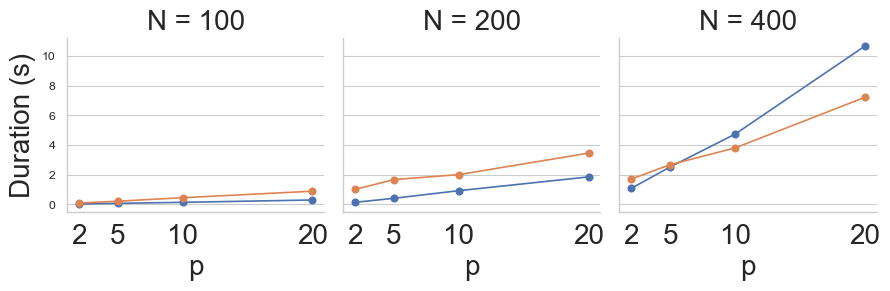

In [26]:
from plot_bench import *
sns.set_theme()
sns.set_style("white")
forest_df = make_forest_df(df[df.method != 'medoid_2means'])
grid = plot_forest_df(forest_df)
plt.savefig("./plots/runtime_wasserstein.pdf")

## MSE CART vs Medoid

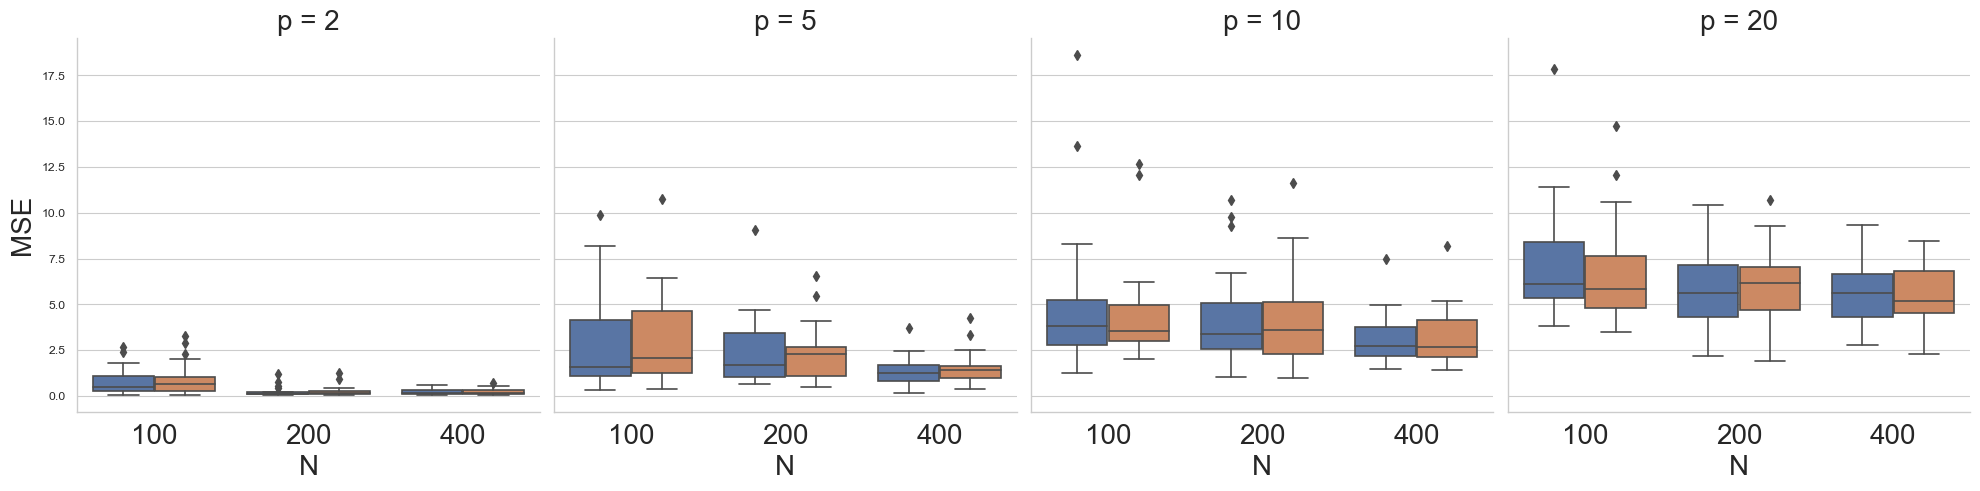

In [25]:
from plot_bench import *

plot_errors(df[(df.N > 50) & (df.method != 'medoid_2means')])
plt.savefig("./plots/error_wasserstein.pdf")

## Runtime CART vs Medoid

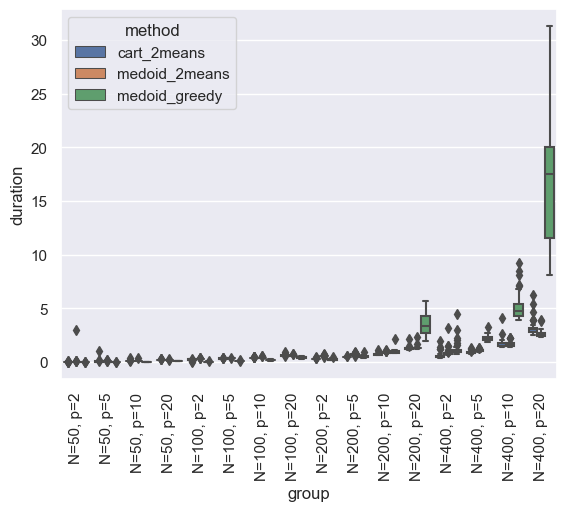

In [28]:
sns.boxplot(df, y='duration', x='group', hue='method')
plt.xticks(rotation=90);